# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  



## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
try:
    data = pd.read_csv("./input/census.csv")
except:
    print("Failed to read data")
#    exit()
# Success - Display the first record
data.head(n=1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.



In [2]:
print("Data types of income",data.income.unique())
print("Count of Data types of income",data.groupby(['income']).size())

# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income']=='<=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income']=='>50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / n_records * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Data types of income ['<=50K' '>50K']
Count of Data types of income income
<=50K    34014
>50K     11208
dtype: int64
Total number of records: 45222
Individuals making more than $50,000: 34014
Individuals making at most $50,000: 11208
Percentage of individuals making more than $50,000: 75.21560302507629%


In [3]:
print("All column Names",data.columns)
print("Numeric Columns",data._get_numeric_data().columns)
print("Object Type Columns ",data.select_dtypes(include=['object']).columns)
print("! Object Type Columns ",data.select_dtypes(exclude=['object']).columns)


All column Names Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
Numeric Columns Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Object Type Columns  Index(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')
! Object Type Columns  Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [4]:
non_numeric = data.select_dtypes(include=['object']).columns
numerics = data.select_dtypes(exclude=['object']).columns
print("Numerics Columns ",numerics)
print("Non Numeric Columns ",non_numeric)

# Print unique values in each column
for x in range(pd.Series(non_numeric).shape[0]) :<!DOCTYPE html>
<html>
<head><meta charset="utf-8" />
<title>finding_donors-v2</title>

<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>

<style type="text/css">
    /*!
*
* Twitter Bootstrap
*
*/
/*!
 * Bootstrap v3.3.6 (http://getbootstrap.com)
 * Copyright 2011-2015 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 */
/*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */
html {
  font-family: sans-serif;
  -ms-text-size-adjust: 100%;
  -webkit-text-size-adjust: 100%;
}
body {
  margin: 0;
}
article,
aside,
details,
figcaption,
figure,
footer,
header,
hgroup,
main,
menu,
nav,
section,
summary {
  display: block;
}
audio,
canvas,
progress,
video {
  display: inline-block;
  vertical-align: baseline;
}
audio:not([controls]) {
  display: none;
  height: 0;
}
[hidden],
template {
  display: none;
}
a {
  background-color: transparent;
}
a:active,
a:hover {
  outline: 0;
}
abbr[title] {
  border-bottom: 1px dotted;
}
b,
strong {
  font-weight: bold;
}
dfn {
  font-style: italic;
}
h1 {
  font-size: 2em;
  margin: 0.67em 0;
}
mark {
  background: #ff0;
  color: #000;
}
small {
  font-size: 80%;
}
sub,
sup {
  font-size: 75%;
  line-height: 0;
  position: relative;
  vertical-align: baseline;
}
sup {
  top: -0.5em;
}
sub {
  bottom: -0.25em;
}
img {
  border: 0;
}
svg:not(:root) {
  overflow: hidden;
}
figure {
  margin: 1em 40px;
}
hr {
  box-sizing: content-box;
  height: 0;
}
pre {
  overflow: auto;
}
code,
kbd,
pre,
samp {
  font-family: monospace, monospace;
  font-size: 1em;
}
button,
input,
optgroup,
select,
textarea {
  color: inherit;
  font: inherit;
  margin: 0;
}
button {
  overflow: visible;
}
button,
select {
  text-transform: none;
}
button,
html input[type="button"],
input[type="reset"],
input[type="submit"] {
  -webkit-appearance: button;
  cursor: pointer;
}
button[disabled],
html input[disabled] {
  cursor: default;
}
button::-moz-focus-inner,
input::-moz-focus-inner {
  border: 0;
  padding: 0;
}
input {
  line-height: normal;
}
input[type="checkbox"],
input[type="radio"] {
  box-sizing: border-box;
  padding: 0;
}
input[type="number"]::-webkit-inner-spin-button,
input[type="number"]::-webkit-outer-spin-button {
  height: auto;
}
input[type="search"] {
  -webkit-appearance: textfield;
  box-sizing: content-box;
}
input[type="search"]::-webkit-search-cancel-button,
input[type="search"]::-webkit-search-decoration {
  -webkit-appearance: none;
}
fieldset {
  border: 1px solid #c0c0c0;
  margin: 0 2px;
  padding: 0.35em 0.625em 0.75em;
}
legend {
  border: 0;
  padding: 0;
}
textarea {
  overflow: auto;
}
optgroup {
  font-weight: bold;
}
table {
  border-collapse: collapse;
  border-spacing: 0;
}
td,
th {
  padding: 0;
}
/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */
@media print {
  *,
  *:before,
  *:after {
    background: transparent !important;
    color: #000 !important;
    box-shadow: none !important;
    text-shadow: none !important;
  }
  a,
  a:visited {
    text-decoration: underline;
  }
  a[href]:after {
    content: " (" attr(href) ")";
  }
  abbr[title]:after {
    content: " (" attr(title) ")";
  }
  a[href^="#"]:after,
  a[href^="javascript:"]:after {
    content: "";
  }
  pre,
  blockquote {
    border: 1px solid #999;
    page-break-inside: avoid;
  }
  thead {
    display: table-header-group;
  }
  tr,
  img {
    page-break-inside: avoid;
  }
  img {
    max-width: 100% !important;
  }
  p,
  h2,
  h3 {
    orphans: 3;
    widows: 3;
  }
  h2,
  h3 {
    page-break-after: avoid;
  }
  .navbar {
    display: none;
  }
  .btn > .caret,
  .dropup > .btn > .caret {
    border-top-color: #000 !important;
  }
  .label {
    border: 1px solid #000;
  }
  .table {
    border-collapse: collapse !important;
  }
  .table td,
  .table th {
    background-color: #fff !important;
  }
  .table-bordered th,
  .table-bordered td {
    border: 1px solid #ddd !important;
  }
}
@font-face {
  font-family: 'Glyphicons Halflings';
  src: url('../components/bootstrap/fonts/glyphicons-halflings-regular.eot');
  src: url('../components/bootstrap/fonts/glyphicons-halflings-regular.eot?#iefix') format('embedded-opentype'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.woff2') format('woff2'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.woff') format('woff'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.ttf') format('truetype'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.svg#glyphicons_halflingsregular') format('svg');
}
.glyphicon {
  position: relative;
  top: 1px;
  display: inline-block;
  font-family: 'Glyphicons Halflings';
  font-style: normal;
  font-weight: normal;
  line-height: 1;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}
.glyphicon-asterisk:before {
  content: "\002a";
}
.glyphicon-plus:before {
  content: "\002b";
}
.glyphicon-euro:before,
.glyphicon-eur:before {
  content: "\20ac";
}
.glyphicon-minus:before {
  content: "\2212";
}
.glyphicon-cloud:before {
  content: "\2601";
}
.glyphicon-envelope:before {
  content: "\2709";
}
.glyphicon-pencil:before {
  content: "\270f";
}
.glyphicon-glass:before {
  content: "\e001";
}
.glyphicon-music:before {
  content: "\e002";
}
.glyphicon-search:before {
  content: "\e003";
}
.glyphicon-heart:before {
  content: "\e005";
}
.glyphicon-star:before {
  content: "\e006";
}
.glyphicon-star-empty:before {
  content: "\e007";
}
.glyphicon-user:before {
  content: "\e008";
}
.glyphicon-film:before {
  content: "\e009";
}
.glyphicon-th-large:before {
  content: "\e010";
}
.glyphicon-th:before {
  content: "\e011";
}
.glyphicon-th-list:before {
  content: "\e012";
}
.glyphicon-ok:before {
  content: "\e013";
}
.glyphicon-remove:before {
  content: "\e014";
}
.glyphicon-zoom-in:before {
  content: "\e015";
}
.glyphicon-zoom-out:before {
  content: "\e016";
}
.glyphicon-off:before {
  content: "\e017";
}
.glyphicon-signal:before {
  content: "\e018";
}
.glyphicon-cog:before {
  content: "\e019";
}
.glyphicon-trash:before {
  content: "\e020";
}
.glyphicon-home:before {
  content: "\e021";
}
.glyphicon-file:before {
  content: "\e022";
}
.glyphicon-time:before {
  content: "\e023";
}
.glyphicon-road:before {
  content: "\e024";
}
.glyphicon-download-alt:before {
  content: "\e025";
}
.glyphicon-download:before {
  content: "\e026";
}
.glyphicon-upload:before {
  content: "\e027";
}
.glyphicon-inbox:before {
  content: "\e028";
}
.glyphicon-play-circle:before {
  content: "\e029";
}
.glyphicon-repeat:before {
  content: "\e030";
}
.glyphicon-refresh:before {
  content: "\e031";
}
.glyphicon-list-alt:before {
  content: "\e032";
}
.glyphicon-lock:before {
  content: "\e033";
}
.glyphicon-flag:before {
  content: "\e034";
}
.glyphicon-headphones:before {
  content: "\e035";
}
.glyphicon-volume-off:before {
  content: "\e036";
}
.glyphicon-volume-down:before {
  content: "\e037";
}
.glyphicon-volume-up:before {
  content: "\e038";
}
.glyphicon-qrcode:before {
  content: "\e039";
}
.glyphicon-barcode:before {
  content: "\e040";
}
.glyphicon-tag:before {
  content: "\e041";
}
.glyphicon-tags:before {
  content: "\e042";
}
.glyphicon-book:before {
  content: "\e043";
}
.glyphicon-bookmark:before {
  content: "\e044";
}
.glyphicon-print:before {
  content: "\e045";
}
.glyphicon-camera:before {
  content: "\e046";
}
.glyphicon-font:before {
  content: "\e047";
}
.glyphicon-bold:before {
  content: "\e048";
}
.glyphicon-italic:before {
  content: "\e049";
}
.glyphicon-text-height:before {
  content: "\e050";
}
.glyphicon-text-width:before {
  content: "\e051";
}
.glyphicon-align-left:before {
  content: "\e052";
}
.glyphicon-align-center:before {
  content: "\e053";
}
.glyphicon-align-right:before {
  content: "\e054";
}
.glyphicon-align-justify:before {
  content: "\e055";
}
.glyphicon-list:before {
  content: "\e056";
}
.glyphicon-indent-left:before {
  content: "\e057";
}
.glyphicon-indent-right:before {
  content: "\e058";
}
.glyphicon-facetime-video:before {
  content: "\e059";
}
.glyphicon-picture:before {
  content: "\e060";
}
.glyphicon-map-marker:before {
  content: "\e062";
}
.glyphicon-adjust:before {
  content: "\e063";
}
.glyphicon-tint:before {
  content: "\e064";
}
.glyphicon-edit:before {
  content: "\e065";
}
.glyphicon-share:before {
  content: "\e066";
}
.glyphicon-check:before {
  content: "\e067";
}
.glyphicon-move:before {
  content: "\e068";
}
.glyphicon-step-backward:before {
  content: "\e069";
}
.glyphicon-fast-backward:before {
  content: "\e070";
}
.glyphicon-backward:before {
  content: "\e071";
}
.glyphicon-play:before {
  content: "\e072";
}
.glyphicon-pause:before {
  content: "\e073";
}
.glyphicon-stop:before {
  content: "\e074";
}
.glyphicon-forward:before {
  content: "\e075";
}
.glyphicon-fast-forward:before {
  content: "\e076";
}
.glyphicon-step-forward:before {
  content: "\e077";
}
.glyphicon-eject:before {
  content: "\e078";
}
.glyphicon-chevron-left:before {
  content: "\e079";
}
.glyphicon-chevron-right:before {
  content: "\e080";
}
.glyphicon-plus-sign:before {
  content: "\e081";
}
.glyphicon-minus-sign:before {
  content: "\e082";
}
.glyphicon-remove-sign:before {
  content: "\e083";
}
.glyphicon-ok-sign:before {
  content: "\e084";
}
.glyphicon-question-sign:before {
  content: "\e085";
}
.glyphicon-info-sign:before {
  content: "\e086";
}
.glyphicon-screenshot:before {
  content: "\e087";
}
.glyphicon-remove-circle:before {
  content: "\e088";
}
.glyphicon-ok-circle:before {
  content: "\e089";
}
.glyphicon-ban-circle:before {
  content: "\e090";
}
.glyphicon-arrow-left:before {
  content: "\e091";
}
.glyphicon-arrow-right:before {
  content: "\e092";
}
.glyphicon-arrow-up:before {
  content: "\e093";
}
.glyphicon-arrow-down:before {
  content: "\e094";
}
.glyphicon-share-alt:before {
  content: "\e095";
}
.glyphicon-resize-full:before {
  content: "\e096";
}
.glyphicon-resize-small:before {
  content: "\e097";
}
.glyphicon-exclamation-sign:before {
  content: "\e101";
}
.glyphicon-gift:before {
  content: "\e102";
}
.glyphicon-leaf:before {
  content: "\e103";
}
.glyphicon-fire:before {
  content: "\e104";
}
.glyphicon-eye-open:before {
  content: "\e105";
}
.glyphicon-eye-close:before {
  content: "\e106";
}
.glyphicon-warning-sign:before {
  content: "\e107";
}
.glyphicon-plane:before {
  content: "\e108";
}
.glyphicon-calendar:before {
  content: "\e109";
}
.glyphicon-random:before {
  content: "\e110";
}
.glyphicon-comment:before {
  content: "\e111";
}
.glyphicon-magnet:before {
  content: "\e112";
}
.glyphicon-chevron-up:before {
  content: "\e113";
}
.glyphicon-chevron-down:before {
  content: "\e114";
}
.glyphicon-retweet:before {
  content: "\e115";
}
.glyphicon-shopping-cart:before {
  content: "\e116";
}
.glyphicon-folder-close:before {
  content: "\e117";
}
.glyphicon-folder-open:before {
  content: "\e118";
}
.glyphicon-resize-vertical:before {
  content: "\e119";
}
.glyphicon-resize-horizontal:before {
  content: "\e120";
}
.glyphicon-hdd:before {
  content: "\e121";
}
.glyphicon-bullhorn:before {
  content: "\e122";
}
.glyphicon-bell:before {
  content: "\e123";
}
.glyphicon-certificate:before {
  content: "\e124";
}
.glyphicon-thumbs-up:before {
  content: "\e125";
}
.glyphicon-thumbs-down:before {
  content: "\e126";
}
.glyphicon-hand-right:before {
  content: "\e127";
}
.glyphicon-hand-left:before {
  content: "\e128";
}
.glyphicon-hand-up:before {
  content: "\e129";
}
.glyphicon-hand-down:before {
  content: "\e130";
}
.glyphicon-circle-arrow-right:before {
  content: "\e131";
}
.glyphicon-circle-arrow-left:before {
  content: "\e132";
}
.glyphicon-circle-arrow-up:before {
  content: "\e133";
}
.glyphicon-circle-arrow-down:before {
  content: "\e134";
}
.glyphicon-globe:before {
  content: "\e135";
}
.glyphicon-wrench:before {
  content: "\e136";
}
.glyphicon-tasks:before {
  content: "\e137";
}
.glyphicon-filter:before {
  content: "\e138";
}
.glyphicon-briefcase:before {
  content: "\e139";
}
.glyphicon-fullscreen:before {
  content: "\e140";
}
.glyphicon-dashboard:before {
  content: "\e141";
}
.glyphicon-paperclip:before {
  content: "\e142";
}
.glyphicon-heart-empty:before {
  content: "\e143";
}
.glyphicon-link:before {
  content: "\e144";
}
.glyphicon-phone:before {
  content: "\e145";
}
.glyphicon-pushpin:before {
  content: "\e146";
}
.glyphicon-usd:before {
  content: "\e148";
}
.glyphicon-gbp:before {
  content: "\e149";
}
.glyphicon-sort:before {
  content: "\e150";
}
.glyphicon-sort-by-alphabet:before {
  content: "\e151";
}
.glyphicon-sort-by-alphabet-alt:before {
  content: "\e152";
}
.glyphicon-sort-by-order:before {
  content: "\e153";
}
.glyphicon-sort-by-order-alt:before {
  content: "\e154";
}
.glyphicon-sort-by-attributes:before {
  content: "\e155";
}
.glyphicon-sort-by-attributes-alt:before {
  content: "\e156";
}
.glyphicon-unchecked:before {
  content: "\e157";
}
.glyphicon-expand:before {
  content: "\e158";
}
.glyphicon-collapse-down:before {
  content: "\e159";
}
.glyphicon-collapse-up:before {
  content: "\e160";
}
.glyphicon-log-in:before {
  content: "\e161";
}
.glyphicon-flash:before {
  content: "\e162";
}
.glyphicon-log-out:before {
  content: "\e163";
}
.glyphicon-new-window:before {
  content: "\e164";
}
.glyphicon-record:before {
  content: "\e165";
}
.glyphicon-save:before {
  content: "\e166";
}
.glyphicon-open:before {
  content: "\e167";
}
.glyphicon-saved:before {
  content: "\e168";
}
.glyphicon-import:before {
  content: "\e169";
}
.glyphicon-export:before {
  content: "\e170";
}
.glyphicon-send:before {
  content: "\e171";
}
.glyphicon-floppy-disk:before {
  content: "\e172";
}
.glyphicon-floppy-saved:before {
  content: "\e173";
}
.glyphicon-floppy-remove:before {
  content: "\e174";
}
.glyphicon-floppy-save:before {
  content: "\e175";
}
.glyphicon-floppy-open:before {
  content: "\e176";
}
.glyphicon-credit-card:before {
  content: "\e177";
}
.glyphicon-transfer:before {
  content: "\e178";
}
.glyphicon-cutlery:before {
  content: "\e179";
}
.glyphicon-header:before {
  content: "\e180";
}
.glyphicon-compressed:before {
  content: "\e181";
}
.glyphicon-earphone:before {
  content: "\e182";
}
.glyphicon-phone-alt:before {
  content: "\e183";
}
.glyphicon-tower:before {
  content: "\e184";
}
.glyphicon-stats:before {
  content: "\e185";
}
.glyphicon-sd-video:before {
  content: "\e186";
}
.glyphicon-hd-video:before {
  content: "\e187";
}
.glyphicon-subtitles:before {
  content: "\e188";
}
.glyphicon-sound-stereo:before {
  content: "\e189";
}
.glyphicon-sound-dolby:before {
  content: "\e190";
}
.glyphicon-sound-5-1:before {
  content: "\e191";
}
.glyphicon-sound-6-1:before {
  content: "\e192";
}
.glyphicon-sound-7-1:before {
  content: "\e193";
}
.glyphicon-copyright-mark:before {
  content: "\e194";
}
.glyphicon-registration-mark:before {
  content: "\e195";
}
.glyphicon-cloud-download:before {
  content: "\e197";
}
.glyphicon-cloud-upload:before {
  content: "\e198";
}
.glyphicon-tree-conifer:before {
  content: "\e199";
}
.glyphicon-tree-deciduous:before {
  content: "\e200";
}
.glyphicon-cd:before {
  content: "\e201";
}
.glyphicon-save-file:before {
  content: "\e202";
}
.glyphicon-open-file:before {
  content: "\e203";
}
.glyphicon-level-up:before {
  content: "\e204";
}
.glyphicon-copy:before {
  content: "\e205";
}
.glyphicon-paste:before {
  content: "\e206";
}
.glyphicon-alert:before {
  content: "\e209";
}
.glyphicon-equalizer:before {
  content: "\e210";
}
.glyphicon-king:before {
  content: "\e211";
}
.glyphicon-queen:before {
  content: "\e212";
}
.glyphicon-pawn:before {
  content: "\e213";
}
.glyphicon-bishop:before {
  content: "\e214";
}
.glyphicon-knight:before {
  content: "\e215";
}
.glyphicon-baby-formula:before {
  content: "\e216";
}
.glyphicon-tent:before {
  content: "\26fa";
}
.glyphicon-blackboard:before {
  content: "\e218";
}
.glyphicon-bed:before {
  content: "\e219";
}
.glyphicon-apple:before {
  content: "\f8ff";
}
.glyphicon-erase:before {
  content: "\e221";
}
.glyphicon-hourglass:before {
  content: "\231b";
}
.glyphicon-lamp:before {
  content: "\e223";
}
.glyphicon-duplicate:before {
  content: "\e224";
}
.glyphicon-piggy-bank:before {
  content: "\e225";
}
.glyphicon-scissors:before {
  content: "\e226";
}
.glyphicon-bitcoin:before {
  content: "\e227";
}
.glyphicon-btc:before {
  content: "\e227";
}
.glyphicon-xbt:before {
  content: "\e227";
}
.glyphicon-yen:before {
  content: "\00a5";
}
.glyphicon-jpy:before {
  content: "\00a5";
}
.glyphicon-ruble:before {
  content: "\20bd";
}
.glyphicon-rub:before {
  content: "\20bd";
}
.glyphicon-scale:before {
  content: "\e230";
}
.glyphicon-ice-lolly:before {
  content: "\e231";
}
.glyphicon-ice-lolly-tasted:before {
  content: "\e232";
}
.glyphicon-education:before {
  content: "\e233";
}
.glyphicon-option-horizontal:before {
  content: "\e234";
}
.glyphicon-option-vertical:before {
  content: "\e235";
}
.glyphicon-menu-hamburger:before {
  content: "\e236";
}
.glyphicon-modal-window:before {
  content: "\e237";
}
.glyphicon-oil:before {
  content: "\e238";
}
.glyphicon-grain:before {
  content: "\e239";
}
.glyphicon-sunglasses:before {
  content: "\e240";
}
.glyphicon-text-size:before {
  content: "\e241";
}
.glyphicon-text-color:before {
  content: "\e242";
}
.glyphicon-text-background:before {
  content: "\e243";
}
.glyphicon-object-align-top:before {
  content: "\e244";
}
.glyphicon-object-align-bottom:before {
  content: "\e245";
}
.glyphicon-object-align-horizontal:before {
  content: "\e246";
}
.glyphicon-object-align-left:before {
  content: "\e247";
}
.glyphicon-object-align-vertical:before {
  content: "\e248";
}
.glyphicon-object-align-right:before {
  content: "\e249";
}
.glyphicon-triangle-right:before {
  content: "\e250";
}
.glyphicon-triangle-left:before {
  content: "\e251";
}
.glyphicon-triangle-bottom:before {
  content: "\e252";
}
.glyphicon-triangle-top:before {
  content: "\e253";
}
.glyphicon-console:before {
  content: "\e254";
}
.glyphicon-superscript:before {
  content: "\e255";
}
.glyphicon-subscript:before {
  content: "\e256";
}
.glyphicon-menu-left:before {
  content: "\e257";
}
.glyphicon-menu-right:before {
  content: "\e258";
}
.glyphicon-menu-down:before {
  content: "\e259";
}
.glyphicon-menu-up:before {
  content: "\e260";
}
* {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
*:before,
*:after {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
html {
  font-size: 10px;
  -webkit-tap-highlight-color: rgba(0, 0, 0, 0);
}
body {
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-size: 13px;
  line-height: 1.42857143;
  color: #000;
  background-color: #fff;
}
input,
button,
select,
textarea {
  font-family: inherit;
  font-size: inherit;
  line-height: inherit;
}
a {
  color: #337ab7;
  text-decoration: none;
}
a:hover,
a:focus {
  color: #23527c;
  text-decoration: underline;
}
a:focus {
  outline: thin dotted;
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
figure {
  margin: 0;
}
img {
  vertical-align: middle;
}
.img-responsive,
.thumbnail > img,
.thumbnail a > img,
.carousel-inner > .item > img,
.carousel-inner > .item > a > img {
  display: block;
  max-width: 100%;
  height: auto;
}
.img-rounded {
  border-radius: 3px;
}
.img-thumbnail {
  padding: 4px;
  line-height: 1.42857143;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 2px;
  -webkit-transition: all 0.2s ease-in-out;
  -o-transition: all 0.2s ease-in-out;
  transition: all 0.2s ease-in-out;
  display: inline-block;
  max-width: 100%;
  height: auto;
}
.img-circle {
  border-radius: 50%;
}
hr {
  margin-top: 18px;
  margin-bottom: 18px;
  border: 0;
  border-top: 1px solid #eeeeee;
}
.sr-only {
  position: absolute;
  width: 1px;
  height: 1px;
  margin: -1px;
  padding: 0;
  overflow: hidden;
  clip: rect(0, 0, 0, 0);
  border: 0;
}
.sr-only-focusable:active,
.sr-only-focusable:focus {
  position: static;
  width: auto;
  height: auto;
  margin: 0;
  overflow: visible;
  clip: auto;
}
[role="button"] {
  cursor: pointer;
}
h1,
h2,
h3,
h4,
h5,
h6,
.h1,
.h2,
.h3,
.h4,
.h5,
.h6 {
  font-family: inherit;
  font-weight: 500;
  line-height: 1.1;
  color: inherit;
}
h1 small,
h2 small,
h3 small,
h4 small,
h5 small,
h6 small,
.h1 small,
.h2 small,
.h3 small,
.h4 small,
.h5 small,
.h6 small,
h1 .small,
h2 .small,
h3 .small,
h4 .small,
h5 .small,
h6 .small,
.h1 .small,
.h2 .small,
.h3 .small,
.h4 .small,
.h5 .small,
.h6 .small {
  font-weight: normal;
  line-height: 1;
  color: #777777;
}
h1,
.h1,
h2,
.h2,
h3,
.h3 {
  margin-top: 18px;
  margin-bottom: 9px;
}
h1 small,
.h1 small,
h2 small,
.h2 small,
h3 small,
.h3 small,
h1 .small,
.h1 .small,
h2 .small,
.h2 .small,
h3 .small,
.h3 .small {
  font-size: 65%;
}
h4,
.h4,
h5,
.h5,
h6,
.h6 {
  margin-top: 9px;
  margin-bottom: 9px;
}
h4 small,
.h4 small,
h5 small,
.h5 small,
h6 small,
.h6 small,
h4 .small,
.h4 .small,
h5 .small,
.h5 .small,
h6 .small,
.h6 .small {
  font-size: 75%;
}
h1,
.h1 {
  font-size: 33px;
}
h2,
.h2 {
  font-size: 27px;
}
h3,
.h3 {
  font-size: 23px;
}
h4,
.h4 {
  font-size: 17px;
}
h5,
.h5 {
  font-size: 13px;
}
h6,
.h6 {
  font-size: 12px;
}
p {
  margin: 0 0 9px;
}
.lead {
  margin-bottom: 18px;
  font-size: 14px;
  font-weight: 300;
  line-height: 1.4;
}
@media (min-width: 768px) {
  .lead {
    font-size: 19.5px;
  }
}
small,
.small {
  font-size: 92%;
}
mark,
.mark {
  background-color: #fcf8e3;
  padding: .2em;
}
.text-left {
  text-align: left;
}
.text-right {
  text-align: right;
}
.text-center {
  text-align: center;
}
.text-justify {
  text-align: justify;
}
.text-nowrap {
  white-space: nowrap;
}
.text-lowercase {
  text-transform: lowercase;
}
.text-uppercase {
  text-transform: uppercase;
}
.text-capitalize {
  text-transform: capitalize;
}
.text-muted {
  color: #777777;
}
.text-primary {
  color: #337ab7;
}
a.text-primary:hover,
a.text-primary:focus {
  color: #286090;
}
.text-success {
  color: #3c763d;
}
a.text-success:hover,
a.text-success:focus {
  color: #2b542c;
}
.text-info {
  color: #31708f;
}
a.text-info:hover,
a.text-info:focus {
  color: #245269;
}
.text-warning {
  color: #8a6d3b;
}
a.text-warning:hover,
a.text-warning:focus {
  color: #66512c;
}
.text-danger {
  color: #a94442;
}
a.text-danger:hover,
a.text-danger:focus {
  color: #843534;
}
.bg-primary {
  color: #fff;
  background-color: #337ab7;
}
a.bg-primary:hover,
a.bg-primary:focus {
  background-color: #286090;
}
.bg-success {
  background-color: #dff0d8;
}
a.bg-success:hover,
a.bg-success:focus {
  background-color: #c1e2b3;
}
.bg-info {
  background-color: #d9edf7;
}
a.bg-info:hover,
a.bg-info:focus {
  background-color: #afd9ee;
}
.bg-warning {
  background-color: #fcf8e3;
}
a.bg-warning:hover,
a.bg-warning:focus {
  background-color: #f7ecb5;
}
.bg-danger {
  background-color: #f2dede;
}
a.bg-danger:hover,
a.bg-danger:focus {
  background-color: #e4b9b9;
}
.page-header {
  padding-bottom: 8px;
  margin: 36px 0 18px;
  border-bottom: 1px solid #eeeeee;
}
ul,
ol {
  margin-top: 0;
  margin-bottom: 9px;
}
ul ul,
ol ul,
ul ol,
ol ol {
  margin-bottom: 0;
}
.list-unstyled {
  padding-left: 0;
  list-style: none;
}
.list-inline {
  padding-left: 0;
  list-style: none;
  margin-left: -5px;
}
.list-inline > li {
  display: inline-block;
  padding-left: 5px;
  padding-right: 5px;
}
dl {
  margin-top: 0;
  margin-bottom: 18px;
}
dt,
dd {
  line-height: 1.42857143;
}
dt {
  font-weight: bold;
}
dd {
  margin-left: 0;
}
@media (min-width: 541px) {
  .dl-horizontal dt {
    float: left;
    width: 160px;
    clear: left;
    text-align: right;
    overflow: hidden;
    text-overflow: ellipsis;
    white-space: nowrap;
  }
  .dl-horizontal dd {
    margin-left: 180px;
  }
}
abbr[title],
abbr[data-original-title] {
  cursor: help;
  border-bottom: 1px dotted #777777;
}
.initialism {
  font-size: 90%;
  text-transform: uppercase;
}
blockquote {
  padding: 9px 18px;
  margin: 0 0 18px;
  font-size: inherit;
  border-left: 5px solid #eeeeee;
}
blockquote p:last-child,
blockquote ul:last-child,
blockquote ol:last-child {
  margin-bottom: 0;
}
blockquote footer,
blockquote small,
blockquote .small {
  display: block;
  font-size: 80%;
  line-height: 1.42857143;
  color: #777777;
}
blockquote footer:before,
blockquote small:before,
blockquote .small:before {
  content: '\2014 \00A0';
}
.blockquote-reverse,
blockquote.pull-right {
  padding-right: 15px;
  padding-left: 0;
  border-right: 5px solid #eeeeee;
  border-left: 0;
  text-align: right;
}
.blockquote-reverse footer:before,
blockquote.pull-right footer:before,
.blockquote-reverse small:before,
blockquote.pull-right small:before,
.blockquote-reverse .small:before,
blockquote.pull-right .small:before {
  content: '';
}
.blockquote-reverse footer:after,
blockquote.pull-right footer:after,
.blockquote-reverse small:after,
blockquote.pull-right small:after,
.blockquote-reverse .small:after,
blockquote.pull-right .small:after {
  content: '\00A0 \2014';
}
address {
  margin-bottom: 18px;
  font-style: normal;
  line-height: 1.42857143;
}
code,
kbd,
pre,
samp {
  font-family: monospace;
}
code {
  padding: 2px 4px;
  font-size: 90%;
  color: #c7254e;
  background-color: #f9f2f4;
  border-radius: 2px;
}
kbd {
  padding: 2px 4px;
  font-size: 90%;
  color: #888;
  background-color: transparent;
  border-radius: 1px;
  box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.25);
}
kbd kbd {
  padding: 0;
  font-size: 100%;
  font-weight: bold;
  box-shadow: none;
}
pre {
  display: block;
  padding: 8.5px;
  margin: 0 0 9px;
  font-size: 12px;
  line-height: 1.42857143;
  word-break: break-all;
  word-wrap: break-word;
  color: #333333;
  background-color: #f5f5f5;
  border: 1px solid #ccc;
  border-radius: 2px;
}
pre code {
  padding: 0;
  font-size: inherit;
  color: inherit;
  white-space: pre-wrap;
  background-color: transparent;
  border-radius: 0;
}
.pre-scrollable {
  max-height: 340px;
  overflow-y: scroll;
}
.container {
  margin-right: auto;
  margin-left: auto;
  padding-left: 0px;
  padding-right: 0px;
}
@media (min-width: 768px) {
  .container {
    width: 768px;
  }
}
@media (min-width: 992px) {
  .container {
    width: 940px;
  }
}
@media (min-width: 1200px) {
  .container {
    width: 1140px;
  }
}
.container-fluid {
  margin-right: auto;
  margin-left: auto;
  padding-left: 0px;
  padding-right: 0px;
}
.row {
  margin-left: 0px;
  margin-right: 0px;
}
.col-xs-1, .col-sm-1, .col-md-1, .col-lg-1, .col-xs-2, .col-sm-2, .col-md-2, .col-lg-2, .col-xs-3, .col-sm-3, .col-md-3, .col-lg-3, .col-xs-4, .col-sm-4, .col-md-4, .col-lg-4, .col-xs-5, .col-sm-5, .col-md-5, .col-lg-5, .col-xs-6, .col-sm-6, .col-md-6, .col-lg-6, .col-xs-7, .col-sm-7, .col-md-7, .col-lg-7, .col-xs-8, .col-sm-8, .col-md-8, .col-lg-8, .col-xs-9, .col-sm-9, .col-md-9, .col-lg-9, .col-xs-10, .col-sm-10, .col-md-10, .col-lg-10, .col-xs-11, .col-sm-11, .col-md-11, .col-lg-11, .col-xs-12, .col-sm-12, .col-md-12, .col-lg-12 {
  position: relative;
  min-height: 1px;
  padding-left: 0px;
  padding-right: 0px;
}
.col-xs-1, .col-xs-2, .col-xs-3, .col-xs-4, .col-xs-5, .col-xs-6, .col-xs-7, .col-xs-8, .col-xs-9, .col-xs-10, .col-xs-11, .col-xs-12 {
  float: left;
}
.col-xs-12 {
  width: 100%;
}
.col-xs-11 {
  width: 91.66666667%;
}
.col-xs-10 {
  width: 83.33333333%;
}
.col-xs-9 {
  width: 75%;
}
.col-xs-8 {
  width: 66.66666667%;
}
.col-xs-7 {
  width: 58.33333333%;
}
.col-xs-6 {
  width: 50%;
}
.col-xs-5 {
  width: 41.66666667%;
}
.col-xs-4 {
  width: 33.33333333%;
}
.col-xs-3 {
  width: 25%;
}
.col-xs-2 {
  width: 16.66666667%;
}
.col-xs-1 {
  width: 8.33333333%;
}
.col-xs-pull-12 {
  right: 100%;
}
.col-xs-pull-11 {
  right: 91.66666667%;
}
.col-xs-pull-10 {
  right: 83.33333333%;
}
.col-xs-pull-9 {
  right: 75%;
}
.col-xs-pull-8 {
  right: 66.66666667%;
}
.col-xs-pull-7 {
  right: 58.33333333%;
}
.col-xs-pull-6 {
  right: 50%;
}
.col-xs-pull-5 {
  right: 41.66666667%;
}
.col-xs-pull-4 {
  right: 33.33333333%;
}
.col-xs-pull-3 {
  right: 25%;
}
.col-xs-pull-2 {
  right: 16.66666667%;
}
.col-xs-pull-1 {
  right: 8.33333333%;
}
.col-xs-pull-0 {
  right: auto;
}
.col-xs-push-12 {
  left: 100%;
}
.col-xs-push-11 {
  left: 91.66666667%;
}
.col-xs-push-10 {
  left: 83.33333333%;
}
.col-xs-push-9 {
  left: 75%;
}
.col-xs-push-8 {
  left: 66.66666667%;
}
.col-xs-push-7 {
  left: 58.33333333%;
}
.col-xs-push-6 {
  left: 50%;
}
.col-xs-push-5 {
  left: 41.66666667%;
}
.col-xs-push-4 {
  left: 33.33333333%;
}
.col-xs-push-3 {
  left: 25%;
}
.col-xs-push-2 {
  left: 16.66666667%;
}
.col-xs-push-1 {
  left: 8.33333333%;
}
.col-xs-push-0 {
  left: auto;
}
.col-xs-offset-12 {
  margin-left: 100%;
}
.col-xs-offset-11 {
  margin-left: 91.66666667%;
}
.col-xs-offset-10 {
  margin-left: 83.33333333%;
}
.col-xs-offset-9 {
  margin-left: 75%;
}
.col-xs-offset-8 {
  margin-left: 66.66666667%;
}
.col-xs-offset-7 {
  margin-left: 58.33333333%;
}
.col-xs-offset-6 {
  margin-left: 50%;
}
.col-xs-offset-5 {
  margin-left: 41.66666667%;
}
.col-xs-offset-4 {
  margin-left: 33.33333333%;
}
.col-xs-offset-3 {
  margin-left: 25%;
}
.col-xs-offset-2 {
  margin-left: 16.66666667%;
}
.col-xs-offset-1 {
  margin-left: 8.33333333%;
}
.col-xs-offset-0 {
  margin-left: 0%;
}
@media (min-width: 768px) {
  .col-sm-1, .col-sm-2, .col-sm-3, .col-sm-4, .col-sm-5, .col-sm-6, .col-sm-7, .col-sm-8, .col-sm-9, .col-sm-10, .col-sm-11, .col-sm-12 {
    float: left;
  }
  .col-sm-12 {
    width: 100%;
  }
  .col-sm-11 {
    width: 91.66666667%;
  }
  .col-sm-10 {
    width: 83.33333333%;
  }
  .col-sm-9 {
    width: 75%;
  }
  .col-sm-8 {
    width: 66.66666667%;
  }
  .col-sm-7 {
    width: 58.33333333%;
  }
  .col-sm-6 {
    width: 50%;
  }
  .col-sm-5 {
    width: 41.66666667%;
  }
  .col-sm-4 {
    width: 33.33333333%;
  }
  .col-sm-3 {
    width: 25%;
  }
  .col-sm-2 {
    width: 16.66666667%;
  }
  .col-sm-1 {
    width: 8.33333333%;
  }
  .col-sm-pull-12 {
    right: 100%;
  }
  .col-sm-pull-11 {
    right: 91.66666667%;
  }
  .col-sm-pull-10 {
    right: 83.33333333%;
  }
  .col-sm-pull-9 {
    right: 75%;
  }
  .col-sm-pull-8 {
    right: 66.66666667%;
  }
  .col-sm-pull-7 {
    right: 58.33333333%;
  }
  .col-sm-pull-6 {
    right: 50%;
  }
  .col-sm-pull-5 {
    right: 41.66666667%;
  }
  .col-sm-pull-4 {
    right: 33.33333333%;
  }
  .col-sm-pull-3 {
    right: 25%;
  }
  .col-sm-pull-2 {
    right: 16.66666667%;
  }
  .col-sm-pull-1 {
    right: 8.33333333%;
  }
  .col-sm-pull-0 {
    right: auto;
  }
  .col-sm-push-12 {
    left: 100%;
  }
  .col-sm-push-11 {
    left: 91.66666667%;
  }
  .col-sm-push-10 {
    left: 83.33333333%;
  }
  .col-sm-push-9 {
    left: 75%;
  }
  .col-sm-push-8 {
    left: 66.66666667%;
  }
  .col-sm-push-7 {
    left: 58.33333333%;
  }
  .col-sm-push-6 {
    left: 50%;
  }
  .col-sm-push-5 {
    left: 41.66666667%;
  }
  .col-sm-push-4 {
    left: 33.33333333%;
  }
  .col-sm-push-3 {
    left: 25%;
  }
  .col-sm-push-2 {
    left: 16.66666667%;
  }
  .col-sm-push-1 {
    left: 8.33333333%;
  }
  .col-sm-push-0 {
    left: auto;
  }
  .col-sm-offset-12 {
    margin-left: 100%;
  }
  .col-sm-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-sm-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-sm-offset-9 {
    margin-left: 75%;
  }
  .col-sm-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-sm-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-sm-offset-6 {
    margin-left: 50%;
  }
  .col-sm-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-sm-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-sm-offset-3 {
    margin-left: 25%;
  }
  .col-sm-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-sm-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-sm-offset-0 {
    margin-left: 0%;
  }
}
@media (min-width: 992px) {
  .col-md-1, .col-md-2, .col-md-3, .col-md-4, .col-md-5, .col-md-6, .col-md-7, .col-md-8, .col-md-9, .col-md-10, .col-md-11, .col-md-12 {
    float: left;
  }
  .col-md-12 {
    width: 100%;
  }
  .col-md-11 {
    width: 91.66666667%;
  }
  .col-md-10 {
    width: 83.33333333%;
  }
  .col-md-9 {
    width: 75%;
  }
  .col-md-8 {
    width: 66.66666667%;
  }
  .col-md-7 {
    width: 58.33333333%;
  }
  .col-md-6 {
    width: 50%;
  }
  .col-md-5 {
    width: 41.66666667%;
  }
  .col-md-4 {
    width: 33.33333333%;
  }
  .col-md-3 {
    width: 25%;
  }
  .col-md-2 {
    width: 16.66666667%;
  }
  .col-md-1 {
    width: 8.33333333%;
  }
  .col-md-pull-12 {
    right: 100%;
  }
  .col-md-pull-11 {
    right: 91.66666667%;
  }
  .col-md-pull-10 {
    right: 83.33333333%;
  }
  .col-md-pull-9 {
    right: 75%;
  }
  .col-md-pull-8 {
    right: 66.66666667%;
  }
  .col-md-pull-7 {
    right: 58.33333333%;
  }
  .col-md-pull-6 {
    right: 50%;
  }
  .col-md-pull-5 {
    right: 41.66666667%;
  }
  .col-md-pull-4 {
    right: 33.33333333%;
  }
  .col-md-pull-3 {
    right: 25%;
  }
  .col-md-pull-2 {
    right: 16.66666667%;
  }
  .col-md-pull-1 {
    right: 8.33333333%;
  }
  .col-md-pull-0 {
    right: auto;
  }
  .col-md-push-12 {
    left: 100%;
  }
  .col-md-push-11 {
    left: 91.66666667%;
  }
  .col-md-push-10 {
    left: 83.33333333%;
  }
  .col-md-push-9 {
    left: 75%;
  }
  .col-md-push-8 {
    left: 66.66666667%;
  }
  .col-md-push-7 {
    left: 58.33333333%;
  }
  .col-md-push-6 {
    left: 50%;
  }
  .col-md-push-5 {
    left: 41.66666667%;
  }
  .col-md-push-4 {
    left: 33.33333333%;
  }
  .col-md-push-3 {
    left: 25%;
  }
  .col-md-push-2 {
    left: 16.66666667%;
  }
  .col-md-push-1 {
    left: 8.33333333%;
  }
  .col-md-push-0 {
    left: auto;
  }
  .col-md-offset-12 {
    margin-left: 100%;
  }
  .col-md-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-md-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-md-offset-9 {
    margin-left: 75%;
  }
  .col-md-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-md-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-md-offset-6 {
    margin-left: 50%;
  }
  .col-md-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-md-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-md-offset-3 {
    margin-left: 25%;
  }
  .col-md-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-md-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-md-offset-0 {
    margin-left: 0%;
  }
}
@media (min-width: 1200px) {
  .col-lg-1, .col-lg-2, .col-lg-3, .col-lg-4, .col-lg-5, .col-lg-6, .col-lg-7, .col-lg-8, .col-lg-9, .col-lg-10, .col-lg-11, .col-lg-12 {
    float: left;
  }
  .col-lg-12 {
    width: 100%;
  }
  .col-lg-11 {
    width: 91.66666667%;
  }
  .col-lg-10 {
    width: 83.33333333%;
  }
  .col-lg-9 {
    width: 75%;
  }
  .col-lg-8 {
    width: 66.66666667%;
  }
  .col-lg-7 {
    width: 58.33333333%;
  }
  .col-lg-6 {
    width: 50%;
  }
  .col-lg-5 {
    width: 41.66666667%;
  }
  .col-lg-4 {
    width: 33.33333333%;
  }
  .col-lg-3 {
    width: 25%;
  }
  .col-lg-2 {
    width: 16.66666667%;
  }
  .col-lg-1 {
    width: 8.33333333%;
  }
  .col-lg-pull-12 {
    right: 100%;
  }
  .col-lg-pull-11 {
    right: 91.66666667%;
  }
  .col-lg-pull-10 {
    right: 83.33333333%;
  }
  .col-lg-pull-9 {
    right: 75%;
  }
  .col-lg-pull-8 {
    right: 66.66666667%;
  }
  .col-lg-pull-7 {
    right: 58.33333333%;
  }
  .col-lg-pull-6 {
    right: 50%;
  }
  .col-lg-pull-5 {
    right: 41.66666667%;
  }
  .col-lg-pull-4 {
    right: 33.33333333%;
  }
  .col-lg-pull-3 {
    right: 25%;
  }
  .col-lg-pull-2 {
    right: 16.66666667%;
  }
  .col-lg-pull-1 {
    right: 8.33333333%;
  }
  .col-lg-pull-0 {
    right: auto;
  }
  .col-lg-push-12 {
    left: 100%;
  }
  .col-lg-push-11 {
    left: 91.66666667%;
  }
  .col-lg-push-10 {
    left: 83.33333333%;
  }
  .col-lg-push-9 {
    left: 75%;
  }
  .col-lg-push-8 {
    left: 66.66666667%;
  }
  .col-lg-push-7 {
    left: 58.33333333%;
  }
  .col-lg-push-6 {
    left: 50%;
  }
  .col-lg-push-5 {
    left: 41.66666667%;
  }
  .col-lg-push-4 {
    left: 33.33333333%;
  }
  .col-lg-push-3 {
    left: 25%;
  }
  .col-lg-push-2 {
    left: 16.66666667%;
  }
  .col-lg-push-1 {
    left: 8.33333333%;
  }
  .col-lg-push-0 {
    left: auto;
  }
  .col-lg-offset-12 {
    margin-left: 100%;
  }
  .col-lg-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-lg-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-lg-offset-9 {
    margin-left: 75%;
  }
  .col-lg-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-lg-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-lg-offset-6 {
    margin-left: 50%;
  }
  .col-lg-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-lg-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-lg-offset-3 {
    margin-left: 25%;
  }
  .col-lg-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-lg-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-lg-offset-0 {
    margin-left: 0%;
  }
}
table {
  background-color: transparent;
}
caption {
  padding-top: 8px;
  padding-bottom: 8px;
  color: #777777;
  text-align: left;
}
th {
  text-align: left;
}
.table {
  width: 100%;
  max-width: 100%;
  margin-bottom: 18px;
}
.table > thead > tr > th,
.table > tbody > tr > th,
.table > tfoot > tr > th,
.table > thead > tr > td,
.table > tbody > tr > td,
.table > tfoot > tr > td {
  padding: 8px;
  line-height: 1.42857143;
  vertical-align: top;
  border-top: 1px solid #ddd;
}
.table > thead > tr > th {
  vertical-align: bottom;
  border-bottom: 2px solid #ddd;
}
.table > caption + thead > tr:first-child > th,
.table > colgroup + thead > tr:first-child > th,
.table > thead:first-child > tr:first-child > th,
.table > caption + thead > tr:first-child > td,
.table > colgroup + thead > tr:first-child > td,
.table > thead:first-child > tr:first-child > td {
  border-top: 0;
}
.table > tbody + tbody {
  border-top: 2px solid #ddd;
}
.table .table {
  background-color: #fff;
}
.table-condensed > thead > tr > th,
.table-condensed > tbody > tr > th,
.table-condensed > tfoot > tr > th,
.table-condensed > thead > tr > td,
.table-condensed > tbody > tr > td,
.table-condensed > tfoot > tr > td {
  padding: 5px;
}
.table-bordered {
  border: 1px solid #ddd;
}
.table-bordered > thead > tr > th,
.table-bordered > tbody > tr > th,
.table-bordered > tfoot > tr > th,
.table-bordered > thead > tr > td,
.table-bordered > tbody > tr > td,
.table-bordered > tfoot > tr > td {
  border: 1px solid #ddd;
}
.table-bordered > thead > tr > th,
.table-bordered > thead > tr > td {
  border-bottom-width: 2px;
}
.table-striped > tbody > tr:nth-of-type(odd) {
  background-color: #f9f9f9;
}
.table-hover > tbody > tr:hover {
  background-color: #f5f5f5;
}
table col[class*="col-"] {
  position: static;
  float: none;
  display: table-column;
}
table td[class*="col-"],
table th[class*="col-"] {
  position: static;
  float: none;
  display: table-cell;
}
.table > thead > tr > td.active,
.table > tbody > tr > td.active,
.table > tfoot > tr > td.active,
.table > thead > tr > th.active,
.table > tbody > tr > th.active,
.table > tfoot > tr > th.active,
.table > thead > tr.active > td,
.table > tbody > tr.active > td,
.table > tfoot > tr.active > td,
.table > thead > tr.active > th,
.table > tbody > tr.active > th,
.table > tfoot > tr.active > th {
  background-color: #f5f5f5;
}
.table-hover > tbody > tr > td.active:hover,
.table-hover > tbody > tr > th.active:hover,
.table-hover > tbody > tr.active:hover > td,
.table-hover > tbody > tr:hover > .active,
.table-hover > tbody > tr.active:hover > th {
  background-color: #e8e8e8;
}
.table > thead > tr > td.success,
.table > tbody > tr > td.success,
.table > tfoot > tr > td.success,
.table > thead > tr > th.success,
.table > tbody > tr > th.success,
.table > tfoot > tr > th.success,
.table > thead > tr.success > td,
.table > tbody > tr.success > td,
.table > tfoot > tr.success > td,
.table > thead > tr.success > th,
.table > tbody > tr.success > th,
.table > tfoot > tr.success > th {
  background-color: #dff0d8;
}
.table-hover > tbody > tr > td.success:hover,
.table-hover > tbody > tr > th.success:hover,
.table-hover > tbody > tr.success:hover > td,
.table-hover > tbody > tr:hover > .success,
.table-hover > tbody > tr.success:hover > th {
  background-color: #d0e9c6;
}
.table > thead > tr > td.info,
.table > tbody > tr > td.info,
.table > tfoot > tr > td.info,
.table > thead > tr > th.info,
.table > tbody > tr > th.info,
.table > tfoot > tr > th.info,
.table > thead > tr.info > td,
.table > tbody > tr.info > td,
.table > tfoot > tr.info > td,
.table > thead > tr.info > th,
.table > tbody > tr.info > th,
.table > tfoot > tr.info > th {
  background-color: #d9edf7;
}
.table-hover > tbody > tr > td.info:hover,
.table-hover > tbody > tr > th.info:hover,
.table-hover > tbody > tr.info:hover > td,
.table-hover > tbody > tr:hover > .info,
.table-hover > tbody > tr.info:hover > th {
  background-color: #c4e3f3;
}
.table > thead > tr > td.warning,
.table > tbody > tr > td.warning,
.table > tfoot > tr > td.warning,
.table > thead > tr > th.warning,
.table > tbody > tr > th.warning,
.table > tfoot > tr > th.warning,
.table > thead > tr.warning > td,
.table > tbody > tr.warning > td,
.table > tfoot > tr.warning > td,
.table > thead > tr.warning > th,
.table > tbody > tr.warning > th,
.table > tfoot > tr.warning > th {
  background-color: #fcf8e3;
}
.table-hover > tbody > tr > td.warning:hover,
.table-hover > tbody > tr > th.warning:hover,
.table-hover > tbody > tr.warning:hover > td,
.table-hover > tbody > tr:hover > .warning,
.table-hover > tbody > tr.warning:hover > th {
  background-color: #faf2cc;
}
.table > thead > tr > td.danger,
.table > tbody > tr > td.danger,
.table > tfoot > tr > td.danger,
.table > thead > tr > th.danger,
.table > tbody > tr > th.danger,
.table > tfoot > tr > th.danger,
.table > thead > tr.danger > td,
.table > tbody > tr.danger > td,
.table > tfoot > tr.danger > td,
.table > thead > tr.danger > th,
.table > tbody > tr.danger > th,
.table > tfoot > tr.danger > th {
  background-color: #f2dede;
}
.table-hover > tbody > tr > td.danger:hover,
.table-hover > tbody > tr > th.danger:hover,
.table-hover > tbody > tr.danger:hover > td,
.table-hover > tbody > tr:hover > .danger,
.table-hover > tbody > tr.danger:hover > th {
  background-color: #ebcccc;
}
.table-responsive {
  overflow-x: auto;
  min-height: 0.01%;
}
@media screen and (max-width: 767px) {
  .table-responsive {
    width: 100%;
    margin-bottom: 13.5px;
    overflow-y: hidden;
    -ms-overflow-style: -ms-autohiding-scrollbar;
    border: 1px solid #ddd;
  }
  .table-responsive > .table {
    margin-bottom: 0;
  }
  .table-responsive > .table > thead > tr > th,
  .table-responsive > .table > tbody > tr > th,
  .table-responsive > .table > tfoot > tr > th,
  .table-responsive > .table > thead > tr > td,
  .table-responsive > .table > tbody > tr > td,
  .table-responsive > .table > tfoot > tr > td {
    white-space: nowrap;
  }
  .table-responsive > .table-bordered {
    border: 0;
  }
  .table-responsive > .table-bordered > thead > tr > th:first-child,
  .table-responsive > .table-bordered > tbody > tr > th:first-child,
  .table-responsive > .table-bordered > tfoot > tr > th:first-child,
  .table-responsive > .table-bordered > thead > tr > td:first-child,
  .table-responsive > .table-bordered > tbody > tr > td:first-child,
  .table-responsive > .table-bordered > tfoot > tr > td:first-child {
    border-left: 0;
  }
  .table-responsive > .table-bordered > thead > tr > th:last-child,
  .table-responsive > .table-bordered > tbody > tr > th:last-child,
  .table-responsive > .table-bordered > tfoot > tr > th:last-child,
  .table-responsive > .table-bordered > thead > tr > td:last-child,
  .table-responsive > .table-bordered > tbody > tr > td:last-child,
  .table-responsive > .table-bordered > tfoot > tr > td:last-child {
    border-right: 0;
  }
  .table-responsive > .table-bordered > tbody > tr:last-child > th,
  .table-responsive > .table-bordered > tfoot > tr:last-child > th,
  .table-responsive > .table-bordered > tbody > tr:last-child > td,
  .table-responsive > .table-bordered > tfoot > tr:last-child > td {
    border-bottom: 0;
  }
}
fieldset {
  padding: 0;
  margin: 0;
  border: 0;
  min-width: 0;
}
legend {
  display: block;
  width: 100%;
  padding: 0;
  margin-bottom: 18px;
  font-size: 19.5px;
  line-height: inherit;
  color: #333333;
  border: 0;
  border-bottom: 1px solid #e5e5e5;
}
label {
  display: inline-block;
  max-width: 100%;
  margin-bottom: 5px;
  font-weight: bold;
}
input[type="search"] {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
input[type="radio"],
input[type="checkbox"] {
  margin: 4px 0 0;
  margin-top: 1px \9;
  line-height: normal;
}
input[type="file"] {
  display: block;
}
input[type="range"] {
  display: block;
  width: 100%;
}
select[multiple],
select[size] {
  height: auto;
}
input[type="file"]:focus,
input[type="radio"]:focus,
input[type="checkbox"]:focus {
  outline: thin dotted;
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
output {
  display: block;
  padding-top: 7px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
}
.form-control {
  display: block;
  width: 100%;
  height: 32px;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
  background-color: #fff;
  background-image: none;
  border: 1px solid #ccc;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  -webkit-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  -o-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
}
.form-control:focus {
  border-color: #66afe9;
  outline: 0;
  -webkit-box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
  box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
}
.form-control::-moz-placeholder {
  color: #999;
  opacity: 1;
}
.form-control:-ms-input-placeholder {
  color: #999;
}
.form-control::-webkit-input-placeholder {
  color: #999;
}
.form-control::-ms-expand {
  border: 0;
  background-color: transparent;
}
.form-control[disabled],
.form-control[readonly],
fieldset[disabled] .form-control {
  background-color: #eeeeee;
  opacity: 1;
}
.form-control[disabled],
fieldset[disabled] .form-control {
  cursor: not-allowed;
}
textarea.form-control {
  height: auto;
}
input[type="search"] {
  -webkit-appearance: none;
}
@media screen and (-webkit-min-device-pixel-ratio: 0) {
  input[type="date"].form-control,
  input[type="time"].form-control,
  input[type="datetime-local"].form-control,
  input[type="month"].form-control {
    line-height: 32px;
  }
  input[type="date"].input-sm,
  input[type="time"].input-sm,
  input[type="datetime-local"].input-sm,
  input[type="month"].input-sm,
  .input-group-sm input[type="date"],
  .input-group-sm input[type="time"],
  .input-group-sm input[type="datetime-local"],
  .input-group-sm input[type="month"] {
    line-height: 30px;
  }
  input[type="date"].input-lg,
  input[type="time"].input-lg,
  input[type="datetime-local"].input-lg,
  input[type="month"].input-lg,
  .input-group-lg input[type="date"],
  .input-group-lg input[type="time"],
  .input-group-lg input[type="datetime-local"],
  .input-group-lg input[type="month"] {
    line-height: 45px;
  }
}
.form-group {
  margin-bottom: 15px;
}
.radio,
.checkbox {
  position: relative;
  display: block;
  margin-top: 10px;
  margin-bottom: 10px;
}
.radio label,
.checkbox label {
  min-height: 18px;
  padding-left: 20px;
  margin-bottom: 0;
  font-weight: normal;
  cursor: pointer;
}
.radio input[type="radio"],
.radio-inline input[type="radio"],
.checkbox input[type="checkbox"],
.checkbox-inline input[type="checkbox"] {
  position: absolute;
  margin-left: -20px;
  margin-top: 4px \9;
}
.radio + .radio,
.checkbox + .checkbox {
  margin-top: -5px;
}
.radio-inline,
.checkbox-inline {
  position: relative;
  display: inline-block;
  padding-left: 20px;
  margin-bottom: 0;
  vertical-align: middle;
  font-weight: normal;
  cursor: pointer;
}
.radio-inline + .radio-inline,
.checkbox-inline + .checkbox-inline {
  margin-top: 0;
  margin-left: 10px;
}
input[type="radio"][disabled],
input[type="checkbox"][disabled],
input[type="radio"].disabled,
input[type="checkbox"].disabled,
fieldset[disabled] input[type="radio"],
fieldset[disabled] input[type="checkbox"] {
  cursor: not-allowed;
}
.radio-inline.disabled,
.checkbox-inline.disabled,
fieldset[disabled] .radio-inline,
fieldset[disabled] .checkbox-inline {
  cursor: not-allowed;
}
.radio.disabled label,
.checkbox.disabled label,
fieldset[disabled] .radio label,
fieldset[disabled] .checkbox label {
  cursor: not-allowed;
}
.form-control-static {
  padding-top: 7px;
  padding-bottom: 7px;
  margin-bottom: 0;
  min-height: 31px;
}
.form-control-static.input-lg,
.form-control-static.input-sm {
  padding-left: 0;
  padding-right: 0;
}
.input-sm {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
select.input-sm {
  height: 30px;
  line-height: 30px;
}
textarea.input-sm,
select[multiple].input-sm {
  height: auto;
}
.form-group-sm .form-control {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.form-group-sm select.form-control {
  height: 30px;
  line-height: 30px;
}
.form-group-sm textarea.form-control,
.form-group-sm select[multiple].form-control {
  height: auto;
}
.form-group-sm .form-control-static {
  height: 30px;
  min-height: 30px;
  padding: 6px 10px;
  font-size: 12px;
  line-height: 1.5;
}
.input-lg {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
select.input-lg {
  height: 45px;
  line-height: 45px;
}
textarea.input-lg,
select[multiple].input-lg {
  height: auto;
}
.form-group-lg .form-control {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
.form-group-lg select.form-control {
  height: 45px;
  line-height: 45px;
}
.form-group-lg textarea.form-control,
.form-group-lg select[multiple].form-control {
  height: auto;
}
.form-group-lg .form-control-static {
  height: 45px;
  min-height: 35px;
  padding: 11px 16px;
  font-size: 17px;
  line-height: 1.3333333;
}
.has-feedback {
  position: relative;
}
.has-feedback .form-control {
  padding-right: 40px;
}
.form-control-feedback {
  position: absolute;
  top: 0;
  right: 0;
  z-index: 2;
  display: block;
  width: 32px;
  height: 32px;
  line-height: 32px;
  text-align: center;
  pointer-events: none;
}
.input-lg + .form-control-feedback,
.input-group-lg + .form-control-feedback,
.form-group-lg .form-control + .form-control-feedback {
  width: 45px;
  height: 45px;
  line-height: 45px;
}
.input-sm + .form-control-feedback,
.input-group-sm + .form-control-feedback,
.form-group-sm .form-control + .form-control-feedback {
  width: 30px;
  height: 30px;
  line-height: 30px;
}
.has-success .help-block,
.has-success .control-label,
.has-success .radio,
.has-success .checkbox,
.has-success .radio-inline,
.has-success .checkbox-inline,
.has-success.radio label,
.has-success.checkbox label,
.has-success.radio-inline label,
.has-success.checkbox-inline label {
  color: #3c763d;
}
.has-success .form-control {
  border-color: #3c763d;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-success .form-control:focus {
  border-color: #2b542c;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #67b168;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #67b168;
}
.has-success .input-group-addon {
  color: #3c763d;
  border-color: #3c763d;
  background-color: #dff0d8;
}
.has-success .form-control-feedback {
  color: #3c763d;
}
.has-warning .help-block,
.has-warning .control-label,
.has-warning .radio,
.has-warning .checkbox,
.has-warning .radio-inline,
.has-warning .checkbox-inline,
.has-warning.radio label,
.has-warning.checkbox label,
.has-warning.radio-inline label,
.has-warning.checkbox-inline label {
  color: #8a6d3b;
}
.has-warning .form-control {
  border-color: #8a6d3b;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-warning .form-control:focus {
  border-color: #66512c;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #c0a16b;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #c0a16b;
}
.has-warning .input-group-addon {
  color: #8a6d3b;
  border-color: #8a6d3b;
  background-color: #fcf8e3;
}
.has-warning .form-control-feedback {
  color: #8a6d3b;
}
.has-error .help-block,
.has-error .control-label,
.has-error .radio,
.has-error .checkbox,
.has-error .radio-inline,
.has-error .checkbox-inline,
.has-error.radio label,
.has-error.checkbox label,
.has-error.radio-inline label,
.has-error.checkbox-inline label {
  color: #a94442;
}
.has-error .form-control {
  border-color: #a94442;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-error .form-control:focus {
  border-color: #843534;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #ce8483;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #ce8483;
}
.has-error .input-group-addon {
  color: #a94442;
  border-color: #a94442;
  background-color: #f2dede;
}
.has-error .form-control-feedback {
  color: #a94442;
}
.has-feedback label ~ .form-control-feedback {
  top: 23px;
}
.has-feedback label.sr-only ~ .form-control-feedback {
  top: 0;
}
.help-block {
  display: block;
  margin-top: 5px;
  margin-bottom: 10px;
  color: #404040;
}
@media (min-width: 768px) {
  .form-inline .form-group {
    display: inline-block;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .form-control {
    display: inline-block;
    width: auto;
    vertical-align: middle;
  }
  .form-inline .form-control-static {
    display: inline-block;
  }
  .form-inline .input-group {
    display: inline-table;
    vertical-align: middle;
  }
  .form-inline .input-group .input-group-addon,
  .form-inline .input-group .input-group-btn,
  .form-inline .input-group .form-control {
    width: auto;
  }
  .form-inline .input-group > .form-control {
    width: 100%;
  }
  .form-inline .control-label {
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .radio,
  .form-inline .checkbox {
    display: inline-block;
    margin-top: 0;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .radio label,
  .form-inline .checkbox label {
    padding-left: 0;
  }
  .form-inline .radio input[type="radio"],
  .form-inline .checkbox input[type="checkbox"] {
    position: relative;
    margin-left: 0;
  }
  .form-inline .has-feedback .form-control-feedback {
    top: 0;
  }
}
.form-horizontal .radio,
.form-horizontal .checkbox,
.form-horizontal .radio-inline,
.form-horizontal .checkbox-inline {
  margin-top: 0;
  margin-bottom: 0;
  padding-top: 7px;
}
.form-horizontal .radio,
.form-horizontal .checkbox {
  min-height: 25px;
}
.form-horizontal .form-group {
  margin-left: 0px;
  margin-right: 0px;
}
@media (min-width: 768px) {
  .form-horizontal .control-label {
    text-align: right;
    margin-bottom: 0;
    padding-top: 7px;
  }
}
.form-horizontal .has-feedback .form-control-feedback {
  right: 0px;
}
@media (min-width: 768px) {
  .form-horizontal .form-group-lg .control-label {
    padding-top: 11px;
    font-size: 17px;
  }
}
@media (min-width: 768px) {
  .form-horizontal .form-group-sm .control-label {
    padding-top: 6px;
    font-size: 12px;
  }
}
.btn {
  display: inline-block;
  margin-bottom: 0;
  font-weight: normal;
  text-align: center;
  vertical-align: middle;
  touch-action: manipulation;
  cursor: pointer;
  background-image: none;
  border: 1px solid transparent;
  white-space: nowrap;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  border-radius: 2px;
  -webkit-user-select: none;
  -moz-user-select: none;
  -ms-user-select: none;
  user-select: none;
}
.btn:focus,
.btn:active:focus,
.btn.active:focus,
.btn.focus,
.btn:active.focus,
.btn.active.focus {
  outline: thin dotted;
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
.btn:hover,
.btn:focus,
.btn.focus {
  color: #333;
  text-decoration: none;
}
.btn:active,
.btn.active {
  outline: 0;
  background-image: none;
  -webkit-box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
  box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
}
.btn.disabled,
.btn[disabled],
fieldset[disabled] .btn {
  cursor: not-allowed;
  opacity: 0.65;
  filter: alpha(opacity=65);
  -webkit-box-shadow: none;
  box-shadow: none;
}
a.btn.disabled,
fieldset[disabled] a.btn {
  pointer-events: none;
}
.btn-default {
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
.btn-default:focus,
.btn-default.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
.btn-default:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.btn-default:active,
.btn-default.active,
.open > .dropdown-toggle.btn-default {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.btn-default:active:hover,
.btn-default.active:hover,
.open > .dropdown-toggle.btn-default:hover,
.btn-default:active:focus,
.btn-default.active:focus,
.open > .dropdown-toggle.btn-default:focus,
.btn-default:active.focus,
.btn-default.active.focus,
.open > .dropdown-toggle.btn-default.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
.btn-default:active,
.btn-default.active,
.open > .dropdown-toggle.btn-default {
  background-image: none;
}
.btn-default.disabled:hover,
.btn-default[disabled]:hover,
fieldset[disabled] .btn-default:hover,
.btn-default.disabled:focus,
.btn-default[disabled]:focus,
fieldset[disabled] .btn-default:focus,
.btn-default.disabled.focus,
.btn-default[disabled].focus,
fieldset[disabled] .btn-default.focus {
  background-color: #fff;
  border-color: #ccc;
}
.btn-default .badge {
  color: #fff;
  background-color: #333;
}
.btn-primary {
  color: #fff;
  background-color: #337ab7;
  border-color: #2e6da4;
}
.btn-primary:focus,
.btn-primary.focus {
  color: #fff;
  background-color: #286090;
  border-color: #122b40;
}
.btn-primary:hover {
  color: #fff;
  background-color: #286090;
  border-color: #204d74;
}
.btn-primary:active,
.btn-primary.active,
.open > .dropdown-toggle.btn-primary {
  color: #fff;
  background-color: #286090;
  border-color: #204d74;
}
.btn-primary:active:hover,
.btn-primary.active:hover,
.open > .dropdown-toggle.btn-primary:hover,
.btn-primary:active:focus,
.btn-primary.active:focus,
.open > .dropdown-toggle.btn-primary:focus,
.btn-primary:active.focus,
.btn-primary.active.focus,
.open > .dropdown-toggle.btn-primary.focus {
  color: #fff;
  background-color: #204d74;
  border-color: #122b40;
}
.btn-primary:active,
.btn-primary.active,
.open > .dropdown-toggle.btn-primary {
  background-image: none;
}
.btn-primary.disabled:hover,
.btn-primary[disabled]:hover,
fieldset[disabled] .btn-primary:hover,
.btn-primary.disabled:focus,
.btn-primary[disabled]:focus,
fieldset[disabled] .btn-primary:focus,
.btn-primary.disabled.focus,
.btn-primary[disabled].focus,
fieldset[disabled] .btn-primary.focus {
  background-color: #337ab7;
  border-color: #2e6da4;
}
.btn-primary .badge {
  color: #337ab7;
  background-color: #fff;
}
.btn-success {
  color: #fff;
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.btn-success:focus,
.btn-success.focus {
  color: #fff;
  background-color: #449d44;
  border-color: #255625;
}
.btn-success:hover {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.btn-success:active,
.btn-success.active,
.open > .dropdown-toggle.btn-success {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.btn-success:active:hover,
.btn-success.active:hover,
.open > .dropdown-toggle.btn-success:hover,
.btn-success:active:focus,
.btn-success.active:focus,
.open > .dropdown-toggle.btn-success:focus,
.btn-success:active.focus,
.btn-success.active.focus,
.open > .dropdown-toggle.btn-success.focus {
  color: #fff;
  background-color: #398439;
  border-color: #255625;
}
.btn-success:active,
.btn-success.active,
.open > .dropdown-toggle.btn-success {
  background-image: none;
}
.btn-success.disabled:hover,
.btn-success[disabled]:hover,
fieldset[disabled] .btn-success:hover,
.btn-success.disabled:focus,
.btn-success[disabled]:focus,
fieldset[disabled] .btn-success:focus,
.btn-success.disabled.focus,
.btn-success[disabled].focus,
fieldset[disabled] .btn-success.focus {
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.btn-success .badge {
  color: #5cb85c;
  background-color: #fff;
}
.btn-info {
  color: #fff;
  background-color: #5bc0de;
  border-color: #46b8da;
}
.btn-info:focus,
.btn-info.focus {
  color: #fff;
  background-color: #31b0d5;
  border-color: #1b6d85;
}
.btn-info:hover {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.btn-info:active,
.btn-info.active,
.open > .dropdown-toggle.btn-info {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.btn-info:active:hover,
.btn-info.active:hover,
.open > .dropdown-toggle.btn-info:hover,
.btn-info:active:focus,
.btn-info.active:focus,
.open > .dropdown-toggle.btn-info:focus,
.btn-info:active.focus,
.btn-info.active.focus,
.open > .dropdown-toggle.btn-info.focus {
  color: #fff;
  background-color: #269abc;
  border-color: #1b6d85;
}
.btn-info:active,
.btn-info.active,
.open > .dropdown-toggle.btn-info {
  background-image: none;
}
.btn-info.disabled:hover,
.btn-info[disabled]:hover,
fieldset[disabled] .btn-info:hover,
.btn-info.disabled:focus,
.btn-info[disabled]:focus,
fieldset[disabled] .btn-info:focus,
.btn-info.disabled.focus,
.btn-info[disabled].focus,
fieldset[disabled] .btn-info.focus {
  background-color: #5bc0de;
  border-color: #46b8da;
}
.btn-info .badge {
  color: #5bc0de;
  background-color: #fff;
}
.btn-warning {
  color: #fff;
  background-color: #f0ad4e;
  border-color: #eea236;
}
.btn-warning:focus,
.btn-warning.focus {
  color: #fff;
  background-color: #ec971f;
  border-color: #985f0d;
}
.btn-warning:hover {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.btn-warning:active,
.btn-warning.active,
.open > .dropdown-toggle.btn-warning {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.btn-warning:active:hover,
.btn-warning.active:hover,
.open > .dropdown-toggle.btn-warning:hover,
.btn-warning:active:focus,
.btn-warning.active:focus,
.open > .dropdown-toggle.btn-warning:focus,
.btn-warning:active.focus,
.btn-warning.active.focus,
.open > .dropdown-toggle.btn-warning.focus {
  color: #fff;
  background-color: #d58512;
  border-color: #985f0d;
}
.btn-warning:active,
.btn-warning.active,
.open > .dropdown-toggle.btn-warning {
  background-image: none;
}
.btn-warning.disabled:hover,
.btn-warning[disabled]:hover,
fieldset[disabled] .btn-warning:hover,
.btn-warning.disabled:focus,
.btn-warning[disabled]:focus,
fieldset[disabled] .btn-warning:focus,
.btn-warning.disabled.focus,
.btn-warning[disabled].focus,
fieldset[disabled] .btn-warning.focus {
  background-color: #f0ad4e;
  border-color: #eea236;
}
.btn-warning .badge {
  color: #f0ad4e;
  background-color: #fff;
}
.btn-danger {
  color: #fff;
  background-color: #d9534f;
  border-color: #d43f3a;
}
.btn-danger:focus,
.btn-danger.focus {
  color: #fff;
  background-color: #c9302c;
  border-color: #761c19;
}
.btn-danger:hover {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.btn-danger:active,
.btn-danger.active,
.open > .dropdown-toggle.btn-danger {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.btn-danger:active:hover,
.btn-danger.active:hover,
.open > .dropdown-toggle.btn-danger:hover,
.btn-danger:active:focus,
.btn-danger.active:focus,
.open > .dropdown-toggle.btn-danger:focus,
.btn-danger:active.focus,
.btn-danger.active.focus,
.open > .dropdown-toggle.btn-danger.focus {
  color: #fff;
  background-color: #ac2925;
  border-color: #761c19;
}
.btn-danger:active,
.btn-danger.active,
.open > .dropdown-toggle.btn-danger {
  background-image: none;
}
.btn-danger.disabled:hover,
.btn-danger[disabled]:hover,
fieldset[disabled] .btn-danger:hover,
.btn-danger.disabled:focus,
.btn-danger[disabled]:focus,
fieldset[disabled] .btn-danger:focus,
.btn-danger.disabled.focus,
.btn-danger[disabled].focus,
fieldset[disabled] .btn-danger.focus {
  background-color: #d9534f;
  border-color: #d43f3a;
}
.btn-danger .badge {
  color: #d9534f;
  background-color: #fff;
}
.btn-link {
  color: #337ab7;
  font-weight: normal;
  border-radius: 0;
}
.btn-link,
.btn-link:active,
.btn-link.active,
.btn-link[disabled],
fieldset[disabled] .btn-link {
  background-color: transparent;
  -webkit-box-shadow: none;
  box-shadow: none;
}
.btn-link,
.btn-link:hover,
.btn-link:focus,
.btn-link:active {
  border-color: transparent;
}
.btn-link:hover,
.btn-link:focus {
  color: #23527c;
  text-decoration: underline;
  background-color: transparent;
}
.btn-link[disabled]:hover,
fieldset[disabled] .btn-link:hover,
.btn-link[disabled]:focus,
fieldset[disabled] .btn-link:focus {
  color: #777777;
  text-decoration: none;
}
.btn-lg,
.btn-group-lg > .btn {
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
.btn-sm,
.btn-group-sm > .btn {
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.btn-xs,
.btn-group-xs > .btn {
  padding: 1px 5px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.btn-block {
  display: block;
  width: 100%;
}
.btn-block + .btn-block {
  margin-top: 5px;
}
input[type="submit"].btn-block,
input[type="reset"].btn-block,
input[type="button"].btn-block {
  width: 100%;
}
.fade {
  opacity: 0;
  -webkit-transition: opacity 0.15s linear;
  -o-transition: opacity 0.15s linear;
  transition: opacity 0.15s linear;
}
.fade.in {
  opacity: 1;
}
.collapse {
  display: none;
}
.collapse.in {
  display: block;
}
tr.collapse.in {
  display: table-row;
}
tbody.collapse.in {
  display: table-row-group;
}
.collapsing {
  position: relative;
  height: 0;
  overflow: hidden;
  -webkit-transition-property: height, visibility;
  transition-property: height, visibility;
  -webkit-transition-duration: 0.35s;
  transition-duration: 0.35s;
  -webkit-transition-timing-function: ease;
  transition-timing-function: ease;
}
.caret {
  display: inline-block;
  width: 0;
  height: 0;
  margin-left: 2px;
  vertical-align: middle;
  border-top: 4px dashed;
  border-top: 4px solid \9;
  border-right: 4px solid transparent;
  border-left: 4px solid transparent;
}
.dropup,
.dropdown {
  position: relative;
}
.dropdown-toggle:focus {
  outline: 0;
}
.dropdown-menu {
  position: absolute;
  top: 100%;
  left: 0;
  z-index: 1000;
  display: none;
  float: left;
  min-width: 160px;
  padding: 5px 0;
  margin: 2px 0 0;
  list-style: none;
  font-size: 13px;
  text-align: left;
  background-color: #fff;
  border: 1px solid #ccc;
  border: 1px solid rgba(0, 0, 0, 0.15);
  border-radius: 2px;
  -webkit-box-shadow: 0 6px 12px rgba(0, 0, 0, 0.175);
  box-shadow: 0 6px 12px rgba(0, 0, 0, 0.175);
  background-clip: padding-box;
}
.dropdown-menu.pull-right {
  right: 0;
  left: auto;
}
.dropdown-menu .divider {
  height: 1px;
  margin: 8px 0;
  overflow: hidden;
  background-color: #e5e5e5;
}
.dropdown-menu > li > a {
  display: block;
  padding: 3px 20px;
  clear: both;
  font-weight: normal;
  line-height: 1.42857143;
  color: #333333;
  white-space: nowrap;
}
.dropdown-menu > li > a:hover,
.dropdown-menu > li > a:focus {
  text-decoration: none;
  color: #262626;
  background-color: #f5f5f5;
}
.dropdown-menu > .active > a,
.dropdown-menu > .active > a:hover,
.dropdown-menu > .active > a:focus {
  color: #fff;
  text-decoration: none;
  outline: 0;
  background-color: #337ab7;
}
.dropdown-menu > .disabled > a,
.dropdown-menu > .disabled > a:hover,
.dropdown-menu > .disabled > a:focus {
  color: #777777;
}
.dropdown-menu > .disabled > a:hover,
.dropdown-menu > .disabled > a:focus {
  text-decoration: none;
  background-color: transparent;
  background-image: none;
  filter: progid:DXImageTransform.Microsoft.gradient(enabled = false);
  cursor: not-allowed;
}
.open > .dropdown-menu {
  display: block;
}
.open > a {
  outline: 0;
}
.dropdown-menu-right {
  left: auto;
  right: 0;
}
.dropdown-menu-left {
  left: 0;
  right: auto;
}
.dropdown-header {
  display: block;
  padding: 3px 20px;
  font-size: 12px;
  line-height: 1.42857143;
  color: #777777;
  white-space: nowrap;
}
.dropdown-backdrop {
  position: fixed;
  left: 0;
  right: 0;
  bottom: 0;
  top: 0;
  z-index: 990;
}
.pull-right > .dropdown-menu {
  right: 0;
  left: auto;
}
.dropup .caret,
.navbar-fixed-bottom .dropdown .caret {
  border-top: 0;
  border-bottom: 4px dashed;
  border-bottom: 4px solid \9;
  content: "";
}
.dropup .dropdown-menu,
.navbar-fixed-bottom .dropdown .dropdown-menu {
  top: auto;
  bottom: 100%;
  margin-bottom: 2px;
}
@media (min-width: 541px) {
  .navbar-right .dropdown-menu {
    left: auto;
    right: 0;
  }
  .navbar-right .dropdown-menu-left {
    left: 0;
    right: auto;
  }
}
.btn-group,
.btn-group-vertical {
  position: relative;
  display: inline-block;
  vertical-align: middle;
}
.btn-group > .btn,
.btn-group-vertical > .btn {
  position: relative;
  float: left;
}
.btn-group > .btn:hover,
.btn-group-vertical > .btn:hover,
.btn-group > .btn:focus,
.btn-group-vertical > .btn:focus,
.btn-group > .btn:active,
.btn-group-vertical > .btn:active,
.btn-group > .btn.active,
.btn-group-vertical > .btn.active {
  z-index: 2;
}
.btn-group .btn + .btn,
.btn-group .btn + .btn-group,
.btn-group .btn-group + .btn,
.btn-group .btn-group + .btn-group {
  margin-left: -1px;
}
.btn-toolbar {
  margin-left: -5px;
}
.btn-toolbar .btn,
.btn-toolbar .btn-group,
.btn-toolbar .input-group {
  float: left;
}
.btn-toolbar > .btn,
.btn-toolbar > .btn-group,
.btn-toolbar > .input-group {
  margin-left: 5px;
}
.btn-group > .btn:not(:first-child):not(:last-child):not(.dropdown-toggle) {
  border-radius: 0;
}
.btn-group > .btn:first-child {
  margin-left: 0;
}
.btn-group > .btn:first-child:not(:last-child):not(.dropdown-toggle) {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.btn-group > .btn:last-child:not(:first-child),
.btn-group > .dropdown-toggle:not(:first-child) {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.btn-group > .btn-group {
  float: left;
}
.btn-group > .btn-group:not(:first-child):not(:last-child) > .btn {
  border-radius: 0;
}
.btn-group > .btn-group:first-child:not(:last-child) > .btn:last-child,
.btn-group > .btn-group:first-child:not(:last-child) > .dropdown-toggle {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.btn-group > .btn-group:last-child:not(:first-child) > .btn:first-child {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.btn-group .dropdown-toggle:active,
.btn-group.open .dropdown-toggle {
  outline: 0;
}
.btn-group > .btn + .dropdown-toggle {
  padding-left: 8px;
  padding-right: 8px;
}
.btn-group > .btn-lg + .dropdown-toggle {
  padding-left: 12px;
  padding-right: 12px;
}
.btn-group.open .dropdown-toggle {
  -webkit-box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
  box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
}
.btn-group.open .dropdown-toggle.btn-link {
  -webkit-box-shadow: none;
  box-shadow: none;
}
.btn .caret {
  margin-left: 0;
}
.btn-lg .caret {
  border-width: 5px 5px 0;
  border-bottom-width: 0;
}
.dropup .btn-lg .caret {
  border-width: 0 5px 5px;
}
.btn-group-vertical > .btn,
.btn-group-vertical > .btn-group,
.btn-group-vertical > .btn-group > .btn {
  display: block;
  float: none;
  width: 100%;
  max-width: 100%;
}
.btn-group-vertical > .btn-group > .btn {
  float: none;
}
.btn-group-vertical > .btn + .btn,
.btn-group-vertical > .btn + .btn-group,
.btn-group-vertical > .btn-group + .btn,
.btn-group-vertical > .btn-group + .btn-group {
  margin-top: -1px;
  margin-left: 0;
}
.btn-group-vertical > .btn:not(:first-child):not(:last-child) {
  border-radius: 0;
}
.btn-group-vertical > .btn:first-child:not(:last-child) {
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.btn-group-vertical > .btn:last-child:not(:first-child) {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
  border-bottom-right-radius: 2px;
  border-bottom-left-radius: 2px;
}
.btn-group-vertical > .btn-group:not(:first-child):not(:last-child) > .btn {
  border-radius: 0;
}
.btn-group-vertical > .btn-group:first-child:not(:last-child) > .btn:last-child,
.btn-group-vertical > .btn-group:first-child:not(:last-child) > .dropdown-toggle {
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.btn-group-vertical > .btn-group:last-child:not(:first-child) > .btn:first-child {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.btn-group-justified {
  display: table;
  width: 100%;
  table-layout: fixed;
  border-collapse: separate;
}
.btn-group-justified > .btn,
.btn-group-justified > .btn-group {
  float: none;
  display: table-cell;
  width: 1%;
}
.btn-group-justified > .btn-group .btn {
  width: 100%;
}
.btn-group-justified > .btn-group .dropdown-menu {
  left: auto;
}
[data-toggle="buttons"] > .btn input[type="radio"],
[data-toggle="buttons"] > .btn-group > .btn input[type="radio"],
[data-toggle="buttons"] > .btn input[type="checkbox"],
[data-toggle="buttons"] > .btn-group > .btn input[type="checkbox"] {
  position: absolute;
  clip: rect(0, 0, 0, 0);
  pointer-events: none;
}
.input-group {
  position: relative;
  display: table;
  border-collapse: separate;
}
.input-group[class*="col-"] {
  float: none;
  padding-left: 0;
  padding-right: 0;
}
.input-group .form-control {
  position: relative;
  z-index: 2;
  float: left;
  width: 100%;
  margin-bottom: 0;
}
.input-group .form-control:focus {
  z-index: 3;
}
.input-group-lg > .form-control,
.input-group-lg > .input-group-addon,
.input-group-lg > .input-group-btn > .btn {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
select.input-group-lg > .form-control,
select.input-group-lg > .input-group-addon,
select.input-group-lg > .input-group-btn > .btn {
  height: 45px;
  line-height: 45px;
}
textarea.input-group-lg > .form-control,
textarea.input-group-lg > .input-group-addon,
textarea.input-group-lg > .input-group-btn > .btn,
select[multiple].input-group-lg > .form-control,
select[multiple].input-group-lg > .input-group-addon,
select[multiple].input-group-lg > .input-group-btn > .btn {
  height: auto;
}
.input-group-sm > .form-control,
.input-group-sm > .input-group-addon,
.input-group-sm > .input-group-btn > .btn {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
select.input-group-sm > .form-control,
select.input-group-sm > .input-group-addon,
select.input-group-sm > .input-group-btn > .btn {
  height: 30px;
  line-height: 30px;
}
textarea.input-group-sm > .form-control,
textarea.input-group-sm > .input-group-addon,
textarea.input-group-sm > .input-group-btn > .btn,
select[multiple].input-group-sm > .form-control,
select[multiple].input-group-sm > .input-group-addon,
select[multiple].input-group-sm > .input-group-btn > .btn {
  height: auto;
}
.input-group-addon,
.input-group-btn,
.input-group .form-control {
  display: table-cell;
}
.input-group-addon:not(:first-child):not(:last-child),
.input-group-btn:not(:first-child):not(:last-child),
.input-group .form-control:not(:first-child):not(:last-child) {
  border-radius: 0;
}
.input-group-addon,
.input-group-btn {
  width: 1%;
  white-space: nowrap;
  vertical-align: middle;
}
.input-group-addon {
  padding: 6px 12px;
  font-size: 13px;
  font-weight: normal;
  line-height: 1;
  color: #555555;
  text-align: center;
  background-color: #eeeeee;
  border: 1px solid #ccc;
  border-radius: 2px;
}
.input-group-addon.input-sm {
  padding: 5px 10px;
  font-size: 12px;
  border-radius: 1px;
}
.input-group-addon.input-lg {
  padding: 10px 16px;
  font-size: 17px;
  border-radius: 3px;
}
.input-group-addon input[type="radio"],
.input-group-addon input[type="checkbox"] {
  margin-top: 0;
}
.input-group .form-control:first-child,
.input-group-addon:first-child,
.input-group-btn:first-child > .btn,
.input-group-btn:first-child > .btn-group > .btn,
.input-group-btn:first-child > .dropdown-toggle,
.input-group-btn:last-child > .btn:not(:last-child):not(.dropdown-toggle),
.input-group-btn:last-child > .btn-group:not(:last-child) > .btn {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.input-group-addon:first-child {
  border-right: 0;
}
.input-group .form-control:last-child,
.input-group-addon:last-child,
.input-group-btn:last-child > .btn,
.input-group-btn:last-child > .btn-group > .btn,
.input-group-btn:last-child > .dropdown-toggle,
.input-group-btn:first-child > .btn:not(:first-child),
.input-group-btn:first-child > .btn-group:not(:first-child) > .btn {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.input-group-addon:last-child {
  border-left: 0;
}
.input-group-btn {
  position: relative;
  font-size: 0;
  white-space: nowrap;
}
.input-group-btn > .btn {
  position: relative;
}
.input-group-btn > .btn + .btn {
  margin-left: -1px;
}
.input-group-btn > .btn:hover,
.input-group-btn > .btn:focus,
.input-group-btn > .btn:active {
  z-index: 2;
}
.input-group-btn:first-child > .btn,
.input-group-btn:first-child > .btn-group {
  margin-right: -1px;
}
.input-group-btn:last-child > .btn,
.input-group-btn:last-child > .btn-group {
  z-index: 2;
  margin-left: -1px;
}
.nav {
  margin-bottom: 0;
  padding-left: 0;
  list-style: none;
}
.nav > li {
  position: relative;
  display: block;
}
.nav > li > a {
  position: relative;
  display: block;
  padding: 10px 15px;
}
.nav > li > a:hover,
.nav > li > a:focus {
  text-decoration: none;
  background-color: #eeeeee;
}
.nav > li.disabled > a {
  color: #777777;
}
.nav > li.disabled > a:hover,
.nav > li.disabled > a:focus {
  color: #777777;
  text-decoration: none;
  background-color: transparent;
  cursor: not-allowed;
}
.nav .open > a,
.nav .open > a:hover,
.nav .open > a:focus {
  background-color: #eeeeee;
  border-color: #337ab7;
}
.nav .nav-divider {
  height: 1px;
  margin: 8px 0;
  overflow: hidden;
  background-color: #e5e5e5;
}
.nav > li > a > img {
  max-width: none;
}
.nav-tabs {
  border-bottom: 1px solid #ddd;
}
.nav-tabs > li {
  float: left;
  margin-bottom: -1px;
}
.nav-tabs > li > a {
  margin-right: 2px;
  line-height: 1.42857143;
  border: 1px solid transparent;
  border-radius: 2px 2px 0 0;
}
.nav-tabs > li > a:hover {
  border-color: #eeeeee #eeeeee #ddd;
}
.nav-tabs > li.active > a,
.nav-tabs > li.active > a:hover,
.nav-tabs > li.active > a:focus {
  color: #555555;
  background-color: #fff;
  border: 1px solid #ddd;
  border-bottom-color: transparent;
  cursor: default;
}
.nav-tabs.nav-justified {
  width: 100%;
  border-bottom: 0;
}
.nav-tabs.nav-justified > li {
  float: none;
}
.nav-tabs.nav-justified > li > a {
  text-align: center;
  margin-bottom: 5px;
}
.nav-tabs.nav-justified > .dropdown .dropdown-menu {
  top: auto;
  left: auto;
}
@media (min-width: 768px) {
  .nav-tabs.nav-justified > li {
    display: table-cell;
    width: 1%;
  }
  .nav-tabs.nav-justified > li > a {
    margin-bottom: 0;
  }
}
.nav-tabs.nav-justified > li > a {
  margin-right: 0;
  border-radius: 2px;
}
.nav-tabs.nav-justified > .active > a,
.nav-tabs.nav-justified > .active > a:hover,
.nav-tabs.nav-justified > .active > a:focus {
  border: 1px solid #ddd;
}
@media (min-width: 768px) {
  .nav-tabs.nav-justified > li > a {
    border-bottom: 1px solid #ddd;
    border-radius: 2px 2px 0 0;
  }
  .nav-tabs.nav-justified > .active > a,
  .nav-tabs.nav-justified > .active > a:hover,
  .nav-tabs.nav-justified > .active > a:focus {
    border-bottom-color: #fff;
  }
}
.nav-pills > li {
  float: left;
}
.nav-pills > li > a {
  border-radius: 2px;
}
.nav-pills > li + li {
  margin-left: 2px;
}
.nav-pills > li.active > a,
.nav-pills > li.active > a:hover,
.nav-pills > li.active > a:focus {
  color: #fff;
  background-color: #337ab7;
}
.nav-stacked > li {
  float: none;
}
.nav-stacked > li + li {
  margin-top: 2px;
  margin-left: 0;
}
.nav-justified {
  width: 100%;
}
.nav-justified > li {
  float: none;
}
.nav-justified > li > a {
  text-align: center;
  margin-bottom: 5px;
}
.nav-justified > .dropdown .dropdown-menu {
  top: auto;
  left: auto;
}
@media (min-width: 768px) {
  .nav-justified > li {
    display: table-cell;
    width: 1%;
  }
  .nav-justified > li > a {
    margin-bottom: 0;
  }
}
.nav-tabs-justified {
  border-bottom: 0;
}
.nav-tabs-justified > li > a {
  margin-right: 0;
  border-radius: 2px;
}
.nav-tabs-justified > .active > a,
.nav-tabs-justified > .active > a:hover,
.nav-tabs-justified > .active > a:focus {
  border: 1px solid #ddd;
}
@media (min-width: 768px) {
  .nav-tabs-justified > li > a {
    border-bottom: 1px solid #ddd;
    border-radius: 2px 2px 0 0;
  }
  .nav-tabs-justified > .active > a,
  .nav-tabs-justified > .active > a:hover,
  .nav-tabs-justified > .active > a:focus {
    border-bottom-color: #fff;
  }
}
.tab-content > .tab-pane {
  display: none;
}
.tab-content > .active {
  display: block;
}
.nav-tabs .dropdown-menu {
  margin-top: -1px;
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.navbar {
  position: relative;
  min-height: 30px;
  margin-bottom: 18px;
  border: 1px solid transparent;
}
@media (min-width: 541px) {
  .navbar {
    border-radius: 2px;
  }
}
@media (min-width: 541px) {
  .navbar-header {
    float: left;
  }
}
.navbar-collapse {
  overflow-x: visible;
  padding-right: 0px;
  padding-left: 0px;
  border-top: 1px solid transparent;
  box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1);
  -webkit-overflow-scrolling: touch;
}
.navbar-collapse.in {
  overflow-y: auto;
}
@media (min-width: 541px) {
  .navbar-collapse {
    width: auto;
    border-top: 0;
    box-shadow: none;
  }
  .navbar-collapse.collapse {
    display: block !important;
    height: auto !important;
    padding-bottom: 0;
    overflow: visible !important;
  }
  .navbar-collapse.in {
    overflow-y: visible;
  }
  .navbar-fixed-top .navbar-collapse,
  .navbar-static-top .navbar-collapse,
  .navbar-fixed-bottom .navbar-collapse {
    padding-left: 0;
    padding-right: 0;
  }
}
.navbar-fixed-top .navbar-collapse,
.navbar-fixed-bottom .navbar-collapse {
  max-height: 340px;
}
@media (max-device-width: 540px) and (orientation: landscape) {
  .navbar-fixed-top .navbar-collapse,
  .navbar-fixed-bottom .navbar-collapse {
    max-height: 200px;
  }
}
.container > .navbar-header,
.container-fluid > .navbar-header,
.container > .navbar-collapse,
.container-fluid > .navbar-collapse {
  margin-right: 0px;
  margin-left: 0px;
}
@media (min-width: 541px) {
  .container > .navbar-header,
  .container-fluid > .navbar-header,
  .container > .navbar-collapse,
  .container-fluid > .navbar-collapse {
    margin-right: 0;
    margin-left: 0;
  }
}
.navbar-static-top {
  z-index: 1000;
  border-width: 0 0 1px;
}
@media (min-width: 541px) {
  .navbar-static-top {
    border-radius: 0;
  }
}
.navbar-fixed-top,
.navbar-fixed-bottom {
  position: fixed;
  right: 0;
  left: 0;
  z-index: 1030;
}
@media (min-width: 541px) {
  .navbar-fixed-top,
  .navbar-fixed-bottom {
    border-radius: 0;
  }
}
.navbar-fixed-top {
  top: 0;
  border-width: 0 0 1px;
}
.navbar-fixed-bottom {
  bottom: 0;
  margin-bottom: 0;
  border-width: 1px 0 0;
}
.navbar-brand {
  float: left;
  padding: 6px 0px;
  font-size: 17px;
  line-height: 18px;
  height: 30px;
}
.navbar-brand:hover,
.navbar-brand:focus {
  text-decoration: none;
}
.navbar-brand > img {
  display: block;
}
@media (min-width: 541px) {
  .navbar > .container .navbar-brand,
  .navbar > .container-fluid .navbar-brand {
    margin-left: 0px;
  }
}
.navbar-toggle {
  position: relative;
  float: right;
  margin-right: 0px;
  padding: 9px 10px;
  margin-top: -2px;
  margin-bottom: -2px;
  background-color: transparent;
  background-image: none;
  border: 1px solid transparent;
  border-radius: 2px;
}
.navbar-toggle:focus {
  outline: 0;
}
.navbar-toggle .icon-bar {
  display: block;
  width: 22px;
  height: 2px;
  border-radius: 1px;
}
.navbar-toggle .icon-bar + .icon-bar {
  margin-top: 4px;
}
@media (min-width: 541px) {
  .navbar-toggle {
    display: none;
  }
}
.navbar-nav {
  margin: 3px 0px;
}
.navbar-nav > li > a {
  padding-top: 10px;
  padding-bottom: 10px;
  line-height: 18px;
}
@media (max-width: 540px) {
  .navbar-nav .open .dropdown-menu {
    position: static;
    float: none;
    width: auto;
    margin-top: 0;
    background-color: transparent;
    border: 0;
    box-shadow: none;
  }
  .navbar-nav .open .dropdown-menu > li > a,
  .navbar-nav .open .dropdown-menu .dropdown-header {
    padding: 5px 15px 5px 25px;
  }
  .navbar-nav .open .dropdown-menu > li > a {
    line-height: 18px;
  }
  .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-nav .open .dropdown-menu > li > a:focus {
    background-image: none;
  }
}
@media (min-width: 541px) {
  .navbar-nav {
    float: left;
    margin: 0;
  }
  .navbar-nav > li {
    float: left;
  }
  .navbar-nav > li > a {
    padding-top: 6px;
    padding-bottom: 6px;
  }
}
.navbar-form {
  margin-left: 0px;
  margin-right: 0px;
  padding: 10px 0px;
  border-top: 1px solid transparent;
  border-bottom: 1px solid transparent;
  -webkit-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1), 0 1px 0 rgba(255, 255, 255, 0.1);
  box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1), 0 1px 0 rgba(255, 255, 255, 0.1);
  margin-top: -1px;
  margin-bottom: -1px;
}
@media (min-width: 768px) {
  .navbar-form .form-group {
    display: inline-block;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .form-control {
    display: inline-block;
    width: auto;
    vertical-align: middle;
  }
  .navbar-form .form-control-static {
    display: inline-block;
  }
  .navbar-form .input-group {
    display: inline-table;
    vertical-align: middle;
  }
  .navbar-form .input-group .input-group-addon,
  .navbar-form .input-group .input-group-btn,
  .navbar-form .input-group .form-control {
    width: auto;
  }
  .navbar-form .input-group > .form-control {
    width: 100%;
  }
  .navbar-form .control-label {
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .radio,
  .navbar-form .checkbox {
    display: inline-block;
    margin-top: 0;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .radio label,
  .navbar-form .checkbox label {
    padding-left: 0;
  }
  .navbar-form .radio input[type="radio"],
  .navbar-form .checkbox input[type="checkbox"] {
    position: relative;
    margin-left: 0;
  }
  .navbar-form .has-feedback .form-control-feedback {
    top: 0;
  }
}
@media (max-width: 540px) {
  .navbar-form .form-group {
    margin-bottom: 5px;
  }
  .navbar-form .form-group:last-child {
    margin-bottom: 0;
  }
}
@media (min-width: 541px) {
  .navbar-form {
    width: auto;
    border: 0;
    margin-left: 0;
    margin-right: 0;
    padding-top: 0;
    padding-bottom: 0;
    -webkit-box-shadow: none;
    box-shadow: none;
  }
}
.navbar-nav > li > .dropdown-menu {
  margin-top: 0;
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.navbar-fixed-bottom .navbar-nav > li > .dropdown-menu {
  margin-bottom: 0;
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.navbar-btn {
  margin-top: -1px;
  margin-bottom: -1px;
}
.navbar-btn.btn-sm {
  margin-top: 0px;
  margin-bottom: 0px;
}
.navbar-btn.btn-xs {
  margin-top: 4px;
  margin-bottom: 4px;
}
.navbar-text {
  margin-top: 6px;
  margin-bottom: 6px;
}
@media (min-width: 541px) {
  .navbar-text {
    float: left;
    margin-left: 0px;
    margin-right: 0px;
  }
}
@media (min-width: 541px) {
  .navbar-left {
    float: left !important;
    float: left;
  }
  .navbar-right {
    float: right !important;
    float: right;
    margin-right: 0px;
  }
  .navbar-right ~ .navbar-right {
    margin-right: 0;
  }
}
.navbar-default {
  background-color: #f8f8f8;
  border-color: #e7e7e7;
}
.navbar-default .navbar-brand {
  color: #777;
}
.navbar-default .navbar-brand:hover,
.navbar-default .navbar-brand:focus {
  color: #5e5e5e;
  background-color: transparent;
}
.navbar-default .navbar-text {
  color: #777;
}
.navbar-default .navbar-nav > li > a {
  color: #777;
}
.navbar-default .navbar-nav > li > a:hover,
.navbar-default .navbar-nav > li > a:focus {
  color: #333;
  background-color: transparent;
}
.navbar-default .navbar-nav > .active > a,
.navbar-default .navbar-nav > .active > a:hover,
.navbar-default .navbar-nav > .active > a:focus {
  color: #555;
  background-color: #e7e7e7;
}
.navbar-default .navbar-nav > .disabled > a,
.navbar-default .navbar-nav > .disabled > a:hover,
.navbar-default .navbar-nav > .disabled > a:focus {
  color: #ccc;
  background-color: transparent;
}
.navbar-default .navbar-toggle {
  border-color: #ddd;
}
.navbar-default .navbar-toggle:hover,
.navbar-default .navbar-toggle:focus {
  background-color: #ddd;
}
.navbar-default .navbar-toggle .icon-bar {
  background-color: #888;
}
.navbar-default .navbar-collapse,
.navbar-default .navbar-form {
  border-color: #e7e7e7;
}
.navbar-default .navbar-nav > .open > a,
.navbar-default .navbar-nav > .open > a:hover,
.navbar-default .navbar-nav > .open > a:focus {
  background-color: #e7e7e7;
  color: #555;
}
@media (max-width: 540px) {
  .navbar-default .navbar-nav .open .dropdown-menu > li > a {
    color: #777;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > li > a:focus {
    color: #333;
    background-color: transparent;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a,
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a:focus {
    color: #555;
    background-color: #e7e7e7;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a,
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a:focus {
    color: #ccc;
    background-color: transparent;
  }
}
.navbar-default .navbar-link {
  color: #777;
}
.navbar-default .navbar-link:hover {
  color: #333;
}
.navbar-default .btn-link {
  color: #777;
}
.navbar-default .btn-link:hover,
.navbar-default .btn-link:focus {
  color: #333;
}
.navbar-default .btn-link[disabled]:hover,
fieldset[disabled] .navbar-default .btn-link:hover,
.navbar-default .btn-link[disabled]:focus,
fieldset[disabled] .navbar-default .btn-link:focus {
  color: #ccc;
}
.navbar-inverse {
  background-color: #222;
  border-color: #080808;
}
.navbar-inverse .navbar-brand {
  color: #9d9d9d;
}
.navbar-inverse .navbar-brand:hover,
.navbar-inverse .navbar-brand:focus {
  color: #fff;
  background-color: transparent;
}
.navbar-inverse .navbar-text {
  color: #9d9d9d;
}
.navbar-inverse .navbar-nav > li > a {
  color: #9d9d9d;
}
.navbar-inverse .navbar-nav > li > a:hover,
.navbar-inverse .navbar-nav > li > a:focus {
  color: #fff;
  background-color: transparent;
}
.navbar-inverse .navbar-nav > .active > a,
.navbar-inverse .navbar-nav > .active > a:hover,
.navbar-inverse .navbar-nav > .active > a:focus {
  color: #fff;
  background-color: #080808;
}
.navbar-inverse .navbar-nav > .disabled > a,
.navbar-inverse .navbar-nav > .disabled > a:hover,
.navbar-inverse .navbar-nav > .disabled > a:focus {
  color: #444;
  background-color: transparent;
}
.navbar-inverse .navbar-toggle {
  border-color: #333;
}
.navbar-inverse .navbar-toggle:hover,
.navbar-inverse .navbar-toggle:focus {
  background-color: #333;
}
.navbar-inverse .navbar-toggle .icon-bar {
  background-color: #fff;
}
.navbar-inverse .navbar-collapse,
.navbar-inverse .navbar-form {
  border-color: #101010;
}
.navbar-inverse .navbar-nav > .open > a,
.navbar-inverse .navbar-nav > .open > a:hover,
.navbar-inverse .navbar-nav > .open > a:focus {
  background-color: #080808;
  color: #fff;
}
@media (max-width: 540px) {
  .navbar-inverse .navbar-nav .open .dropdown-menu > .dropdown-header {
    border-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu .divider {
    background-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a {
    color: #9d9d9d;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a:focus {
    color: #fff;
    background-color: transparent;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a:focus {
    color: #fff;
    background-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a:focus {
    color: #444;
    background-color: transparent;
  }
}
.navbar-inverse .navbar-link {
  color: #9d9d9d;
}
.navbar-inverse .navbar-link:hover {
  color: #fff;
}
.navbar-inverse .btn-link {
  color: #9d9d9d;
}
.navbar-inverse .btn-link:hover,
.navbar-inverse .btn-link:focus {
  color: #fff;
}
.navbar-inverse .btn-link[disabled]:hover,
fieldset[disabled] .navbar-inverse .btn-link:hover,
.navbar-inverse .btn-link[disabled]:focus,
fieldset[disabled] .navbar-inverse .btn-link:focus {
  color: #444;
}
.breadcrumb {
  padding: 8px 15px;
  margin-bottom: 18px;
  list-style: none;
  background-color: #f5f5f5;
  border-radius: 2px;
}
.breadcrumb > li {
  display: inline-block;
}
.breadcrumb > li + li:before {
  content: "/\00a0";
  padding: 0 5px;
  color: #5e5e5e;
}
.breadcrumb > .active {
  color: #777777;
}
.pagination {
  display: inline-block;
  padding-left: 0;
  margin: 18px 0;
  border-radius: 2px;
}
.pagination > li {
  display: inline;
}
.pagination > li > a,
.pagination > li > span {
  position: relative;
  float: left;
  padding: 6px 12px;
  line-height: 1.42857143;
  text-decoration: none;
  color: #337ab7;
  background-color: #fff;
  border: 1px solid #ddd;
  margin-left: -1px;
}
.pagination > li:first-child > a,
.pagination > li:first-child > span {
  margin-left: 0;
  border-bottom-left-radius: 2px;
  border-top-left-radius: 2px;
}
.pagination > li:last-child > a,
.pagination > li:last-child > span {
  border-bottom-right-radius: 2px;
  border-top-right-radius: 2px;
}
.pagination > li > a:hover,
.pagination > li > span:hover,
.pagination > li > a:focus,
.pagination > li > span:focus {
  z-index: 2;
  color: #23527c;
  background-color: #eeeeee;
  border-color: #ddd;
}
.pagination > .active > a,
.pagination > .active > span,
.pagination > .active > a:hover,
.pagination > .active > span:hover,
.pagination > .active > a:focus,
.pagination > .active > span:focus {
  z-index: 3;
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
  cursor: default;
}
.pagination > .disabled > span,
.pagination > .disabled > span:hover,
.pagination > .disabled > span:focus,
.pagination > .disabled > a,
.pagination > .disabled > a:hover,
.pagination > .disabled > a:focus {
  color: #777777;
  background-color: #fff;
  border-color: #ddd;
  cursor: not-allowed;
}
.pagination-lg > li > a,
.pagination-lg > li > span {
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
}
.pagination-lg > li:first-child > a,
.pagination-lg > li:first-child > span {
  border-bottom-left-radius: 3px;
  border-top-left-radius: 3px;
}
.pagination-lg > li:last-child > a,
.pagination-lg > li:last-child > span {
  border-bottom-right-radius: 3px;
  border-top-right-radius: 3px;
}
.pagination-sm > li > a,
.pagination-sm > li > span {
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
}
.pagination-sm > li:first-child > a,
.pagination-sm > li:first-child > span {
  border-bottom-left-radius: 1px;
  border-top-left-radius: 1px;
}
.pagination-sm > li:last-child > a,
.pagination-sm > li:last-child > span {
  border-bottom-right-radius: 1px;
  border-top-right-radius: 1px;
}
.pager {
  padding-left: 0;
  margin: 18px 0;
  list-style: none;
  text-align: center;
}
.pager li {
  display: inline;
}
.pager li > a,
.pager li > span {
  display: inline-block;
  padding: 5px 14px;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 15px;
}
.pager li > a:hover,
.pager li > a:focus {
  text-decoration: none;
  background-color: #eeeeee;
}
.pager .next > a,
.pager .next > span {
  float: right;
}
.pager .previous > a,
.pager .previous > span {
  float: left;
}
.pager .disabled > a,
.pager .disabled > a:hover,
.pager .disabled > a:focus,
.pager .disabled > span {
  color: #777777;
  background-color: #fff;
  cursor: not-allowed;
}
.label {
  display: inline;
  padding: .2em .6em .3em;
  font-size: 75%;
  font-weight: bold;
  line-height: 1;
  color: #fff;
  text-align: center;
  white-space: nowrap;
  vertical-align: baseline;
  border-radius: .25em;
}
a.label:hover,
a.label:focus {
  color: #fff;
  text-decoration: none;
  cursor: pointer;
}
.label:empty {
  display: none;
}
.btn .label {
  position: relative;
  top: -1px;
}
.label-default {
  background-color: #777777;
}
.label-default[href]:hover,
.label-default[href]:focus {
  background-color: #5e5e5e;
}
.label-primary {
  background-color: #337ab7;
}
.label-primary[href]:hover,
.label-primary[href]:focus {
  background-color: #286090;
}
.label-success {
  background-color: #5cb85c;
}
.label-success[href]:hover,
.label-success[href]:focus {
  background-color: #449d44;
}
.label-info {
  background-color: #5bc0de;
}
.label-info[href]:hover,
.label-info[href]:focus {
  background-color: #31b0d5;
}
.label-warning {
  background-color: #f0ad4e;
}
.label-warning[href]:hover,
.label-warning[href]:focus {
  background-color: #ec971f;
}
.label-danger {
  background-color: #d9534f;
}
.label-danger[href]:hover,
.label-danger[href]:focus {
  background-color: #c9302c;
}
.badge {
  display: inline-block;
  min-width: 10px;
  padding: 3px 7px;
  font-size: 12px;
  font-weight: bold;
  color: #fff;
  line-height: 1;
  vertical-align: middle;
  white-space: nowrap;
  text-align: center;
  background-color: #777777;
  border-radius: 10px;
}
.badge:empty {
  display: none;
}
.btn .badge {
  position: relative;
  top: -1px;
}
.btn-xs .badge,
.btn-group-xs > .btn .badge {
  top: 0;
  padding: 1px 5px;
}
a.badge:hover,
a.badge:focus {
  color: #fff;
  text-decoration: none;
  cursor: pointer;
}
.list-group-item.active > .badge,
.nav-pills > .active > a > .badge {
  color: #337ab7;
  background-color: #fff;
}
.list-group-item > .badge {
  float: right;
}
.list-group-item > .badge + .badge {
  margin-right: 5px;
}
.nav-pills > li > a > .badge {
  margin-left: 3px;
}
.jumbotron {
  padding-top: 30px;
  padding-bottom: 30px;
  margin-bottom: 30px;
  color: inherit;
  background-color: #eeeeee;
}
.jumbotron h1,
.jumbotron .h1 {
  color: inherit;
}
.jumbotron p {
  margin-bottom: 15px;
  font-size: 20px;
  font-weight: 200;
}
.jumbotron > hr {
  border-top-color: #d5d5d5;
}
.container .jumbotron,
.container-fluid .jumbotron {
  border-radius: 3px;
  padding-left: 0px;
  padding-right: 0px;
}
.jumbotron .container {
  max-width: 100%;
}
@media screen and (min-width: 768px) {
  .jumbotron {
    padding-top: 48px;
    padding-bottom: 48px;
  }
  .container .jumbotron,
  .container-fluid .jumbotron {
    padding-left: 60px;
    padding-right: 60px;
  }
  .jumbotron h1,
  .jumbotron .h1 {
    font-size: 59px;
  }
}
.thumbnail {
  display: block;
  padding: 4px;
  margin-bottom: 18px;
  line-height: 1.42857143;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 2px;
  -webkit-transition: border 0.2s ease-in-out;
  -o-transition: border 0.2s ease-in-out;
  transition: border 0.2s ease-in-out;
}
.thumbnail > img,
.thumbnail a > img {
  margin-left: auto;
  margin-right: auto;
}
a.thumbnail:hover,
a.thumbnail:focus,
a.thumbnail.active {
  border-color: #337ab7;
}
.thumbnail .caption {
  padding: 9px;
  color: #000;
}
.alert {
  padding: 15px;
  margin-bottom: 18px;
  border: 1px solid transparent;
  border-radius: 2px;
}
.alert h4 {
  margin-top: 0;
  color: inherit;
}
.alert .alert-link {
  font-weight: bold;
}
.alert > p,
.alert > ul {
  margin-bottom: 0;
}
.alert > p + p {
  margin-top: 5px;
}
.alert-dismissable,
.alert-dismissible {
  padding-right: 35px;
}
.alert-dismissable .close,
.alert-dismissible .close {
  position: relative;
  top: -2px;
  right: -21px;
  color: inherit;
}
.alert-success {
  background-color: #dff0d8;
  border-color: #d6e9c6;
  color: #3c763d;
}
.alert-success hr {
  border-top-color: #c9e2b3;
}
.alert-success .alert-link {
  color: #2b542c;
}
.alert-info {
  background-color: #d9edf7;
  border-color: #bce8f1;
  color: #31708f;
}
.alert-info hr {
  border-top-color: #a6e1ec;
}
.alert-info .alert-link {
  color: #245269;
}
.alert-warning {
  background-color: #fcf8e3;
  border-color: #faebcc;
  color: #8a6d3b;
}
.alert-warning hr {
  border-top-color: #f7e1b5;
}
.alert-warning .alert-link {
  color: #66512c;
}
.alert-danger {
  background-color: #f2dede;
  border-color: #ebccd1;
  color: #a94442;
}
.alert-danger hr {
  border-top-color: #e4b9c0;
}
.alert-danger .alert-link {
  color: #843534;
}
@-webkit-keyframes progress-bar-stripes {
  from {
    background-position: 40px 0;
  }
  to {
    background-position: 0 0;
  }
}
@keyframes progress-bar-stripes {
  from {
    background-position: 40px 0;
  }
  to {
    background-position: 0 0;
  }
}
.progress {
  overflow: hidden;
  height: 18px;
  margin-bottom: 18px;
  background-color: #f5f5f5;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 2px rgba(0, 0, 0, 0.1);
  box-shadow: inset 0 1px 2px rgba(0, 0, 0, 0.1);
}
.progress-bar {
  float: left;
  width: 0%;
  height: 100%;
  font-size: 12px;
  line-height: 18px;
  color: #fff;
  text-align: center;
  background-color: #337ab7;
  -webkit-box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.15);
  box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.15);
  -webkit-transition: width 0.6s ease;
  -o-transition: width 0.6s ease;
  transition: width 0.6s ease;
}
.progress-striped .progress-bar,
.progress-bar-striped {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-size: 40px 40px;
}
.progress.active .progress-bar,
.progress-bar.active {
  -webkit-animation: progress-bar-stripes 2s linear infinite;
  -o-animation: progress-bar-stripes 2s linear infinite;
  animation: progress-bar-stripes 2s linear infinite;
}
.progress-bar-success {
  background-color: #5cb85c;
}
.progress-striped .progress-bar-success {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-info {
  background-color: #5bc0de;
}
.progress-striped .progress-bar-info {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-warning {
  background-color: #f0ad4e;
}
.progress-striped .progress-bar-warning {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-danger {
  background-color: #d9534f;
}
.progress-striped .progress-bar-danger {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.media {
  margin-top: 15px;
}
.media:first-child {
  margin-top: 0;
}
.media,
.media-body {
  zoom: 1;
  overflow: hidden;
}
.media-body {
  width: 10000px;
}
.media-object {
  display: block;
}
.media-object.img-thumbnail {
  max-width: none;
}
.media-right,
.media > .pull-right {
  padding-left: 10px;
}
.media-left,
.media > .pull-left {
  padding-right: 10px;
}
.media-left,
.media-right,
.media-body {
  display: table-cell;
  vertical-align: top;
}
.media-middle {
  vertical-align: middle;
}
.media-bottom {
  vertical-align: bottom;
}
.media-heading {
  margin-top: 0;
  margin-bottom: 5px;
}
.media-list {
  padding-left: 0;
  list-style: none;
}
.list-group {
  margin-bottom: 20px;
  padding-left: 0;
}
.list-group-item {
  position: relative;
  display: block;
  padding: 10px 15px;
  margin-bottom: -1px;
  background-color: #fff;
  border: 1px solid #ddd;
}
.list-group-item:first-child {
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
}
.list-group-item:last-child {
  margin-bottom: 0;
  border-bottom-right-radius: 2px;
  border-bottom-left-radius: 2px;
}
a.list-group-item,
button.list-group-item {
  color: #555;
}
a.list-group-item .list-group-item-heading,
button.list-group-item .list-group-item-heading {
  color: #333;
}
a.list-group-item:hover,
button.list-group-item:hover,
a.list-group-item:focus,
button.list-group-item:focus {
  text-decoration: none;
  color: #555;
  background-color: #f5f5f5;
}
button.list-group-item {
  width: 100%;
  text-align: left;
}
.list-group-item.disabled,
.list-group-item.disabled:hover,
.list-group-item.disabled:focus {
  background-color: #eeeeee;
  color: #777777;
  cursor: not-allowed;
}
.list-group-item.disabled .list-group-item-heading,
.list-group-item.disabled:hover .list-group-item-heading,
.list-group-item.disabled:focus .list-group-item-heading {
  color: inherit;
}
.list-group-item.disabled .list-group-item-text,
.list-group-item.disabled:hover .list-group-item-text,
.list-group-item.disabled:focus .list-group-item-text {
  color: #777777;
}
.list-group-item.active,
.list-group-item.active:hover,
.list-group-item.active:focus {
  z-index: 2;
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
}
.list-group-item.active .list-group-item-heading,
.list-group-item.active:hover .list-group-item-heading,
.list-group-item.active:focus .list-group-item-heading,
.list-group-item.active .list-group-item-heading > small,
.list-group-item.active:hover .list-group-item-heading > small,
.list-group-item.active:focus .list-group-item-heading > small,
.list-group-item.active .list-group-item-heading > .small,
.list-group-item.active:hover .list-group-item-heading > .small,
.list-group-item.active:focus .list-group-item-heading > .small {
  color: inherit;
}
.list-group-item.active .list-group-item-text,
.list-group-item.active:hover .list-group-item-text,
.list-group-item.active:focus .list-group-item-text {
  color: #c7ddef;
}
.list-group-item-success {
  color: #3c763d;
  background-color: #dff0d8;
}
a.list-group-item-success,
button.list-group-item-success {
  color: #3c763d;
}
a.list-group-item-success .list-group-item-heading,
button.list-group-item-success .list-group-item-heading {
  color: inherit;
}
a.list-group-item-success:hover,
button.list-group-item-success:hover,
a.list-group-item-success:focus,
button.list-group-item-success:focus {
  color: #3c763d;
  background-color: #d0e9c6;
}
a.list-group-item-success.active,
button.list-group-item-success.active,
a.list-group-item-success.active:hover,
button.list-group-item-success.active:hover,
a.list-group-item-success.active:focus,
button.list-group-item-success.active:focus {
  color: #fff;
  background-color: #3c763d;
  border-color: #3c763d;
}
.list-group-item-info {
  color: #31708f;
  background-color: #d9edf7;
}
a.list-group-item-info,
button.list-group-item-info {
  color: #31708f;
}
a.list-group-item-info .list-group-item-heading,
button.list-group-item-info .list-group-item-heading {
  color: inherit;
}
a.list-group-item-info:hover,
button.list-group-item-info:hover,
a.list-group-item-info:focus,
button.list-group-item-info:focus {
  color: #31708f;
  background-color: #c4e3f3;
}
a.list-group-item-info.active,
button.list-group-item-info.active,
a.list-group-item-info.active:hover,
button.list-group-item-info.active:hover,
a.list-group-item-info.active:focus,
button.list-group-item-info.active:focus {
  color: #fff;
  background-color: #31708f;
  border-color: #31708f;
}
.list-group-item-warning {
  color: #8a6d3b;
  background-color: #fcf8e3;
}
a.list-group-item-warning,
button.list-group-item-warning {
  color: #8a6d3b;
}
a.list-group-item-warning .list-group-item-heading,
button.list-group-item-warning .list-group-item-heading {
  color: inherit;
}
a.list-group-item-warning:hover,
button.list-group-item-warning:hover,
a.list-group-item-warning:focus,
button.list-group-item-warning:focus {
  color: #8a6d3b;
  background-color: #faf2cc;
}
a.list-group-item-warning.active,
button.list-group-item-warning.active,
a.list-group-item-warning.active:hover,
button.list-group-item-warning.active:hover,
a.list-group-item-warning.active:focus,
button.list-group-item-warning.active:focus {
  color: #fff;
  background-color: #8a6d3b;
  border-color: #8a6d3b;
}
.list-group-item-danger {
  color: #a94442;
  background-color: #f2dede;
}
a.list-group-item-danger,
button.list-group-item-danger {
  color: #a94442;
}
a.list-group-item-danger .list-group-item-heading,
button.list-group-item-danger .list-group-item-heading {
  color: inherit;
}
a.list-group-item-danger:hover,
button.list-group-item-danger:hover,
a.list-group-item-danger:focus,
button.list-group-item-danger:focus {
  color: #a94442;
  background-color: #ebcccc;
}
a.list-group-item-danger.active,
button.list-group-item-danger.active,
a.list-group-item-danger.active:hover,
button.list-group-item-danger.active:hover,
a.list-group-item-danger.active:focus,
button.list-group-item-danger.active:focus {
  color: #fff;
  background-color: #a94442;
  border-color: #a94442;
}
.list-group-item-heading {
  margin-top: 0;
  margin-bottom: 5px;
}
.list-group-item-text {
  margin-bottom: 0;
  line-height: 1.3;
}
.panel {
  margin-bottom: 18px;
  background-color: #fff;
  border: 1px solid transparent;
  border-radius: 2px;
  -webkit-box-shadow: 0 1px 1px rgba(0, 0, 0, 0.05);
  box-shadow: 0 1px 1px rgba(0, 0, 0, 0.05);
}
.panel-body {
  padding: 15px;
}
.panel-heading {
  padding: 10px 15px;
  border-bottom: 1px solid transparent;
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel-heading > .dropdown .dropdown-toggle {
  color: inherit;
}
.panel-title {
  margin-top: 0;
  margin-bottom: 0;
  font-size: 15px;
  color: inherit;
}
.panel-title > a,
.panel-title > small,
.panel-title > .small,
.panel-title > small > a,
.panel-title > .small > a {
  color: inherit;
}
.panel-footer {
  padding: 10px 15px;
  background-color: #f5f5f5;
  border-top: 1px solid #ddd;
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .list-group,
.panel > .panel-collapse > .list-group {
  margin-bottom: 0;
}
.panel > .list-group .list-group-item,
.panel > .panel-collapse > .list-group .list-group-item {
  border-width: 1px 0;
  border-radius: 0;
}
.panel > .list-group:first-child .list-group-item:first-child,
.panel > .panel-collapse > .list-group:first-child .list-group-item:first-child {
  border-top: 0;
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel > .list-group:last-child .list-group-item:last-child,
.panel > .panel-collapse > .list-group:last-child .list-group-item:last-child {
  border-bottom: 0;
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .panel-heading + .panel-collapse > .list-group .list-group-item:first-child {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.panel-heading + .list-group .list-group-item:first-child {
  border-top-width: 0;
}
.list-group + .panel-footer {
  border-top-width: 0;
}
.panel > .table,
.panel > .table-responsive > .table,
.panel > .panel-collapse > .table {
  margin-bottom: 0;
}
.panel > .table caption,
.panel > .table-responsive > .table caption,
.panel > .panel-collapse > .table caption {
  padding-left: 15px;
  padding-right: 15px;
}
.panel > .table:first-child,
.panel > .table-responsive:first-child > .table:first-child {
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child {
  border-top-left-radius: 1px;
  border-top-right-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child td:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child td:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child td:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child td:first-child,
.panel > .table:first-child > thead:first-child > tr:first-child th:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child th:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child th:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child th:first-child {
  border-top-left-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child td:last-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child td:last-child,
.panel > .table:first-child > tbody:first-child > tr:first-child td:last-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child td:last-child,
.panel > .table:first-child > thead:first-child > tr:first-child th:last-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child th:last-child,
.panel > .table:first-child > tbody:first-child > tr:first-child th:last-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child th:last-child {
  border-top-right-radius: 1px;
}
.panel > .table:last-child,
.panel > .table-responsive:last-child > .table:last-child {
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child {
  border-bottom-left-radius: 1px;
  border-bottom-right-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child td:first-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child td:first-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child td:first-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child td:first-child,
.panel > .table:last-child > tbody:last-child > tr:last-child th:first-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child th:first-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child th:first-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child th:first-child {
  border-bottom-left-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child td:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child td:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child td:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child td:last-child,
.panel > .table:last-child > tbody:last-child > tr:last-child th:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child th:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child th:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child th:last-child {
  border-bottom-right-radius: 1px;
}
.panel > .panel-body + .table,
.panel > .panel-body + .table-responsive,
.panel > .table + .panel-body,
.panel > .table-responsive + .panel-body {
  border-top: 1px solid #ddd;
}
.panel > .table > tbody:first-child > tr:first-child th,
.panel > .table > tbody:first-child > tr:first-child td {
  border-top: 0;
}
.panel > .table-bordered,
.panel > .table-responsive > .table-bordered {
  border: 0;
}
.panel > .table-bordered > thead > tr > th:first-child,
.panel > .table-responsive > .table-bordered > thead > tr > th:first-child,
.panel > .table-bordered > tbody > tr > th:first-child,
.panel > .table-responsive > .table-bordered > tbody > tr > th:first-child,
.panel > .table-bordered > tfoot > tr > th:first-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > th:first-child,
.panel > .table-bordered > thead > tr > td:first-child,
.panel > .table-responsive > .table-bordered > thead > tr > td:first-child,
.panel > .table-bordered > tbody > tr > td:first-child,
.panel > .table-responsive > .table-bordered > tbody > tr > td:first-child,
.panel > .table-bordered > tfoot > tr > td:first-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > td:first-child {
  border-left: 0;
}
.panel > .table-bordered > thead > tr > th:last-child,
.panel > .table-responsive > .table-bordered > thead > tr > th:last-child,
.panel > .table-bordered > tbody > tr > th:last-child,
.panel > .table-responsive > .table-bordered > tbody > tr > th:last-child,
.panel > .table-bordered > tfoot > tr > th:last-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > th:last-child,
.panel > .table-bordered > thead > tr > td:last-child,
.panel > .table-responsive > .table-bordered > thead > tr > td:last-child,
.panel > .table-bordered > tbody > tr > td:last-child,
.panel > .table-responsive > .table-bordered > tbody > tr > td:last-child,
.panel > .table-bordered > tfoot > tr > td:last-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > td:last-child {
  border-right: 0;
}
.panel > .table-bordered > thead > tr:first-child > td,
.panel > .table-responsive > .table-bordered > thead > tr:first-child > td,
.panel > .table-bordered > tbody > tr:first-child > td,
.panel > .table-responsive > .table-bordered > tbody > tr:first-child > td,
.panel > .table-bordered > thead > tr:first-child > th,
.panel > .table-responsive > .table-bordered > thead > tr:first-child > th,
.panel > .table-bordered > tbody > tr:first-child > th,
.panel > .table-responsive > .table-bordered > tbody > tr:first-child > th {
  border-bottom: 0;
}
.panel > .table-bordered > tbody > tr:last-child > td,
.panel > .table-responsive > .table-bordered > tbody > tr:last-child > td,
.panel > .table-bordered > tfoot > tr:last-child > td,
.panel > .table-responsive > .table-bordered > tfoot > tr:last-child > td,
.panel > .table-bordered > tbody > tr:last-child > th,
.panel > .table-responsive > .table-bordered > tbody > tr:last-child > th,
.panel > .table-bordered > tfoot > tr:last-child > th,
.panel > .table-responsive > .table-bordered > tfoot > tr:last-child > th {
  border-bottom: 0;
}
.panel > .table-responsive {
  border: 0;
  margin-bottom: 0;
}
.panel-group {
  margin-bottom: 18px;
}
.panel-group .panel {
  margin-bottom: 0;
  border-radius: 2px;
}
.panel-group .panel + .panel {
  margin-top: 5px;
}
.panel-group .panel-heading {
  border-bottom: 0;
}
.panel-group .panel-heading + .panel-collapse > .panel-body,
.panel-group .panel-heading + .panel-collapse > .list-group {
  border-top: 1px solid #ddd;
}
.panel-group .panel-footer {
  border-top: 0;
}
.panel-group .panel-footer + .panel-collapse .panel-body {
  border-bottom: 1px solid #ddd;
}
.panel-default {
  border-color: #ddd;
}
.panel-default > .panel-heading {
  color: #333333;
  background-color: #f5f5f5;
  border-color: #ddd;
}
.panel-default > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #ddd;
}
.panel-default > .panel-heading .badge {
  color: #f5f5f5;
  background-color: #333333;
}
.panel-default > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #ddd;
}
.panel-primary {
  border-color: #337ab7;
}
.panel-primary > .panel-heading {
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
}
.panel-primary > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #337ab7;
}
.panel-primary > .panel-heading .badge {
  color: #337ab7;
  background-color: #fff;
}
.panel-primary > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #337ab7;
}
.panel-success {
  border-color: #d6e9c6;
}
.panel-success > .panel-heading {
  color: #3c763d;
  background-color: #dff0d8;
  border-color: #d6e9c6;
}
.panel-success > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #d6e9c6;
}
.panel-success > .panel-heading .badge {
  color: #dff0d8;
  background-color: #3c763d;
}
.panel-success > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #d6e9c6;
}
.panel-info {
  border-color: #bce8f1;
}
.panel-info > .panel-heading {
  color: #31708f;
  background-color: #d9edf7;
  border-color: #bce8f1;
}
.panel-info > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #bce8f1;
}
.panel-info > .panel-heading .badge {
  color: #d9edf7;
  background-color: #31708f;
}
.panel-info > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #bce8f1;
}
.panel-warning {
  border-color: #faebcc;
}
.panel-warning > .panel-heading {
  color: #8a6d3b;
  background-color: #fcf8e3;
  border-color: #faebcc;
}
.panel-warning > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #faebcc;
}
.panel-warning > .panel-heading .badge {
  color: #fcf8e3;
  background-color: #8a6d3b;
}
.panel-warning > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #faebcc;
}
.panel-danger {
  border-color: #ebccd1;
}
.panel-danger > .panel-heading {
  color: #a94442;
  background-color: #f2dede;
  border-color: #ebccd1;
}
.panel-danger > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #ebccd1;
}
.panel-danger > .panel-heading .badge {
  color: #f2dede;
  background-color: #a94442;
}
.panel-danger > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #ebccd1;
}
.embed-responsive {
  position: relative;
  display: block;
  height: 0;
  padding: 0;
  overflow: hidden;
}
.embed-responsive .embed-responsive-item,
.embed-responsive iframe,
.embed-responsive embed,
.embed-responsive object,
.embed-responsive video {
  position: absolute;
  top: 0;
  left: 0;
  bottom: 0;
  height: 100%;
  width: 100%;
  border: 0;
}
.embed-responsive-16by9 {
  padding-bottom: 56.25%;
}
.embed-responsive-4by3 {
  padding-bottom: 75%;
}
.well {
  min-height: 20px;
  padding: 19px;
  margin-bottom: 20px;
  background-color: #f5f5f5;
  border: 1px solid #e3e3e3;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.05);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.05);
}
.well blockquote {
  border-color: #ddd;
  border-color: rgba(0, 0, 0, 0.15);
}
.well-lg {
  padding: 24px;
  border-radius: 3px;
}
.well-sm {
  padding: 9px;
  border-radius: 1px;
}
.close {
  float: right;
  font-size: 19.5px;
  font-weight: bold;
  line-height: 1;
  color: #000;
  text-shadow: 0 1px 0 #fff;
  opacity: 0.2;
  filter: alpha(opacity=20);
}
.close:hover,
.close:focus {
  color: #000;
  text-decoration: none;
  cursor: pointer;
  opacity: 0.5;
  filter: alpha(opacity=50);
}
button.close {
  padding: 0;
  cursor: pointer;
  background: transparent;
  border: 0;
  -webkit-appearance: none;
}
.modal-open {
  overflow: hidden;
}
.modal {
  display: none;
  overflow: hidden;
  position: fixed;
  top: 0;
  right: 0;
  bottom: 0;
  left: 0;
  z-index: 1050;
  -webkit-overflow-scrolling: touch;
  outline: 0;
}
.modal.fade .modal-dialog {
  -webkit-transform: translate(0, -25%);
  -ms-transform: translate(0, -25%);
  -o-transform: translate(0, -25%);
  transform: translate(0, -25%);
  -webkit-transition: -webkit-transform 0.3s ease-out;
  -moz-transition: -moz-transform 0.3s ease-out;
  -o-transition: -o-transform 0.3s ease-out;
  transition: transform 0.3s ease-out;
}
.modal.in .modal-dialog {
  -webkit-transform: translate(0, 0);
  -ms-transform: translate(0, 0);
  -o-transform: translate(0, 0);
  transform: translate(0, 0);
}
.modal-open .modal {
  overflow-x: hidden;
  overflow-y: auto;
}
.modal-dialog {
  position: relative;
  width: auto;
  margin: 10px;
}
.modal-content {
  position: relative;
  background-color: #fff;
  border: 1px solid #999;
  border: 1px solid rgba(0, 0, 0, 0.2);
  border-radius: 3px;
  -webkit-box-shadow: 0 3px 9px rgba(0, 0, 0, 0.5);
  box-shadow: 0 3px 9px rgba(0, 0, 0, 0.5);
  background-clip: padding-box;
  outline: 0;
}
.modal-backdrop {
  position: fixed;
  top: 0;
  right: 0;
  bottom: 0;
  left: 0;
  z-index: 1040;
  background-color: #000;
}
.modal-backdrop.fade {
  opacity: 0;
  filter: alpha(opacity=0);
}
.modal-backdrop.in {
  opacity: 0.5;
  filter: alpha(opacity=50);
}
.modal-header {
  padding: 15px;
  border-bottom: 1px solid #e5e5e5;
}
.modal-header .close {
  margin-top: -2px;
}
.modal-title {
  margin: 0;
  line-height: 1.42857143;
}
.modal-body {
  position: relative;
  padding: 15px;
}
.modal-footer {
  padding: 15px;
  text-align: right;
  border-top: 1px solid #e5e5e5;
}
.modal-footer .btn + .btn {
  margin-left: 5px;
  margin-bottom: 0;
}
.modal-footer .btn-group .btn + .btn {
  margin-left: -1px;
}
.modal-footer .btn-block + .btn-block {
  margin-left: 0;
}
.modal-scrollbar-measure {
  position: absolute;
  top: -9999px;
  width: 50px;
  height: 50px;
  overflow: scroll;
}
@media (min-width: 768px) {
  .modal-dialog {
    width: 600px;
    margin: 30px auto;
  }
  .modal-content {
    -webkit-box-shadow: 0 5px 15px rgba(0, 0, 0, 0.5);
    box-shadow: 0 5px 15px rgba(0, 0, 0, 0.5);
  }
  .modal-sm {
    width: 300px;
  }
}
@media (min-width: 992px) {
  .modal-lg {
    width: 900px;
  }
}
.tooltip {
  position: absolute;
  z-index: 1070;
  display: block;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-style: normal;
  font-weight: normal;
  letter-spacing: normal;
  line-break: auto;
  line-height: 1.42857143;
  text-align: left;
  text-align: start;
  text-decoration: none;
  text-shadow: none;
  text-transform: none;
  white-space: normal;
  word-break: normal;
  word-spacing: normal;
  word-wrap: normal;
  font-size: 12px;
  opacity: 0;
  filter: alpha(opacity=0);
}
.tooltip.in {
  opacity: 0.9;
  filter: alpha(opacity=90);
}
.tooltip.top {
  margin-top: -3px;
  padding: 5px 0;
}
.tooltip.right {
  margin-left: 3px;
  padding: 0 5px;
}
.tooltip.bottom {
  margin-top: 3px;
  padding: 5px 0;
}
.tooltip.left {
  margin-left: -3px;
  padding: 0 5px;
}
.tooltip-inner {
  max-width: 200px;
  padding: 3px 8px;
  color: #fff;
  text-align: center;
  background-color: #000;
  border-radius: 2px;
}
.tooltip-arrow {
  position: absolute;
  width: 0;
  height: 0;
  border-color: transparent;
  border-style: solid;
}
.tooltip.top .tooltip-arrow {
  bottom: 0;
  left: 50%;
  margin-left: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.top-left .tooltip-arrow {
  bottom: 0;
  right: 5px;
  margin-bottom: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.top-right .tooltip-arrow {
  bottom: 0;
  left: 5px;
  margin-bottom: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.right .tooltip-arrow {
  top: 50%;
  left: 0;
  margin-top: -5px;
  border-width: 5px 5px 5px 0;
  border-right-color: #000;
}
.tooltip.left .tooltip-arrow {
  top: 50%;
  right: 0;
  margin-top: -5px;
  border-width: 5px 0 5px 5px;
  border-left-color: #000;
}
.tooltip.bottom .tooltip-arrow {
  top: 0;
  left: 50%;
  margin-left: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.tooltip.bottom-left .tooltip-arrow {
  top: 0;
  right: 5px;
  margin-top: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.tooltip.bottom-right .tooltip-arrow {
  top: 0;
  left: 5px;
  margin-top: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.popover {
  position: absolute;
  top: 0;
  left: 0;
  z-index: 1060;
  display: none;
  max-width: 276px;
  padding: 1px;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-style: normal;
  font-weight: normal;
  letter-spacing: normal;
  line-break: auto;
  line-height: 1.42857143;
  text-align: left;
  text-align: start;
  text-decoration: none;
  text-shadow: none;
  text-transform: none;
  white-space: normal;
  word-break: normal;
  word-spacing: normal;
  word-wrap: normal;
  font-size: 13px;
  background-color: #fff;
  background-clip: padding-box;
  border: 1px solid #ccc;
  border: 1px solid rgba(0, 0, 0, 0.2);
  border-radius: 3px;
  -webkit-box-shadow: 0 5px 10px rgba(0, 0, 0, 0.2);
  box-shadow: 0 5px 10px rgba(0, 0, 0, 0.2);
}
.popover.top {
  margin-top: -10px;
}
.popover.right {
  margin-left: 10px;
}
.popover.bottom {
  margin-top: 10px;
}
.popover.left {
  margin-left: -10px;
}
.popover-title {
  margin: 0;
  padding: 8px 14px;
  font-size: 13px;
  background-color: #f7f7f7;
  border-bottom: 1px solid #ebebeb;
  border-radius: 2px 2px 0 0;
}
.popover-content {
  padding: 9px 14px;
}
.popover > .arrow,
.popover > .arrow:after {
  position: absolute;
  display: block;
  width: 0;
  height: 0;
  border-color: transparent;
  border-style: solid;
}
.popover > .arrow {
  border-width: 11px;
}
.popover > .arrow:after {
  border-width: 10px;
  content: "";
}
.popover.top > .arrow {
  left: 50%;
  margin-left: -11px;
  border-bottom-width: 0;
  border-top-color: #999999;
  border-top-color: rgba(0, 0, 0, 0.25);
  bottom: -11px;
}
.popover.top > .arrow:after {
  content: " ";
  bottom: 1px;
  margin-left: -10px;
  border-bottom-width: 0;
  border-top-color: #fff;
}
.popover.right > .arrow {
  top: 50%;
  left: -11px;
  margin-top: -11px;
  border-left-width: 0;
  border-right-color: #999999;
  border-right-color: rgba(0, 0, 0, 0.25);
}
.popover.right > .arrow:after {
  content: " ";
  left: 1px;
  bottom: -10px;
  border-left-width: 0;
  border-right-color: #fff;
}
.popover.bottom > .arrow {
  left: 50%;
  margin-left: -11px;
  border-top-width: 0;
  border-bottom-color: #999999;
  border-bottom-color: rgba(0, 0, 0, 0.25);
  top: -11px;
}
.popover.bottom > .arrow:after {
  content: " ";
  top: 1px;
  margin-left: -10px;
  border-top-width: 0;
  border-bottom-color: #fff;
}
.popover.left > .arrow {
  top: 50%;
  right: -11px;
  margin-top: -11px;
  border-right-width: 0;
  border-left-color: #999999;
  border-left-color: rgba(0, 0, 0, 0.25);
}
.popover.left > .arrow:after {
  content: " ";
  right: 1px;
  border-right-width: 0;
  border-left-color: #fff;
  bottom: -10px;
}
.carousel {
  position: relative;
}
.carousel-inner {
  position: relative;
  overflow: hidden;
  width: 100%;
}
.carousel-inner > .item {
  display: none;
  position: relative;
  -webkit-transition: 0.6s ease-in-out left;
  -o-transition: 0.6s ease-in-out left;
  transition: 0.6s ease-in-out left;
}
.carousel-inner > .item > img,
.carousel-inner > .item > a > img {
  line-height: 1;
}
@media all and (transform-3d), (-webkit-transform-3d) {
  .carousel-inner > .item {
    -webkit-transition: -webkit-transform 0.6s ease-in-out;
    -moz-transition: -moz-transform 0.6s ease-in-out;
    -o-transition: -o-transform 0.6s ease-in-out;
    transition: transform 0.6s ease-in-out;
    -webkit-backface-visibility: hidden;
    -moz-backface-visibility: hidden;
    backface-visibility: hidden;
    -webkit-perspective: 1000px;
    -moz-perspective: 1000px;
    perspective: 1000px;
  }
  .carousel-inner > .item.next,
  .carousel-inner > .item.active.right {
    -webkit-transform: translate3d(100%, 0, 0);
    transform: translate3d(100%, 0, 0);
    left: 0;
  }
  .carousel-inner > .item.prev,
  .carousel-inner > .item.active.left {
    -webkit-transform: translate3d(-100%, 0, 0);
    transform: translate3d(-100%, 0, 0);
    left: 0;
  }
  .carousel-inner > .item.next.left,
  .carousel-inner > .item.prev.right,
  .carousel-inner > .item.active {
    -webkit-transform: translate3d(0, 0, 0);
    transform: translate3d(0, 0, 0);
    left: 0;
  }
}
.carousel-inner > .active,
.carousel-inner > .next,
.carousel-inner > .prev {
  display: block;
}
.carousel-inner > .active {
  left: 0;
}
.carousel-inner > .next,
.carousel-inner > .prev {
  position: absolute;
  top: 0;
  width: 100%;
}
.carousel-inner > .next {
  left: 100%;
}
.carousel-inner > .prev {
  left: -100%;
}
.carousel-inner > .next.left,
.carousel-inner > .prev.right {
  left: 0;
}
.carousel-inner > .active.left {
  left: -100%;
}
.carousel-inner > .active.right {
  left: 100%;
}
.carousel-control {
  position: absolute;
  top: 0;
  left: 0;
  bottom: 0;
  width: 15%;
  opacity: 0.5;
  filter: alpha(opacity=50);
  font-size: 20px;
  color: #fff;
  text-align: center;
  text-shadow: 0 1px 2px rgba(0, 0, 0, 0.6);
  background-color: rgba(0, 0, 0, 0);
}
.carousel-control.left {
  background-image: -webkit-linear-gradient(left, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-image: -o-linear-gradient(left, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-image: linear-gradient(to right, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-repeat: repeat-x;
  filter: progid:DXImageTransform.Microsoft.gradient(startColorstr='#80000000', endColorstr='#00000000', GradientType=1);
}
.carousel-control.right {
  left: auto;
  right: 0;
  background-image: -webkit-linear-gradient(left, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-image: -o-linear-gradient(left, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-image: linear-gradient(to right, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-repeat: repeat-x;
  filter: progid:DXImageTransform.Microsoft.gradient(startColorstr='#00000000', endColorstr='#80000000', GradientType=1);
}
.carousel-control:hover,
.carousel-control:focus {
  outline: 0;
  color: #fff;
  text-decoration: none;
  opacity: 0.9;
  filter: alpha(opacity=90);
}
.carousel-control .icon-prev,
.carousel-control .icon-next,
.carousel-control .glyphicon-chevron-left,
.carousel-control .glyphicon-chevron-right {
  position: absolute;
  top: 50%;
  margin-top: -10px;
  z-index: 5;
  display: inline-block;
}
.carousel-control .icon-prev,
.carousel-control .glyphicon-chevron-left {
  left: 50%;
  margin-left: -10px;
}
.carousel-control .icon-next,
.carousel-control .glyphicon-chevron-right {
  right: 50%;
  margin-right: -10px;
}
.carousel-control .icon-prev,
.carousel-control .icon-next {
  width: 20px;
  height: 20px;
  line-height: 1;
  font-family: serif;
}
.carousel-control .icon-prev:before {
  content: '\2039';
}
.carousel-control .icon-next:before {
  content: '\203a';
}
.carousel-indicators {
  position: absolute;
  bottom: 10px;
  left: 50%;
  z-index: 15;
  width: 60%;
  margin-left: -30%;
  padding-left: 0;
  list-style: none;
  text-align: center;
}
.carousel-indicators li {
  display: inline-block;
  width: 10px;
  height: 10px;
  margin: 1px;
  text-indent: -999px;
  border: 1px solid #fff;
  border-radius: 10px;
  cursor: pointer;
  background-color: #000 \9;
  background-color: rgba(0, 0, 0, 0);
}
.carousel-indicators .active {
  margin: 0;
  width: 12px;
  height: 12px;
  background-color: #fff;
}
.carousel-caption {
  position: absolute;
  left: 15%;
  right: 15%;
  bottom: 20px;
  z-index: 10;
  padding-top: 20px;
  padding-bottom: 20px;
  color: #fff;
  text-align: center;
  text-shadow: 0 1px 2px rgba(0, 0, 0, 0.6);
}
.carousel-caption .btn {
  text-shadow: none;
}
@media screen and (min-width: 768px) {
  .carousel-control .glyphicon-chevron-left,
  .carousel-control .glyphicon-chevron-right,
  .carousel-control .icon-prev,
  .carousel-control .icon-next {
    width: 30px;
    height: 30px;
    margin-top: -10px;
    font-size: 30px;
  }
  .carousel-control .glyphicon-chevron-left,
  .carousel-control .icon-prev {
    margin-left: -10px;
  }
  .carousel-control .glyphicon-chevron-right,
  .carousel-control .icon-next {
    margin-right: -10px;
  }
  .carousel-caption {
    left: 20%;
    right: 20%;
    padding-bottom: 30px;
  }
  .carousel-indicators {
    bottom: 20px;
  }
}
.clearfix:before,
.clearfix:after,
.dl-horizontal dd:before,
.dl-horizontal dd:after,
.container:before,
.container:after,
.container-fluid:before,
.container-fluid:after,
.row:before,
.row:after,
.form-horizontal .form-group:before,
.form-horizontal .form-group:after,
.btn-toolbar:before,
.btn-toolbar:after,
.btn-group-vertical > .btn-group:before,
.btn-group-vertical > .btn-group:after,
.nav:before,
.nav:after,
.navbar:before,
.navbar:after,
.navbar-header:before,
.navbar-header:after,
.navbar-collapse:before,
.navbar-collapse:after,
.pager:before,
.pager:after,
.panel-body:before,
.panel-body:after,
.modal-header:before,
.modal-header:after,
.modal-footer:before,
.modal-footer:after,
.item_buttons:before,
.item_buttons:after {
  content: " ";
  display: table;
}
.clearfix:after,
.dl-horizontal dd:after,
.container:after,
.container-fluid:after,
.row:after,
.form-horizontal .form-group:after,
.btn-toolbar:after,
.btn-group-vertical > .btn-group:after,
.nav:after,
.navbar:after,
.navbar-header:after,
.navbar-collapse:after,
.pager:after,
.panel-body:after,
.modal-header:after,
.modal-footer:after,
.item_buttons:after {
  clear: both;
}
.center-block {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
.pull-right {
  float: right !important;
}
.pull-left {
  float: left !important;
}
.hide {
  display: none !important;
}
.show {
  display: block !important;
}
.invisible {
  visibility: hidden;
}
.text-hide {
  font: 0/0 a;
  color: transparent;
  text-shadow: none;
  background-color: transparent;
  border: 0;
}
.hidden {
  display: none !important;
}
.affix {
  position: fixed;
}
@-ms-viewport {
  width: device-width;
}
.visible-xs,
.visible-sm,
.visible-md,
.visible-lg {
  display: none !important;
}
.visible-xs-block,
.visible-xs-inline,
.visible-xs-inline-block,
.visible-sm-block,
.visible-sm-inline,
.visible-sm-inline-block,
.visible-md-block,
.visible-md-inline,
.visible-md-inline-block,
.visible-lg-block,
.visible-lg-inline,
.visible-lg-inline-block {
  display: none !important;
}
@media (max-width: 767px) {
  .visible-xs {
    display: block !important;
  }
  table.visible-xs {
    display: table !important;
  }
  tr.visible-xs {
    display: table-row !important;
  }
  th.visible-xs,
  td.visible-xs {
    display: table-cell !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-block {
    display: block !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-inline {
    display: inline !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm {
    display: block !important;
  }
  table.visible-sm {
    display: table !important;
  }
  tr.visible-sm {
    display: table-row !important;
  }
  th.visible-sm,
  td.visible-sm {
    display: table-cell !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-block {
    display: block !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-inline {
    display: inline !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md {
    display: block !important;
  }
  table.visible-md {
    display: table !important;
  }
  tr.visible-md {
    display: table-row !important;
  }
  th.visible-md,
  td.visible-md {
    display: table-cell !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-block {
    display: block !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-inline {
    display: inline !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg {
    display: block !important;
  }
  table.visible-lg {
    display: table !important;
  }
  tr.visible-lg {
    display: table-row !important;
  }
  th.visible-lg,
  td.visible-lg {
    display: table-cell !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-block {
    display: block !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-inline {
    display: inline !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-inline-block {
    display: inline-block !important;
  }
}
@media (max-width: 767px) {
  .hidden-xs {
    display: none !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .hidden-sm {
    display: none !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .hidden-md {
    display: none !important;
  }
}
@media (min-width: 1200px) {
  .hidden-lg {
    display: none !important;
  }
}
.visible-print {
  display: none !important;
}
@media print {
  .visible-print {
    display: block !important;
  }
  table.visible-print {
    display: table !important;
  }
  tr.visible-print {
    display: table-row !important;
  }
  th.visible-print,
  td.visible-print {
    display: table-cell !important;
  }
}
.visible-print-block {
  display: none !important;
}
@media print {
  .visible-print-block {
    display: block !important;
  }
}
.visible-print-inline {
  display: none !important;
}
@media print {
  .visible-print-inline {
    display: inline !important;
  }
}
.visible-print-inline-block {
  display: none !important;
}
@media print {
  .visible-print-inline-block {
    display: inline-block !important;
  }
}
@media print {
  .hidden-print {
    display: none !important;
  }
}
/*!
*
* Font Awesome
*
*/
/*!
 *  Font Awesome 4.2.0 by @davegandy - http://fontawesome.io - @fontawesome
 *  License - http://fontawesome.io/license (Font: SIL OFL 1.1, CSS: MIT License)
 */
/* FONT PATH
 * -------------------------- */
@font-face {
  font-family: 'FontAwesome';
  src: url('../components/font-awesome/fonts/fontawesome-webfont.eot?v=4.2.0');
  src: url('../components/font-awesome/fonts/fontawesome-webfont.eot?#iefix&v=4.2.0') format('embedded-opentype'), url('../components/font-awesome/fonts/fontawesome-webfont.woff?v=4.2.0') format('woff'), url('../components/font-awesome/fonts/fontawesome-webfont.ttf?v=4.2.0') format('truetype'), url('../components/font-awesome/fonts/fontawesome-webfont.svg?v=4.2.0#fontawesomeregular') format('svg');
  font-weight: normal;
  font-style: normal;
}
.fa {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}
/* makes the font 33% larger relative to the icon container */
.fa-lg {
  font-size: 1.33333333em;
  line-height: 0.75em;
  vertical-align: -15%;
}
.fa-2x {
  font-size: 2em;
}
.fa-3x {
  font-size: 3em;
}
.fa-4x {
  font-size: 4em;
}
.fa-5x {
  font-size: 5em;
}
.fa-fw {
  width: 1.28571429em;
  text-align: center;
}
.fa-ul {
  padding-left: 0;
  margin-left: 2.14285714em;
  list-style-type: none;
}
.fa-ul > li {
  position: relative;
}
.fa-li {
  position: absolute;
  left: -2.14285714em;
  width: 2.14285714em;
  top: 0.14285714em;
  text-align: center;
}
.fa-li.fa-lg {
  left: -1.85714286em;
}
.fa-border {
  padding: .2em .25em .15em;
  border: solid 0.08em #eee;
  border-radius: .1em;
}
.pull-right {
  float: right;
}
.pull-left {
  float: left;
}
.fa.pull-left {
  margin-right: .3em;
}
.fa.pull-right {
  margin-left: .3em;
}
.fa-spin {
  -webkit-animation: fa-spin 2s infinite linear;
  animation: fa-spin 2s infinite linear;
}
@-webkit-keyframes fa-spin {
  0% {
    -webkit-transform: rotate(0deg);
    transform: rotate(0deg);
  }
  100% {
    -webkit-transform: rotate(359deg);
    transform: rotate(359deg);
  }
}
@keyframes fa-spin {
  0% {
    -webkit-transform: rotate(0deg);
    transform: rotate(0deg);
  }
  100% {
    -webkit-transform: rotate(359deg);
    transform: rotate(359deg);
  }
}
.fa-rotate-90 {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=1);
  -webkit-transform: rotate(90deg);
  -ms-transform: rotate(90deg);
  transform: rotate(90deg);
}
.fa-rotate-180 {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=2);
  -webkit-transform: rotate(180deg);
  -ms-transform: rotate(180deg);
  transform: rotate(180deg);
}
.fa-rotate-270 {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=3);
  -webkit-transform: rotate(270deg);
  -ms-transform: rotate(270deg);
  transform: rotate(270deg);
}
.fa-flip-horizontal {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=0, mirror=1);
  -webkit-transform: scale(-1, 1);
  -ms-transform: scale(-1, 1);
  transform: scale(-1, 1);
}
.fa-flip-vertical {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=2, mirror=1);
  -webkit-transform: scale(1, -1);
  -ms-transform: scale(1, -1);
  transform: scale(1, -1);
}
:root .fa-rotate-90,
:root .fa-rotate-180,
:root .fa-rotate-270,
:root .fa-flip-horizontal,
:root .fa-flip-vertical {
  filter: none;
}
.fa-stack {
  position: relative;
  display: inline-block;
  width: 2em;
  height: 2em;
  line-height: 2em;
  vertical-align: middle;
}
.fa-stack-1x,
.fa-stack-2x {
  position: absolute;
  left: 0;
  width: 100%;
  text-align: center;
}
.fa-stack-1x {
  line-height: inherit;
}
.fa-stack-2x {
  font-size: 2em;
}
.fa-inverse {
  color: #fff;
}
/* Font Awesome uses the Unicode Private Use Area (PUA) to ensure screen
   readers do not read off random characters that represent icons */
.fa-glass:before {
  content: "\f000";
}
.fa-music:before {
  content: "\f001";
}
.fa-search:before {
  content: "\f002";
}
.fa-envelope-o:before {
  content: "\f003";
}
.fa-heart:before {
  content: "\f004";
}
.fa-star:before {
  content: "\f005";
}
.fa-star-o:before {
  content: "\f006";
}
.fa-user:before {
  content: "\f007";
}
.fa-film:before {
  content: "\f008";
}
.fa-th-large:before {
  content: "\f009";
}
.fa-th:before {
  content: "\f00a";
}
.fa-th-list:before {
  content: "\f00b";
}
.fa-check:before {
  content: "\f00c";
}
.fa-remove:before,
.fa-close:before,
.fa-times:before {
  content: "\f00d";
}
.fa-search-plus:before {
  content: "\f00e";
}
.fa-search-minus:before {
  content: "\f010";
}
.fa-power-off:before {
  content: "\f011";
}
.fa-signal:before {
  content: "\f012";
}
.fa-gear:before,
.fa-cog:before {
  content: "\f013";
}
.fa-trash-o:before {
  content: "\f014";
}
.fa-home:before {
  content: "\f015";
}
.fa-file-o:before {
  content: "\f016";
}
.fa-clock-o:before {
  content: "\f017";
}
.fa-road:before {
  content: "\f018";
}
.fa-download:before {
  content: "\f019";
}
.fa-arrow-circle-o-down:before {
  content: "\f01a";
}
.fa-arrow-circle-o-up:before {
  content: "\f01b";
}
.fa-inbox:before {
  content: "\f01c";
}
.fa-play-circle-o:before {
  content: "\f01d";
}
.fa-rotate-right:before,
.fa-repeat:before {
  content: "\f01e";
}
.fa-refresh:before {
  content: "\f021";
}
.fa-list-alt:before {
  content: "\f022";
}
.fa-lock:before {
  content: "\f023";
}
.fa-flag:before {
  content: "\f024";
}
.fa-headphones:before {
  content: "\f025";
}
.fa-volume-off:before {
  content: "\f026";
}
.fa-volume-down:before {
  content: "\f027";
}
.fa-volume-up:before {
  content: "\f028";
}
.fa-qrcode:before {
  content: "\f029";
}
.fa-barcode:before {
  content: "\f02a";
}
.fa-tag:before {
  content: "\f02b";
}
.fa-tags:before {
  content: "\f02c";
}
.fa-book:before {
  content: "\f02d";
}
.fa-bookmark:before {
  content: "\f02e";
}
.fa-print:before {
  content: "\f02f";
}
.fa-camera:before {
  content: "\f030";
}
.fa-font:before {
  content: "\f031";
}
.fa-bold:before {
  content: "\f032";
}
.fa-italic:before {
  content: "\f033";
}
.fa-text-height:before {
  content: "\f034";
}
.fa-text-width:before {
  content: "\f035";
}
.fa-align-left:before {
  content: "\f036";
}
.fa-align-center:before {
  content: "\f037";
}
.fa-align-right:before {
  content: "\f038";
}
.fa-align-justify:before {
  content: "\f039";
}
.fa-list:before {
  content: "\f03a";
}
.fa-dedent:before,
.fa-outdent:before {
  content: "\f03b";
}
.fa-indent:before {
  content: "\f03c";
}
.fa-video-camera:before {
  content: "\f03d";
}
.fa-photo:before,
.fa-image:before,
.fa-picture-o:before {
  content: "\f03e";
}
.fa-pencil:before {
  content: "\f040";
}
.fa-map-marker:before {
  content: "\f041";
}
.fa-adjust:before {
  content: "\f042";
}
.fa-tint:before {
  content: "\f043";
}
.fa-edit:before,
.fa-pencil-square-o:before {
  content: "\f044";
}
.fa-share-square-o:before {
  content: "\f045";
}
.fa-check-square-o:before {
  content: "\f046";
}
.fa-arrows:before {
  content: "\f047";
}
.fa-step-backward:before {
  content: "\f048";
}
.fa-fast-backward:before {
  content: "\f049";
}
.fa-backward:before {
  content: "\f04a";
}
.fa-play:before {
  content: "\f04b";
}
.fa-pause:before {
  content: "\f04c";
}
.fa-stop:before {
  content: "\f04d";
}
.fa-forward:before {
  content: "\f04e";
}
.fa-fast-forward:before {
  content: "\f050";
}
.fa-step-forward:before {
  content: "\f051";
}
.fa-eject:before {
  content: "\f052";
}
.fa-chevron-left:before {
  content: "\f053";
}
.fa-chevron-right:before {
  content: "\f054";
}
.fa-plus-circle:before {
  content: "\f055";
}
.fa-minus-circle:before {
  content: "\f056";
}
.fa-times-circle:before {
  content: "\f057";
}
.fa-check-circle:before {
  content: "\f058";
}
.fa-question-circle:before {
  content: "\f059";
}
.fa-info-circle:before {
  content: "\f05a";
}
.fa-crosshairs:before {
  content: "\f05b";
}
.fa-times-circle-o:before {
  content: "\f05c";
}
.fa-check-circle-o:before {
  content: "\f05d";
}
.fa-ban:before {
  content: "\f05e";
}
.fa-arrow-left:before {
  content: "\f060";
}
.fa-arrow-right:before {
  content: "\f061";
}
.fa-arrow-up:before {
  content: "\f062";
}
.fa-arrow-down:before {
  content: "\f063";
}
.fa-mail-forward:before,
.fa-share:before {
  content: "\f064";
}
.fa-expand:before {
  content: "\f065";
}
.fa-compress:before {
  content: "\f066";
}
.fa-plus:before {
  content: "\f067";
}
.fa-minus:before {
  content: "\f068";
}
.fa-asterisk:before {
  content: "\f069";
}
.fa-exclamation-circle:before {
  content: "\f06a";
}
.fa-gift:before {
  content: "\f06b";
}
.fa-leaf:before {
  content: "\f06c";
}
.fa-fire:before {
  content: "\f06d";
}
.fa-eye:before {
  content: "\f06e";
}
.fa-eye-slash:before {
  content: "\f070";
}
.fa-warning:before,
.fa-exclamation-triangle:before {
  content: "\f071";
}
.fa-plane:before {
  content: "\f072";
}
.fa-calendar:before {
  content: "\f073";
}
.fa-random:before {
  content: "\f074";
}
.fa-comment:before {
  content: "\f075";
}
.fa-magnet:before {
  content: "\f076";
}
.fa-chevron-up:before {
  content: "\f077";
}
.fa-chevron-down:before {
  content: "\f078";
}
.fa-retweet:before {
  content: "\f079";
}
.fa-shopping-cart:before {
  content: "\f07a";
}
.fa-folder:before {
  content: "\f07b";
}
.fa-folder-open:before {
  content: "\f07c";
}
.fa-arrows-v:before {
  content: "\f07d";
}
.fa-arrows-h:before {
  content: "\f07e";
}
.fa-bar-chart-o:before,
.fa-bar-chart:before {
  content: "\f080";
}
.fa-twitter-square:before {
  content: "\f081";
}
.fa-facebook-square:before {
  content: "\f082";
}
.fa-camera-retro:before {
  content: "\f083";
}
.fa-key:before {
  content: "\f084";
}
.fa-gears:before,
.fa-cogs:before {
  content: "\f085";
}
.fa-comments:before {
  content: "\f086";
}
.fa-thumbs-o-up:before {
  content: "\f087";
}
.fa-thumbs-o-down:before {
  content: "\f088";
}
.fa-star-half:before {
  content: "\f089";
}
.fa-heart-o:before {
  content: "\f08a";
}
.fa-sign-out:before {
  content: "\f08b";
}
.fa-linkedin-square:before {
  content: "\f08c";
}
.fa-thumb-tack:before {
  content: "\f08d";
}
.fa-external-link:before {
  content: "\f08e";
}
.fa-sign-in:before {
  content: "\f090";
}
.fa-trophy:before {
  content: "\f091";
}
.fa-github-square:before {
  content: "\f092";
}
.fa-upload:before {
  content: "\f093";
}
.fa-lemon-o:before {
  content: "\f094";
}
.fa-phone:before {
  content: "\f095";
}
.fa-square-o:before {
  content: "\f096";
}
.fa-bookmark-o:before {
  content: "\f097";
}
.fa-phone-square:before {
  content: "\f098";
}
.fa-twitter:before {
  content: "\f099";
}
.fa-facebook:before {
  content: "\f09a";
}
.fa-github:before {
  content: "\f09b";
}
.fa-unlock:before {
  content: "\f09c";
}
.fa-credit-card:before {
  content: "\f09d";
}
.fa-rss:before {
  content: "\f09e";
}
.fa-hdd-o:before {
  content: "\f0a0";
}
.fa-bullhorn:before {
  content: "\f0a1";
}
.fa-bell:before {
  content: "\f0f3";
}
.fa-certificate:before {
  content: "\f0a3";
}
.fa-hand-o-right:before {
  content: "\f0a4";
}
.fa-hand-o-left:before {
  content: "\f0a5";
}
.fa-hand-o-up:before {
  content: "\f0a6";
}
.fa-hand-o-down:before {
  content: "\f0a7";
}
.fa-arrow-circle-left:before {
  content: "\f0a8";
}
.fa-arrow-circle-right:before {
  content: "\f0a9";
}
.fa-arrow-circle-up:before {
  content: "\f0aa";
}
.fa-arrow-circle-down:before {
  content: "\f0ab";
}
.fa-globe:before {
  content: "\f0ac";
}
.fa-wrench:before {
  content: "\f0ad";
}
.fa-tasks:before {
  content: "\f0ae";
}
.fa-filter:before {
  content: "\f0b0";
}
.fa-briefcase:before {
  content: "\f0b1";
}
.fa-arrows-alt:before {
  content: "\f0b2";
}
.fa-group:before,
.fa-users:before {
  content: "\f0c0";
}
.fa-chain:before,
.fa-link:before {
  content: "\f0c1";
}
.fa-cloud:before {
  content: "\f0c2";
}
.fa-flask:before {
  content: "\f0c3";
}
.fa-cut:before,
.fa-scissors:before {
  content: "\f0c4";
}
.fa-copy:before,
.fa-files-o:before {
  content: "\f0c5";
}
.fa-paperclip:before {
  content: "\f0c6";
}
.fa-save:before,
.fa-floppy-o:before {
  content: "\f0c7";
}
.fa-square:before {
  content: "\f0c8";
}
.fa-navicon:before,
.fa-reorder:before,
.fa-bars:before {
  content: "\f0c9";
}
.fa-list-ul:before {
  content: "\f0ca";
}
.fa-list-ol:before {
  content: "\f0cb";
}
.fa-strikethrough:before {
  content: "\f0cc";
}
.fa-underline:before {
  content: "\f0cd";
}
.fa-table:before {
  content: "\f0ce";
}
.fa-magic:before {
  content: "\f0d0";
}
.fa-truck:before {
  content: "\f0d1";
}
.fa-pinterest:before {
  content: "\f0d2";
}
.fa-pinterest-square:before {
  content: "\f0d3";
}
.fa-google-plus-square:before {
  content: "\f0d4";
}
.fa-google-plus:before {
  content: "\f0d5";
}
.fa-money:before {
  content: "\f0d6";
}
.fa-caret-down:before {
  content: "\f0d7";
}
.fa-caret-up:before {
  content: "\f0d8";
}
.fa-caret-left:before {
  content: "\f0d9";
}
.fa-caret-right:before {
  content: "\f0da";
}
.fa-columns:before {
  content: "\f0db";
}
.fa-unsorted:before,
.fa-sort:before {
  content: "\f0dc";
}
.fa-sort-down:before,
.fa-sort-desc:before {
  content: "\f0dd";
}
.fa-sort-up:before,
.fa-sort-asc:before {
  content: "\f0de";
}
.fa-envelope:before {
  content: "\f0e0";
}
.fa-linkedin:before {
  content: "\f0e1";
}
.fa-rotate-left:before,
.fa-undo:before {
  content: "\f0e2";
}
.fa-legal:before,
.fa-gavel:before {
  content: "\f0e3";
}
.fa-dashboard:before,
.fa-tachometer:before {
  content: "\f0e4";
}
.fa-comment-o:before {
  content: "\f0e5";
}
.fa-comments-o:before {
  content: "\f0e6";
}
.fa-flash:before,
.fa-bolt:before {
  content: "\f0e7";
}
.fa-sitemap:before {
  content: "\f0e8";
}
.fa-umbrella:before {
  content: "\f0e9";
}
.fa-paste:before,
.fa-clipboard:before {
  content: "\f0ea";
}
.fa-lightbulb-o:before {
  content: "\f0eb";
}
.fa-exchange:before {
  content: "\f0ec";
}
.fa-cloud-download:before {
  content: "\f0ed";
}
.fa-cloud-upload:before {
  content: "\f0ee";
}
.fa-user-md:before {
  content: "\f0f0";
}
.fa-stethoscope:before {
  content: "\f0f1";
}
.fa-suitcase:before {
  content: "\f0f2";
}
.fa-bell-o:before {
  content: "\f0a2";
}
.fa-coffee:before {
  content: "\f0f4";
}
.fa-cutlery:before {
  content: "\f0f5";
}
.fa-file-text-o:before {
  content: "\f0f6";
}
.fa-building-o:before {
  content: "\f0f7";
}
.fa-hospital-o:before {
  content: "\f0f8";
}
.fa-ambulance:before {
  content: "\f0f9";
}
.fa-medkit:before {
  content: "\f0fa";
}
.fa-fighter-jet:before {
  content: "\f0fb";
}
.fa-beer:before {
  content: "\f0fc";
}
.fa-h-square:before {
  content: "\f0fd";
}
.fa-plus-square:before {
  content: "\f0fe";
}
.fa-angle-double-left:before {
  content: "\f100";
}
.fa-angle-double-right:before {
  content: "\f101";
}
.fa-angle-double-up:before {
  content: "\f102";
}
.fa-angle-double-down:before {
  content: "\f103";
}
.fa-angle-left:before {
  content: "\f104";
}
.fa-angle-right:before {
  content: "\f105";
}
.fa-angle-up:before {
  content: "\f106";
}
.fa-angle-down:before {
  content: "\f107";
}
.fa-desktop:before {
  content: "\f108";
}
.fa-laptop:before {
  content: "\f109";
}
.fa-tablet:before {
  content: "\f10a";
}
.fa-mobile-phone:before,
.fa-mobile:before {
  content: "\f10b";
}
.fa-circle-o:before {
  content: "\f10c";
}
.fa-quote-left:before {
  content: "\f10d";
}
.fa-quote-right:before {
  content: "\f10e";
}
.fa-spinner:before {
  content: "\f110";
}
.fa-circle:before {
  content: "\f111";
}
.fa-mail-reply:before,
.fa-reply:before {
  content: "\f112";
}
.fa-github-alt:before {
  content: "\f113";
}
.fa-folder-o:before {
  content: "\f114";
}
.fa-folder-open-o:before {
  content: "\f115";
}
.fa-smile-o:before {
  content: "\f118";
}
.fa-frown-o:before {
  content: "\f119";
}
.fa-meh-o:before {
  content: "\f11a";
}
.fa-gamepad:before {
  content: "\f11b";
}
.fa-keyboard-o:before {
  content: "\f11c";
}
.fa-flag-o:before {
  content: "\f11d";
}
.fa-flag-checkered:before {
  content: "\f11e";
}
.fa-terminal:before {
  content: "\f120";
}
.fa-code:before {
  content: "\f121";
}
.fa-mail-reply-all:before,
.fa-reply-all:before {
  content: "\f122";
}
.fa-star-half-empty:before,
.fa-star-half-full:before,
.fa-star-half-o:before {
  content: "\f123";
}
.fa-location-arrow:before {
  content: "\f124";
}
.fa-crop:before {
  content: "\f125";
}
.fa-code-fork:before {
  content: "\f126";
}
.fa-unlink:before,
.fa-chain-broken:before {
  content: "\f127";
}
.fa-question:before {
  content: "\f128";
}
.fa-info:before {
  content: "\f129";
}
.fa-exclamation:before {
  content: "\f12a";
}
.fa-superscript:before {
  content: "\f12b";
}
.fa-subscript:before {
  content: "\f12c";
}
.fa-eraser:before {
  content: "\f12d";
}
.fa-puzzle-piece:before {
  content: "\f12e";
}
.fa-microphone:before {
  content: "\f130";
}
.fa-microphone-slash:before {
  content: "\f131";
}
.fa-shield:before {
  content: "\f132";
}
.fa-calendar-o:before {
  content: "\f133";
}
.fa-fire-extinguisher:before {
  content: "\f134";
}
.fa-rocket:before {
  content: "\f135";
}
.fa-maxcdn:before {
  content: "\f136";
}
.fa-chevron-circle-left:before {
  content: "\f137";
}
.fa-chevron-circle-right:before {
  content: "\f138";
}
.fa-chevron-circle-up:before {
  content: "\f139";
}
.fa-chevron-circle-down:before {
  content: "\f13a";
}
.fa-html5:before {
  content: "\f13b";
}
.fa-css3:before {
  content: "\f13c";
}
.fa-anchor:before {
  content: "\f13d";
}
.fa-unlock-alt:before {
  content: "\f13e";
}
.fa-bullseye:before {
  content: "\f140";
}
.fa-ellipsis-h:before {
  content: "\f141";
}
.fa-ellipsis-v:before {
  content: "\f142";
}
.fa-rss-square:before {
  content: "\f143";
}
.fa-play-circle:before {
  content: "\f144";
}
.fa-ticket:before {
  content: "\f145";
}
.fa-minus-square:before {
  content: "\f146";
}
.fa-minus-square-o:before {
  content: "\f147";
}
.fa-level-up:before {
  content: "\f148";
}
.fa-level-down:before {
  content: "\f149";
}
.fa-check-square:before {
  content: "\f14a";
}
.fa-pencil-square:before {
  content: "\f14b";
}
.fa-external-link-square:before {
  content: "\f14c";
}
.fa-share-square:before {
  content: "\f14d";
}
.fa-compass:before {
  content: "\f14e";
}
.fa-toggle-down:before,
.fa-caret-square-o-down:before {
  content: "\f150";
}
.fa-toggle-up:before,
.fa-caret-square-o-up:before {
  content: "\f151";
}
.fa-toggle-right:before,
.fa-caret-square-o-right:before {
  content: "\f152";
}
.fa-euro:before,
.fa-eur:before {
  content: "\f153";
}
.fa-gbp:before {
  content: "\f154";
}
.fa-dollar:before,
.fa-usd:before {
  content: "\f155";
}
.fa-rupee:before,
.fa-inr:before {
  content: "\f156";
}
.fa-cny:before,
.fa-rmb:before,
.fa-yen:before,
.fa-jpy:before {
  content: "\f157";
}
.fa-ruble:before,
.fa-rouble:before,
.fa-rub:before {
  content: "\f158";
}
.fa-won:before,
.fa-krw:before {
  content: "\f159";
}
.fa-bitcoin:before,
.fa-btc:before {
  content: "\f15a";
}
.fa-file:before {
  content: "\f15b";
}
.fa-file-text:before {
  content: "\f15c";
}
.fa-sort-alpha-asc:before {
  content: "\f15d";
}
.fa-sort-alpha-desc:before {
  content: "\f15e";
}
.fa-sort-amount-asc:before {
  content: "\f160";
}
.fa-sort-amount-desc:before {
  content: "\f161";
}
.fa-sort-numeric-asc:before {
  content: "\f162";
}
.fa-sort-numeric-desc:before {
  content: "\f163";
}
.fa-thumbs-up:before {
  content: "\f164";
}
.fa-thumbs-down:before {
  content: "\f165";
}
.fa-youtube-square:before {
  content: "\f166";
}
.fa-youtube:before {
  content: "\f167";
}
.fa-xing:before {
  content: "\f168";
}
.fa-xing-square:before {
  content: "\f169";
}
.fa-youtube-play:before {
  content: "\f16a";
}
.fa-dropbox:before {
  content: "\f16b";
}
.fa-stack-overflow:before {
  content: "\f16c";
}
.fa-instagram:before {
  content: "\f16d";
}
.fa-flickr:before {
  content: "\f16e";
}
.fa-adn:before {
  content: "\f170";
}
.fa-bitbucket:before {
  content: "\f171";
}
.fa-bitbucket-square:before {
  content: "\f172";
}
.fa-tumblr:before {
  content: "\f173";
}
.fa-tumblr-square:before {
  content: "\f174";
}
.fa-long-arrow-down:before {
  content: "\f175";
}
.fa-long-arrow-up:before {
  content: "\f176";
}
.fa-long-arrow-left:before {
  content: "\f177";
}
.fa-long-arrow-right:before {
  content: "\f178";
}
.fa-apple:before {
  content: "\f179";
}
.fa-windows:before {
  content: "\f17a";
}
.fa-android:before {
  content: "\f17b";
}
.fa-linux:before {
  content: "\f17c";
}
.fa-dribbble:before {
  content: "\f17d";
}
.fa-skype:before {
  content: "\f17e";
}
.fa-foursquare:before {
  content: "\f180";
}
.fa-trello:before {
  content: "\f181";
}
.fa-female:before {
  content: "\f182";
}
.fa-male:before {
  content: "\f183";
}
.fa-gittip:before {
  content: "\f184";
}
.fa-sun-o:before {
  content: "\f185";
}
.fa-moon-o:before {
  content: "\f186";
}
.fa-archive:before {
  content: "\f187";
}
.fa-bug:before {
  content: "\f188";
}
.fa-vk:before {
  content: "\f189";
}
.fa-weibo:before {
  content: "\f18a";
}
.fa-renren:before {
  content: "\f18b";
}
.fa-pagelines:before {
  content: "\f18c";
}
.fa-stack-exchange:before {
  content: "\f18d";
}
.fa-arrow-circle-o-right:before {
  content: "\f18e";
}
.fa-arrow-circle-o-left:before {
  content: "\f190";
}
.fa-toggle-left:before,
.fa-caret-square-o-left:before {
  content: "\f191";
}
.fa-dot-circle-o:before {
  content: "\f192";
}
.fa-wheelchair:before {
  content: "\f193";
}
.fa-vimeo-square:before {
  content: "\f194";
}
.fa-turkish-lira:before,
.fa-try:before {
  content: "\f195";
}
.fa-plus-square-o:before {
  content: "\f196";
}
.fa-space-shuttle:before {
  content: "\f197";
}
.fa-slack:before {
  content: "\f198";
}
.fa-envelope-square:before {
  content: "\f199";
}
.fa-wordpress:before {
  content: "\f19a";
}
.fa-openid:before {
  content: "\f19b";
}
.fa-institution:before,
.fa-bank:before,
.fa-university:before {
  content: "\f19c";
}
.fa-mortar-board:before,
.fa-graduation-cap:before {
  content: "\f19d";
}
.fa-yahoo:before {
  content: "\f19e";
}
.fa-google:before {
  content: "\f1a0";
}
.fa-reddit:before {
  content: "\f1a1";
}
.fa-reddit-square:before {
  content: "\f1a2";
}
.fa-stumbleupon-circle:before {
  content: "\f1a3";
}
.fa-stumbleupon:before {
  content: "\f1a4";
}
.fa-delicious:before {
  content: "\f1a5";
}
.fa-digg:before {
  content: "\f1a6";
}
.fa-pied-piper:before {
  content: "\f1a7";
}
.fa-pied-piper-alt:before {
  content: "\f1a8";
}
.fa-drupal:before {
  content: "\f1a9";
}
.fa-joomla:before {
  content: "\f1aa";
}
.fa-language:before {
  content: "\f1ab";
}
.fa-fax:before {
  content: "\f1ac";
}
.fa-building:before {
  content: "\f1ad";
}
.fa-child:before {
  content: "\f1ae";
}
.fa-paw:before {
  content: "\f1b0";
}
.fa-spoon:before {
  content: "\f1b1";
}
.fa-cube:before {
  content: "\f1b2";
}
.fa-cubes:before {
  content: "\f1b3";
}
.fa-behance:before {
  content: "\f1b4";
}
.fa-behance-square:before {
  content: "\f1b5";
}
.fa-steam:before {
  content: "\f1b6";
}
.fa-steam-square:before {
  content: "\f1b7";
}
.fa-recycle:before {
  content: "\f1b8";
}
.fa-automobile:before,
.fa-car:before {
  content: "\f1b9";
}
.fa-cab:before,
.fa-taxi:before {
  content: "\f1ba";
}
.fa-tree:before {
  content: "\f1bb";
}
.fa-spotify:before {
  content: "\f1bc";
}
.fa-deviantart:before {
  content: "\f1bd";
}
.fa-soundcloud:before {
  content: "\f1be";
}
.fa-database:before {
  content: "\f1c0";
}
.fa-file-pdf-o:before {
  content: "\f1c1";
}
.fa-file-word-o:before {
  content: "\f1c2";
}
.fa-file-excel-o:before {
  content: "\f1c3";
}
.fa-file-powerpoint-o:before {
  content: "\f1c4";
}
.fa-file-photo-o:before,
.fa-file-picture-o:before,
.fa-file-image-o:before {
  content: "\f1c5";
}
.fa-file-zip-o:before,
.fa-file-archive-o:before {
  content: "\f1c6";
}
.fa-file-sound-o:before,
.fa-file-audio-o:before {
  content: "\f1c7";
}
.fa-file-movie-o:before,
.fa-file-video-o:before {
  content: "\f1c8";
}
.fa-file-code-o:before {
  content: "\f1c9";
}
.fa-vine:before {
  content: "\f1ca";
}
.fa-codepen:before {
  content: "\f1cb";
}
.fa-jsfiddle:before {
  content: "\f1cc";
}
.fa-life-bouy:before,
.fa-life-buoy:before,
.fa-life-saver:before,
.fa-support:before,
.fa-life-ring:before {
  content: "\f1cd";
}
.fa-circle-o-notch:before {
  content: "\f1ce";
}
.fa-ra:before,
.fa-rebel:before {
  content: "\f1d0";
}
.fa-ge:before,
.fa-empire:before {
  content: "\f1d1";
}
.fa-git-square:before {
  content: "\f1d2";
}
.fa-git:before {
  content: "\f1d3";
}
.fa-hacker-news:before {
  content: "\f1d4";
}
.fa-tencent-weibo:before {
  content: "\f1d5";
}
.fa-qq:before {
  content: "\f1d6";
}
.fa-wechat:before,
.fa-weixin:before {
  content: "\f1d7";
}
.fa-send:before,
.fa-paper-plane:before {
  content: "\f1d8";
}
.fa-send-o:before,
.fa-paper-plane-o:before {
  content: "\f1d9";
}
.fa-history:before {
  content: "\f1da";
}
.fa-circle-thin:before {
  content: "\f1db";
}
.fa-header:before {
  content: "\f1dc";
}
.fa-paragraph:before {
  content: "\f1dd";
}
.fa-sliders:before {
  content: "\f1de";
}
.fa-share-alt:before {
  content: "\f1e0";
}
.fa-share-alt-square:before {
  content: "\f1e1";
}
.fa-bomb:before {
  content: "\f1e2";
}
.fa-soccer-ball-o:before,
.fa-futbol-o:before {
  content: "\f1e3";
}
.fa-tty:before {
  content: "\f1e4";
}
.fa-binoculars:before {
  content: "\f1e5";
}
.fa-plug:before {
  content: "\f1e6";
}
.fa-slideshare:before {
  content: "\f1e7";
}
.fa-twitch:before {
  content: "\f1e8";
}
.fa-yelp:before {
  content: "\f1e9";
}
.fa-newspaper-o:before {
  content: "\f1ea";
}
.fa-wifi:before {
  content: "\f1eb";
}
.fa-calculator:before {
  content: "\f1ec";
}
.fa-paypal:before {
  content: "\f1ed";
}
.fa-google-wallet:before {
  content: "\f1ee";
}
.fa-cc-visa:before {
  content: "\f1f0";
}
.fa-cc-mastercard:before {
  content: "\f1f1";
}
.fa-cc-discover:before {
  content: "\f1f2";
}
.fa-cc-amex:before {
  content: "\f1f3";
}
.fa-cc-paypal:before {
  content: "\f1f4";
}
.fa-cc-stripe:before {
  content: "\f1f5";
}
.fa-bell-slash:before {
  content: "\f1f6";
}
.fa-bell-slash-o:before {
  content: "\f1f7";
}
.fa-trash:before {
  content: "\f1f8";
}
.fa-copyright:before {
  content: "\f1f9";
}
.fa-at:before {
  content: "\f1fa";
}
.fa-eyedropper:before {
  content: "\f1fb";
}
.fa-paint-brush:before {
  content: "\f1fc";
}
.fa-birthday-cake:before {
  content: "\f1fd";
}
.fa-area-chart:before {
  content: "\f1fe";
}
.fa-pie-chart:before {
  content: "\f200";
}
.fa-line-chart:before {
  content: "\f201";
}
.fa-lastfm:before {
  content: "\f202";
}
.fa-lastfm-square:before {
  content: "\f203";
}
.fa-toggle-off:before {
  content: "\f204";
}
.fa-toggle-on:before {
  content: "\f205";
}
.fa-bicycle:before {
  content: "\f206";
}
.fa-bus:before {
  content: "\f207";
}
.fa-ioxhost:before {
  content: "\f208";
}
.fa-angellist:before {
  content: "\f209";
}
.fa-cc:before {
  content: "\f20a";
}
.fa-shekel:before,
.fa-sheqel:before,
.fa-ils:before {
  content: "\f20b";
}
.fa-meanpath:before {
  content: "\f20c";
}
/*!
*
* IPython base
*
*/
.modal.fade .modal-dialog {
  -webkit-transform: translate(0, 0);
  -ms-transform: translate(0, 0);
  -o-transform: translate(0, 0);
  transform: translate(0, 0);
}
code {
  color: #000;
}
pre {
  font-size: inherit;
  line-height: inherit;
}
label {
  font-weight: normal;
}
/* Make the page background atleast 100% the height of the view port */
/* Make the page itself atleast 70% the height of the view port */
.border-box-sizing {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
.corner-all {
  border-radius: 2px;
}
.no-padding {
  padding: 0px;
}
/* Flexible box model classes */
/* Taken from Alex Russell http://infrequently.org/2009/08/css-3-progress/ */
/* This file is a compatability layer.  It allows the usage of flexible box 
model layouts accross multiple browsers, including older browsers.  The newest,
universal implementation of the flexible box model is used when available (see
`Modern browsers` comments below).  Browsers that are known to implement this 
new spec completely include:

    Firefox 28.0+
    Chrome 29.0+
    Internet Explorer 11+ 
    Opera 17.0+

Browsers not listed, including Safari, are supported via the styling under the
`Old browsers` comments below.
*/
.hbox {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
.hbox > * {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
}
.vbox {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
.vbox > * {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
}
.hbox.reverse,
.vbox.reverse,
.reverse {
  /* Old browsers */
  -webkit-box-direction: reverse;
  -moz-box-direction: reverse;
  box-direction: reverse;
  /* Modern browsers */
  flex-direction: row-reverse;
}
.hbox.box-flex0,
.vbox.box-flex0,
.box-flex0 {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
  width: auto;
}
.hbox.box-flex1,
.vbox.box-flex1,
.box-flex1 {
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
.hbox.box-flex,
.vbox.box-flex,
.box-flex {
  /* Old browsers */
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
.hbox.box-flex2,
.vbox.box-flex2,
.box-flex2 {
  /* Old browsers */
  -webkit-box-flex: 2;
  -moz-box-flex: 2;
  box-flex: 2;
  /* Modern browsers */
  flex: 2;
}
.box-group1 {
  /*  Deprecated */
  -webkit-box-flex-group: 1;
  -moz-box-flex-group: 1;
  box-flex-group: 1;
}
.box-group2 {
  /* Deprecated */
  -webkit-box-flex-group: 2;
  -moz-box-flex-group: 2;
  box-flex-group: 2;
}
.hbox.start,
.vbox.start,
.start {
  /* Old browsers */
  -webkit-box-pack: start;
  -moz-box-pack: start;
  box-pack: start;
  /* Modern browsers */
  justify-content: flex-start;
}
.hbox.end,
.vbox.end,
.end {
  /* Old browsers */
  -webkit-box-pack: end;
  -moz-box-pack: end;
  box-pack: end;
  /* Modern browsers */
  justify-content: flex-end;
}
.hbox.center,
.vbox.center,
.center {
  /* Old browsers */
  -webkit-box-pack: center;
  -moz-box-pack: center;
  box-pack: center;
  /* Modern browsers */
  justify-content: center;
}
.hbox.baseline,
.vbox.baseline,
.baseline {
  /* Old browsers */
  -webkit-box-pack: baseline;
  -moz-box-pack: baseline;
  box-pack: baseline;
  /* Modern browsers */
  justify-content: baseline;
}
.hbox.stretch,
.vbox.stretch,
.stretch {
  /* Old browsers */
  -webkit-box-pack: stretch;
  -moz-box-pack: stretch;
  box-pack: stretch;
  /* Modern browsers */
  justify-content: stretch;
}
.hbox.align-start,
.vbox.align-start,
.align-start {
  /* Old browsers */
  -webkit-box-align: start;
  -moz-box-align: start;
  box-align: start;
  /* Modern browsers */
  align-items: flex-start;
}
.hbox.align-end,
.vbox.align-end,
.align-end {
  /* Old browsers */
  -webkit-box-align: end;
  -moz-box-align: end;
  box-align: end;
  /* Modern browsers */
  align-items: flex-end;
}
.hbox.align-center,
.vbox.align-center,
.align-center {
  /* Old browsers */
  -webkit-box-align: center;
  -moz-box-align: center;
  box-align: center;
  /* Modern browsers */
  align-items: center;
}
.hbox.align-baseline,
.vbox.align-baseline,
.align-baseline {
  /* Old browsers */
  -webkit-box-align: baseline;
  -moz-box-align: baseline;
  box-align: baseline;
  /* Modern browsers */
  align-items: baseline;
}
.hbox.align-stretch,
.vbox.align-stretch,
.align-stretch {
  /* Old browsers */
  -webkit-box-align: stretch;
  -moz-box-align: stretch;
  box-align: stretch;
  /* Modern browsers */
  align-items: stretch;
}
div.error {
  margin: 2em;
  text-align: center;
}
div.error > h1 {
  font-size: 500%;
  line-height: normal;
}
div.error > p {
  font-size: 200%;
  line-height: normal;
}
div.traceback-wrapper {
  text-align: left;
  max-width: 800px;
  margin: auto;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
body {
  background-color: #fff;
  /* This makes sure that the body covers the entire window and needs to
       be in a different element than the display: box in wrapper below */
  position: absolute;
  left: 0px;
  right: 0px;
  top: 0px;
  bottom: 0px;
  overflow: visible;
}
body > #header {
  /* Initially hidden to prevent FLOUC */
  display: none;
  background-color: #fff;
  /* Display over codemirror */
  position: relative;
  z-index: 100;
}
body > #header #header-container {
  padding-bottom: 5px;
  padding-top: 5px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
body > #header .header-bar {
  width: 100%;
  height: 1px;
  background: #e7e7e7;
  margin-bottom: -1px;
}
@media print {
  body > #header {
    display: none !important;
  }
}
#header-spacer {
  width: 100%;
  visibility: hidden;
}
@media print {
  #header-spacer {
    display: none;
  }
}
#ipython_notebook {
  padding-left: 0px;
  padding-top: 1px;
  padding-bottom: 1px;
}
@media (max-width: 991px) {
  #ipython_notebook {
    margin-left: 10px;
  }
}
#noscript {
  width: auto;
  padding-top: 16px;
  padding-bottom: 16px;
  text-align: center;
  font-size: 22px;
  color: red;
  font-weight: bold;
}
#ipython_notebook img {
  height: 28px;
}
#site {
  width: 100%;
  display: none;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  overflow: auto;
}
@media print {
  #site {
    height: auto !important;
  }
}
/* Smaller buttons */
.ui-button .ui-button-text {
  padding: 0.2em 0.8em;
  font-size: 77%;
}
input.ui-button {
  padding: 0.3em 0.9em;
}
span#login_widget {
  float: right;
}
span#login_widget > .button,
#logout {
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
span#login_widget > .button:focus,
#logout:focus,
span#login_widget > .button.focus,
#logout.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
span#login_widget > .button:hover,
#logout:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
span#login_widget > .button:active,
#logout:active,
span#login_widget > .button.active,
#logout.active,
.open > .dropdown-togglespan#login_widget > .button,
.open > .dropdown-toggle#logout {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
span#login_widget > .button:active:hover,
#logout:active:hover,
span#login_widget > .button.active:hover,
#logout.active:hover,
.open > .dropdown-togglespan#login_widget > .button:hover,
.open > .dropdown-toggle#logout:hover,
span#login_widget > .button:active:focus,
#logout:active:focus,
span#login_widget > .button.active:focus,
#logout.active:focus,
.open > .dropdown-togglespan#login_widget > .button:focus,
.open > .dropdown-toggle#logout:focus,
span#login_widget > .button:active.focus,
#logout:active.focus,
span#login_widget > .button.active.focus,
#logout.active.focus,
.open > .dropdown-togglespan#login_widget > .button.focus,
.open > .dropdown-toggle#logout.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
span#login_widget > .button:active,
#logout:active,
span#login_widget > .button.active,
#logout.active,
.open > .dropdown-togglespan#login_widget > .button,
.open > .dropdown-toggle#logout {
  background-image: none;
}
span#login_widget > .button.disabled:hover,
#logout.disabled:hover,
span#login_widget > .button[disabled]:hover,
#logout[disabled]:hover,
fieldset[disabled] span#login_widget > .button:hover,
fieldset[disabled] #logout:hover,
span#login_widget > .button.disabled:focus,
#logout.disabled:focus,
span#login_widget > .button[disabled]:focus,
#logout[disabled]:focus,
fieldset[disabled] span#login_widget > .button:focus,
fieldset[disabled] #logout:focus,
span#login_widget > .button.disabled.focus,
#logout.disabled.focus,
span#login_widget > .button[disabled].focus,
#logout[disabled].focus,
fieldset[disabled] span#login_widget > .button.focus,
fieldset[disabled] #logout.focus {
  background-color: #fff;
  border-color: #ccc;
}
span#login_widget > .button .badge,
#logout .badge {
  color: #fff;
  background-color: #333;
}
.nav-header {
  text-transform: none;
}
#header > span {
  margin-top: 10px;
}
.modal_stretch .modal-dialog {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  min-height: 80vh;
}
.modal_stretch .modal-dialog .modal-body {
  max-height: calc(100vh - 200px);
  overflow: auto;
  flex: 1;
}
@media (min-width: 768px) {
  .modal .modal-dialog {
    width: 700px;
  }
}
@media (min-width: 768px) {
  select.form-control {
    margin-left: 12px;
    margin-right: 12px;
  }
}
/*!
*
* IPython auth
*
*/
.center-nav {
  display: inline-block;
  margin-bottom: -4px;
}
/*!
*
* IPython tree view
*
*/
/* We need an invisible input field on top of the sentense*/
/* "Drag file onto the list ..." */
.alternate_upload {
  background-color: none;
  display: inline;
}
.alternate_upload.form {
  padding: 0;
  margin: 0;
}
.alternate_upload input.fileinput {
  text-align: center;
  vertical-align: middle;
  display: inline;
  opacity: 0;
  z-index: 2;
  width: 12ex;
  margin-right: -12ex;
}
.alternate_upload .btn-upload {
  height: 22px;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
ul#tabs {
  margin-bottom: 4px;
}
ul#tabs a {
  padding-top: 6px;
  padding-bottom: 4px;
}
ul.breadcrumb a:focus,
ul.breadcrumb a:hover {
  text-decoration: none;
}
ul.breadcrumb i.icon-home {
  font-size: 16px;
  margin-right: 4px;
}
ul.breadcrumb span {
  color: #5e5e5e;
}
.list_toolbar {
  padding: 4px 0 4px 0;
  vertical-align: middle;
}
.list_toolbar .tree-buttons {
  padding-top: 1px;
}
.dynamic-buttons {
  padding-top: 3px;
  display: inline-block;
}
.list_toolbar [class*="span"] {
  min-height: 24px;
}
.list_header {
  font-weight: bold;
  background-color: #EEE;
}
.list_placeholder {
  font-weight: bold;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
}
.list_container {
  margin-top: 4px;
  margin-bottom: 20px;
  border: 1px solid #ddd;
  border-radius: 2px;
}
.list_container > div {
  border-bottom: 1px solid #ddd;
}
.list_container > div:hover .list-item {
  background-color: red;
}
.list_container > div:last-child {
  border: none;
}
.list_item:hover .list_item {
  background-color: #ddd;
}
.list_item a {
  text-decoration: none;
}
.list_item:hover {
  background-color: #fafafa;
}
.list_header > div,
.list_item > div {
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
  line-height: 22px;
}
.list_header > div input,
.list_item > div input {
  margin-right: 7px;
  margin-left: 14px;
  vertical-align: baseline;
  line-height: 22px;
  position: relative;
  top: -1px;
}
.list_header > div .item_link,
.list_item > div .item_link {
  margin-left: -1px;
  vertical-align: baseline;
  line-height: 22px;
}
.new-file input[type=checkbox] {
  visibility: hidden;
}
.item_name {
  line-height: 22px;
  height: 24px;
}
.item_icon {
  font-size: 14px;
  color: #5e5e5e;
  margin-right: 7px;
  margin-left: 7px;
  line-height: 22px;
  vertical-align: baseline;
}
.item_buttons {
  line-height: 1em;
  margin-left: -5px;
}
.item_buttons .btn,
.item_buttons .btn-group,
.item_buttons .input-group {
  float: left;
}
.item_buttons > .btn,
.item_buttons > .btn-group,
.item_buttons > .input-group {
  margin-left: 5px;
}
.item_buttons .btn {
  min-width: 13ex;
}
.item_buttons .running-indicator {
  padding-top: 4px;
  color: #5cb85c;
}
.item_buttons .kernel-name {
  padding-top: 4px;
  color: #5bc0de;
  margin-right: 7px;
  float: left;
}
.toolbar_info {
  height: 24px;
  line-height: 24px;
}
.list_item input:not([type=checkbox]) {
  padding-top: 3px;
  padding-bottom: 3px;
  height: 22px;
  line-height: 14px;
  margin: 0px;
}
.highlight_text {
  color: blue;
}
#project_name {
  display: inline-block;
  padding-left: 7px;
  margin-left: -2px;
}
#project_name > .breadcrumb {
  padding: 0px;
  margin-bottom: 0px;
  background-color: transparent;
  font-weight: bold;
}
#tree-selector {
  padding-right: 0px;
}
#button-select-all {
  min-width: 50px;
}
#select-all {
  margin-left: 7px;
  margin-right: 2px;
}
.menu_icon {
  margin-right: 2px;
}
.tab-content .row {
  margin-left: 0px;
  margin-right: 0px;
}
.folder_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f114";
}
.folder_icon:before.pull-left {
  margin-right: .3em;
}
.folder_icon:before.pull-right {
  margin-left: .3em;
}
.notebook_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f02d";
  position: relative;
  top: -1px;
}
.notebook_icon:before.pull-left {
  margin-right: .3em;
}
.notebook_icon:before.pull-right {
  margin-left: .3em;
}
.running_notebook_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f02d";
  position: relative;
  top: -1px;
  color: #5cb85c;
}
.running_notebook_icon:before.pull-left {
  margin-right: .3em;
}
.running_notebook_icon:before.pull-right {
  margin-left: .3em;
}
.file_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f016";
  position: relative;
  top: -2px;
}
.file_icon:before.pull-left {
  margin-right: .3em;
}
.file_icon:before.pull-right {
  margin-left: .3em;
}
#notebook_toolbar .pull-right {
  padding-top: 0px;
  margin-right: -1px;
}
ul#new-menu {
  left: auto;
  right: 0;
}
.kernel-menu-icon {
  padding-right: 12px;
  width: 24px;
  content: "\f096";
}
.kernel-menu-icon:before {
  content: "\f096";
}
.kernel-menu-icon-current:before {
  content: "\f00c";
}
#tab_content {
  padding-top: 20px;
}
#running .panel-group .panel {
  margin-top: 3px;
  margin-bottom: 1em;
}
#running .panel-group .panel .panel-heading {
  background-color: #EEE;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
  line-height: 22px;
}
#running .panel-group .panel .panel-heading a:focus,
#running .panel-group .panel .panel-heading a:hover {
  text-decoration: none;
}
#running .panel-group .panel .panel-body {
  padding: 0px;
}
#running .panel-group .panel .panel-body .list_container {
  margin-top: 0px;
  margin-bottom: 0px;
  border: 0px;
  border-radius: 0px;
}
#running .panel-group .panel .panel-body .list_container .list_item {
  border-bottom: 1px solid #ddd;
}
#running .panel-group .panel .panel-body .list_container .list_item:last-child {
  border-bottom: 0px;
}
.delete-button {
  display: none;
}
.duplicate-button {
  display: none;
}
.rename-button {
  display: none;
}
.shutdown-button {
  display: none;
}
.dynamic-instructions {
  display: inline-block;
  padding-top: 4px;
}
/*!
*
* IPython text editor webapp
*
*/
.selected-keymap i.fa {
  padding: 0px 5px;
}
.selected-keymap i.fa:before {
  content: "\f00c";
}
#mode-menu {
  overflow: auto;
  max-height: 20em;
}
.edit_app #header {
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
.edit_app #menubar .navbar {
  /* Use a negative 1 bottom margin, so the border overlaps the border of the
    header */
  margin-bottom: -1px;
}
.dirty-indicator {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator.pull-left {
  margin-right: .3em;
}
.dirty-indicator.pull-right {
  margin-left: .3em;
}
.dirty-indicator-dirty {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator-dirty.pull-left {
  margin-right: .3em;
}
.dirty-indicator-dirty.pull-right {
  margin-left: .3em;
}
.dirty-indicator-clean {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator-clean.pull-left {
  margin-right: .3em;
}
.dirty-indicator-clean.pull-right {
  margin-left: .3em;
}
.dirty-indicator-clean:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f00c";
}
.dirty-indicator-clean:before.pull-left {
  margin-right: .3em;
}
.dirty-indicator-clean:before.pull-right {
  margin-left: .3em;
}
#filename {
  font-size: 16pt;
  display: table;
  padding: 0px 5px;
}
#current-mode {
  padding-left: 5px;
  padding-right: 5px;
}
#texteditor-backdrop {
  padding-top: 20px;
  padding-bottom: 20px;
}
@media not print {
  #texteditor-backdrop {
    background-color: #EEE;
  }
}
@media print {
  #texteditor-backdrop #texteditor-container .CodeMirror-gutter,
  #texteditor-backdrop #texteditor-container .CodeMirror-gutters {
    background-color: #fff;
  }
}
@media not print {
  #texteditor-backdrop #texteditor-container .CodeMirror-gutter,
  #texteditor-backdrop #texteditor-container .CodeMirror-gutters {
    background-color: #fff;
  }
}
@media not print {
  #texteditor-backdrop #texteditor-container {
    padding: 0px;
    background-color: #fff;
    -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
    box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  }
}
/*!
*
* IPython notebook
*
*/
/* CSS font colors for translated ANSI colors. */
.ansibold {
  font-weight: bold;
}
/* use dark versions for foreground, to improve visibility */
.ansiblack {
  color: black;
}
.ansired {
  color: darkred;
}
.ansigreen {
  color: darkgreen;
}
.ansiyellow {
  color: #c4a000;
}
.ansiblue {
  color: darkblue;
}
.ansipurple {
  color: darkviolet;
}
.ansicyan {
  color: steelblue;
}
.ansigray {
  color: gray;
}
/* and light for background, for the same reason */
.ansibgblack {
  background-color: black;
}
.ansibgred {
  background-color: red;
}
.ansibggreen {
  background-color: green;
}
.ansibgyellow {
  background-color: yellow;
}
.ansibgblue {
  background-color: blue;
}
.ansibgpurple {
  background-color: magenta;
}
.ansibgcyan {
  background-color: cyan;
}
.ansibggray {
  background-color: gray;
}
div.cell {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  border-radius: 2px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  border-width: 1px;
  border-style: solid;
  border-color: transparent;
  width: 100%;
  padding: 5px;
  /* This acts as a spacer between cells, that is outside the border */
  margin: 0px;
  outline: none;
  border-left-width: 1px;
  padding-left: 5px;
  background: linear-gradient(to right, transparent -40px, transparent 1px, transparent 1px, transparent 100%);
}
div.cell.jupyter-soft-selected {
  border-left-color: #90CAF9;
  border-left-color: #E3F2FD;
  border-left-width: 1px;
  padding-left: 5px;
  border-right-color: #E3F2FD;
  border-right-width: 1px;
  background: #E3F2FD;
}
@media print {
  div.cell.jupyter-soft-selected {
    border-color: transparent;
  }
}
div.cell.selected {
  border-color: #ababab;
  border-left-width: 0px;
  padding-left: 6px;
  background: linear-gradient(to right, #42A5F5 -40px, #42A5F5 5px, transparent 5px, transparent 100%);
}
@media print {
  div.cell.selected {
    border-color: transparent;
  }
}
div.cell.selected.jupyter-soft-selected {
  border-left-width: 0;
  padding-left: 6px;
  background: linear-gradient(to right, #42A5F5 -40px, #42A5F5 7px, #E3F2FD 7px, #E3F2FD 100%);
}
.edit_mode div.cell.selected {
  border-color: #66BB6A;
  border-left-width: 0px;
  padding-left: 6px;
  background: linear-gradient(to right, #66BB6A -40px, #66BB6A 5px, transparent 5px, transparent 100%);
}
@media print {
  .edit_mode div.cell.selected {
    border-color: transparent;
  }
}
.prompt {
  /* This needs to be wide enough for 3 digit prompt numbers: In[100]: */
  min-width: 14ex;
  /* This padding is tuned to match the padding on the CodeMirror editor. */
  padding: 0.4em;
  margin: 0px;
  font-family: monospace;
  text-align: right;
  /* This has to match that of the the CodeMirror class line-height below */
  line-height: 1.21429em;
  /* Don't highlight prompt number selection */
  -webkit-touch-callout: none;
  -webkit-user-select: none;
  -khtml-user-select: none;
  -moz-user-select: none;
  -ms-user-select: none;
  user-select: none;
  /* Use default cursor */
  cursor: default;
}
@media (max-width: 540px) {
  .prompt {
    text-align: left;
  }
}
div.inner_cell {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
@-moz-document url-prefix() {
  div.inner_cell {
    overflow-x: hidden;
  }
}
/* input_area and input_prompt must match in top border and margin for alignment */
div.input_area {
  border: 1px solid #cfcfcf;
  border-radius: 2px;
  background: #f7f7f7;
  line-height: 1.21429em;
}
/* This is needed so that empty prompt areas can collapse to zero height when there
   is no content in the output_subarea and the prompt. The main purpose of this is
   to make sure that empty JavaScript output_subareas have no height. */
div.prompt:empty {
  padding-top: 0;
  padding-bottom: 0;
}
div.unrecognized_cell {
  padding: 5px 5px 5px 0px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
div.unrecognized_cell .inner_cell {
  border-radius: 2px;
  padding: 5px;
  font-weight: bold;
  color: red;
  border: 1px solid #cfcfcf;
  background: #eaeaea;
}
div.unrecognized_cell .inner_cell a {
  color: inherit;
  text-decoration: none;
}
div.unrecognized_cell .inner_cell a:hover {
  color: inherit;
  text-decoration: none;
}
@media (max-width: 540px) {
  div.unrecognized_cell > div.prompt {
    display: none;
  }
}
div.code_cell {
  /* avoid page breaking on code cells when printing */
}
@media print {
  div.code_cell {
    page-break-inside: avoid;
  }
}
/* any special styling for code cells that are currently running goes here */
div.input {
  page-break-inside: avoid;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.input {
    /* Old browsers */
    display: -webkit-box;
    -webkit-box-orient: vertical;
    -webkit-box-align: stretch;
    display: -moz-box;
    -moz-box-orient: vertical;
    -moz-box-align: stretch;
    display: box;
    box-orient: vertical;
    box-align: stretch;
    /* Modern browsers */
    display: flex;
    flex-direction: column;
    align-items: stretch;
  }
}
/* input_area and input_prompt must match in top border and margin for alignment */
div.input_prompt {
  color: #303F9F;
  border-top: 1px solid transparent;
}
div.input_area > div.highlight {
  margin: 0.4em;
  border: none;
  padding: 0px;
  background-color: transparent;
}
div.input_area > div.highlight > pre {
  margin: 0px;
  border: none;
  padding: 0px;
  background-color: transparent;
}
/* The following gets added to the <head> if it is detected that the user has a
 * monospace font with inconsistent normal/bold/italic height.  See
 * notebookmain.js.  Such fonts will have keywords vertically offset with
 * respect to the rest of the text.  The user should select a better font.
 * See: https://github.com/ipython/ipython/issues/1503
 *
 * .CodeMirror span {
 *      vertical-align: bottom;
 * }
 */
.CodeMirror {
  line-height: 1.21429em;
  /* Changed from 1em to our global default */
  font-size: 14px;
  height: auto;
  /* Changed to auto to autogrow */
  background: none;
  /* Changed from white to allow our bg to show through */
}
.CodeMirror-scroll {
  /*  The CodeMirror docs are a bit fuzzy on if overflow-y should be hidden or visible.*/
  /*  We have found that if it is visible, vertical scrollbars appear with font size changes.*/
  overflow-y: hidden;
  overflow-x: auto;
}
.CodeMirror-lines {
  /* In CM2, this used to be 0.4em, but in CM3 it went to 4px. We need the em value because */
  /* we have set a different line-height and want this to scale with that. */
  padding: 0.4em;
}
.CodeMirror-linenumber {
  padding: 0 8px 0 4px;
}
.CodeMirror-gutters {
  border-bottom-left-radius: 2px;
  border-top-left-radius: 2px;
}
.CodeMirror pre {
  /* In CM3 this went to 4px from 0 in CM2. We need the 0 value because of how we size */
  /* .CodeMirror-lines */
  padding: 0;
  border: 0;
  border-radius: 0;
}
/*

Original style from softwaremaniacs.org (c) Ivan Sagalaev <Maniac@SoftwareManiacs.Org>
Adapted from GitHub theme

*/
.highlight-base {
  color: #000;
}
.highlight-variable {
  color: #000;
}
.highlight-variable-2 {
  color: #1a1a1a;
}
.highlight-variable-3 {
  color: #333333;
}
.highlight-string {
  color: #BA2121;
}
.highlight-comment {
  color: #408080;
  font-style: italic;
}
.highlight-number {
  color: #080;
}
.highlight-atom {
  color: #88F;
}
.highlight-keyword {
  color: #008000;
  font-weight: bold;
}
.highlight-builtin {
  color: #008000;
}
.highlight-error {
  color: #f00;
}
.highlight-operator {
  color: #AA22FF;
  font-weight: bold;
}
.highlight-meta {
  color: #AA22FF;
}
/* previously not defined, copying from default codemirror */
.highlight-def {
  color: #00f;
}
.highlight-string-2 {
  color: #f50;
}
.highlight-qualifier {
  color: #555;
}
.highlight-bracket {
  color: #997;
}
.highlight-tag {
  color: #170;
}
.highlight-attribute {
  color: #00c;
}
.highlight-header {
  color: blue;
}
.highlight-quote {
  color: #090;
}
.highlight-link {
  color: #00c;
}
/* apply the same style to codemirror */
.cm-s-ipython span.cm-keyword {
  color: #008000;
  font-weight: bold;
}
.cm-s-ipython span.cm-atom {
  color: #88F;
}
.cm-s-ipython span.cm-number {
  color: #080;
}
.cm-s-ipython span.cm-def {
  color: #00f;
}
.cm-s-ipython span.cm-variable {
  color: #000;
}
.cm-s-ipython span.cm-operator {
  color: #AA22FF;
  font-weight: bold;
}
.cm-s-ipython span.cm-variable-2 {
  color: #1a1a1a;
}
.cm-s-ipython span.cm-variable-3 {
  color: #333333;
}
.cm-s-ipython span.cm-comment {
  color: #408080;
  font-style: italic;
}
.cm-s-ipython span.cm-string {
  color: #BA2121;
}
.cm-s-ipython span.cm-string-2 {
  color: #f50;
}
.cm-s-ipython span.cm-meta {
  color: #AA22FF;
}
.cm-s-ipython span.cm-qualifier {
  color: #555;
}
.cm-s-ipython span.cm-builtin {
  color: #008000;
}
.cm-s-ipython span.cm-bracket {
  color: #997;
}
.cm-s-ipython span.cm-tag {
  color: #170;
}
.cm-s-ipython span.cm-attribute {
  color: #00c;
}
.cm-s-ipython span.cm-header {
  color: blue;
}
.cm-s-ipython span.cm-quote {
  color: #090;
}
.cm-s-ipython span.cm-link {
  color: #00c;
}
.cm-s-ipython span.cm-error {
  color: #f00;
}
.cm-s-ipython span.cm-tab {
  background: url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAADAAAAAMCAYAAAAkuj5RAAAAAXNSR0IArs4c6QAAAGFJREFUSMft1LsRQFAQheHPowAKoACx3IgEKtaEHujDjORSgWTH/ZOdnZOcM/sgk/kFFWY0qV8foQwS4MKBCS3qR6ixBJvElOobYAtivseIE120FaowJPN75GMu8j/LfMwNjh4HUpwg4LUAAAAASUVORK5CYII=);
  background-position: right;
  background-repeat: no-repeat;
}
div.output_wrapper {
  /* this position must be relative to enable descendents to be absolute within it */
  position: relative;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  z-index: 1;
}
/* class for the output area when it should be height-limited */
div.output_scroll {
  /* ideally, this would be max-height, but FF barfs all over that */
  height: 24em;
  /* FF needs this *and the wrapper* to specify full width, or it will shrinkwrap */
  width: 100%;
  overflow: auto;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 2px 8px rgba(0, 0, 0, 0.8);
  box-shadow: inset 0 2px 8px rgba(0, 0, 0, 0.8);
  display: block;
}
/* output div while it is collapsed */
div.output_collapsed {
  margin: 0px;
  padding: 0px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
div.out_prompt_overlay {
  height: 100%;
  padding: 0px 0.4em;
  position: absolute;
  border-radius: 2px;
}
div.out_prompt_overlay:hover {
  /* use inner shadow to get border that is computed the same on WebKit/FF */
  -webkit-box-shadow: inset 0 0 1px #000;
  box-shadow: inset 0 0 1px #000;
  background: rgba(240, 240, 240, 0.5);
}
div.output_prompt {
  color: #D84315;
}
/* This class is the outer container of all output sections. */
div.output_area {
  padding: 0px;
  page-break-inside: avoid;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
div.output_area .MathJax_Display {
  text-align: left !important;
}
div.output_area .rendered_html table {
  margin-left: 0;
  margin-right: 0;
}
div.output_area .rendered_html img {
  margin-left: 0;
  margin-right: 0;
}
div.output_area img,
div.output_area svg {
  max-width: 100%;
  height: auto;
}
div.output_area img.unconfined,
div.output_area svg.unconfined {
  max-width: none;
}
/* This is needed to protect the pre formating from global settings such
   as that of bootstrap */
.output {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.output_area {
    /* Old browsers */
    display: -webkit-box;
    -webkit-box-orient: vertical;
    -webkit-box-align: stretch;
    display: -moz-box;
    -moz-box-orient: vertical;
    -moz-box-align: stretch;
    display: box;
    box-orient: vertical;
    box-align: stretch;
    /* Modern browsers */
    display: flex;
    flex-direction: column;
    align-items: stretch;
  }
}
div.output_area pre {
  margin: 0;
  padding: 0;
  border: 0;
  vertical-align: baseline;
  color: black;
  background-color: transparent;
  border-radius: 0;
}
/* This class is for the output subarea inside the output_area and after
   the prompt div. */
div.output_subarea {
  overflow-x: auto;
  padding: 0.4em;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
  max-width: calc(100% - 14ex);
}
div.output_scroll div.output_subarea {
  overflow-x: visible;
}
/* The rest of the output_* classes are for special styling of the different
   output types */
/* all text output has this class: */
div.output_text {
  text-align: left;
  color: #000;
  /* This has to match that of the the CodeMirror class line-height below */
  line-height: 1.21429em;
}
/* stdout/stderr are 'text' as well as 'stream', but execute_result/error are *not* streams */
div.output_stderr {
  background: #fdd;
  /* very light red background for stderr */
}
div.output_latex {
  text-align: left;
}
/* Empty output_javascript divs should have no height */
div.output_javascript:empty {
  padding: 0;
}
.js-error {
  color: darkred;
}
/* raw_input styles */
div.raw_input_container {
  line-height: 1.21429em;
  padding-top: 5px;
}
pre.raw_input_prompt {
  /* nothing needed here. */
}
input.raw_input {
  font-family: monospace;
  font-size: inherit;
  color: inherit;
  width: auto;
  /* make sure input baseline aligns with prompt */
  vertical-align: baseline;
  /* padding + margin = 0.5em between prompt and cursor */
  padding: 0em 0.25em;
  margin: 0em 0.25em;
}
input.raw_input:focus {
  box-shadow: none;
}
p.p-space {
  margin-bottom: 10px;
}
div.output_unrecognized {
  padding: 5px;
  font-weight: bold;
  color: red;
}
div.output_unrecognized a {
  color: inherit;
  text-decoration: none;
}
div.output_unrecognized a:hover {
  color: inherit;
  text-decoration: none;
}
.rendered_html {
  color: #000;
  /* any extras will just be numbers: */
}
.rendered_html em {
  font-style: italic;
}
.rendered_html strong {
  font-weight: bold;
}
.rendered_html u {
  text-decoration: underline;
}
.rendered_html :link {
  text-decoration: underline;
}
.rendered_html :visited {
  text-decoration: underline;
}
.rendered_html h1 {
  font-size: 185.7%;
  margin: 1.08em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h2 {
  font-size: 157.1%;
  margin: 1.27em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h3 {
  font-size: 128.6%;
  margin: 1.55em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h4 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h5 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
  font-style: italic;
}
.rendered_html h6 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
  font-style: italic;
}
.rendered_html h1:first-child {
  margin-top: 0.538em;
}
.rendered_html h2:first-child {
  margin-top: 0.636em;
}
.rendered_html h3:first-child {
  margin-top: 0.777em;
}
.rendered_html h4:first-child {
  margin-top: 1em;
}
.rendered_html h5:first-child {
  margin-top: 1em;
}
.rendered_html h6:first-child {
  margin-top: 1em;
}
.rendered_html ul {
  list-style: disc;
  margin: 0em 2em;
  padding-left: 0px;
}
.rendered_html ul ul {
  list-style: square;
  margin: 0em 2em;
}
.rendered_html ul ul ul {
  list-style: circle;
  margin: 0em 2em;
}
.rendered_html ol {
  list-style: decimal;
  margin: 0em 2em;
  padding-left: 0px;
}
.rendered_html ol ol {
  list-style: upper-alpha;
  margin: 0em 2em;
}
.rendered_html ol ol ol {
  list-style: lower-alpha;
  margin: 0em 2em;
}
.rendered_html ol ol ol ol {
  list-style: lower-roman;
  margin: 0em 2em;
}
.rendered_html ol ol ol ol ol {
  list-style: decimal;
  margin: 0em 2em;
}
.rendered_html * + ul {
  margin-top: 1em;
}
.rendered_html * + ol {
  margin-top: 1em;
}
.rendered_html hr {
  color: black;
  background-color: black;
}
.rendered_html pre {
  margin: 1em 2em;
}
.rendered_html pre,
.rendered_html code {
  border: 0;
  background-color: #fff;
  color: #000;
  font-size: 100%;
  padding: 0px;
}
.rendered_html blockquote {
  margin: 1em 2em;
}
.rendered_html table {
  margin-left: auto;
  margin-right: auto;
  border: 1px solid black;
  border-collapse: collapse;
}
.rendered_html tr,
.rendered_html th,
.rendered_html td {
  border: 1px solid black;
  border-collapse: collapse;
  margin: 1em 2em;
}
.rendered_html td,
.rendered_html th {
  text-align: left;
  vertical-align: middle;
  padding: 4px;
}
.rendered_html th {
  font-weight: bold;
}
.rendered_html * + table {
  margin-top: 1em;
}
.rendered_html p {
  text-align: left;
}
.rendered_html * + p {
  margin-top: 1em;
}
.rendered_html img {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
.rendered_html * + img {
  margin-top: 1em;
}
.rendered_html img,
.rendered_html svg {
  max-width: 100%;
  height: auto;
}
.rendered_html img.unconfined,
.rendered_html svg.unconfined {
  max-width: none;
}
div.text_cell {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.text_cell > div.prompt {
    display: none;
  }
}
div.text_cell_render {
  /*font-family: "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;*/
  outline: none;
  resize: none;
  width: inherit;
  border-style: none;
  padding: 0.5em 0.5em 0.5em 0.4em;
  color: #000;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
a.anchor-link:link {
  text-decoration: none;
  padding: 0px 20px;
  visibility: hidden;
}
h1:hover .anchor-link,
h2:hover .anchor-link,
h3:hover .anchor-link,
h4:hover .anchor-link,
h5:hover .anchor-link,
h6:hover .anchor-link {
  visibility: visible;
}
.text_cell.rendered .input_area {
  display: none;
}
.text_cell.rendered .rendered_html {
  overflow-x: auto;
  overflow-y: hidden;
}
.text_cell.unrendered .text_cell_render {
  display: none;
}
.cm-header-1,
.cm-header-2,
.cm-header-3,
.cm-header-4,
.cm-header-5,
.cm-header-6 {
  font-weight: bold;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
}
.cm-header-1 {
  font-size: 185.7%;
}
.cm-header-2 {
  font-size: 157.1%;
}
.cm-header-3 {
  font-size: 128.6%;
}
.cm-header-4 {
  font-size: 110%;
}
.cm-header-5 {
  font-size: 100%;
  font-style: italic;
}
.cm-header-6 {
  font-size: 100%;
  font-style: italic;
}
/*!
*
* IPython notebook webapp
*
*/
@media (max-width: 767px) {
  .notebook_app {
    padding-left: 0px;
    padding-right: 0px;
  }
}
#ipython-main-app {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  height: 100%;
}
div#notebook_panel {
  margin: 0px;
  padding: 0px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  height: 100%;
}
div#notebook {
  font-size: 14px;
  line-height: 20px;
  overflow-y: hidden;
  overflow-x: auto;
  width: 100%;
  /* This spaces the page away from the edge of the notebook area */
  padding-top: 20px;
  margin: 0px;
  outline: none;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  min-height: 100%;
}
@media not print {
  #notebook-container {
    padding: 15px;
    background-color: #fff;
    min-height: 0;
    -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
    box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  }
}
@media print {
  #notebook-container {
    width: 100%;
  }
}
div.ui-widget-content {
  border: 1px solid #ababab;
  outline: none;
}
pre.dialog {
  background-color: #f7f7f7;
  border: 1px solid #ddd;
  border-radius: 2px;
  padding: 0.4em;
  padding-left: 2em;
}
p.dialog {
  padding: 0.2em;
}
/* Word-wrap output correctly.  This is the CSS3 spelling, though Firefox seems
   to not honor it correctly.  Webkit browsers (Chrome, rekonq, Safari) do.
 */
pre,
code,
kbd,
samp {
  white-space: pre-wrap;
}
#fonttest {
  font-family: monospace;
}
p {
  margin-bottom: 0;
}
.end_space {
  min-height: 100px;
  transition: height .2s ease;
}
.notebook_app > #header {
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
@media not print {
  .notebook_app {
    background-color: #EEE;
  }
}
kbd {
  border-style: solid;
  border-width: 1px;
  box-shadow: none;
  margin: 2px;
  padding-left: 2px;
  padding-right: 2px;
  padding-top: 1px;
  padding-bottom: 1px;
}
/* CSS for the cell toolbar */
.celltoolbar {
  border: thin solid #CFCFCF;
  border-bottom: none;
  background: #EEE;
  border-radius: 2px 2px 0px 0px;
  width: 100%;
  height: 29px;
  padding-right: 4px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
  /* Old browsers */
  -webkit-box-pack: end;
  -moz-box-pack: end;
  box-pack: end;
  /* Modern browsers */
  justify-content: flex-end;
  display: -webkit-flex;
}
@media print {
  .celltoolbar {
    display: none;
  }
}
.ctb_hideshow {
  display: none;
  vertical-align: bottom;
}
/* ctb_show is added to the ctb_hideshow div to show the cell toolbar.
   Cell toolbars are only shown when the ctb_global_show class is also set.
*/
.ctb_global_show .ctb_show.ctb_hideshow {
  display: block;
}
.ctb_global_show .ctb_show + .input_area,
.ctb_global_show .ctb_show + div.text_cell_input,
.ctb_global_show .ctb_show ~ div.text_cell_render {
  border-top-right-radius: 0px;
  border-top-left-radius: 0px;
}
.ctb_global_show .ctb_show ~ div.text_cell_render {
  border: 1px solid #cfcfcf;
}
.celltoolbar {
  font-size: 87%;
  padding-top: 3px;
}
.celltoolbar select {
  display: block;
  width: 100%;
  height: 32px;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
  background-color: #fff;
  background-image: none;
  border: 1px solid #ccc;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  -webkit-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  -o-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
  width: inherit;
  font-size: inherit;
  height: 22px;
  padding: 0px;
  display: inline-block;
}
.celltoolbar select:focus {
  border-color: #66afe9;
  outline: 0;
  -webkit-box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
  box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
}
.celltoolbar select::-moz-placeholder {
  color: #999;
  opacity: 1;
}
.celltoolbar select:-ms-input-placeholder {
  color: #999;
}
.celltoolbar select::-webkit-input-placeholder {
  color: #999;
}
.celltoolbar select::-ms-expand {
  border: 0;
  background-color: transparent;
}
.celltoolbar select[disabled],
.celltoolbar select[readonly],
fieldset[disabled] .celltoolbar select {
  background-color: #eeeeee;
  opacity: 1;
}
.celltoolbar select[disabled],
fieldset[disabled] .celltoolbar select {
  cursor: not-allowed;
}
textarea.celltoolbar select {
  height: auto;
}
select.celltoolbar select {
  height: 30px;
  line-height: 30px;
}
textarea.celltoolbar select,
select[multiple].celltoolbar select {
  height: auto;
}
.celltoolbar label {
  margin-left: 5px;
  margin-right: 5px;
}
.completions {
  position: absolute;
  z-index: 110;
  overflow: hidden;
  border: 1px solid #ababab;
  border-radius: 2px;
  -webkit-box-shadow: 0px 6px 10px -1px #adadad;
  box-shadow: 0px 6px 10px -1px #adadad;
  line-height: 1;
}
.completions select {
  background: white;
  outline: none;
  border: none;
  padding: 0px;
  margin: 0px;
  overflow: auto;
  font-family: monospace;
  font-size: 110%;
  color: #000;
  width: auto;
}
.completions select option.context {
  color: #286090;
}
#kernel_logo_widget {
  float: right !important;
  float: right;
}
#kernel_logo_widget .current_kernel_logo {
  display: none;
  margin-top: -1px;
  margin-bottom: -1px;
  width: 32px;
  height: 32px;
}
#menubar {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  margin-top: 1px;
}
#menubar .navbar {
  border-top: 1px;
  border-radius: 0px 0px 2px 2px;
  margin-bottom: 0px;
}
#menubar .navbar-toggle {
  float: left;
  padding-top: 7px;
  padding-bottom: 7px;
  border: none;
}
#menubar .navbar-collapse {
  clear: left;
}
.nav-wrapper {
  border-bottom: 1px solid #e7e7e7;
}
i.menu-icon {
  padding-top: 4px;
}
ul#help_menu li a {
  overflow: hidden;
  padding-right: 2.2em;
}
ul#help_menu li a i {
  margin-right: -1.2em;
}
.dropdown-submenu {
  position: relative;
}
.dropdown-submenu > .dropdown-menu {
  top: 0;
  left: 100%;
  margin-top: -6px;
  margin-left: -1px;
}
.dropdown-submenu:hover > .dropdown-menu {
  display: block;
}
.dropdown-submenu > a:after {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  display: block;
  content: "\f0da";
  float: right;
  color: #333333;
  margin-top: 2px;
  margin-right: -10px;
}
.dropdown-submenu > a:after.pull-left {
  margin-right: .3em;
}
.dropdown-submenu > a:after.pull-right {
  margin-left: .3em;
}
.dropdown-submenu:hover > a:after {
  color: #262626;
}
.dropdown-submenu.pull-left {
  float: none;
}
.dropdown-submenu.pull-left > .dropdown-menu {
  left: -100%;
  margin-left: 10px;
}
#notification_area {
  float: right !important;
  float: right;
  z-index: 10;
}
.indicator_area {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
}
#kernel_indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
  border-left: 1px solid;
}
#kernel_indicator .kernel_indicator_name {
  padding-left: 5px;
  padding-right: 5px;
}
#modal_indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
}
#readonly-indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
  margin-top: 2px;
  margin-bottom: 0px;
  margin-left: 0px;
  margin-right: 0px;
  display: none;
}
.modal_indicator:before {
  width: 1.28571429em;
  text-align: center;
}
.edit_mode .modal_indicator:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f040";
}
.edit_mode .modal_indicator:before.pull-left {
  margin-right: .3em;
}
.edit_mode .modal_indicator:before.pull-right {
  margin-left: .3em;
}
.command_mode .modal_indicator:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: ' ';
}
.command_mode .modal_indicator:before.pull-left {
  margin-right: .3em;
}
.command_mode .modal_indicator:before.pull-right {
  margin-left: .3em;
}
.kernel_idle_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f10c";
}
.kernel_idle_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_idle_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_busy_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f111";
}
.kernel_busy_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_busy_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_dead_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f1e2";
}
.kernel_dead_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_dead_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_disconnected_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f127";
}
.kernel_disconnected_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_disconnected_icon:before.pull-right {
  margin-left: .3em;
}
.notification_widget {
  color: #777;
  z-index: 10;
  background: rgba(240, 240, 240, 0.5);
  margin-right: 4px;
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
.notification_widget:focus,
.notification_widget.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
.notification_widget:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.notification_widget:active,
.notification_widget.active,
.open > .dropdown-toggle.notification_widget {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.notification_widget:active:hover,
.notification_widget.active:hover,
.open > .dropdown-toggle.notification_widget:hover,
.notification_widget:active:focus,
.notification_widget.active:focus,
.open > .dropdown-toggle.notification_widget:focus,
.notification_widget:active.focus,
.notification_widget.active.focus,
.open > .dropdown-toggle.notification_widget.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
.notification_widget:active,
.notification_widget.active,
.open > .dropdown-toggle.notification_widget {
  background-image: none;
}
.notification_widget.disabled:hover,
.notification_widget[disabled]:hover,
fieldset[disabled] .notification_widget:hover,
.notification_widget.disabled:focus,
.notification_widget[disabled]:focus,
fieldset[disabled] .notification_widget:focus,
.notification_widget.disabled.focus,
.notification_widget[disabled].focus,
fieldset[disabled] .notification_widget.focus {
  background-color: #fff;
  border-color: #ccc;
}
.notification_widget .badge {
  color: #fff;
  background-color: #333;
}
.notification_widget.warning {
  color: #fff;
  background-color: #f0ad4e;
  border-color: #eea236;
}
.notification_widget.warning:focus,
.notification_widget.warning.focus {
  color: #fff;
  background-color: #ec971f;
  border-color: #985f0d;
}
.notification_widget.warning:hover {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.notification_widget.warning:active,
.notification_widget.warning.active,
.open > .dropdown-toggle.notification_widget.warning {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.notification_widget.warning:active:hover,
.notification_widget.warning.active:hover,
.open > .dropdown-toggle.notification_widget.warning:hover,
.notification_widget.warning:active:focus,
.notification_widget.warning.active:focus,
.open > .dropdown-toggle.notification_widget.warning:focus,
.notification_widget.warning:active.focus,
.notification_widget.warning.active.focus,
.open > .dropdown-toggle.notification_widget.warning.focus {
  color: #fff;
  background-color: #d58512;
  border-color: #985f0d;
}
.notification_widget.warning:active,
.notification_widget.warning.active,
.open > .dropdown-toggle.notification_widget.warning {
  background-image: none;
}
.notification_widget.warning.disabled:hover,
.notification_widget.warning[disabled]:hover,
fieldset[disabled] .notification_widget.warning:hover,
.notification_widget.warning.disabled:focus,
.notification_widget.warning[disabled]:focus,
fieldset[disabled] .notification_widget.warning:focus,
.notification_widget.warning.disabled.focus,
.notification_widget.warning[disabled].focus,
fieldset[disabled] .notification_widget.warning.focus {
  background-color: #f0ad4e;
  border-color: #eea236;
}
.notification_widget.warning .badge {
  color: #f0ad4e;
  background-color: #fff;
}
.notification_widget.success {
  color: #fff;
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.notification_widget.success:focus,
.notification_widget.success.focus {
  color: #fff;
  background-color: #449d44;
  border-color: #255625;
}
.notification_widget.success:hover {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.notification_widget.success:active,
.notification_widget.success.active,
.open > .dropdown-toggle.notification_widget.success {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.notification_widget.success:active:hover,
.notification_widget.success.active:hover,
.open > .dropdown-toggle.notification_widget.success:hover,
.notification_widget.success:active:focus,
.notification_widget.success.active:focus,
.open > .dropdown-toggle.notification_widget.success:focus,
.notification_widget.success:active.focus,
.notification_widget.success.active.focus,
.open > .dropdown-toggle.notification_widget.success.focus {
  color: #fff;
  background-color: #398439;
  border-color: #255625;
}
.notification_widget.success:active,
.notification_widget.success.active,
.open > .dropdown-toggle.notification_widget.success {
  background-image: none;
}
.notification_widget.success.disabled:hover,
.notification_widget.success[disabled]:hover,
fieldset[disabled] .notification_widget.success:hover,
.notification_widget.success.disabled:focus,
.notification_widget.success[disabled]:focus,
fieldset[disabled] .notification_widget.success:focus,
.notification_widget.success.disabled.focus,
.notification_widget.success[disabled].focus,
fieldset[disabled] .notification_widget.success.focus {
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.notification_widget.success .badge {
  color: #5cb85c;
  background-color: #fff;
}
.notification_widget.info {
  color: #fff;
  background-color: #5bc0de;
  border-color: #46b8da;
}
.notification_widget.info:focus,
.notification_widget.info.focus {
  color: #fff;
  background-color: #31b0d5;
  border-color: #1b6d85;
}
.notification_widget.info:hover {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.notification_widget.info:active,
.notification_widget.info.active,
.open > .dropdown-toggle.notification_widget.info {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.notification_widget.info:active:hover,
.notification_widget.info.active:hover,
.open > .dropdown-toggle.notification_widget.info:hover,
.notification_widget.info:active:focus,
.notification_widget.info.active:focus,
.open > .dropdown-toggle.notification_widget.info:focus,
.notification_widget.info:active.focus,
.notification_widget.info.active.focus,
.open > .dropdown-toggle.notification_widget.info.focus {
  color: #fff;
  background-color: #269abc;
  border-color: #1b6d85;
}
.notification_widget.info:active,
.notification_widget.info.active,
.open > .dropdown-toggle.notification_widget.info {
  background-image: none;
}
.notification_widget.info.disabled:hover,
.notification_widget.info[disabled]:hover,
fieldset[disabled] .notification_widget.info:hover,
.notification_widget.info.disabled:focus,
.notification_widget.info[disabled]:focus,
fieldset[disabled] .notification_widget.info:focus,
.notification_widget.info.disabled.focus,
.notification_widget.info[disabled].focus,
fieldset[disabled] .notification_widget.info.focus {
  background-color: #5bc0de;
  border-color: #46b8da;
}
.notification_widget.info .badge {
  color: #5bc0de;
  background-color: #fff;
}
.notification_widget.danger {
  color: #fff;
  background-color: #d9534f;
  border-color: #d43f3a;
}
.notification_widget.danger:focus,
.notification_widget.danger.focus {
  color: #fff;
  background-color: #c9302c;
  border-color: #761c19;
}
.notification_widget.danger:hover {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.notification_widget.danger:active,
.notification_widget.danger.active,
.open > .dropdown-toggle.notification_widget.danger {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.notification_widget.danger:active:hover,
.notification_widget.danger.active:hover,
.open > .dropdown-toggle.notification_widget.danger:hover,
.notification_widget.danger:active:focus,
.notification_widget.danger.active:focus,
.open > .dropdown-toggle.notification_widget.danger:focus,
.notification_widget.danger:active.focus,
.notification_widget.danger.active.focus,
.open > .dropdown-toggle.notification_widget.danger.focus {
  color: #fff;
  background-color: #ac2925;
  border-color: #761c19;
}
.notification_widget.danger:active,
.notification_widget.danger.active,
.open > .dropdown-toggle.notification_widget.danger {
  background-image: none;
}
.notification_widget.danger.disabled:hover,
.notification_widget.danger[disabled]:hover,
fieldset[disabled] .notification_widget.danger:hover,
.notification_widget.danger.disabled:focus,
.notification_widget.danger[disabled]:focus,
fieldset[disabled] .notification_widget.danger:focus,
.notification_widget.danger.disabled.focus,
.notification_widget.danger[disabled].focus,
fieldset[disabled] .notification_widget.danger.focus {
  background-color: #d9534f;
  border-color: #d43f3a;
}
.notification_widget.danger .badge {
  color: #d9534f;
  background-color: #fff;
}
div#pager {
  background-color: #fff;
  font-size: 14px;
  line-height: 20px;
  overflow: hidden;
  display: none;
  position: fixed;
  bottom: 0px;
  width: 100%;
  max-height: 50%;
  padding-top: 8px;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  /* Display over codemirror */
  z-index: 100;
  /* Hack which prevents jquery ui resizable from changing top. */
  top: auto !important;
}
div#pager pre {
  line-height: 1.21429em;
  color: #000;
  background-color: #f7f7f7;
  padding: 0.4em;
}
div#pager #pager-button-area {
  position: absolute;
  top: 8px;
  right: 20px;
}
div#pager #pager-contents {
  position: relative;
  overflow: auto;
  width: 100%;
  height: 100%;
}
div#pager #pager-contents #pager-container {
  position: relative;
  padding: 15px 0px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
div#pager .ui-resizable-handle {
  top: 0px;
  height: 8px;
  background: #f7f7f7;
  border-top: 1px solid #cfcfcf;
  border-bottom: 1px solid #cfcfcf;
  /* This injects handle bars (a short, wide = symbol) for 
        the resize handle. */
}
div#pager .ui-resizable-handle::after {
  content: '';
  top: 2px;
  left: 50%;
  height: 3px;
  width: 30px;
  margin-left: -15px;
  position: absolute;
  border-top: 1px solid #cfcfcf;
}
.quickhelp {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
  line-height: 1.8em;
}
.shortcut_key {
  display: inline-block;
  width: 20ex;
  text-align: right;
  font-family: monospace;
}
.shortcut_descr {
  display: inline-block;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
span.save_widget {
  margin-top: 6px;
}
span.save_widget span.filename {
  height: 1em;
  line-height: 1em;
  padding: 3px;
  margin-left: 16px;
  border: none;
  font-size: 146.5%;
  border-radius: 2px;
}
span.save_widget span.filename:hover {
  background-color: #e6e6e6;
}
span.checkpoint_status,
span.autosave_status {
  font-size: small;
}
@media (max-width: 767px) {
  span.save_widget {
    font-size: small;
  }
  span.checkpoint_status,
  span.autosave_status {
    display: none;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  span.checkpoint_status {
    display: none;
  }
  span.autosave_status {
    font-size: x-small;
  }
}
.toolbar {
  padding: 0px;
  margin-left: -5px;
  margin-top: 2px;
  margin-bottom: 5px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
.toolbar select,
.toolbar label {
  width: auto;
  vertical-align: middle;
  margin-right: 2px;
  margin-bottom: 0px;
  display: inline;
  font-size: 92%;
  margin-left: 0.3em;
  margin-right: 0.3em;
  padding: 0px;
  padding-top: 3px;
}
.toolbar .btn {
  padding: 2px 8px;
}
.toolbar .btn-group {
  margin-top: 0px;
  margin-left: 5px;
}
#maintoolbar {
  margin-bottom: -3px;
  margin-top: -8px;
  border: 0px;
  min-height: 27px;
  margin-left: 0px;
  padding-top: 11px;
  padding-bottom: 3px;
}
#maintoolbar .navbar-text {
  float: none;
  vertical-align: middle;
  text-align: right;
  margin-left: 5px;
  margin-right: 0px;
  margin-top: 0px;
}
.select-xs {
  height: 24px;
}
.pulse,
.dropdown-menu > li > a.pulse,
li.pulse > a.dropdown-toggle,
li.pulse.open > a.dropdown-toggle {
  background-color: #F37626;
  color: white;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
/** WARNING IF YOU ARE EDITTING THIS FILE, if this is a .css file, It has a lot
 * of chance of beeing generated from the ../less/[samename].less file, you can
 * try to get back the less file by reverting somme commit in history
 **/
/*
 * We'll try to get something pretty, so we
 * have some strange css to have the scroll bar on
 * the left with fix button on the top right of the tooltip
 */
@-moz-keyframes fadeOut {
  from {
    opacity: 1;
  }
  to {
    opacity: 0;
  }
}
@-webkit-keyframes fadeOut {
  from {
    opacity: 1;
  }
  to {
    opacity: 0;
  }
}
@-moz-keyframes fadeIn {
  from {
    opacity: 0;
  }
  to {
    opacity: 1;
  }
}
@-webkit-keyframes fadeIn {
  from {
    opacity: 0;
  }
  to {
    opacity: 1;
  }
}
/*properties of tooltip after "expand"*/
.bigtooltip {
  overflow: auto;
  height: 200px;
  -webkit-transition-property: height;
  -webkit-transition-duration: 500ms;
  -moz-transition-property: height;
  -moz-transition-duration: 500ms;
  transition-property: height;
  transition-duration: 500ms;
}
/*properties of tooltip before "expand"*/
.smalltooltip {
  -webkit-transition-property: height;
  -webkit-transition-duration: 500ms;
  -moz-transition-property: height;
  -moz-transition-duration: 500ms;
  transition-property: height;
  transition-duration: 500ms;
  text-overflow: ellipsis;
  overflow: hidden;
  height: 80px;
}
.tooltipbuttons {
  position: absolute;
  padding-right: 15px;
  top: 0px;
  right: 0px;
}
.tooltiptext {
  /*avoid the button to overlap on some docstring*/
  padding-right: 30px;
}
.ipython_tooltip {
  max-width: 700px;
  /*fade-in animation when inserted*/
  -webkit-animation: fadeOut 400ms;
  -moz-animation: fadeOut 400ms;
  animation: fadeOut 400ms;
  -webkit-animation: fadeIn 400ms;
  -moz-animation: fadeIn 400ms;
  animation: fadeIn 400ms;
  vertical-align: middle;
  background-color: #f7f7f7;
  overflow: visible;
  border: #ababab 1px solid;
  outline: none;
  padding: 3px;
  margin: 0px;
  padding-left: 7px;
  font-family: monospace;
  min-height: 50px;
  -moz-box-shadow: 0px 6px 10px -1px #adadad;
  -webkit-box-shadow: 0px 6px 10px -1px #adadad;
  box-shadow: 0px 6px 10px -1px #adadad;
  border-radius: 2px;
  position: absolute;
  z-index: 1000;
}
.ipython_tooltip a {
  float: right;
}
.ipython_tooltip .tooltiptext pre {
  border: 0;
  border-radius: 0;
  font-size: 100%;
  background-color: #f7f7f7;
}
.pretooltiparrow {
  left: 0px;
  margin: 0px;
  top: -16px;
  width: 40px;
  height: 16px;
  overflow: hidden;
  position: absolute;
}
.pretooltiparrow:before {
  background-color: #f7f7f7;
  border: 1px #ababab solid;
  z-index: 11;
  content: "";
  position: absolute;
  left: 15px;
  top: 10px;
  width: 25px;
  height: 25px;
  -webkit-transform: rotate(45deg);
  -moz-transform: rotate(45deg);
  -ms-transform: rotate(45deg);
  -o-transform: rotate(45deg);
}
ul.typeahead-list i {
  margin-left: -10px;
  width: 18px;
}
ul.typeahead-list {
  max-height: 80vh;
  overflow: auto;
}
ul.typeahead-list > li > a {
  /** Firefox bug **/
  /* see https://github.com/jupyter/notebook/issues/559 */
  white-space: normal;
}
.cmd-palette .modal-body {
  padding: 7px;
}
.cmd-palette form {
  background: white;
}
.cmd-palette input {
  outline: none;
}
.no-shortcut {
  display: none;
}
.command-shortcut:before {
  content: "(command)";
  padding-right: 3px;
  color: #777777;
}
.edit-shortcut:before {
  content: "(edit)";
  padding-right: 3px;
  color: #777777;
}
#find-and-replace #replace-preview .match,
#find-and-replace #replace-preview .insert {
  background-color: #BBDEFB;
  border-color: #90CAF9;
  border-style: solid;
  border-width: 1px;
  border-radius: 0px;
}
#find-and-replace #replace-preview .replace .match {
  background-color: #FFCDD2;
  border-color: #EF9A9A;
  border-radius: 0px;
}
#find-and-replace #replace-preview .replace .insert {
  background-color: #C8E6C9;
  border-color: #A5D6A7;
  border-radius: 0px;
}
#find-and-replace #replace-preview {
  max-height: 60vh;
  overflow: auto;
}
#find-and-replace #replace-preview pre {
  padding: 5px 10px;
}
.terminal-app {
  background: #EEE;
}
.terminal-app #header {
  background: #fff;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
.terminal-app .terminal {
  float: left;
  font-family: monospace;
  color: white;
  background: black;
  padding: 0.4em;
  border-radius: 2px;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.4);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.4);
}
.terminal-app .terminal,
.terminal-app .terminal dummy-screen {
  line-height: 1em;
  font-size: 14px;
}
.terminal-app .terminal-cursor {
  color: black;
  background: white;
}
.terminal-app #terminado-container {
  margin-top: 20px;
}
/*# sourceMappingURL=style.min.css.map */
    </style>
<style type="text/css">
    .highlight .hll { background-color: #ffffcc }
.highlight  { background: #f8f8f8; }
.highlight .c { color: #408080; font-style: italic } /* Comment */
.highlight .err { border: 1px solid #FF0000 } /* Error */
.highlight .k { color: #008000; font-weight: bold } /* Keyword */
.highlight .o { color: #666666 } /* Operator */
.highlight .ch { color: #408080; font-style: italic } /* Comment.Hashbang */
.highlight .cm { color: #408080; font-style: italic } /* Comment.Multiline */
.highlight .cp { color: #BC7A00 } /* Comment.Preproc */
.highlight .cpf { color: #408080; font-style: italic } /* Comment.PreprocFile */
.highlight .c1 { color: #408080; font-style: italic } /* Comment.Single */
.highlight .cs { color: #408080; font-style: italic } /* Comment.Special */
.highlight .gd { color: #A00000 } /* Generic.Deleted */
.highlight .ge { font-style: italic } /* Generic.Emph */
.highlight .gr { color: #FF0000 } /* Generic.Error */
.highlight .gh { color: #000080; font-weight: bold } /* Generic.Heading */
.highlight .gi { color: #00A000 } /* Generic.Inserted */
.highlight .go { color: #888888 } /* Generic.Output */
.highlight .gp { color: #000080; font-weight: bold } /* Generic.Prompt */
.highlight .gs { font-weight: bold } /* Generic.Strong */
.highlight .gu { color: #800080; font-weight: bold } /* Generic.Subheading */
.highlight .gt { color: #0044DD } /* Generic.Traceback */
.highlight .kc { color: #008000; font-weight: bold } /* Keyword.Constant */
.highlight .kd { color: #008000; font-weight: bold } /* Keyword.Declaration */
.highlight .kn { color: #008000; font-weight: bold } /* Keyword.Namespace */
.highlight .kp { color: #008000 } /* Keyword.Pseudo */
.highlight .kr { color: #008000; font-weight: bold } /* Keyword.Reserved */
.highlight .kt { color: #B00040 } /* Keyword.Type */
.highlight .m { color: #666666 } /* Literal.Number */
.highlight .s { color: #BA2121 } /* Literal.String */
.highlight .na { color: #7D9029 } /* Name.Attribute */
.highlight .nb { color: #008000 } /* Name.Builtin */
.highlight .nc { color: #0000FF; font-weight: bold } /* Name.Class */
.highlight .no { color: #880000 } /* Name.Constant */
.highlight .nd { color: #AA22FF } /* Name.Decorator */
.highlight .ni { color: #999999; font-weight: bold } /* Name.Entity */
.highlight .ne { color: #D2413A; font-weight: bold } /* Name.Exception */
.highlight .nf { color: #0000FF } /* Name.Function */
.highlight .nl { color: #A0A000 } /* Name.Label */
.highlight .nn { color: #0000FF; font-weight: bold } /* Name.Namespace */
.highlight .nt { color: #008000; font-weight: bold } /* Name.Tag */
.highlight .nv { color: #19177C } /* Name.Variable */
.highlight .ow { color: #AA22FF; font-weight: bold } /* Operator.Word */
.highlight .w { color: #bbbbbb } /* Text.Whitespace */
.highlight .mb { color: #666666 } /* Literal.Number.Bin */
.highlight .mf { color: #666666 } /* Literal.Number.Float */
.highlight .mh { color: #666666 } /* Literal.Number.Hex */
.highlight .mi { color: #666666 } /* Literal.Number.Integer */
.highlight .mo { color: #666666 } /* Literal.Number.Oct */
.highlight .sb { color: #BA2121 } /* Literal.String.Backtick */
.highlight .sc { color: #BA2121 } /* Literal.String.Char */
.highlight .sd { color: #BA2121; font-style: italic } /* Literal.String.Doc */
.highlight .s2 { color: #BA2121 } /* Literal.String.Double */
.highlight .se { color: #BB6622; font-weight: bold } /* Literal.String.Escape */
.highlight .sh { color: #BA2121 } /* Literal.String.Heredoc */
.highlight .si { color: #BB6688; font-weight: bold } /* Literal.String.Interpol */
.highlight .sx { color: #008000 } /* Literal.String.Other */
.highlight .sr { color: #BB6688 } /* Literal.String.Regex */
.highlight .s1 { color: #BA2121 } /* Literal.String.Single */
.highlight .ss { color: #19177C } /* Literal.String.Symbol */
.highlight .bp { color: #008000 } /* Name.Builtin.Pseudo */
.highlight .vc { color: #19177C } /* Name.Variable.Class */
.highlight .vg { color: #19177C } /* Name.Variable.Global */
.highlight .vi { color: #19177C } /* Name.Variable.Instance */
.highlight .il { color: #666666 } /* Literal.Number.Integer.Long */
    </style>
<style type="text/css">
    
/* Temporary definitions which will become obsolete with Notebook release 5.0 */
.ansi-black-fg { color: #3E424D; }
.ansi-black-bg { background-color: #3E424D; }
.ansi-black-intense-fg { color: #282C36; }
.ansi-black-intense-bg { background-color: #282C36; }
.ansi-red-fg { color: #E75C58; }
.ansi-red-bg { background-color: #E75C58; }
.ansi-red-intense-fg { color: #B22B31; }
.ansi-red-intense-bg { background-color: #B22B31; }
.ansi-green-fg { color: #00A250; }
.ansi-green-bg { background-color: #00A250; }
.ansi-green-intense-fg { color: #007427; }
.ansi-green-intense-bg { background-color: #007427; }
.ansi-yellow-fg { color: #DDB62B; }
.ansi-yellow-bg { background-color: #DDB62B; }
.ansi-yellow-intense-fg { color: #B27D12; }
.ansi-yellow-intense-bg { background-color: #B27D12; }
.ansi-blue-fg { color: #208FFB; }
.ansi-blue-bg { background-color: #208FFB; }
.ansi-blue-intense-fg { color: #0065CA; }
.ansi-blue-intense-bg { background-color: #0065CA; }
.ansi-magenta-fg { color: #D160C4; }
.ansi-magenta-bg { background-color: #D160C4; }
.ansi-magenta-intense-fg { color: #A03196; }
.ansi-magenta-intense-bg { background-color: #A03196; }
.ansi-cyan-fg { color: #60C6C8; }
.ansi-cyan-bg { background-color: #60C6C8; }
.ansi-cyan-intense-fg { color: #258F8F; }
.ansi-cyan-intense-bg { background-color: #258F8F; }
.ansi-white-fg { color: #C5C1B4; }
.ansi-white-bg { background-color: #C5C1B4; }
.ansi-white-intense-fg { color: #A1A6B2; }
.ansi-white-intense-bg { background-color: #A1A6B2; }

.ansi-bold { font-weight: bold; }

    </style>


<style type="text/css">
/* Overrides of notebook CSS for static HTML export */
body {
  overflow: visible;
  padding: 8px;
}

div#notebook {
  overflow: visible;
  border-top: none;
}

@media print {
  div.cell {
    display: block;
    page-break-inside: avoid;
  } 
  div.output_wrapper { 
    display: block;
    page-break-inside: avoid; 
  }
  div.output { 
    display: block;
    page-break-inside: avoid; 
  }
}
</style>

<!-- Custom stylesheet, it must be in the same directory as the html file -->
<link rel="stylesheet" href="custom.css">

<!-- Loading mathjax macro -->
<!-- Load mathjax -->
    <script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS_HTML"></script>
    <!-- MathJax configuration -->
    <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
        tex2jax: {
            inlineMath: [ ['$','$'], ["\\(","\\)"] ],
            displayMath: [ ['$$','$$'], ["\\[","\\]"] ],
            processEscapes: true,
            processEnvironments: true
        },
        // Center justify equations in code and markdown cells. Elsewhere
        // we use CSS to left justify single line equations in code cells.
        displayAlign: 'center',
        "HTML-CSS": {
            styles: {'.MathJax_Display': {"margin": 0}},
            linebreaks: { automatic: true }
        }
    });
    </script>
    <!-- End of mathjax configuration --></head>
<body>
  <div tabindex="-1" id="notebook" class="border-box-sizing">
    <div class="container" id="notebook-container">

<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h1 id="Machine-Learning-Engineer-Nanodegree">Machine Learning Engineer Nanodegree<a class="anchor-link" href="#Machine-Learning-Engineer-Nanodegree">&#182;</a></h1><h2 id="Supervised-Learning">Supervised Learning<a class="anchor-link" href="#Supervised-Learning">&#182;</a></h2><h2 id="Project:-Finding-Donors-for-CharityML">Project: Finding Donors for <em>CharityML</em><a class="anchor-link" href="#Project:-Finding-Donors-for-CharityML">&#182;</a></h2>
</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with <strong>'Implementation'</strong> in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a <code>'TODO'</code> statement. Please be sure to read the instructions carefully!</p>
<p>In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a <strong>'Question X'</strong> header. Carefully read each question and provide thorough answers in the following text boxes that begin with <strong>'Answer:'</strong>. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.</p>
<blockquote><p><strong>Note:</strong> Code and Markdown cells can be executed using the <strong>Shift + Enter</strong> keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.</p>
</blockquote>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h2 id="Getting-Started">Getting Started<a class="anchor-link" href="#Getting-Started">&#182;</a></h2><p>In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.</p>
<p>The dataset for this project originates from the <a href="https://archive.ics.uci.edu/ml/datasets/Census+Income">UCI Machine Learning Repository</a>. The datset was donated by Ron Kohavi and Barry Becker, after being published in the article <em>"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"</em>. You can find the article by Ron Kohavi <a href="https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf">online</a>. The data we investigate here consists of small changes to the original dataset, such as removing the <code>'fnlwgt'</code> feature and records with missing or ill-formatted entries.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<hr>
<h2 id="Exploring-the-Data">Exploring the Data<a class="anchor-link" href="#Exploring-the-Data">&#182;</a></h2><p>Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, <code>'income'</code>, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[2]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># Import libraries necessary for this project</span>
<span class="kn">import</span> <span class="nn">numpy</span> <span class="kn">as</span> <span class="nn">np</span>
<span class="kn">import</span> <span class="nn">pandas</span> <span class="kn">as</span> <span class="nn">pd</span>
<span class="kn">from</span> <span class="nn">time</span> <span class="kn">import</span> <span class="n">time</span>
<span class="kn">from</span> <span class="nn">IPython.display</span> <span class="kn">import</span> <span class="n">display</span> <span class="c1"># Allows the use of display() for DataFrames</span>
<span class="kn">from</span> <span class="nn">__future__</span> <span class="kn">import</span> <span class="n">division</span>

<span class="c1"># Import supplementary visualization code visuals.py</span>
<span class="kn">import</span> <span class="nn">visuals</span> <span class="kn">as</span> <span class="nn">vs</span>

<span class="c1"># Pretty display for notebooks</span>
<span class="o">%</span><span class="k">matplotlib</span> inline

<span class="c1"># Load the Census dataset</span>
<span class="n">data</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s2">&quot;census.csv&quot;</span><span class="p">)</span>

<span class="c1"># Success - Display the first record</span>
<span class="n">display</span><span class="p">(</span><span class="n">data</span><span class="o">.</span><span class="n">head</span><span class="p">(</span><span class="n">n</span><span class="o">=</span><span class="mi">1</span><span class="p">))</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>

<div class="output_html rendered_html output_subarea ">
<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>workclass</th>
      <th>education_level</th>
      <th>education-num</th>
      <th>marital-status</th>
      <th>occupation</th>
      <th>relationship</th>
      <th>race</th>
      <th>sex</th>
      <th>capital-gain</th>
      <th>capital-loss</th>
      <th>hours-per-week</th>
      <th>native-country</th>
      <th>income</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>39</td>
      <td>State-gov</td>
      <td>Bachelors</td>
      <td>13.0</td>
      <td>Never-married</td>
      <td>Adm-clerical</td>
      <td>Not-in-family</td>
      <td>White</td>
      <td>Male</td>
      <td>2174.0</td>
      <td>0.0</td>
      <td>40.0</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
  </tbody>
</table>
</div>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Implementation:-Data-Exploration">Implementation: Data Exploration<a class="anchor-link" href="#Implementation:-Data-Exploration">&#182;</a></h3><p>A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:</p>
<ul>
<li>The total number of records, <code>'n_records'</code></li>
<li>The number of individuals making more than \$50,000 annually, <code>'n_greater_50k'</code>.</li>
<li>The number of individuals making at most \$50,000 annually, <code>'n_at_most_50k'</code>.</li>
<li>The percentage of individuals making more than \$50,000 annually, <code>'greater_percent'</code>.</li>
</ul>
<p><strong>Hint:</strong> You may need to look at the table above to understand how the <code>'income'</code> entries are formatted.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[7]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># TODO: Total number of records</span>
<span class="n">n_records</span> <span class="o">=</span> <span class="nb">len</span><span class="p">(</span><span class="n">data</span><span class="p">)</span>

<span class="c1"># TODO: Number of records where individual&#39;s income is more than $50,000</span>
<span class="n">n_greater_50k</span> <span class="o">=</span> <span class="nb">len</span><span class="p">(</span><span class="n">data</span><span class="p">[</span><span class="n">data</span><span class="o">.</span><span class="n">income</span><span class="o">==</span><span class="s2">&quot;&gt;50K&quot;</span><span class="p">])</span>

<span class="c1"># TODO: Number of records where individual&#39;s income is at most $50,000</span>
<span class="n">n_at_most_50k</span> <span class="o">=</span> <span class="nb">len</span><span class="p">(</span><span class="n">data</span><span class="p">[</span><span class="n">data</span><span class="o">.</span><span class="n">income</span><span class="o">==</span><span class="s2">&quot;&lt;=50K&quot;</span><span class="p">])</span>

<span class="c1"># TODO: Percentage of individuals whose income is more than $50,000</span>
<span class="n">greater_percent</span> <span class="o">=</span> <span class="n">n_greater_50k</span><span class="o">/</span><span class="n">n_records</span><span class="o">*</span><span class="mf">100.0</span>

<span class="c1"># Print the results</span>
<span class="k">print</span> <span class="s2">&quot;Total number of records: {}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">n_records</span><span class="p">)</span>
<span class="k">print</span> <span class="s2">&quot;Individuals making more than $50,000: {}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">n_greater_50k</span><span class="p">)</span>
<span class="k">print</span> <span class="s2">&quot;Individuals making at most $50,000: {}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">n_at_most_50k</span><span class="p">)</span>
<span class="k">print</span> <span class="s2">&quot;Percentage of individuals making more than $50,000: {:.2f}%&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">greater_percent</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stdout output_text">
<pre>Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<hr>
<h2 id="Preparing-the-Data">Preparing the Data<a class="anchor-link" href="#Preparing-the-Data">&#182;</a></h2><p>Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as <strong>preprocessing</strong>. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Transforming-Skewed-Continuous-Features">Transforming Skewed Continuous Features<a class="anchor-link" href="#Transforming-Skewed-Continuous-Features">&#182;</a></h3><p>A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '<code>capital-gain'</code> and <code>'capital-loss'</code>.</p>
<p>Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[9]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># Split the data into features and target label</span>
<span class="n">income_raw</span> <span class="o">=</span> <span class="n">data</span><span class="p">[</span><span class="s1">&#39;income&#39;</span><span class="p">]</span>
<span class="n">features_raw</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">drop</span><span class="p">(</span><span class="s1">&#39;income&#39;</span><span class="p">,</span> <span class="n">axis</span> <span class="o">=</span> <span class="mi">1</span><span class="p">)</span>

<span class="c1"># Visualize skewed continuous features of original data</span>
<span class="n">vs</span><span class="o">.</span><span class="n">distribution</span><span class="p">(</span><span class="n">data</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>


<div class="output_png output_subarea ">
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABEIAAAIICAYAAABq0UtJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzs3XeYJFXZ/vH7JgtKECQnERUUkSAKSAZBxYABFVBAURAV
XzG8GHgBUX9GzJGsqEhQMIHkLEpWJCpJcs5xd/b5/fGcZmpqqme6e3pndre/n+uqa3arTlWdCl11
6qlzTjkiBAAAAAAAMAjmmuoMAAAAAAAATBYCIQAAAAAAYGAQCAEAAAAAAAODQAgAAAAAABgYBEIA
AAAAAMDAIBACAAAAAAAGBoEQAAAAAAAwMAiEAAAAAACAgUEgBAAAAAAADAwCIcAUsb2q7R/avsr2
Y7aftH2r7Yts/8D22xvmudn2DNsrTkWeZxW2dyn74fAu5lmpzFMdptt+0PYNtv9g+3Pj7dsy39DE
t2LiKtt0Y8O0WSafLZy/w2wva/so27fbntbt+VyWsbztL9u+0PY9tp8p5/Oltr9r+1UzK//9YvuA
su37TXVe5gRzwjkxq7F9dsO94zHbd9g+3/b3bW8+1fnsF9v7N2xvfbhsqvMJABM1z1RnABhEJcjx
K0nzSbpP0vmS7pW0mKS1JH1E0rsl/a42a5QBvQtJv5X0WPn/8yQtI2lLSdtK+rLtgyV9OiIeH2MZ
PbO9kqSbJN0cEatMZFmaRc4J20dK2lnSrhHxizbJQtKMScvUrO0ESetJukrSmZKmKa8DHbH9v5IO
lDSv8lz+u6R7lOfzKyTtJenjtr8REZ/tb9Y7zuOmks6SdHZEbNEm2Sxx/s4JZodzYjbVOkf/IemK
Mm4+SYtLeqWkDSR9zPY/lde/KxqX0gPbMyRFRMzdr2V24S5Jf2kz7ZbJzEiV7S9L+rykfSPi/01V
PgDM/giEAJPM9pKSjlQWpL4uaf+ImFZLs7akd05+7gbGpyPiv9URtueX9H5JX5O0h6TVbb+ufmwk
rTZJeezE7ZJWVz5ET7VOHmi3UD6k3T7zszPrKoGw9ZQPE2tGRFeBANtfk/S/kp6R9ClJP2q4hqwn
6cuSXtKXTM88P5B0tDIgjB7NYefErOrEiDiwPtL2ayV9S9JrJJ1ne9OImBNqTFwbER+Y6kw0IHgK
oC8IhACT702Snivp9oj4fFOCiLhc0uWTmqsBFxFPS/qp7b9LukDSxsoHi6/U0l3fh9W5D8tQREyX
1I/8TIqIuGmq8zCLWKn8vamHIMiWyvMyJL0rIv7QlC4iLpa0je0NJ5TTiRn3PI+IByQ9MAl5mWPN
ZufEHCciLrC9sbJm10aSfm179W5/2+hYX+6fAEAfIcDkW6r8vbefC7W9b2m7e4vtl9emLWD7U6Xd
+IOlP5JrbX/d9vNrad9clnNiwzp+XKY9bfu5tWkbl2lnN8y3qO0v2r7c9iO2H7f9T9tfsP2cNtsz
t+1P2L6y5Pce28fbXqOnHdShEoT6gbKwtbftEdfJdn1v2F7a9vdsX1fy+7jt/9o+3fanKumOkHSj
8qFl5Vq766FKumf7TrC9gu3DyvKecelLwmP0EVLL24dsX1LatT9o+8+2X9Mm7Zh9i1Tay29SzYOk
Xco+O7K2TftV5m3bR4jt59j+rLMvg9Y58i/bX7K9aEP6Edtue/fKNj5k+xTb67fZhlVtH277RttP
2X605O1Ptncda1+2Wd56to919vfxtO27nX3ObNWUZ0lnl1GbVY99035psK/y3Pl9uwfeqoj4a0N+
X2r7iLLNT9m+v5yn27fZvlafAfvZXsL2j8q5+HT5+33bi9TmOUv5YBi17RxxvrpNHyGu9ANke0Hb
X7X975LfO20faXvZhryO2X/QeL+ZHvZN63zfuc30tvmxvX1Z9n3ld32fs8+og93dda4f50RX1+he
zolettvj9CvUbv/bns/2Z8o14ZGSrzudfXB93Q3XlIkoQekPl/++WNJ2tfysaHsf22c479FPOa/F
5zmvXa6l379cKyL/O/I+0doftuex/V7bv7R9je2HbT/hvL9/z/Yy/dzOsTjv2bs77xH3l228sZwb
y7WZ553Oe9u/bD/gvHfeYPsQ26s2LH+GslmMlc1Yq/vl4Go628+MkdfzS5oN2423vanzXnlP2ec7
1tK+yvavy/n+VDmPT7a9TZt1LuPs/+16jywjnGb7Ex3tZAB9RY0QYPK1mmSsYXvziDhrIguzPY+k
gyXtKukySdtGxN2V6ctIOkXSGpLul3SRpEclrSPpM5K2d1blvbXMcrak6ZI2tT1XRFT7dNhSWTCb
R9Jmkv5UmbZVmXZaLX8vU7YzXk7SnZLOUzbleLWkL0l6u+3NIuLRyjyWdLykt0p6uuTpQWXV44sk
ddWpZA9+qdw3i0l6VVlnW7aXknSppKWVx/dkSU9JWlbZhnwdSQeV5OdJWkjZ9Okx5Xa2RO3foazG
frlyP1ygLAB23IzA9kGSPqHsf+JEZV8Br5f0OtvbR8TvO11WLV8tjymbem0k6UUlj/+pTK+2l2+s
0mx7MeVD8yslPSzpDOU5sqmkL0jasfxW/luft8x/hKQdlPv2j8p+dl4naeNybl9cSftySX9V1sq6
rqQfkrS8shbQsmV7OmL7Q5J+ojwulyv7xFhJ2d/Mm2wfUKlO39pXSyuPQbUNfmi435p261qk5FGS
2vXDMl5+t5V0nKT5ldv/W0lLKvf1Fra3jogPNcwaklZUXmPmUR7nBSS9VtLHJL3a9msjohVEO1nS
kxq9ndLIIPBY1dxD0iLK47WC8vheqeyTYWdJm9h+ZfXaMRE97puequk7Az8HKM/zvyqbiy2i3Mcf
kPSvMoy3nH6cE11fo4tuz4letnu8/Ttqerl/nKRsivewpHMlPSTpBcogxaeVfXQ9NOaO6VJEXG37
cg1ff06oTH6fsv+Wm5Tn1vnKvqk2UO6v10mqBtsuV14rdlVu38+rq9LwtWIp5XF/SNI1yn5MFip5
2EvSe2xvEBFjBssnyvbzJP1ZeR94RHk/vF95v9lTWc7YMiKurM16bNmWq5XX/XmVZZXdJL27zNO6
fs9Q7pO1Ja2p3Ef/rCzrgi6y3O68ao3fseT7KmWZ5vnKe3Brez8l6Rvlv1dIulB5PDdX1rr6QkR8
tZJ+GeXvZEllk8hWGWG5sj2vlPTdLvIPoB8igoGBYRIHZSHlVuXD15DyAfALkt4gaYlx5r2pzLNi
+f/Cypv0DOUD3YIN85xf5vmZpIUq4+dS3shnSDq9Ns8FZZ71K+NWKGkvL9O+28E8CygfioeUhd95
atN+VZZ5aG1ZHy3j75D0klqef1imDUk6vIv9vlJlvhXHSWtlIWVI0vtr02ZIGqqN+78y/scNy5pb
0uZt8nLjGHnYv6RpFf7mHWObRi2nsq2PSdq0Nu1TZfoD9XOuaftq088qy92kNv6IMn7nTs/fyvjf
lPVeIGnRyvgFlcG2GZLOa7PtM5Q1bF5UO36Hlmkn1+Y7vOThsw35m1/SRl2cU2so+2SYLmnH2rRt
KufQlrVpm5a8ndnpusp8m1eO63LdzFvmX1L5wDRq+5XBuvvLtN3anItDZb/OW5m2nIavZ+/udjsr
y96vNn6XyvH9s0ZeuxZRPlQMSdqnzXyN14Z2v5kJ7Jsxz/um/Cj7h3pc+ZC+asM8K6hy3ZvJ50Sv
1+iuz4letlttrhlj7X9lYGiGpIvVfE9cR9JiXeyj1jVvvw7SHlzWfU5t/LqSXtaQfmkN31Pf0TB9
vOvxc5XNbeepjZ9b2R/MDEl/7PKcaB3bjq9Pko4p8/xW0vNr0z5Zpl3VMN+7JC3QML5VBri8YdqX
yv76fJu8zF3mfWaM/J5XlrFhw/jWeb1bm3nfWNLcKWmD2rRXSLpNeU/YoDL+i2WeH7TJ72bdHCMG
Bob+DDSNASZZ5JdItlD26C/lw8KXlIX9e2xfZnsP15pk1JWqsReUZf1E0lsi4olamm0kbagsaO0Z
la+gRNb02Ef59m3z8law5fTy93WVca9Tvin5rvKN7rPTytug9ZRvgqq1J3aVtIqyIHZAZPXh1vqf
krS78qsG7/PIatSfKOvaPyp9cpQ8f0r5hnmmiYjQcL8Fi3cwy1LK/J7SsKyhmFitn/sl7RWjO23t
1E8j4pxang6SdInygfKDE8jbhNleQVk7Zoak3SPi2be05XzeXRlQ2NDNTV1C0sci4obKfKEMLkpZ
s6n6xYUly9+TRy0o4umI6PjLLcrzdB5Jv4uIX9eWdYryocjK2kX98ILKv+/pYf7dlcHTSyLia9UJ
kZ07fkVj5/c25b6eVpnvdg03JduqzXwT8ZgyGFm9dj2s7NS4n+uc6L7pxsKSnqMMxvynPjEibo3O
+yKa6Dmxq3q7Rrd0c070c7vH0mp+en79nljWc1lEPNiH9TRp1dYbcd+IiEsj4uqGvNyl7N/FGlkj
pCMR8VhE/Kl63Mr4oYjYV/ky4fW2F+p22RrdpK2xGZ+zOdP2ytqQO0X2+1PNy7clnSppNdtb16Yd
W86z+nb9SBnIWrPeRGYShKRTIuKwNtMPLGk+FBEXjpgxa7x8WvnSZq/KpFYZYdRXeMqxOrsP+QbQ
JQIhwBSIiH9HxIbKph4HKm+O9yhvlK9UBjZOLs1emqwr6W/KL4bsExEfLQ9/dduWZf4uRjZxaeUj
lNWGpQyYtJyu0YXY1r9PVVZhXa3S/ngz5QPhObX1vLGs/9imjSgPN5eUedeTJGe7/xeVJL9qmOfp
sryZ3WFa6/rYtF/rLlLm5+u239ZjobOd02NiVf/bVZf/hTLPm01g2f2wiXJfXx4RV9UnRsQdGg4w
bd4w/3Q1B6DuVjanml8jH0pax+qntrd2fi2oV5tqdLX1qlZBeuNSXX+qtfLb7pxo5ffFtpdumH5G
00OLskq+lDUB+u2SiGh6wO/3Oie6bzoWEfdJuln5kPct26tPZHkT1PU1uqbjc2ISt7tVW2g32x+Z
6PHqUtv7hrPfkjc5+2L5ibP/myOUXymTpJf2ulLba9re29k3y2HOfm6OUB63uST1Eky4S1kbsWmo
NuN7Y/l7UptzQcrmrdbIckYr76va/qjt79o+tJL3JUqSnvfLBPy2aaTzq3/rKLf/pDbztl48VLe1
dd/5pu239rmMAKBH9BECTKGIuERZyJQk2V5L+cZxB2Xg4X803LdE1THK6pT7RsS3xljFKhruVOzL
Y2VFI98sXqiswvwa2wuWt2qbS7omIu60fXolj0dpuLbI6SMXq1XK31/a/mWH61++/L2v6W1ecdMY
y5qwUhun1ZleJ1+0OEq5L3ZSFqCGbF+tbJZ0/ARrhNw8gXml9vuqNX75NtMnS+tBaaxjeoPyPG56
6L0zKn0Q1DyiPI4LVMZ9U9kmfytlAHKa7X8oA4K/Kb/JfuW9VUtlAWUwZqKfiK32rbGkuv8M8Zj5
jYiHbT+g7BtneY2uedXYR4tyP0sj93O/TNY6J7pvurWzsj+SvSV9siz778qmjkdFxP0dLmei50Qv
1+iqbo9Pv7a7fUYjbiydT35TWTPlh7ZvUd7X/iTpuAnUsBtP6+F9xH2j1GY7Rtn8p11wfeFuV2Z7
QWWfVtu1Wa7L+K6Xrc4/n9s6hz5s+8NjpBtxDpWaej9R9gcyll7yPlE3txnf2tbnSpo+Tny7+ns5
UtnH2nuUfccM2b5KWUY4rl5rE8DkIBACzEIi4gpJO5W3BW9RFm6aAiFHKps07G37lFJ1u8lcysLH
+Rp+KGvn2bfxETHd9rnKjg43s32rsmrnb0qSatOZVhCgOr66fimbIdytsd0yzvTJtIayPXsoO2cc
U6lZs7Pt/6eshfPaMnxY0p62/yDpbW1q7YznyR7m6Ua3NRVmtZqEo2o6jSUinlR2Zreu8vzesAzr
Kh/MfhQRe421jCl0uXJ7rXw73+1D70R1ta9n0XVO9vnbuL6ION/2ysrrxabKc3BrZV9RX7S9XYcB
1ImeExO9Rnf7++vXdre0278/sn2s8j66URnerXwQ/aLtjaLSqXgfraPafcP51Z0TlQ/Gh0n6qbJf
lkciImy/WNmBai+1xr6mLCdcLemzyhcr97Wayti+QNL6PS67U61jcJlGdl7apNp09lPKcsztyn5E
LpR0T0Q8I0m2j1E2m5wZeR/vOtDuvtua71FJvxtnGdVmZjOUZbsva2QZYU9JH7F9QkS8Y9xcA+gr
AiHArOlUZQFuiTbTv6ysenyQpDNtbxsRTT2mt74E8/vSTrcbpysLp1uV5Txb4yMibrX9b0lblqYs
q0m6PSKubVj/SyUdFhHjFRpaWgX5JSq1UepW7mpLuve+8vd+Ze/3HSnbf61K8Mr25pKOlvRm5ZvQ
dk0oZqYXqrlwunL5e1tt/DRJ89heqNovQ8VKfcybNHy8VxkjzSrK869vD/4RcanKsS01gLZTBvU+
Yvv4Dt/Q3V7ytoryQaSutU1PqbOaRePl+SHb5ykfIHdRPlx143bl77FxX9teWPl1hL7u60nW+mTm
89pMb3f+9rpvel1fq5nf78og24srr+17KDv1fWG7eSvLmOg50cs1ekK63O6J7N97lYGHw8p6XlKW
v4EygPD+njeigfOLVGspz5FTK5M2UdbWuTSav8j04gmsdvuyvnc3NS2c4LI71SpnnBsRn+xivlbe
P1j6VKrrKe8RMeT8zO7ctucv51tdr/ex1rYOdVhbpp63a5Rlt29Jku0tlWWE7WzvFBGjmgMDmHlm
tTd7AFKrI7L6Q+qzIuI7kj6k/ArNKbabOg08WT12wqaRtT62Ur7dOLs2fWllh5FS9hvSbv3v6nSl
paO91qf+dqxPtz2fhgtQfWd7HWWP9SHpoB5rcUiSypvNVieaa1UmtQr3kxGMfl+b8Tsrt7H+9rX1
kDeq/b7tNZVVu5v0uk3nKt8qr2X7FQ3rbH1qVg157YuImFEeAluF8bXGSl9xtvL83rXN9FaV73Ob
+ujp0VfK37fYfut4iW1vVPnv2cr87tImeSu/10fEnT3ncNhknuctrfN3tTbT39Rm/Nnqbd/cXuZr
199Fqw+OcZVmIfuU/67YpnPSJhM5J7q+RvfbONs91vVoKWUNjE7Xc73yS2lW57/xjtieV1nTQ8om
pH+oTH5++duuGVG7a7SUgelWsLZJ22U7O0tv9zKln1odT791jH7NmoyV9zWVX2Bp0sl15Y7yt+m8
WVv5mfSuRcStyqD3om3KXN0u7wwN17Tt6zkJYHwEQoBJVjpvO9L2Bm2mv13Sx5SF56PHWlbp1fy9
kuaV9Efbb6kl+b2y5/VXlw7IRhWKbC/mhq/UlN7P75H0MmX/IH+r1RBodajaymu9WYyUX824RdL2
tr9m+7kN61/adv3LJd8tyz7A9ksraedS1rboqRAzFtsL2N5T+bA9f/nb1Cypad73lQBKffzzNNzB
Z7Va+b3KwtzSthetz1fRj2DPnrY3reVrb2U1+keVb0irWsd1/xJ0as2zsrJJVju3lfle3k3mSsHy
OOX96Ge2W4XjVvv3Q5T9DFwQEX/rZtlNbO9Z3gzXxy8t6VXlv5020/qeMkC4ne2dasvbWvnFjVB5
+9cPEXF6ZXnHODtInK+ezvZrSl8+1Te0hyj7bljH9udq6ddWfmknlH0rjFp1D9ltBXJf7JFf7unH
stu5SLmNL7P93uoE29srv+TQtL5e903ruvc+Vzr/tD2P7W9o+JyqLm9F27uV60Nd6xr+gIb72RjT
BM+JXq/RUpfHrcftbl2P9qkGSGy/QFmDa1Snk7Y3t/2GNg/lby5/b+4m72Ox/Vpl89PXKq+pO9WS
tDqO3dK1DmJt764MQrXbl63fULvramvZI5rzlfvmT8ZYbt+UfpV+r6zJ8ztXvihTyc9CtncqtX9a
rlEe24/aw51t2F5OWXuy3TNKJ/ea1nlzQO0+toryk8sT2S9fKMv+he03NiUov7UtK//fxdkHXD3d
whrusHxWah4MDIaYBb7hy8AwSIOyA9QZZbhb2WHjL5WduN2o4W/YH9kw701l2oq18W+S9ITy4XrH
2rRllE0AhpSFtPOVtRSOV7bpnVamzdewvl9V8rNvbdoiyofA1vSl22zvy5T9kwwpC7lnl+39nfLT
vUOS7qjNY2UV7yFls4KTS55vUHbi+sOy3sO72O8rVfJ6nLIwdITyawnnl/03o+yPH0p6TpvlzFBW
i62OO6GMv60cx6PK3wfL+q6QtFBtnmPLtFvKfj5E0iGV6fuXZe7XwTbd2C6fymDOUNnvv5L0jzLt
GWW/JfX5Vi7HaUj5sHBcmfdxZY2J88u0TWrzvaKcD9OU1cIPK9v05g7O3+dr+EsPD5Zz41jl72NI
0r8b5mm77WOtT8N9KtygLLwfpfwNPl7Snippri7Oqw+VbZ6hbJ//S0nnlWWN+t2UeTYt6c+cwHXk
s8rfxgxJD5d8/7Js002V4/+V2nzbVrb16nJOnFbOh6HqOdjpuTjW9igDE0PKh56jyjnx1fGWrayZ
0fY3PtbxV15jh8r0C8q5dGU5Pw8YY76u903l9z+k4d/Iicq33A9K+nZ9O5RfBpsh6WllR6G/KcOl
Zfx0SbtO4jnRyzW663Oil+1W3mdav+O7yr4+tezbK0oeZ0jauXb8Z0h6SNKZZVt+W9kH90tas4v9
elaZ73IN3zd+qfxqyB2V/XqppFeMc448pbze/LqcY9OVX45rd05+o8x3T9lXh5RhsTL9bRq+D/+j
LPf0so9PU5vr9Tjb2zq2HV+flE2Xzqhs499Kfo8px/qpMm2VyjwbVMZfV9KfpPwdXa78Hc3Q6DLN
0hr+nZ6rDOYfUjsHVinHf6gc9+p97CRlfyRDkjasLfu8pvFtrjHPlPxdL+mP5Zw4VcP3rQMr6f9Y
0t6qkWWEVh4vk7Rgt795BgaGiQ1TngEGhkEblG+w3qys9XCh8kH4KeXn2K4vN8it28x7Uyn0rNgw
bXPlm7Rpyja31WnzKh/YTi8Fqqcl3aksuH1P0pZt1vf+cpOeLmn9hul/K9Ov7GCbP1UKZfeX7b2t
zP9VSa9pmGcuZbObK5VBinuUhdlXKB+ShpTt2jvd7ytp+OG0NUxTFqhbD8X7SFp+nOXMkDS9Nu61
yoDDhcqq3E+Wv+crO0MbFVRRfs3kx+WYtgqD0yvT9y/j/q+DbbphrHwqayZcWs6xB0sBbNQ+r8z7
UmXB8b6y71sd8c2tfCiYroaCtfKt7rmlcDe95G2/yvSxzt8FJP1vyeejygLrv5QPCYt0s+1jrU/Z
780PlUGLu8qxukVZiN9J0tw9/KbXUxb4b1f+tu4p59MWbdJvWvJ+Rq/XkbKcFZR9K/xNw7/rB8q2
HSTplWMc38M1fO25X/nQ9M426cc8F8faHuUXVo5S/t6frh+zdsvWOL/x8Y6/sqbcxeU8elD5gLJ5
B/N1tW/KPPNK+qIyYPeU8tp6lPIN+ajtUH5xYi9lMPpaZdDiEWWw6HBJa0/BOdHVNbqXc6LX7VYG
848o+/VJZUejX5W0YBk/pJEPwS+U9H/lmN9UzoH7lA/XX5a0bJf79CyNvnc8puFr/PckbTbOMuZW
1sS5Qnl9u1cZ4N9irHNS2Wn3V5WBgic1fD+uXtNeq+EH8EeVAZF9lE1H2l6vx8hr69h2dX1SvsDY
QXl/uVPD18J/KAMV26oWZFbez08s+/Lxci58uRzbo0o+dmxY1yZlm+/X8L3m4Fqa1ZVlhtZ97Crl
PWYuZcBjupoDIaPGt9neNZTNoa4reX9EWYb7s/K+v1Ql7cbKoOjfNFxGuK2sbw9JC/T6m2dgYOh9
cEQIAAAAAABgENBHCAAAAAAAGBgEQgAAAAAAwMAgEAIAAAAAAAYGgRAAAAAAADAwCIQAAAAAAICB
QSAEAAAAAAAMDAIhAAAAAABgYBAIAQAAAAAAA4NACAAAAAAAGBgEQgAAAAAAwMAgEAIAAAAAAAYG
gRAAAAAAADAwCIQAAAAAAICBQSAEcwTbZ9ueMbuvo1u2b7Z941TnA5PH9pa2Z9j+/BSt/zbb19fG
fbnkacMpytOLyvoPnor1A0DVrFgmsb1SuU4ePjPzhTnbVN7v293rbZ9ve9pk56ey/g+WfO04VXlA
bwiEYFyVm+d+U52XMYSkEQUC27uUfO/cx3VEn5bVLxPOU7fH1/b+JX274XcTyU83pvoBvFeVm3l1
eKwEGU63fYDtF46xiJ6Pex8KDE3rnum/jaYAzGTnAcDUo0wyYh2z/TWvsl826TD92eOUQT4+s/Nc
ycuUPoD3yvZutX02ZPth2zfYPsH2R2wv0mb2iZQ/5i7rO7X33E9+GaSDly1zxG9xEM0z1RkA+uR9
khZsGD+nX5i2mKL1hqTfSvpXw7RrJzkfs/Mxvl7Sr8u/55e0lKRXS/o/SV+w/dWIqBf2L5C0uqR7
e1znRPfZJhOcv1djrfNm5T55aHKyAgBjGtQySa+62S+te9i3JD3eMP1vfclRd3mZXZ0q6a/l38+V
tLykjSW9VdKBtj8UESfU5vmOpKMk3TJpuRx2s2bNe/2xks6TdMdUZwTdIRCCOUJE3NYw2pOekUkW
ETdN4eqPj4hjp3D90ux/jK+PiAPrI21vpCxo7Gt7WkR8qTUtIp5SBlCmxBSfc40iYkhTuE8AoGpQ
yyST7KCIuGeqMzGbOzUivl0dYduSPiDpB5J+Y3ubiDi7NT0iHpD0QI/rm9BvYArv9WPmOyIelfTo
JOUFfUTTGEyI7RfYPsj2tbafsH2/7b/Z/lQt3Qdsn2j7JttPlnR/sb1ZwzI3bVV7tf3aUg3yEdsP
2j7e9osa5hnRVtb2EZJa7WCPrFb/q6RZx/YPbV9p+6GS/3/a3sd2X4KEpRrg52z/p2z3v21/1vYL
3dBW1/Zmtg8r+/PRMlxs+0Ntlj+qj5DSrGKG7U1s72j78rJtd9j+ru0F+rFt3bD9dttnlmP4ZNnP
e9ueq5Zu0bJ/zin5fbo0iTjS9sq1tOdJavWTcX7lGF9fpo9ZBdPNfV38ssyzgu3P2L7a9lP16pDO
9qB/Lefl47Yvcv+qOysizpf0BknTJH3O9tKVdTf2EWL7xbZ/bvvGso/vs32F7W+X6XOX38iGkubx
yGqxB5df/VYAAAAgAElEQVQ0z1b/tP2y8pu9z1ltdtl2+62Wj93Lb+pJ27fa/pbthWpp2vZz4loV
1Nb/JS0radVavj/fNE9teSvZPqLk++mSp0NsL9+Q9nzbz9ie1/aXyu/rqfJ73L3dNgOYNZgySU9s
r+gse1Svk4faXqEh7dK2v2f7+pLHB8u98ie2n1dJt7DtA21f5SzLPOwsAx3ZsNyZFiSyPZ/tT9u+
zNkE9RFnGeONDWlfYvubJe395dy41vZXbC9YSdfJ/bTj+1xl/G1lvy5q+8flOEx3pe8J28+r7NfW
/j/J9gb92F+RDpP0MUnzKmuAVPPY2CTZ9la2T3GW3Z6yfWfZz7u19oekZ5Q1aLaq7bMdS5pn+9qw
/VbbF5Tj1SrXjdlExfYCtr9h+5Zy7K6yvWdDurbNqj3cbKiVp92UwZeQ9MFKnoda89fnqS1vE9sn
V86nq53XkgVq6Z4ts9peyvZRtu8tx/gC2xs3HjBMCDVC0KlR1f9sv1TSWcrq/OdLOkHSQpJeLulz
kg6qJP+hpCsknaas0r+cpO0knW77bRHxx4Z1bqB80D1Z0vfLct8maSPb60fEzWPk7wRJiyir951Y
1q1amg9JepOkcyX9WVmNdTNJX5X0Kknbt98dHTtC0nsl3aDcB/NL+kTZtqbqlPtIepGyaudtkhaV
9HpJP7P9koj4TC190zJa+2IvSdtI+r2kM8pyPi5pcWW13aZ5+s72NyV9StKtko6T9IikTZXnx6sk
7VRJ/nJJ+0s6U9n05nFJL1PuwzfYXicibi9pD1O2wd5IWcD8bxnf6ZuKsfbdT5RNVP6s3H93Vrbn
GOW5cZ2y1sY0SVsrC7erRURfOjGNiGttHy/pPcrz+Gft0tpeTtLFkhaQ9CflTfu5kl4s6SOSPqnc
VwdI2k35+/uihgufl9UW+VJJFyp/N4dLeoFyO6Wxz5N9JG0u6RhJf5T0urLuV9veLCJ66TzwgZLv
T5U8fK+S73PHmtH26srqqouW/Fwt6RXKffAm26+NiGogsbVtx0paS9JJZdy7JP3U9tMR8fMetgFA
f1Em6RPbL1Y2uVxc0h+U18k1lLUC3mR7o4j4T0n7HGVTihWVzSp+J2k+SS9U3qe/qeE346dKWq8s
+2TlPWglSW+W9AtlmaBlZpU/5lce442U97lDS363lfQn2x+OiOpD9faSdlWWQc5QPidtoDx/Nq7c
x7q5n3YjlPfxs5XlxRMlDUm6p2zP4sp72kvL35OV59V2ks6xvV1EnDSB9VcdqdzGNW2/NCKuq+Sx
/tt7i/Icf0BZZrpLWW5YS9KOyvLajZIOlLRf+fcvKov4Z23ZO0naSnnfPkdZnunE8cpz93jly/53
SPqR7RUj4nOVdOOVeavTLlP+3j9e/v2HyrT/tplHkmR7B2U58QllueJeZXnxAElb2948Iup9zDxf
+Ru7T7mPllaWQU6xvXblOKAfIoKBoadB+eA1JOkDDdOWrf1/pYY0Sykf9q+tjd9UeZMZkvTB2rTd
y7Tf18afJWmoNm6Xsoyd2+R/eUluGH9omW+D8dYxzv7ZouT1EkkL1Lb7zrKOwzvYT3NJOkUZSV++
Nu0mSTfWxu1f1vuApFUr4+dX9t8xTdLSEzjureUfV/5dH+arpH1DSfsHSfPXlvOzsg/eXBm3sKRF
Gta5paTpkn5UG/+lsowNG+aZu6z71DbbcauyaUp13FFlnpskLdMwz55l+k8lzVUZP4+y4Dpd0pod
7MMXtfbLOOk+VNIdWtsXMyR9vjLuE2U/fLhhGYvV/n+epGfGyddQdfkd7Lcvlfkel7RabdpvyvL2
GmsbGvJw8Hjr7WCec8u6d6mN/1hJf3LDvplR/i5YGb96+d38s9ffDQMDw8wdRJlkvP2zUslrvdxx
Zln+brXxHy7pT6uMe1MZ962G5S8oad7y7zVKuuMb0s1bvb72cJzPKvn9pkaXP/aopf16SfuF2vjn
Srq03LNeUBm/jKR5GtZ5QFnO9rXxY91Pe73PDSnLTPM1zHdMmf6+2vgly7y3t47BOPtwt7L+T46T
7ldlfe+tjBtV7tJwwGa1hmUsVvn3eOWyVr6mSdq4i/3WundfKWmhyviFlS+tpkt65VjbUMvDkKQd
x1vvOPMsonzx95ik1Wvpjyvp92nYN0OSvl1L37rOfL/X3w1D80DTGPTE9nqS1pV0TkSM+hRbRNxR
+/+oTpUi4m7lW/8Xu6H6pfKh59DauEMk/VvStiUy3rOIuC3KFabmx8rI/lYTWb6y1kVIOjCyX4fW
eu/WyLfa1Tw17afWg/fcyrftnfpulLc4ZTlPSzpaGVhZt4vltPN2ZWS/PlSr+31MuQ92L+uv+qxy
H+xQyeMjEfFwfUURcYbyZjbRY9KJkPS1iLizYdrHlDe2vaJSuyEipkv6gnLfvqePeWn9jpboIK0l
PVUfGREP9rDe25UFyG4dERH1znI/p9ynu/awvJ45v7qzkTJ4Ua/F8WPldWRrV5odFaEsnDzx7IiI
a5S1tF5Wr84KYOpRJulN2c7NJF0d2Ryi6mfKlydblFqHVU33midi9NvtpnTTqtfXHllZ27Be/tjj
2QT23OX/10XEV2p5eEz5MLyAslZPa/yd5X5eN9OOQRufiYhnqiNsL6ms4XBqRBxVnRbZV8pBytoD
3ZQTx9NNGUTqXxnk+Ig4r8t5QtIXI+LZDnQj4hFJ/09ZNutb8+UOvU0ZcDuklCGqPqMMbOzaMN+j
Gm723XJESb9en/M48Ggag169uvw9rZPE5aHk88oL9HLK2gktoWz/f2tttgvqy4mIsH2BpFUlvVL5
JqMntudVNh95t6TVlBesVnCilaex5l9E0t6qVYeLiC+Wf65Z/o7ajjbjZPu5ygvkW5UR6GrfCuPm
qZa2qXpmqwO3RTtczljLf09EHDdOutcoL+p72KPiPq0H99VGjLS3kPQ/ygv+Ehp5nWrqIX5muLg+
wtn2eXVlVcjPN2xP6wF5tfqESfAHSV9RNqHaRtJflA8EN/e4vCsiOyXrRiiro48cGXGT7TskvcK2
2xT0Z4a1yt9zGvI0w9nHTOs6clctyeUNy7tNec4uoobCHoApRZlk/DJJk7Guk2H7XGUzjLWUAfJz
lTVaP2t7LWVTzHMaHvSuUTZ32KEEW05UNve4ok/3gFDWbB3r62mrK2sE3Gx7/4bpSyv377P3bOeN
fTflQ/MaZf7WS+NuymAT8Xg0N394dcnLc9psz0s1vD0T+TxtL36jbPJ0ie1fK5sVnRfZsWovRpXB
OjSqDKKsLSJJa/e4zF6trTxnmn5bN9u+RdJLbM9fe1F4bfXlaUk/zfa9mnjZHTUEQtCrRZQ/8NvH
S+jsSOxi5U39LOVD2yPK6Obmys9xzt8w691tFtka3+4b5536rbKa53XKi/g9yup4iyqbGjTlqWpR
5RuI6k09lG1FpbyBzoiI+xvmHbVtpRB0jrLAcbmybeD9yip9Kyur1Y6Xp6pHGsa13nTM3cVy2umk
c7PFyt/6J2Crqh2QvUdZFfMRZXOgmyU9qdyvuymrrU6GpnOvtS0rqP32hJo/mdirVqFrzE/lRsSN
tl+jrL67rbI9qW1fI2nfGP35u/G0++31Ot/dyoeN52ryelZfuLLuJnfW0rUMRcSTDen7+dsB0F+U
ScYvkzTp6joZEY+Ue82BygffNyjvNbcqa1L+pKQbsr258p70DuWnbi3pXts/lPSV6K3PqKrxyiDP
L39fUYYmoZEvnH6srEVyi7LPi7skPa0MQOyn7spgvWp3LFrbs3EZmtS3Z6I6LYP8xvaTylo6H5b0
UUlh+yxl85sru1hnqPcySNNXhPr1++xWJ7+tF5Z01f3bVHaXsgxC+aPPCISgVw8pb0L16pJNPqm8
AL03Io6uTrC9jLLQ0WSpccaPakLRKduvUhY4Tpb0puobinKT/8R4yyhVa8dqXvaIpLlsL94QDGna
trcqI8iHRMQe1Qm2361JblrQJ49KeiIiOn2L8kVlrY+167UZbNc7eB1Pq5DV7jq3sDLI0qTpjVXr
5vT3iBjV0/hMsnnJy7hvRyLiX5Le6fy6wLrKAurHJR1re8OI6OYNS69v7Mb6zQ4p28pKYx+bfhVW
WserXZ6WrqUDMPuiTDJ+maRJ19fJyE8Df6DkbU1l548fl/RD2w9ExDEl3YPK2p3/Uzqy3UJZ4+WL
yj7Peml+2Y1Wno+JiFFf86grx353Zd8hG1Xf0pemQWO90GnS632u3f23tT1fjz51yj4W51f9WgGX
Tsogv5f0+1Kz+bXKANhukv5SOlt9bMwF1BbXbX6LJTW6hmfT75MyCCTx+Vz07qLyd+sO0q5S/v6h
YdpGY8z32vqIUm1xQ+VF8h/jrHdIWTBqiqC2Pnd3UkM1zXaFoG618jdqO9qMe5Fyu5r20yaaSb2q
z2R/l7SU7ZU6TL+KpKsagiDLK2vF1LWab4w6xuW4PqKGgrHtVSU9rz5+LBHxkLIt+MvLjX6mKl88
ebuyGcaJnc4XEdMj4u8RcYCywD+3soDd0vpd9JvV8JaqVEFfVtlXR+scbrUZbnpoWafN8ofU3duQ
VvOWTRvyVM3rFfXpAGY7lEl607r+tVvHJrV0I0TEPyPiW8ovg1jSW9qku67UFmkdn8Z0fXaV8sXK
euWhfjyrKLfh9IY+zdrtn7Hup73c58ZykfI868tncjvwfmUHvpdHxPWdzhQRj0XEKRGxu7ID+qU1
3LdFKwAxs2o2NNWUaR27apPXbo9N27LmGC5Xnhub1SeUMvHKyn6H6ucaJhGBEPQkIi5RRog3sf3B
+nTb1RoArU7JNqql+Zzy83PtvMT27rVxu0t6iaQ/tWlyUtVqm9jU6Vm7PL1c2YlnP4IOv1JeBEd8
L7x0zvjxhnXcUtLX87SppFH7eDbxfeU2HWF7sfpE20vbrvap0WozuXglzQIa7iy27oGy/KZjLOU5
uqrtZwsOtufTyM8oduP7ygDKIeUzgiPYfqHtFXtcdnU5GyvfDM4r6culI7Sx0q/bJjjTeuNQbW/6
gLKm0sxo67yr7ZfVxn1NeYyOrIy7RllAfavtZ5umlDdyn1fz7+8BSUuWJmTjKsG085Sf/qt3kvYR
5XXklNJBIoDZGGWS3kTErcrmQS+3/YHauvdQ9rNxRpTP1tt+Wem0s651r3mypFupzQuQEelmptJx
60+VQaZvlM5TR7C9RqW80ToGG9bSrKjsg6vdfand/bSX+9xY23OH8nPFm9hurCFke/1SxumZ7bnK
b+gHyqZZe3cwz8Ztgk2t2hBPSc++oHpI7ctsE9Eqbz/7ksv2osp9PUMjP9d7cUm/sysdvtneSNlH
T91Yv912TlDWit6tWs4t6/uG8hn8iC6Wh5mApjGYiJ2UN9CflWYLFyo7jHy5sp+LF5R0P1VGln9n
+1hlvxfrK5uB/EnZp0GTUyR9z/YblZH9NZRvtu9RB9VES36elPQJ289XaYNXeg+/qAzvKjewv2n4
+/Z/Un5LfkIi4ozSadQOkq60faJy/2xf1vcWDUfHpfxe+s2S/tf2KyT9S9n51bbKC+qE81T0ozZA
R8uIiD/b/qqyIPcf239Rdja6uKQXKwt9+yh7ppfyxvttSf+w/VtlIGBr5c34SmWhrOosZWHiG86O
2x6W9ECrnXJZ1paSTrV9tPJm/DrlOdT1A3BE/KhUU95J0sa2z1D2qr5Uydurlcfpv+2XMsJLKp2e
zaes1vka5bk+TdIBEfHVDpazq6QPODsAvUFZE+blkt6o3NbqV1POlLSdpBNtn6LcJ5dHxEkd5nks
p0n6u+3fSLpPeezWVgYkWsdEEfG07R8pOwa+wvbvlU2V3lLyt3LDss9UdkZ4su3zlfvn7Iho7Hi4
2EPZud/htrdTFkzXVP6m7lJ+BQjAnIEySW/2VF6jD7b9ZklXK7ftzcr75EcqaV8n6ZvODmKvV+67
VZTX7icl/aikW0u5fy8qy7tL+fZ9O+Xb9e/MxO2p2rfkZW9Jb3F2/npvycuayr5D1pN0f0TcVu5F
b7F9ifKes4zyfDhN7e9LjffTHu9z49lDWXY6yPauyvPkYeUD+quUQZ8XaPjBfTzbVAIHC5blbKKs
xXmv8nPRnXy95ceSXlDOi5uV5bJNlM10z4+ICytpz5T0tlLG+4fyfDghIq4u03sto05XBrP+VZZt
Se8s2/L1iHi2xlZEXGD778oyygWlTPFC5bH+vbI2rirpH7F9maTNbR+pLGfNkHRkK0hYz3dEPFyC
iUdJuqiUi+4v61xL0l81eb8DtBOzwDd8GWbfQXnB/bayycCTygvnXyV9vJZuE+UDyUPKC8EflBeC
/ZUXwU0qaTdVXmD2U0bmz1Q+2D2o/Pb2Kg35OEvS9Ibxr1feKB4r65lemba48tN3tyqj9lcobzIr
l7SHdbKOcfbPXMpo9H/K/vm3pP9V3nhnaPS3wleSdKyy0PBoyfs7yz4ZkvR/tfQ3SbqhNm7UPq1M
26VM23kCx7y1/Hd1Mc9WypvLXcqCwu3KgtdnJS1bS/thZdDjceWXOn6i7CTsPElPNyx7V+XN9ImS
r+tr07cv058syztI0nPKcb+ulvYo5c102XG2513KXtnvK9vzX0mnK2v6LNbB/nhRyWt1eKzk77Ry
7q/cZt4tS/rPVca9puynfyoLQI8qH/q/LWm52vzzKNtm36TsBG5I0sG1fP1sjLw37bcvlfk2VNZe
+mc5HrdJ+qakBRuW43Iu3VyOzdXKAnljHpQdGx5czp1pJc3nx8u38jd1eJnvqZL/gyUt35C28Rzr
5txgYGCYukGUScbaNys1LadMW0HSoeWa/XT5e4ikFWrpViv79xJlAOiJsq8Pk7RaJd1yyloUFyg7
hXxSec85VtJ6EzzGZ5Vr8ZIdpp9LWXPnvHLMnpB0ozLAtJukBSppF1KWEW4s6a5RvqyZv+y7U2rL
bns/LdO7vc+Nur82bM8CyuDKxeU8fKwcg+OVL97cwT7ZTSPLH9OVAZUblC/e9pC0cJt5n73fV8a9
W9nB77+V5Y/7lX2tfFLSc2rzL1XS3l3WOyRpx1q+dmyz7nb77byy/+cvx+OWsr+vkvThNstaXPmS
6L6yD89XNmNpzIOy5teflWWsVr43HC/fyuY6rfla58D/Vc+7km7upnOsm3ODofvBZecCs4zSFOQs
5dvwA6c6PzNDqXZ4sKQ9I+JnU50fAAAw2iCUSQBgEM02fYSU9oaH2r7R9hO2/237gHp7cdsr2P6z
7cdt32X7G/V2a7bXtH2u7Sdt32L7Mw3r28z2pbafsn297V1m9jZizmN7VG/Rzt7H91VGlP806ZkC
APSEsggAAHOGKe8jpHQadE9EDI2TdDVlFbMPKaturaGsxregsqlB61NPJynb7K+vbBd2lPIzXfuW
NM9TtvM8VVn16xXKjhwfjIhDS5qVlQ+oP1b2hL2VpENt3xERp/VjuzEwPmt7W2W1vXskrahsU/xc
SfvHcNtCAMAUoSwCAMBgmfKmMbb3U7aX+6Wkn0fEv7qY99PKtl+rlv+/QdnOc5mIuK+M20P51YIX
RMR023sq27ctHRHTS5qvSnprRLys/P/rkt4QEWtW1nW0pEUi4o0T3miMqVRDPVNZDfVLU52fibC9
jbKTrldKWkzZR8E/JP04Io6ZyrwBABJlEbQzJ5VJAADDZoWmMV9TdjC4mqRLSxXQvWwv0cG8i2pk
z8jrS7qyVfAoTpG0iIY/iba+pHNbBY9KmpfaXqSS5vTauk7R5H27e6BFxDkRMfecUOCI/Jb66yNi
mYhYICIWjYhNCYIAwCyFsggazUllEgDAsCkPhETEMxFxXES8WdnL9M+VX7a4zfYJtrdz87e/V1V+
+vCnldFLa/QnMe+uTJtomoVtz9/ZlgEAgNkBZREAAAbLlPcRUlXennxf0vdtv17Skcrvba+t/Byj
pGc7mzxZ0jERcXifVt/rd6uHF2AvLmkb5Weynpro8gAAmCQLKD/TeUpE3D/FeZlSlEUAAJgSk1oW
maUCIbafK2l7Se9Vfnf5HGUB5OpKmmWVbTXPj4g9aou4S9J6tXFLVaa1/ta/5LGUpOggzSMR8fQY
m7CNpF+NMR0AgFnZTpJ+PdWZmEqURQAAmFKTUhaZ8kBI6V19G2WBYztJ/5X0C0m7RMRttbTLKQse
F0v6QMPiLpT0edtLVNrmbi3pYQ0XYC6U9GXbc1d6h99a0nUR8XAlzRtqy966jB/LzZKk3XeXll12
nKTN5j70UL1lvfW077779jT/nGrvvffWd77znanOxhyH/TrzsG9nDvbrzHHNNdfove99r9S6jw0Y
yiIVF1+suU85RRf9/e/dz9sns/vvnPxPLfI/tcj/1Jqd8z/ZZZEpD4RI+rykT0o6RtIWEdF45y1v
X86WdJPyE3VL2lmDNCJabWhPVRYyjrK9j6RllL2y/zAippU0v5a0n6TDS4/sr1B2kPY/ldX9VNJH
y/TDJW0p6Z2SxuulPaugLrustPLK429503bOP7+WWGIJrbPOOj3NP6daZJFF2CczAft15mHfzhzs
15luUJtSUBZpufFG2Z7S39ns/jsn/1OL/E8t8j+1Zvf8F5NSFpkVAiG/kPSNiHhmnHSvk7RKGW4t
46ysRjq3JEXEDNtvkvQTSX+V9LiyOuv+rYVExCO2t5b0I0mXSLpP+Um0wyppbra9raTvKAsmt0na
LSLqvbcDAIDZH2URAAAGyJQHQiLivx2m+7myF/fx0t0q6U3jpPmXpE3HSXOupHU7yRsAAJh9URYB
AGCwTPnncwEAAAAAACYLgRDMFnbYYYepzsIcif0687BvZw72KzDnm91/5+R/apH/qUX+p9bsnv/J
5IiY6jzMMWyvI+lSHXBAz52lzvOlL+n9W2yhgw8+uJ9ZAwCgrcsuu0zrrruuJK0bEZdNdX7QuwmX
Rc48U/McfbSmPTNedykAAPTPZJdFqBECAAAAAAAGBoEQAAAAAAAwMAiEAAAAAACAgUEgBAAAAAAA
DAwCIQAAAAAAYGAQCAEAAAAAAAODQAgAAAAAABgYBEIAAAAAAMDAIBACAAAAAAAGBoEQAAAAAAAw
MAiEAAAAAACAgUEgBAAAAAAADAwCIQAAAAAAYGAQCAEAAAAAAAODQAgAAAAAABgYBEIAAAAAAMDA
IBACAAAAAAAGBoEQAAAAAAAwMAiEAAAAAACAgUEgBAAAAAAADAwCIQAAAAAAYGAQCAEAAAAAAAOD
QAgAAAAAABgYBEIAAAAAAMDAIBACAAAAAAAGBoEQAAAAAAAwMAiEAAAAAACAgUEgBAAAAAAADAwC
IQAAAAAAYGAQCAEAAAAAAAODQAgAAAAAABgYBEIAAAAAAMDAIBACAAAAAAAGBoEQAAAAAAAwMAiE
AAAAAACAgUEgBAAAAAAADAwCIQAAAAAAYGAQCAEAAAAAAAODQAgAAAAAABgYBEIAAAAAAMDAIBAC
AAAAAAAGBoEQAAAAAAAwMAiEAAAAAACAgUEgBAAAAAAADAwCIQAAAAAAYGAQCAEAAAAAAAODQAgA
AAAAABgYBEIAAAAAAMDAIBACAAAAAAAGBoEQAAAAAAAwMAiEAAAAAACAgUEgBAAAAAAADAwCIQAA
AAAAYGAQCAEAAAAAAAODQAgAAAAAABgYBEIAAAAAAMDAIBACAAAAAAAGBoEQAAAAAAAwMAiEAAAA
AACAgUEgBAAAAAAADAwCIQAAAAAAYGAQCAEAAAAAAAODQAgAAAAAABgYBEIAAAAAAMDAIBACAAAA
AAAGBoEQAAAAAAAwMAiEAAAAAACAgUEgBAAAAAAADAwCIQAAAAAAYGAQCAEAAAAAAAODQAgAAAAA
ABgYBEIAAAAAAMDAIBACAAAAAAAGBoEQAAAAAAAwMAiEAAAAAACAgUEgBAAAAAAADAwCIQAAAAAA
YGAQCAEAAAAAAAODQAgAAAAAABgYBEIAAAAAAMDAIBACAAAAAAAGBoEQAAAAAAAwMAiEAAAAAACA
gUEgBAAAAAAADAwCIQAAAAAAYGAQCAEAAAAAAAODQAgAAAAAABgYBEIAAAAAAMDAmO0CIbY3tv0H
27fbnmH7LbXpR5Tx1eGkWpr5bf/I9n22H7V9vO0la2kWs/0r2w/bftD2obYXmoxtBAAAsy7KIgAA
zN5mu0CIpIUkXSHpI5KiTZqTJS0laeky7FCb/l1J20p6h6RNJC0r6be1NL+WtLqkLUvaTST9bOLZ
BwAAsznKIgAAzMbmmeoMdCsi/iLpL5Jk222SPR0R9zZNsL2wpA9Iek9EnFPGvV/SNbZfHREX2V5d
0jaS1o2Iy0uavST92fanI+Ku/m4VAACYXVAWAQBg9jbbBUI6tJntuyU9KOlMSftGxANl2rrK7T6j
lTgirrP9X0kbSLpI0vqSHmwVPIrTlW99XiPp9zMz84899pguu+yyCS1jiSWW0IorrtinHAEAgC7N
1mURAADmZHNiIORkZdXSmyS9SNJXJZ1ke4OICGX11Gci4pHafHeXaSp/76lOjIgh2w9U0swUMW2a
jj3uOB199NETWs4Cz3mOrrv2WoIhAABMvtm6LAIAwJxujguERMSxlf9eZftKSTdI2kzSWVOSqW7M
mKGh6dOl3XeXll22t2XccYeeOvhg3XfffQRCAACYZLN9WQQAgDncHBcIqYuIm2zfJ2lVZeHjLknz
2V649iZmqTJN5W+95/a5JT2/kqa9X/9aWnDBkePWXz+HTi27rLTyyp2nBwCgA0cfffSoWocPP/zw
FOVmMMy2ZREAAGaCWaEsMscHQmwvL2lxSXeWUZdKmq7sgf2EkualklaUdGFJc6GkRW2vXWmbu6Uk
S/r7uCvdcUeCGACAWdIOO+ygHXYY+QGTyy67TOuuu+4U5WjOR1kEAIBhs0JZZLYLhNheSPlGpdVL
+yq2XynpgTLsr2yXe1dJ93VJ10s6RZIi4hHbh0n6tu0HJT0q6fuSLoiIi0qaa22fIukQ23tKmk/S
D5pKlhAAACAASURBVCQdTS/tAAAMNsoiAADM3ma7QIikVymrlUYZDirjfy7pI5LWlLSzpEUl3aEs
dOwXEdMqy9hb0pCk4yXNr/wE3kdr69lR0g+VPbTPKGn/p/+bAwAAZjOURQAAmI3NdoGQiDhH0lxj
JHl9B8t4WtJeZWiX5iFJ7+06gwAAYI5GWQQAgNnbWDdxAAAAAACAOQqBEAAAAAAAMDAIhAAAAAAA
gIFBIAQAAAAAAAwMAiEAAAAAAGBgEAgBAAAAAAADg0AIAAAAAAAYGARCAAAAAADAwCAQAgAAAAAA
BgaBEAAAAAAAMDAIhAAAAAAAgIFBIAQAAAAAAAwMAiEAAAAAAGBgEAgBAAAAAAADg0AIAAAAAAAY
GARCAAAAAADAwCAQAgAAAAAABgaBEAAAAAAAMDAIhAAAAAAAgIFBIAQAAAAAAAwMAiEAAAAAAGBg
EAgBAAAAAAADg0AIAAAAAAAYGARCAAAAAADAwCAQAgAAAAAABgaBEAAAAAAAMDAIhAAAAAAAgIFB
IAQAAAAAAAwMAiEAAAAAAGBgEAgBAAAAAAADg0AIAAAAAAAYGBMOhNhe2PZ2tlfvR4YAAAC6QVkE
AAB0o+tAiO1jbX+s/Ps5ki6RdKykf9p+R5/zBwAAMAJlEQAAMBG91AjZRNJ55d9vk2RJi0r6uKR9
+5QvAACAdiiLAACAnvUSCFlE0gPl36+X9NuIeELSnyW9uF8ZAwAAaIOyCAAA6FkvgZBbJW1geyFl
4ePUMn4xSU/1K2MAAABtUBYBAAA9m6eHeb4r6VeSHpN0i6Szy/hNJF3Zn2wBAAC0RVkEAAD0rOtA
SET82PZFklaQdFpEzCiTbhTtcgEAwExGWQQAAExELzVCFBGXKHtor477c19yBAAAMA7KIgAAoFcd
BUJsf7vTBUbEJ3vPDgAAwGiURQAAQL90WiNk7dr/1ynzXlf+/xJJQ5Iu7VO+AAAAqiiLAACAvugo
EBIRm7f+bfuTkh6VtEtEPFjGLSbpCEnnzYxMAgCAwUZZBAAA9Esvn8/9lKTPtQoeklT+vW+ZBgAA
MDNRFgEAAD3rJRCysKQXNIx/gaTnTSw7AAAA46IsAgAAetZLIOQESUfYfrvt5cvwDkmHSfpdf7MH
AAAwCmURAADQs14+n/thSd+S9GtJ85Zx05WFj8/0KV8AAADtUBYBAAA96zoQEhFPSPqI7c9IelEZ
fUNEPN7XnAEAADSgLAIAACaiq0CI7XklPSlprYj4l6R/zpRcAQAANKAsAgAAJqqrPkIiYpqk/0qa
e+ZkBwAAoD3KIgAAYKJ66Sz1K5L+n+3n9zszAAAAHaAsAgAAetZLZ6kfk7SqpDts3yJpRHvciFin
HxkDAABog7IIAADoWS+BkBP7ngsAAIDOURYBAAA96+WrMV+cGRkBAADoBGURAAAwEb3UCJEk2V5X
0urlv1dFxOX9yRIAAMD4KIsAAIBedB0Isb2kpN9I2kzSQ2X0orbPkvSeiLi3f9kDAAAYibIIAACY
iF6+GvMDSc+T9PKIeH5EPF/SGpIWlvT9fmYOAACgAWURAADQs16axrxe0lYRcU1rRERcbfujkk7t
W84AAACaURYBAAA966VGyFySpjWMn9bj8gAAALpBWQQAAPSsl8LCmZK+Z3vZ1gjby0n6jqQz+pUx
AACANiiLAACAnvUSCPmYsg3uzbZvsH2DpJvKuL36mTkAAIAGlEUAAEDPuu4jJCJutb2OpK0krVZG
XxMRp/c1ZwAAAA0oiwAAgInopbNURURIOq0MAAAAk4qyCID/396dh8lW1ncC//5Q2TSKehW8SRAT
DDBxHYiiRscRJ2qimUQdFUPcMg9jokaNGY0zmYnLJBryRMWJZsR9gZu4kGgMyrhk3FBRQXEB4oJ2
9AraUa4ol0V4549TF4umb9/bp053VXd9Ps9Tz9N1zlunf/WeWn71O+e8L0Bfq740pqpeXlVPXWb5
U6vqZcOEBQCwPLkIADCJPmOEPCLJR5dZflaSR04WDgDAHslFAIDe+hRCbp3ksmWW/yDJlsnCAQDY
I7kIANBbn0LIV5I8ZJnlD0nytcnCAQDYI7kIANBbn8FSX5Lkr6rqNkk+OFp2XJJnJXnGUIEBAOyG
XAQA6K3P9Lmvq6r9kvz3JP9jtPjrSX63tfamAWMDALgBuQgAMIm+0+f+dZK/Hh2J2dla++GwYQEA
7J5cBADoq88YIamqG1fVA5M8PEmNlm2tqpsNGRwAwHLkIgBAX6s+I6Sqbp/kvUkOTbJfkvelG7n9
OaP7Tx4yQACAcXIRAGASfc4IOTnJp5PcMsnOseV/l26gMgCAtSQXAQB66zNGyH2T3Lu1dlVVjS//
epKfHiIoAIAVyEUAgN76nBGyT5IbLbP8Z9KdlgoAsJbkIgBAb30KIf83yTPG7rfRwGTPT3LGIFEB
AOyeXAQA6K3PpTHPSnJmVX0pyf5JTktyxySLSY4fMDYAgOXIRQCA3lZdCGmtfbOq7prk0UnumuRm
SV6b5NTW2s4VHwwAMCG5CAAwiT5nhKS19uMkp45u16mqAyQgAMBak4sAAH31GSPkBqpqv6p6VpKL
htgeAMBqyEUAgL2114WQUYLxoqr6dFWdVVW/MVr+xHRJxzOSvHSN4gQA5pxcBAAYwmoujXlBkv+S
5H1J7pPkbVX1+iTHJvmDJG9rrV0zfIgAAEnkIgDAAFZTCPlPSR7XWntXVd0pyXmjx9+1tdbWJDoA
gJ+QiwAAE1vNGCE/k+QzSdJa+0KSK5O8VOIBAKwTuQgAMLHVFEJulOSqsfs/TvLDYcMBANgtuQgA
MLHVXBpTSd5QVVeO7u+f5P9U1Y/GG7XWHj5UcAAAY+QiAMDEVlMIeeOS+28ZMhAAgD2QiwAAE9vr
Qkhr7YlrGQgAwErkIgDAEFYzRggAAADAhqYQAgAAAMwNhRAAAABgbiiEAAAAAHNjrwohVXVOVd1y
9Pf/rKoD1zasFWO5b1W9q6q+VVXXVtWvL9PmBVW1vaour6r3VdXhS9bvV1WvqKrFqrqsqt5eVbdd
0uaWVXVqVe2oqu9X1Wuq6qZr/fwAgBuSi8hFAGAoe3tGyFFJdn3x/kmSm61NOHvlpkk+m+T3krSl
K6vqOUmemuTEJPdI8qMkZ1bVvmPNXpbk15I8Isn9kmxN8o4lmzot3fM+btT2fkleNeQTAQD2mlxE
LgIAg9jb6XM/m+T1VfXRJJXkD6vqh8s1bK29YKjgdrP99yZ5b5JUVS3T5OlJXthae/eozeOSXJLk
N5K8tapunuRJSR7TWvvQqM0Tk5xfVfdorZ1dVUcleVCSo1tr547aPC3JP1bVH7bWLl7L5wgA3IBc
RC4CAIPY20LIE5I8P8lD0x35eEiSHy/TriVZ0+RjJVV1hySHJPnAdQG19oOq+mSSeyV5a5Jj0j3v
8TYXVtXCqM3ZSY5N8v1dicfI+9M9v3smeecaPxUA4PqeELmIXAQABrBXhZDW2oVJHpMkVXVtkuNa
a99Zy8B6OiRdgnDJkuWXjNYlycFJrmqt/WCFNockud7za61dU1XfG2sDAKwTuYhcBACGsrdnhFyn
tWamGQBgauQiAMAkVl0ISZKq+vkkz0g3gFeSfCnJya21rw4VWE8Xp7tu+OBc/0jMwUnOHWuzb1Xd
fMmRmINH63a1WTpy+42S3Gqsze6ddlpy4JLB7I89trsBwBRt27Yt27Ztu96yHTt2TCma/uQieyAX
AWBGzUIusupCSFU9KMm70g1a9rHR4vsk+WJVPay19r4B41uV1tpFVXVxutHVz0uS0YBk90zyilGz
z6S7pvi4JH83anNEkkOTfHzU5uNJDqqqu49dm3tcusTmk3sM5LGPTQ47bIBnBADDOv7443P88cdf
b9k555yTo48+ekoRrZ5cRC4CwMY1C7lInzNCXpzkpa21PxpfWFUvTvLnSdY0+aiqmyY5PF0ikCQ/
V1V3TfK91tq/pJuO7o+r6itJvp7khUm+mdGgYqMBy16b5CVV9f0klyV5eZKPtdbOHrW5oKrOTPLq
qvrdJPsm+d9JthmlHQCmTi4CAPTWpxByVJJHLbP8delOUV1rxyT5p3QDkbUkfzla/sYkT2qtnVRV
ByZ5VZKDknwkyUNaa1eNbeOZSa5J8vYk+6WbAu8pS/7PY5P8VboR2q8dtX36WjwhAGBV5CIAQG99
CiHfTXK3JF9esvxuWTK6+VporX0oyYqDpLXWnpfkeSusvzLJ00a33bW5NMkJvYIEANaSXAQA6K1P
IeTVSU6pqp9LctZo2X2SPCfJS4YKDABgN+QiAEBvfQohL0x3LeuzkrxotGx7uqMeLx8mLACA3ZKL
AAC9rboQ0lprSV6a5KVV9VOjZZcNHRgAwHLkIgDAJPqcEXIdSQcAME1yEQBgtVYc6AsAAABgM1EI
AQAAAOaGQggAAAAwN1ZVCKmqm1TVB6rqjmsVEADA7shFAIBJraoQ0lq7Osld1igWAIAVyUUAgEn1
uTTmLUl+Z+hAAAD2klwEAOitz/S5N07ypKp6YJLPJPnR+MrW2h8MERgAwG7IRQCA3voUQu6U5JzR
37+wZF2bLBwAgD2SiwAAva26ENJa+/drEQgAwN6QiwAAk+g9fW5VHV5VD6qqA0b3a7iwAABWJhcB
APpYdSGkqm5dVR9I8s9Jzkhyu9Gq11bVXw4ZHADAUnIRAGASfc4IeWmSq5McmuTyseV/m+TBQwQF
ALACuQgA0FufwVJ/JcmDWmvfXHIG6peT3H6QqAAAdk8uAgD01ueMkJvm+kdfdrlVkisnCwcAYI/k
IgBAb30KIR9J8rix+62q9kny7CT/NEhUAAC7JxcBAHrrc2nMs5N8oKqOSbJvkpOS/GK6ozD3GTA2
AIDlyEUAgN5WfUZIa+0LSX4hyUeTvDPd6amnJ7l7a+2rw4YHAHB9chEAYBJ9zghJa21Hkj8dOBYA
gL0iFwEA+upVCKmqWyb5nSRHjRZ9KcnrW2vfGyowAIDdkYsAAH2t+tKYqrpfkq8n+f0ktxzdfj/J
RaN1AABrRi4CAEyizxkhr0jyt0l+t7V2TZJU1Y2SvHK07s7DhQcAcANyEQCgtz7T5x6e5C93JR5J
Mvr7JaN1AABrSS4CAPTWpxByTn5yPe64o5J8brJwAAD2SC4CAPS2V5fGVNVdxu6+PMnJVXV4kk+M
lh2b5ClJ/mjY8AAA5CIAwHD2doyQzyZpSWps2UnLtDst3TW7AABDkosAAIPY20LIHdY0CgCAlclF
AIBB7FUhpLX2jbUOBABgd+QiAMBQ+kyfm6ramuSXk9w2SwZcba29fIC4AAB2Sy4CAPS16kJIVT0h
yauSXJXkX9Ndr7tLSzeAGQDAmpCLAACT6HNGyAuTvCDJi1pr1w4cDwDAnshFAIDe9tlzkxs4MMnf
SDwAgCmRiwAAvfUphLw2yX8aOhAAgL0kFwEAeutzacxzk7y7qh6c5PNJrh5f2Vr7gyECAwDYDbkI
ANBb30LIg5JcOLq/dIAyAIC1JBcBAHrrUwh5VpIntdbeMHAsAAB7Qy4CAPTWZ4yQK5N8bOhAAAD2
klwEAOitTyHk5CRPGzoQAIC9JBcBAHrrc2nMPZI8oKoemuSLueEAZQ8fIjAAgN2QiwAAvfUphFya
5PShAwEA2EtyEQCgt1UXQlprT1yLQAAA9oZcBACYRJ8xQgAAAAA2pFWfEVJVFyVpu1vfWvu5iSIC
AFiBXAQAmESfMUJetuT+TZLcPcmDk/zFxBEBAKxMLgIA9NZnjJCTl1teVU9JcszEEQEArEAuAgBM
YsgxQt6T5BEDbg8AYDXkIgDAHg1ZCHlkku8NuD0AgNWQiwAAe9RnsNRzc/0ByirJIUluk+T3BooL
AGBZchEAYBJ9Bkv9+yX3r03y3ST/r7V2weQhAQCsSC4CAPTWZ7DU569FIAAAe0MuAgBMYsgxQgAA
AABm2l6fEVJV1+b61+Mup7XW+lxuAwCwIrkIADCE1SQKv7nCunsl+f04wwQAWDtyEQBgYntdCGmt
vXPpsqo6IsmLkzwsyalJ/udwoQEA/IRcBAAYQq+jJlW1tapeneTz6Yopd2utPb619o1BowMAWIZc
BADoa1WFkKq6RVX9eZKvJPnFJMe11h7WWvvCmkQHADBGLgIATGo1g6U+O8lzklyc5PjlTk8FAFgr
chEAYAirGSz1xUl2pjsC8/iqevxyjVprDx8iMACAJeQisIEtLCxkcXFxom1s2bIlhx566EARAfNq
NYWQN2XPU9YBAKwVuQhsUAsLCzniyCNzxc6dE21n/wMOyIUXXKAYAkxkNbPGPGEN4wAAWJFcBDau
xcXFrghy4onJ1q39NrJ9e6445ZQsLi4qhAATWc0ZIQAAAP1t3Zocdti0owDmXK/pcwEAAAA2IoUQ
AAAAYG4ohAAAAABzQyEEAAAAmBsGS2W3hpjrPTHfOwAAALNDIYRlDTXXe2K+dwAAAGaHQgjLGmSu
98R87wAAAMwUhRBWZq53AAAANhGDpQIAAABzQyEEAAAAmBsKIQAAAMDcUAgBAAAA5oZCCAAAADA3
FEIAAACAuaEQAgAAAMwNhRAAAABgbiiEAAAAAHNDIQQAAACYGwohAAAAwNxQCAEAAADmhkIIAAAA
MDcUQgAAAIC5oRACAAAAzA2FEAAAAGBuKIQAAAAAc0MhBAAAAJgbCiEAAADA3NiUhZCq+pOqunbJ
7UtL2rygqrZX1eVV9b6qOnzJ+v2q6hVVtVhVl1XV26vqtuv7TACAjUYeAgCzbVMWQka+kOTgJIeM
br+8a0VVPSfJU5OcmOQeSX6U5Myq2nfs8S9L8mtJHpHkfkm2JnnHukQOAGx08hAAmFE3nnYAa+jH
rbXv7mbd05O8sLX27iSpqscluSTJbyR5a1XdPMmTkjymtfahUZsnJjm/qu7RWjt77cMHADYweQgA
zKjNfEbIHavqW1X11ap6S1X9bJJU1R3SHZn5wK6GrbUfJPlkknuNFh2Trkg03ubCJAtjbQAAdkce
AgAzarMWQj6R5AlJHpTkyUnukOTDVXXTdMlHS3fkZdwlo3VJdyrrVaPEZHdtAACWIw8BgBm2KS+N
aa2dOXb3C1V1dpJvJHlUkgumExUAMA/kIQAw2zZlIWSp1tqOqvrnJIcn+X9JKt3RlvGjMQcnOXf0
98VJ9q2qmy85GnPwaN3KTjstOfDA6y879tjuBgBTtG3btmzbtu16y3bs2DGlaObDuuchiVwEgJk1
C7nIXBRCqupm6ZKPN7bWLqqqi5Mcl+S80fqbJ7lnkleMHvKZJD8etfm7UZsjkhya5ON7/IePfWxy
2GHDPgkAGMDxxx+f448//nrLzjnnnBx99NFTimjzW/c8JJGLADCzZiEX2ZSFkKr6iyT/kO401J9O
8vwkVyf5m1GTlyX546r6SpKvJ3lhkm8meWfSDVpWVa9N8pKq+n6Sy5K8PMnHjNQOAKxEHgIAs21T
FkKS/EyS05LcOsl3k3w0ybGttX9NktbaSVV1YJJXJTkoyUeSPKS1dtXYNp6Z5Jokb0+yX5L3JnnK
uj0DAGCjkocAwAzblIWQ1trxe9HmeUmet8L6K5M8bXQDANgr8hAAmG2bdfpcAAAAgBtQCAEAAADm
hkIIAAAAMDcUQgAAAIC5sSkHSwUAAIazsLCQxcXF3o8///zzB4wGYDIKIQAAwG4tLCzkiCOPzBU7
d047FIBBKIQAAAC7tbi42BVBTjwx2bq130bOOy85/fRhAwPoSSEEAADYs61bk8MO6/fY7dsHC2OS
y2y2bNmSQw89dLBYgI1JIQQAAJh9l16aVOWEE07ovYn9DzggF15wgWIIzDmFEAAAYPZdfnnSWv9L
dLZvzxWnnJLFxUWFEJhzCiEAAMDGMcklOgBJ9pl2AAAAAADrRSEEAAAAmBsKIQAAAMDcUAgBAAAA
5oZCCAAAADA3FEIAAACAuaEQAgAAAMwNhRAAAABgbiiEAAAAAHNDIQQAAACYGwohAAAAwNxQCAEA
AADmhkIIAAAAMDcUQgAAAIC5oRACAAAAzA2FEAAAAGBuKIQAAAAAc0MhBAAAAJgbCiEAAADA3FAI
AQAAAOaGQggAAAAwNxRCAAAAgLmhEAIAAADMDYUQAAAAYG4ohAAAAABzQyEEAAAAmBsKIQAAAMDc
UAgBAAAA5oZCCAAAADA3FEIAAACAuaEQAgAAAMwNhRAAAABgbiiEAAAAAHNDIQQAAACYGwohAAAA
wNxQCAEAAADmhkIIAAAAMDcUQgAAAIC5ceNpBwAA9LewsJDFxcWJtnH++ecPFA0AwOxTCAGADWph
YSFHHHlkrti5c9qhAABsGAohALBBLS4udkWQE09Mtm7tv6HzzktOP324wAAAZphCCABsdFu3Jocd
1v/x27cPFgoAwKwzWCoAAAAwNxRCAAAAgLnh0phNbJJZAMwgAAAAwGakELIZXXppUpUTTjhh2pEA
AADATFEI2YwuvzxpbbJZBMwgAAAAwCakELKZTTKLgBkEAAAA2IQMlgoAAADMDYUQAAAAYG64NAYA
ADaxhYWFLC4u9n682QSBzUYhBAAANqmFhYUcceSRuWLnzmmHAjAzFEIAAGCTWlxc7IogZhMEuI5C
CAAAbHZmEwS4jsFSAQAAgLmhEAIAAADMDYUQAAAAYG4ohAAAAABzw2CpAAAAe2lhYSGLi4sTbWPL
li059NBDB4oIWC2FEAAAgL2wsLCQI448spuSeAL7H3BALrzgAsUQmBKFEAAAgL2wuLjYFUFOPLGb
kriP7dtzxSmnZHFxUSEEpkQhBAAAmBvnn3/+5I/dujU57LBhAgLWnUIIAACw+V16aVKVE044YdqR
AFOmEAIAAGx+l1+etDbZZS3nnZecfvqwcQHrTiEEAACYH5Nc1rJ9+6ChANOxz7QDAAAAAFgvCiEA
AADA3FAIAQAAAOaGQggAAAAwNwyWytxYWFjI4uLixNvZsmVLDj300AEiAgAAYL0phDAXFhYWcsSR
R+aKnTsn3tb+BxyQCy+4QDEEAABgA1IIYS4sLi52RZBJ5o1Pku3bc8Upp2RxcVEhBAAAYANSCGG+
TDJvPAAAABueQggAAMA6O//88yd6vHHroD+FEAAAgPVy6aVJVU444YSJNmPcOuhPIYQNYdIZXyat
uAMAwCAuvzxpbbKx64xbBxNRCGHmDTnjCwAAzARj18HUKIQw8waZ8eW885LTTx82MAAAADYchRA2
jkmq5tu3DxoKAAAAG5NCCAAAzLBJxkozThrADSmE7EFVPSXJHyY5JMnnkjyttfap6UYFw9i2bVuO
P/74aYexKenbtaFfmUfzlovsep9POlD6tKYWHfpzat3HSvvEJ5Jjj12f/7UWxD9VG/17WvzzQyFk
BVX16CR/meTEJGcneWaSM6vqF1pr/b+ZYUb4sFw7+nZt6FfmzTzmItu2bct97nOfiX/8T2tq0aWf
U0PMfDfRWGmrHSdtg/8QF/90bfTvafHPD4WQlT0zyataa29Kkqp6cpJfS/KkJCdNMzAAYC6sey7S
Wss555wz0TYmPRtj4oHSZ2Rq0UHP5ug7Vppx0tiNSYt0yfTOvIJJKYTsRlXdJMnRSf5s17LWWquq
9ye519QCAwDmwlRykR/+MNdcc02OPvroiTYz2NkYU55etM8PxR07dlxXSJr4bI7EzHesiaGKdNM6
82oWKSxtLAohu7clyY2SXLJk+SVJjljxkRNU3ttVV/V+7CybZKCuzTjI16x8UO7cuXPio35DxQLA
Dax/LvKd7yStTfbDfXQ2xkc+8pEcddRRq374jh07Bvvun2Q73/72t/OIRz4yV15xxaofe4NCkpnv
WCN9X+ODFOmWea+PFwL31pVXXpn99tuvXwyZjTx0qMLSfvvtl3e84x253e1u1+vxOwc4+2xWfqes
NYWQYe2fJDnllN4buHbXH+ed1/+L78tfno1tJMnCQpLkhBNO6L+NXWbh+Yw+FM4444zeXzyLi4v5
r895Tq6+8sr+cSS5yb775i9OOilbtmzpHccHPvjBiY/6DRFLkuyzzz659tpr99xwjbcx1Ha+9a1v
5dRTT516HLPUJ7PSr0PFMgvbuOiii7o/Jv1s2/UZuet7jI1s4lwkyXXfd70M8N3/4Q9/uPuj72t7
yPzjvvdNDjpo79uffXZyj3t0f3/zm8m55043h1nt47/3veSss4aNYT23sVz86x3DJNtYKf5xQ73G
1+C9PkRuuRpD5qHf/OY3e+UZF110UVcEWe3nxbiLL86Vn/pUHvrQh/Z7fJKqysknnzzR74Mhfqfs
u99+OX2VBZ2x31brkotUa209/s+GMzod9fIkj2itvWts+RuS3KK19pvLPOaxSSbP0AFgOn6rtXba
tIOgIxcBYA6tSy7ijJDdaK1dXVWfSXJcknclSVXV6P7Ld/OwM5P8VpKvJ1n9eZQAMB37Jzks3fcY
M0IuAsAcWddcxBkhK6iqRyV5Q5In5ydT1j0yyZGtte9OMTQAYA7IRQBgeM4IWUFr7a1VtSXJC5Ic
nOSzSR4k8QAA1oNcBACG54wQAAAAYG7sM+0AAAAAANaLQshAquopVXVRVe2sqk9U1S9NO6Zpqarn
VtXZVfWDqrqkqv6uqn5hmXYvqKrtVXV5Vb2vqg5fsn6/qnpFVS1W1WVV9faquu2SNresqlOrakdV
fb+qXlNVN13S5mer6h+r6kdVdXFVnVRVG/61X1V/VFXXVtVLlizXrz1U1daqevOoXy6vqs9V1b9d
0kbfrkJV7VNVL6yqr4367CtV9cfLtNOve1BV962qd1XVt0bv+19fps3M9GNV3aWqPlzdd+I3quq/
DtkfLK9mMBepqj8ZvWbHb19a0mbi1+6A8c7Me20t4q+q1y+zP86YofhnKodci/hneR9U1ZOry392
jG5nVdWDl7SZyb7fm/hnue9383ymmuuvRfwztQ9aa24T3pI8Ot3I7I9LcmSSVyX5XpIt045tNJ+d
LgAAC6FJREFUSv1xRpLfTnJUkjsneXe60esPGGvznFEfPTTJnZL8fZKvJtl3rM1fjx7375LcPclZ
ST6y5H+9J8k5SY5Jcu8k/5zkLWPr90ny+XSjD985yYOSfCfJ/5p2P03Yx7+U5GtJzk3yEv06cX8e
lOSiJK9JcnSS2yd5YJI76NuJ+vW/jWJ/cJJDkzw8yQ+SPFW/rrovH5xujIj/mOSaJL++ZP3M9GOS
n0ry7SRvTPc98KgkP0ryn6fdj5v5lhnNRZL8SZLzktwmyW1Ht1uNrR/ktTtgvDPxXlvD+F+f5B+X
7I9bLGkzzfhnJodcw/hndh8k+bXRa+jnkxye5H8luTLJUbPe93sZ/8z2/TLPZaq5/hrGPzP7YLCd
Nc+3JJ9IcvLY/UryzSTPnnZss3BLsiXJtUl+eWzZ9iTPHLt/8yQ7kzxq7P6VSX5zrM0Ro+3cY3T/
qNH9u4+1eVCSHyc5ZHT/IUmuzlgimOS/JPl+khtPu2969ufNklyY5AFJ/mnJh4t+7denL07yoT20
0ber79d/SPLqJcvenuRN+nWifr02N/xxMzP9mOR3kyyO92uSFyX50rT7bjPfMqO5SLpCyDkrrJ/4
tbuGsU/tvbaG8b8+yekrPGZm4h9td2o55BrGv9H2wb8meeJG6/vdxL8h+j4zkOuvYfwzsw82xCnB
s6yqbpLuCPIHdi1r3d54f5J7TSuuGXNQkpauepmqukOSQ3L9PvtBkk/mJ312TLpZjcbbXJhkYazN
sUm+31o7d+x/vX/0v+451ubzrbXFsTZnJrlFkl8c4LlNwyuS/ENr7YPjC/XrRB6W5NNV9dbRqazn
VNV/3rVS3/Z2VpLjquqOSVJVd01yn3RHzPTrQGawH49N8uHW2o+XtDmiqm7R82mygg2Qi9yxuks1
vlpVb6mqn00Gfe2ui3V+r62l+4++6y6oqldW1a3G1h2d2Yp/mjnk4PGPmfl9UN3lrY9JcmCSszZa
3y+Nf2zVzPd9ZiPXHzz+MTOxDxRCJrclyY2SXLJk+SXpXqhzraoqycuSfLS1tuua4EPSvVBX6rOD
k1w1enPvrs0h6U7Jvk5r7Zp0XzbjbZb7P8kG3D+jD/S7JXnuMqv1a38/l+4o9oVJfiXdKXkvr6rf
Hq3Xt/28OMnfJrmgqq5K8pkkL2ut/c1ovX4dxqz142bu61k1y7nIJ5I8Id3RuicnuUOSD4+u5R7q
tbte1vO9tlbek+7yqQckeXa6U8/PGOVru2KbifhnIIdci/iTGd8HVXWnqros3VH5V6Y7Mn9hNkjf
rxB/MuN9P4p/VnL9XvYQfzJD++DGe9sQenplkn+T7igwE6iqn0n3hfrA1trV045nk9knydmttf8x
uv+5qrpTuqT9zdMLa8N7dJLHJnlMki+l+2I8uaq2t9b0K8yB1tqZY3e/UFVnJ/lGurFjLphOVPOr
tfbWsbtfrKrPpxtf4P7pTmGfJRs9h1w2/g2wDy5Ictd0Z/o9Msmbqup+0w1pVZaNv7V2waz3/UbP
9fcm/lnaB84ImdxiusGoDl6y/OAkF69/OLOjqv4qya8muX9r7dtjqy5Od+3ySn12cZJ9q+rme2iz
dAThGyW51ZI2y/2fZOPtn6PTDSx0TlVdXVVXp6uiPn10tP2S6Ne+vp3k/CXLzk83wGfiNdvXSUle
3Fp7W2vti621U5O8ND85SqBfhzFr/biZ+3pWbZhcpLW2I92gdodnuNfuelnP99q6aK1dlO71s2vW
iZmIf0ZyyLWI/wZmbR+01n7cWvtaa+3c1tp/T/K5JE/PBun7FeJfru1M9X1mK9cfPP6xsz6uM819
oBAyoVG16zNJjtu1bLSTj8v1r0ebK6MvgP+Y5N+31hbG141e8Bfn+n1283TXdO3qs8+kG/BmvM0R
6X6Yfny06ONJDqqqu49t/rh0HxCfHGtz56raMtbmV5LsSHeEeiN5f7oRyO+WrtJ91ySfTvKWJHdt
rX0t+rWvj6UbiGncEemOWnrN9ndguh9n467N6LtHvw5jBvvx40nuN0pKxttcOPoRzMA2Ui5SVTdL
l/BuH/C1uy7W+b22LkZHcG+d7oBAMgPxz1AOOXj8u2k/c/tgiX2S7LcR+n6l+JdbMYN9P0u5/lrE
35Y+YKr7oA08Mu883tKd3nl5rj9l3b8muc20Y5tSf7wy3QwC901Xvdt123+szbNHffSw0Rvm75N8
Odef+umV6aY0vX+6CuPHcsOpk84YvcF+Kd2phxcmefPY+n3SVYLfk+Qu6a5RviTJC6fdTwP19dKR
mPVrv348Jt21pM9NN+XaY5NcluQx+naifn19usGtfjXdlMS/me6azj/Tr6vuy5umSyjulq6Y9IzR
/Z+dtX5MN+L79nTT5/6bdJdI/TDJ70y7HzfzLTOaiyT5iyT3G30G3DvJ+0avmVsP+dodMN6ZeK+t
RfyjdSel+9F0+3Q/HD6d7gzIm8xI/DOTQ65F/LO+D5L82Sj226ebmvVF6X6UPmDW+35P8c9636/w
nKaS669F/LO2DwbfWfN6S/J76eY73pmuSnXMtGOaYl9cm+4o8NLb45a0e166ZPnydDMKHL5k/X5J
/ne606UuS/K2JLdd0uagdFXGHem+eF6d5MAlbX423TzuP0yXfP15kn2m3U8D9fUHxz8c9etEffmr
Sc4b9dsXkzxpmTb6dnV9etMkLxl9mf0o3Rf187Nkulr9uld9+e+y/Gfr62axH9MloB8axbKQ5A+n
3YfzcMsM5iJJtqWbxnfn6LVwWpI7LGkz8Wt3wHhn5r02dPxJ9k/y3nRHlK9I8rV0g4PfZobin6kc
cuj4Z30fJHnNKKadoxj/b0ZFkFnv+z3FP+t9v8JzmlquP3T8s7YParQhAAAAgE3PGCEAAADA3FAI
AQAAAOaGQggAAAAwNxRCAAAAgLmhEAIAAADMDYUQAAAAYG4ohAAAAABzQyEEAAAAmBsKIQAAAMDc
UAgBZl5Vvbmq3jrtOACA+SQXgc1FIQRYM1X1rqp6z27W3beqrq2qO613XADAfJCLAMtRCAHW0muT
PLCqti6z7olJPtVa+8I6xwQAzA+5CHADCiHAWnp3ksUkTxhfWFU3TfLIJK+pqhtX1Wur6qKquryq
Lqiqp6600ar6l6r6vSXLPl9V/23s/i2r6nVV9d2qurSq3ueIDwDMHbkIcAMKIcCaaa1dk+RNWZJ8
JHlUus+fv0lyoyTfSPLwJEcleWGSF1fVb0z4709Pcosk/yHJMUk+n+T9VXXzCbcLAGwQchFgOQoh
wFp7XZLDq+p+Y8uekOQdrbXLWmtXttZe0Fo7t7X2jdbaqUnenC5B6aWq7p/kzkke3Vr7bGvtK0me
leTydEkOADA/5CLA9dx42gEAm1tr7cKqOivJk5J8uKoOT3LfJH+8q01VPS3J45PcPsn+SfZN8qkJ
/u1dkhyU5PtVNb58/yQ/P8F2AYANRi4CLKUQAqyH1yZ5eVU9Jd3AZF9prX0kSarqhCQvTvKMJGcn
uSzJc5PcdYXtXZukliy7ydjfN0vyL0kesEy77/d8DgDAxiUXAa6jEAKsh7cmeVmS30ry20leMbbu
3kk+3Fp79a4FoyM1K/luktuNtT8o3RGcXc5JsjXJVa21b00WOgCwCchFgOsYIwRYc621H6VLQF6U
5JAkbxxb/eUk96yqB1bVHavqT5PcfQ+b/GCSx1fVvavqLknekOTqsfVnpjud9Z2j7R5WVfepqj+r
qpWO7gAAm5BcBBinEAKsl9emu1b2va21i8eWvzLJu9IlJx9P8lNJ/s8etvWnSc5KckaSdyZ5W5Kv
71rZWmtJHjxq84YkFyR5S5KfTvKdiZ8JALARyUWAJEl171EAAACAzc8ZIQAAAMDcUAgBAAAA5oZC
CAAAADA3FEIAAACAuaEQAgAAAMwNhRAAAABgbiiEAAAAAHNDIQQAAACYGwohAAAAwNxQCAEAAADm
hkIIAAAAMDcUQgAAAIC58f8BSyVBLIWOQEgAAAAASUVORK5CYII=
"
>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>For highly-skewed feature distributions such as <code>'capital-gain'</code> and <code>'capital-loss'</code>, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of <code>0</code> is undefined, so we must translate the values by a small amount above <code>0</code> to apply the the logarithm successfully.</p>
<p>Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[10]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># Log-transform the skewed features</span>
<span class="n">skewed</span> <span class="o">=</span> <span class="p">[</span><span class="s1">&#39;capital-gain&#39;</span><span class="p">,</span> <span class="s1">&#39;capital-loss&#39;</span><span class="p">]</span>
<span class="n">features_raw</span><span class="p">[</span><span class="n">skewed</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="p">[</span><span class="n">skewed</span><span class="p">]</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="n">np</span><span class="o">.</span><span class="n">log</span><span class="p">(</span><span class="n">x</span> <span class="o">+</span> <span class="mi">1</span><span class="p">))</span>

<span class="c1"># Visualize the new log distributions</span>
<span class="n">vs</span><span class="o">.</span><span class="n">distribution</span><span class="p">(</span><span class="n">features_raw</span><span class="p">,</span> <span class="n">transformed</span> <span class="o">=</span> <span class="bp">True</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>


<div class="output_png output_subarea ">
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABEIAAAIICAYAAABq0UtJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzs3XeYJUW9xvHvSw5KkLwgQUVABBGMSFZBLooYQEEFBAX1
qtdwTaiA6RoBRTGQkUsQUQwgUTJyBQQEJSmw5JzDkmZ/949fnd3enj5nzjkzs7M75/08z3lmt7u6
u7q6uru6uqpaEYGZmZmZmZmZ2SCYZ6IjYGZmZmZmZmY2u7gixMzMzMzMzMwGhitCzMzMzMzMzGxg
uCLEzMzMzMzMzAaGK0LMzMzMzMzMbGC4IsTMzMzMzMzMBoYrQszMzMzMzMxsYLgixMzMzMzMzMwG
hitCzMzMzMzMzGxguCLE5jqSpkqaLmnniY6LtSdpAUn/I+kGSU+VY3bTRMdrTiJp05IuZ/e43PTa
b0jSw+XcOE3SNyStNcI6WufRyqPbi7HR2o+G6XNUPAEknVvitMlEx2WiSVpc0kHlOD3dZ35+gaQv
STpH0l1lPY9IulrSwZI2H6/4jxVJu5R9P3yi4zIZTIY8MaeRdETDveNJSXdLukTSLyS9TdK8Ex3X
sVA5Jzv9HpzoeJrZxJlvoiNg1ocov7mSpCOBnYFdI+KXExyd8fRN4L+Bu4HfAU8C901ojCaXAE4n
0xdgUWBZ4PXAm4EvS/ot8NGIaEr3AKaPNhKSpgMREWNReG46r2fr+S5pX2BvYN+I+HqbYHP1NWiM
HQK8G7gZ+A3wFHBdtwtL+gBwEPC8suwlwB3AwsCawO7AhySdEBHvHduodx3HVcj9mxoRL+oQ1Pli
DMwNeWIuFsCNwIXl//MBSwIvBz4EfBi4RdLuEdFThWYnkqYCKwOrRsStY7XeLj0OnNhm3hOzMyJV
knYnr5+HRsQeExUPs0HmihCz2W9QCsvbk/u5UUS4Jcj4+E5EnF+dIGkeYAdgf+CdwFqSNoyIR2rL
bgHMTz5gzAnWnOgIFN2cnx8AFgFmd4F+jiJpPmA7YBqwbkT09FAh6SPAT8kKuW8D346Ix2th1gT2
AV46JpEeP78FLgbq55n1YJLliTmRgAsjYrdhM6R1gO8AWwOnSXpHRJwyRtudyHLP/U37a2bmihAz
Gy8rA7gSZPaKiOnA8ZIuAv5GVjD8gHzTVw138wREr62IuGGi41Co/NqKiNtnU1zmdFPIcsTtfVSC
rAH8iHw4+kxEHNgULiKuA3aU9IbRRnYUOuYHgIh4DHhsNsRl0prL8sSkExFXA9tIOg54D3CUpFXr
FVE2Zka8rpjZ+PIYITYQJM0r6SOS/lLGUphWxq74kaQpHZZbW9JvJN0n6QlJV0n6L6Wexi6QtErp
RrALeQM8stZXde9K2BnjJUj6YCXeM7YnaWVJX5D0Z0m3KMfheEjSBZL2kDTsJtuKg8pYHSXcZZIe
L+s/XdLr2sT/JZIOl3RT2dZjJQ1OlrRrJdzUsp/lv7Ps4861db63xP+Bss6pkg6TtHqbOExVjoex
sqS3V5adMV6DpFa67izppZJ+Jemeso+XSNq2sr7XSvqDpHuVfaX/ImmLDsdwIUmflXRxSetpkq6T
9F1JL+iw3M6SLi156AFJp0raqF34sRARt5FvTQXsLGmZWpwa86+kxSR9s+T1x8txuUPShZK+ptJ/
XNI+5TgHw4/zUCWfzhg7QdKSkn4o6d9lvWdXtts4Rkgtbu8o+fsRSY8qxw/Yuk3YjudnNZ9U40B2
iwHYt7ZPh1fCtR0jRH1cazTr+f6uyj4+XtK93T4uX9Z7fdnOE5JulXSWpM+2S8d2JK2hHEdgajk+
D5R1bd8UZ2AqefxXraVVN2OnfJFskfT3dg+8VRFxUUMcVpT045K+00p6X6i8rg0r39Ty4iKSvi3p
X2Vf7yp5YkptmSOAm9rs51DTumvLzxgHSNJ8ymv2P5TXm/uV95dhraHUxfhBnc6ZPtJmH9XuQ93G
R9KbJP1ROdbEM5IeLNs9WtLG7eLfYCzyRE/X6H7yRD/73emaUeY3pr/SHpIuKvvzjPJ+dqWkAzU+
Yyf9J9nKa0lqFeiSlpb0SUmnKMsCTyqvVZdK+rykBWvhdynXipXJe1HrujzsWiHpnZIOVY4D82A5
djcpywSztfWPpB2U5aF7lePT3CbpKGVlXVP4N0v6iaQrlOXFp5TX4mMlrd8Q/nbgYPK68qFampxR
DVemtcuD/1vm79RuuqR1JJ1Q8vNzkvaqhX2ppEMk3VjS/KGSX3dss83FleO/Xa2850wr8bxA0r5q
uL6YzancIsQmPUkLAKcAbyRv7ucAjwIbAp8g3yxtGRFX1pbbFPgTsBDZp/YMYCmy6ejr6L2p5+PA
kcBGwIuBi4B/V+ZfWV9A0oHAx0rYk4HVKtv8APB1su/69WSf3xXIMSLeQI4TMewBprLuI4AdgQuA
PwLrlWU2lrRpRFxaCbs28Beyz/b1JfwQsBKwMflm+MgS/ARgaWDXEtejKpudsb+Sjir78CxwPnAv
sD7wQeA9kt4ZEWcwq9a+/zfwceBS4NSy/aFKmAA2IPuZ3wacBaxS0ua3kt5Twv8KuLrMX5M8rqdK
2jwi/lJLrxXIMTleDjxA9lt/rMT5c8D2Jd1uqy33IzKfDZHH6E5gXTIf/oTxdWzZxnzA5uSxaRmW
fyUtTOa1tcnjcRbZh3p5Mn2+AuxHnj9XkMd8V4Yf5yDze/X/SwOXAYuTee4y4Jke9uW/gE+Tx/yP
5Dm0CbCppE9ExEG18COdn03zjyTPg/XI87F6Tl5Y+Xfjuvu91lSW3xf4KnkMTiHTfEPgj5LeFRG/
r4RdjmzxszzZRedUcjyFKcAryHy5X4f9r297G+DXwILkOf4bcsyZTYEtSryrD0VHkteDdzNrH/xg
5rg1nby1hO1rnCRJrwZOA5Yg9/8kMm9tRqbZdpK2jYjnaotGCfcX4IVkXryavDbsDGwi6RWlhQdl
/qIM38/Wuro1P3k/eT15vbsGeA3wDmAzSa8cq7ETRpk2vW5rF+DwsuwlwNnkWB4rka0K7iPTsBuj
zRN9XaPpPU/0s9/dlBea5h9GXmOnkdeg+4AXAC8iKyzOYoy76EXEg5JOI/Pmm4EDKrO3An4I3E7e
zy8GlgFeS5aNti33z2dL+H+T14rtye6Ev2HmvaF+rfgVeQ27Bvgzed96OVkm2EHSmyPi/8ZyX+uU
3f2OJ7uVPkXep+4E1gDeD7xL0tsj4s+1RQ8mr8X/II/7ELAWmRfeJendEfHHSvjjyTR7A3ADmfda
/ln5dz/3ser0Tch8ejt5P1qUyr1Z0nuBI4AFyLGdTiYrwF4LHFPOl49Uwi9CHvM1gXuAM5lZRliL
vL58jxwTzmzOFxH++TdX/cgH/yFg5y7Df4fsb3w98MLK9HnJm9d08mY9X2XeQuSNYwj4bm19awJ3
leWGgJV7jP8RI8W/su6HgFe3CbMB8LKG6cuTD6lDwLtq81Yp655OvuV8cWWegEPLvFNryx1e1vfF
hu0tSI4D0rgPbeL+kTL/HmCd2ry9y7wHgKUajv108gF6mw7pO70pvmTlyXSy4Hg/sFNt/v5l/ukN
672wrPMXwKKV6fOQN/7pwFm1ZbYp0x8FNqzN+0Ilnmf3mIday23SRdgbStivtTmPVq5M+0BZ9x+B
eRrWtXH1PBnpOJf5u1Ty3OnVtOtmPZVj/hzw3tq87cs+PF0/F5r2r5vzkGxFMx3Yu8M+ndOU/vRx
rakdzweAV7U5H66tTf9qmf7ThvjNC2zeQ35aFni4zTmzfonXELB7bV7renJTj/l3tco+v6GXZcvy
C5CtUYbIir55K/NWJa9tQ8A3OuTFU5j1PF4cuLws94Ve97Oy7sNr0zetbPMyYJnafpxatvmzNsu1
vTY0nTOjSJuO+b5dfCrre33DMksDr5gdeaKso59rdL95oqf9ps01o1P6k5Uy04FbqvmmMn8NYKUe
0qd1bzy8i7B7tbbdsM3XNIRfvJKXP9swv+P1uITZHli4YXqrvHBVj/mhdWy7vj4B3y3LnF9P2xK/
58iXBM+rzXs7sFjD+t5BllfuAhaozdu9bOvgDvG5raTblDbzjy7z62WZoyvn09faLPsKsrLnceCt
tXkrk5WBQ1Tuu2Sl1HSycrWpjLAJlWuOf/7N6T83X7JJrTTT/BhZM/7pqLwJiogh8i3zPWQh7N2V
Rd9Nvlm9hSwQUFnuOuAb4xvzGb4flZYZtXj8LSKuaZh+N/B5smKjXYuQAD4eETdWlgvgy+W/m2rW
T+gtW/6e2rC9pyPiwvr0Efx3icPXIvslV9f3deAq8m3mhxuWDeDIGHkQt79GxHdq034GPAisCJwZ
EcfW5n+z/N2kuv+StiLfdFxBfoVlxngIkWNyfIF8E7S5pJdV1vepEt8fR62FSUR8l4ZWQOPg/vJ3
qS7CLlf+nlX2axYRcUEMf4vcrWeAPaLHsSRamwZ+FxHH1+Lza3KQyvmAT/YZrzEximtN1Vcj4rLa
tO+QA3C+VNKKlenLMfPLQbOIiKGIOKeH6O8BLAZcVj9nIuJy4Fvk9eRzPayzk2o3rXv7WH57sqB+
J5nWM7qHRMRU8voi4BOllU7d48AHa+fxI2RaC3hTH3EayXTyS2EzvuAUEc8ws/vaWG1ztGnTq2WB
RyLi4vqMiLg/Iv7e5XpGlSdGcY1u6TVPjNV+d9K6Hl8eDV/+iojrY/zGK2q8b5RtXtIQl0fIa3Cn
ckdHEfHriJjWMP3nZCuEtdXQjawLrS7BTb9q15ylyj48Aby7nrblfnMomSY71eb9PiIebYj7SWSl
wbJkJcHsdk1E7NNm3lfJlmpfjIiTqzMiW6d9iDye1XvrSGWE86vXHLM5nStCbLJ7Fdl8+8GI+FN9
ZrnpHk9e7DevzNqUfMj4dZuL+jHjENcmv+k0U9ICkt6qHLvhZ8p+zkcAe5Ygjf1ZybcaTQ9Q95Ct
UBZk1gLQJWQa/VzSlqr1A+5FeZhrfYKyXRPoIxh+TKo6pgt57E4bNjGP5c3lv02VOg+SFSULMOv+
b1PW+ds2N/8g3yBBFsYpFSmtwfza5ZdfMv4DprWu89FF2Fal2xckfUDSkmMYjysi4pZRLN8urxxF
puFmo1j3WOj3WlN1cn1CeVhuDThcrQhpnZPfVY6dsugo4t663rVL48PK39UlLT+K7YyVzcj4Hh8z
m+DPEBG/Ja9jzydbztVdFhFND9vXlr8rNswbrVsj4h+zYZubMbq06dUlwOJl/IT1peFjU80mPV+j
a3rNE7Njv68ju/b8h6S9JK06Dttop+19Q9I8kraQ9BVJB1XKHa0XKe3KHSOS9GJJ/ynpAOV4IUeU
dbcewPtZ9xNk95z67whm7ZrzRrLsc0GbvABwHnndHZaHlOPyfFjSfmXMjVbcW5U3fadLnwL4XdOM
Mo7HluW/v26z/KVkl6xXVV4MtSrBviTpfZKWGKvImk0EjxFik12r8HJzhzCtVhHVgs5K5e/UpgUi
4hFJj5BvUWeQ9AWaPwP62fKQ3avG7ZdtvY7sU/tC2j/kLtZm+l0dau0fJVtjLFSZ9n3yof5NZAXD
s5L+ThYsj294i91JK50fiPaj0Tcdk6qpXWynXb/px0eY/xjZR7a6/y8iCz/flPTNxqVSMPPN5lJl
HUH7/NcpX46VpcvfEfNfRJwn6Tvkm/+jgJD0L3LMit8DfywPFP2Y2udyLSOl4Upt5s8u/V5rZoj2
Y0S03jRW8+TR5Pn4PrJicEjSNWT3gBN7bBHSMe7levcgeV6sRHdjgHRSfbu9LPCvHpfvJq1vBl5J
c1r3ks5jpXGbEfFYeYbuu3K5ZrRp06uPkV3p3k92rXtM0qXkmBlHx/DxONoZbZ7o5xpd1WueGKv9
bh/RiMclfZDsmvoNct/uAv6PvA8f22cLu2403jckvYR8uH4ZvZc72ioP5geRrdM66XnddP/53NYL
mrdo5oDvTYblIUlfA75Edktsp5+4j9bUNtOXJSvuA7hrhHq8IMeluS8izpb0A3K8rqPJMkJrjJOT
gFNGUUYwm+1cEWLWWacLetO8tzC8+WOQzZ97rgiJiKebppdBLX9H3owPA35Ojj3waESE8qsr19O+
tUGnm3xTPKYBW0nagNzHDctvA+Azkg6KiE/0ss5RGtZ8tsFI+9hLGsxDHscLmfkw284/R5g/25S3
NauV/17dKWxLROwl6efA28iBfd9ADtb3QeBSSZs1NV/uQj/L9KLXN7JzdYvIUtjcWdL/kG/D31B+
HwE+KukPwDvm0ELpVPJ6uCTwarKibXbq6fo3J25zAlpeNJ4vEXGd8ksaWwJbkPeFjcq/95a0W0MX
xCZTGV2eGO01utd74ljtd0u79P2tpDOBbckxmt4AbEeOPfF1SW+KiPG457S+dFK/b/yGHBTzD+S4
K9eS5Y4hSfOT4zX141NkS9a7yIfsi4F7Sos4JB0DvJfxbUHZOgb1wUubzEhzSTuQ3UweAT4DnAvc
2Sq/SfouM7ukjbWR7mPt7rvVFj9HtQlTNWNg84j4vKSDaC4j/J+kLSLiqS7WaTbhXBFik90d5e9q
HcK03gLcUZnW+veqTQtIWoxsNTHLQ0ZEtGvyPtY2IWv0/xazfsmhpfHzs6MVEX8jv1TReoOzHflW
4GOSToyI87pYTSttl5L0vDatQpqOyURqvd37fUTs3+UyD5CFwgXIfHRtQ5hVRx2zzt5HFr6eIQfr
60ppmXBQ+VEqwI4hu398HvjamMd0ZKvRXJmzavlb7yvfKrg9v836VhmDOFX1e60Zlcgxi66jfCFG
0ubAcWQhdWe6K+TeQTbbflHTzHK9ewF5vRt13Etl7R/JwQx3Jr9C0YtWHBrjW7SOw5xyDelVv/m3
37Tp+3wpXVFOKz8kPY98INwX+IWkk0aqPB2DPNHPNXpUetzvbtK3sdIy8ms1x5Rfq3vpj8n7709o
39WuL2WsjK2ojUFUKn7WIcc6emdDF6TRlDu2L9vbI5rH/xqXMk1NKw9d02ULkpZW3L8YEUc0zB9N
3MfrPnYvM8snn2oa36ST0s31J+XX+lLVMeTXZj5LjitlNsebq9+ImXXhMrIrxAskvbU+U9JC5FuG
YNYHxfMpg36p+Zvo7xtFnFo3ttFURL6g/G3XnPcDo1h3VyJieulv3ioordflcncw843drm2C7Uoe
k7NHEcWxdCo9DgJXuh613mq2yy8708cnK7shaWWyJVIAR0TEA/2uq1SA/ZRMg/pxfrZsb7zvJ+3y
9C7lb72ip/WQt1Z9AeWnZ9evTy/6PT/7vdaMqdIlpvUmuqtzknyDKWamZd3u5e8NEXFX/7GbxXfJ
vPMKSSMOdCtp48p/zyXj+x41DPgp6R1ky4LHKBW3ozQW1+xezajQUH7Ss25YHivOpb+0aXu+jLC9
YSLi8chBrx8mP5n60i4XHU2e6PkaPdZG2O9O16OF6aEyo9xD9y3/7fYc78VB5KeAHyC75bS0yh13
No3DQudyx0jnUNsyjaS1GZ/9rDuTHD9tC0kvGClwRae4L0eOPdKkm+tKp3yzIn2mS+Sg561PAO/Q
zzpq67uUbJncVEYwm2O5IsQmtdI08SDy4rxfeTgEZnwv/kDyc7M3ASdWFv012URzVeB/qs2QlaOW
f3UU0bq9xGftUayj1brgjZJmuUFK2oO8sY3ZA7akj0oaVphVDpz4qvLfXgbC/AGZBl+VtG5tnV8l
b6QPkSO0zwl+Tw4c9poyANrS9QCSlpS0Z61C4IfM/ELD62vhP0/20x9TkuaVtCPwV3Kckn+SX0zo
ZtntJG1cb3ZfzpWtyTw1tbZYqyXGaPLziFED3iHpPbV4vRt4J/nw9JPaMmeV5b4gafHKMsuQrZja
DS7a1/6M4lrTF+VgtsMqcyQ9n5kPVd2ek4eQYyGsL+lLtfW9khwEMcixgsZEacnyGTK9DpD0rfJG
fRaSXibpBGZtIfBr8qFjSlm2+oWn1cjWMQEc2GpaP0r3kQ8ty2s2DQ5YWmX9i2x5OMv5K2kz2rfK
6jdtzia7h2ylypc0ynKfJM+zqE1fWNKn21wPNy5xH2J4a61Go8wT/V6je9bnfreuR/8paUol/CLk
+ffChnWtJ2mHUolat235O7XH6LctF0haV9KpZPnhOeD9tTFIWp9iX0fSprVl30Z2b2lnpOvqtcxM
n2p5awVyEOdOY2+Micgv7h1EjuVxshq+LqQcoP7tyrFSWlpx37N0D2qFXYK81wzLw0UrTZq+YtTS
yjdfLC3zWutelkyXhUfcsfb2JY/z/sqBT4d13ZH0cklvr/z/nZI2agi3ANltuqmMYDbnijngG77+
+dfLjxzobTo5JsbFHX7rlfALAGeQN/AnyC8zHEderKeTzTzXa9jO5iX8dLIAcCzZBPYp8usPU8s6
l+8x/uuQN59nS7wOIwtCb6uEmQ4MjbCek8r2nyrxOha4pqz762UdN9WWWaVpekP6DgErV6ZdUZa7
kSxwHl22+UQJewa1b8qPtA/kqO1D5APGmWSzymvLco8DW3YTt4YwR5QwO7eZf06Zv0m3+1+mr0C+
QR0i36ZeWNL8RODycjyHgAVqyx1Ypj9HPmwcQ3bxeBbYv+zv2T3moellnaeW/T2i5MlzyH7KrfnH
A0v1cJwPKMveS7b0OZoci+buEvYWYEptPd8r8+4t2zuk/JYs83cp6zy8m33qEM/9Spi/Av9LnuOt
/fxkw3KLV5a9mzxfziAr2K4kP7s7vZ5PyC5nj5XlLiDfiB5Cfvq0Yx6i/2vNSOfKsO2V/ZlOFqZP
Lsfq5LJ/Q2UfF+0hT23DzPP5mpJPzyTPzyHgkIZlRryedLHdXchKmCHgSbJFwzHl+LSuB0PA/9aW
exVZQdH6EtRxZf+fLNNOAeZr2FbbvNhpf4ATmHkOHNPK5yOtm/wiT8dzvN3xJ8eBeK7Mv5wcHPvS
Mm2fDsv1nDZluf3L/GfJa9WJZGXMU2RT91n2gzzHppf4XFHS6BiyJdxQ+e09G/NEz9fofvJEP/tN
vvW/pMx7iBxo9RTymnBryU/Tq8sBby/TniCvRceWbbXSYBrw5h7S9Yiy3L+Yed84usSlVa4aKvPb
3R8PYOb97Jyy35eVaV/rkCc/VuY9Wo5H6z6xepn/mrI/Q2R563jgT2XfryLHJhl2ve4iH/V0fSrH
6djKPl5W0vz4kp8eL/O2qCzzYnJ8m6FyLE8gy0kPlf8fWuKxV21bC5KfuR4q2zmypMmnK2GWJK85
Q+TLud+S1+WHybz+u7LunWrrPross9MI+7tD2afpZTunlmX/RHYVmg78shL+x8y8l53GzDLCPcy8
3vRUJvbPv4n8TXgE/POv1x8zH246/Z5j1oeGeciBuC4qN5Bp5WZ7ALBCh229vNy07ys35KvJgbzm
JwuHz1J78O1yH7Ylu988XOI6S8Gp3GieG2Ed85Jvz64kC333lZvYFmThbQi4sbZM4/SG9H2OWR+Q
tybfuF9GPlROKzfNP5PdPuZtWE83+/Ceso4HSnpOJQsNq3cbt4Yw3VSEzJI/ut1GOe4fJt/StPrY
3kUWSH4EvLHNOnchC8FPkAWm08iB7zYtcf1zj/mnKb8/XNLvVPJNzxpdnEf147wu+cBzHlmAm1aO
9yXk2CBLNqxnAeDb5OC80yrxWbmy70PAYSPEpzG/VOMJvIssjD5CFqjPAbbusM4VSn64q8Tt3yWu
i3TKJ+Tgb6cD9zPz4enwyvy2eYg+rjXt9r3T9koc9yMrhO4o27mjpM9HgYV7yVNlnWuQFT+3kOfj
A2Sh+91two94Pelyuy8gv7hwbslvT5dj/HeyS9ZGbZZbkaxo/FfZ/4fL/n+YWsVsN3mx0/6Qb/l/
WvLjU618PtK66eIc73T8ybes55PX+EdLvnpXF8v1lDaV5T4F/KMscx9Z4faKpv0g70EfJism/0le
2x4v+f1XwKYTkCd6ukb3kyf63W+ypcGPmHl+3Vr2ZWmyYmsI+Gol/HLkF7z+SF67HiMfrq8u62m8
T3ZI09Y1r/p7sqTPJWTXhrd2yh9lPbuW8I+UfT+Pco1olyfJVg2fJys1nqhsv3pNW7vkt9tLmOuA
/yFb73W8r7eJZ+vY9nx9Iss8J5KVAdPIa+E/yAf/7YGFGvLJ/5L34CfJln8HlmP7jRKPvRq2sw4z
KxJa95ozGs7lI5n1PvY/ZGuQxgqPdtM75PH9yrF5rKT9jeQ59Flg1UrY9cq2z2d4GeFzwBL9nvP+
+TcRP0UEZtab0nT4XOCqiHB/SDMzMzMzs7mExwgxa0PS0pJWbZj+crL5YjDrQGJmZmZmZmY2h3OL
ELM2ymBg55D95W8imwCuRn5tQuRYANtE8+jpZmZmZmZmNgdyRYhZG2W08i+RfaNXJL/j/hjZJ/gY
4FBXgpiZmZmZmc1dXBFiZmZmZmZmZgPDY4SYmZmZmZmZ2cBwRYiZmZmZmZmZDQxXhJiZmZmZmZnZ
wHBFiJmZmZmZmZkNDFeEmJmZmZmZmdnAcEWImZmZmZmZmQ0MV4SYmZmZmZmZ2cBwRYiZmZmZmZmZ
DQxXhJiZmZmZmZnZwHBFiA0ESedKmj63b6NXkqZKummi42Gzj6Q3Spouaa8J2v7tkm6oTftmidOG
ExSnF5ftHzwR2zczgzmzLCJplXJ9PHw842WT20Te59vd4yVdKOnZ2R2fyvY/VOK100TFwTpzRYiN
WuUmuvdEx6WDAGYpGEjapcR75zHcRozRusbKqOPU6/GVtE8J3+7329HEpxcT/QDer8pNvfp7vFQy
nCVpX0mrdVhF38d9DAoOTdse93OjqQJmdsfBzCaOyyKzbGOuv9ZV0mWTLsOfO0LZ45PjHedKXCb0
AbxfknavpdmQpEck3SjpJEkfk7R4m8VHU+6Yt2zvjP5jP/vLHl28ZJkU5+JkNt9ER8BsNvkAsEjD
9Ml+gdpigrYbwG+AfzTMu242x2NuPsY3AMeWfy8ILAe8Bvgq8GVJ346IeqH/ImAt4L4+tznaNNtk
lMv3q9M2p5Jp8vDsiYqZWaNBLYv0q5d0ad27fgA80TD//8YkRr3FZW51BvCX8u/nASsBGwNvB74u
6cMRcVKifURLAAAgAElEQVRtmQOAo4FbZlssZ5rKnHmPPwG4ALhzoiNizVwRYgMhIm5vmKzZHpHZ
LCJunsDNnxgRJ0zg9mHuP8Y3RMTX6xMlbUQWOL4i6dmI+EZrXkQ8RVagTIgJznONImKICUwTMzMY
3LLIbLZfRNw70ZGYy50REftXJ0gSsBvwY+B4SVtFxLmt+RHxIPBgn9sb1Tkwgff4jvGOiMeAx2ZT
XKwP7hpj40rSMpL2k3SdpCclPSDp/yR9thZuN0m/k3SzpGkl3GmSNmtY56at5q+S3lCaQz4q6SFJ
J0p6ccMys/SZlXQE0OoPe2S1GWAlzPqSfiLpakkPl/hfJekLksakErE0B/ySpH+X/f6XpC9KWk0N
fXYlbSbpsJKej5XfpZI+3Gb9w8YIKd0qpkvaRNJOkq4o+3anpB9KWmgs9q0Xkt4p6exyDKeVdP60
pHlq4ZYo6XNeie/TpUvEkZJWrYW9AGiNk3Fh5RjfUOZ3bIqp5rEu/rcs80JJn5N0jaSn6s0ilf1C
/1Ly5ROSLtHYNXsmIi4EtgaeBb4kafnKthvHCJG0uqSjJN1U0vh+SVdK2r/Mn7ecIxsC82nW5rEH
lzAzmoFKelk5Z+9XNp+d0i7davHYo5xT0yTdJukHkhathWk7zolqTVFb/wemAC+pxXuvpmVq61tF
0hEl3k+XOB0iaaWGsBdKekbS/JK+Uc6vp8r5uEe7fTaziSWXRfoiaWVlmaN6fTxU0gsbwi4v6UeS
bihxfKjcI38m6fmVcItJ+rqkfyrLMI8oyz5HNqx33CqJJC0g6b8lXa7sevqosmzxHw1hXyrp+yXs
AyVvXCfpW5IWqYTr5j7a9f2tMv32kq5LSPppOQ7PqTL2hKTnV9K1lf5/kvT6sUivSIcBHwfmJ1uA
VOPY2BVZ0pskna4ssz0l6a6Szru30gN4hmxB86Zamu1UwswYa0PS2yVdVI5XqzzXsYuKpIUkfU/S
LeXY/VPSRxvCte1OrZndhlpx2p2sfAngQ5U4D7WWry9TW98mkk6t5KdrlNeShWrhZpRVJS0n6WhJ
95VjfJGkjRsPmHXFLUJsrAxrBihpDeAcsjn/hcBJwKLA2sCXgP0qwX8CXAmcSTbpXxHYDjhL0jsi
4o8N23w9+aB7KnBgWe87gI0kvS4ipnaI30nA4mQzv9+VbVML82HgrcD5wClkc9bNgG8DrwK2b58c
XTsCeD9wI5kGCwKfKvvW1KzyC8CLySaetwNLAG8BfiHppRHxuVr4pnW00uITwFbA74E/l/V8EliK
bL7btMyYk/R94LPAbcCvgUeBTcn88SrgfZXgawP7AGeTXW+eAF5GpuHWktaPiDtK2MPIvtgbkQXN
W8v0bt9YdEq7n5FdVE4h0++uyv78iswb15OtNp4FtiQLuWtGxJgMYhoR10k6EXgvmY9/0S6spBWB
S4GFgJPJm/fzgNWBjwGfIdNqX2B38vz7GjMLoZfXVrkGcDF53hwOLEPuJ3TOJ18ANgd+BfwReHPZ
9mskbRYR/Qwi+GCJ92dLHH5Uiff5nRaUtBbZbHWJEp9rgHXINHirpDdERLUisbVvJwDrAX8q03YA
fi7p6Yg4qo99MLOx4bLIGJG0OtnVcingD+T18eVkq4C3StooIv5dwi5MdqVYmexW8VtgAWA18v78
fWa+GT8DeHVZ96nkvWcV4G3AL8myQMt4lTsWJI/xRuT97dAS322AkyV9JCKqD9XbA7uSZY8/k89P
ryfzz8aV+1cv99FeBHn/PpcsJ/4OGALuLfuzFHkvW6P8PZXMV9sB50naLiL+NIrtVx1J7uO6ktaI
iOsrcayfe9uSefxBsqx0N1leWA/YiSyn3QR8Hdi7/PuXlVVcVVv3+4A3kffr88hyTDdOJPPuiWQj
gHcBB0laOSK+VAk3Ulm3Ou9y8nz/ZPn3Hyrzbm2zDACSdiTLh0+S5Yn7yHLivsCWkjaPiPoYMy8g
z7H7yTRanix7nC7plZXjYL2ICP/8G5cf+eA1BOzWMG9K7f+rNIRZjnzYv642fVPyZjMEfKg2b48y
7/e16ecAQ7Vpu5R17Nwm/isBaph+aFnu9SNtY4T02aLE9TJgodp+31W2cXgX6TQPcDpZo75Sbd7N
wE21afuU7T4IvKQyfUFy/I5ngeVHcdxb6/91+Xf9t0Al7NYl7B+ABWvr+UVJg7dVpi0GLN6wzTcC
zwEH1aZ/o6xjw4Zl5i3bPqPNftxGdk2pTju6LHMzsELDMh8t838OzFOZPh9ZgH0OWLeLNHxxK11G
CPfhEu7QWlpMB/aqTPtUSYePNKxjydr/LwCeGSFeQ9X1d5Fu3yjLPQGsWZt3fFnfJzrtQ0McDh5p
u10sc37Z9i616R8v4U9tSJvp5e8ilelrlfPmqn7PG//88298frgsMlL6rFLiWi9vnF3Wv3tt+kdK
+DMr095apv2gYf2LAPOXf7+8hDuxIdz81etqH8f5nBLf7zO83LFnLex3S9gv16Y/D/hbuVctU5m+
AjBfwzb3LevZvja903203/vbEFlWWqBhuV+V+R+oTV+2LHtH6xiMkIa7l+1/ZoRwx5Ttvb8ybVh5
i5kVNms2rGPJyr9HKo+14vUssHEP6da6Z18NLFqZvhj5suo54BWd9qEWhyFgp5G2O8Iyi5Mv/B4H
1qqF/3UJ/4WGtBkC9q+Fb11nDuz3vBn0n7vG2LiQ9GpgA+C8iBj2SbaIuLP2/2GDK0XEPeRb/9XV
0AyTfOg5tDbtEOBfwDalhrxvEXF7lCtNzU/JGv43jWb9ZKuLAL4eOa5Da7v3MOtb7WqcmtKp9eA9
L/m2vVs/jPI2p6znaeA4smJlgx7W0847yRr++q/a7O/jZBrsUbZf9UUyDXasxPHRiHikvqGI+DN5
UxvtMelGAN+JiLsa5n2cvMF9IiqtGyLiOeDLZNq+dwzj0jqPlu4irICn6hMj4qE+tnsHWZDs1RER
UR8s90tkmu7ax/r6pvzqzkZk5UW9FcdPyevIlqp0OyqCLKQ8OWNCxLVkK62X1Zu1mtnEcVmkP2U/
NwOuiewOUfUL8qXJFqW1YVXTPebJGP52uyncs9Xrap9EtjKslzv2nBFAmrf8//qI+FYtDo+TD8ML
ka16WtPvKvfxunE7Bm18LiKeqU6QtCzZwuGMiDi6Oi9yrJT9yNYDvZQPR9JL2QPGruxxYkRc0OMy
AXwtImYMoBsRjwL/Q5bJxqzbcpfeQVa4HVLKDlWfIys2dm1Y7jFmdvduOaKEf/UYx3FguGuMjZfX
lL9ndhO4PJTsRV6oVyRbJ7QE2f//ttpiF9XXExEh6SLgJcAryDcafZE0P9l95D3AmuSFq1U50YpT
p+UXBz5NrVlcRHyt/HPd8nfYfrSZhqTnkRfKt5M10dWxFUaMUy1sUzPN1kBuS3S5nk7rf29E/HqE
cK8lL+57SsPqfVoP7mvOMlHaAvgv8sK/NLNex5pGih8Pl9YnKPtAr0U2idyrYX9aD8hr1mfMBn8A
vkV2odoKOI18MJja5/qujBycrBdBNkufdWLEzZLuBNaRpDYF/vGwXvl7XkOcpivHmGldR+6uBbmi
YX23k3l2cRoKfWY2IVwWGbks0qTT9TEknU92w1iPrBg/n2zJ+kVJ65FdMM9reNC7luzusGOpbPkd
2d3jyjG69gfZorXTV9PWIlsETJW0T8P85cn0nXGvVt7Qdycfml9elm+9TO6l7DUaT0Rz94fXlLgs
3GZ/1mDm/ozm87T9OJ7s8nSZpGPJbkUXRA6s2o9hZa8uDSt7kK1FAF7Z5zr79UoyzzSdW1Ml3QK8
VNKCtReE11Vfmpbwz0q6j9GX2QeWK0JsvCxOnuh3jBRQOaDYpeTN/Rzyoe1RspZzc/JznAs2LHpP
m1W2prf71nm3fkM297yevJjfSzbLW4LsatAUp6olyDcR1Zt7kH1GIW+k0yPigYZlh+1bKQydRxY8
riD7CD5ANu1blWxeO1Kcqh5tmNZ64zFvD+tpp5tBzpYsf+ufgK2qDkT2XrJJ5qNkd6CpwDQyXXcn
m6/ODk15r7UvL6T9/gTNn07sV6vw1fFTuRFxk6TXks14tyH7lUrStcBXYvhn8EbS7tzrd7l7yIeO
5zH7RlhfrLLtJnfVwrUMRcS0hvBjee6Y2dhwWWTkskiTnq6PEfFoucd8nXzw3Zq8x9xGtqD8WQk3
JGlz8l70LvJTtwLuk/QT4FvR31hRVSOVPV5Q/q5Tfk2CWV80/ZRsRXILOebF3cDTZAXE3vRW9upX
u2PR2p+Ny69JfX9Gq9uyx/GSppGtdD4C/CcQks4hu99c3cM2g/7LHk1fERqr87NX3Zxbq5Vw1fRt
KrNDlj1c7uiTK0JsvDxM3ozqzSabfIa8EL0/Io6rzpC0Aln4aLLcCNOHdaHolqRXkQWPU4G3Vt9U
lJv9p0ZaR2li26n72aPAPJKWaqgMadq3t5M1yYdExJ7VGZLew2zuWjBGHgOejIhu36Z8jWz18cp6
awZJ9QFeR9IqbLW7Di5GVrI0aXpz1bpJ/TUiho04Pk42L3EZ8S1JRPwDeLfyKwMbkAXVTwInSNow
Inp509Lvm7tO5+wQ2WcWOh+bsSq0tI5XuzgtXwtnZnMfl0VGLos06fn6GPlp4N1K3NYlB3/8JPAT
SQ9GxK9KuIfIVp3/VQay3YJs8fI1cqyzfrpd9qIV519FxLCvedSVY78HOXbIRtW39KVrUKcXOU36
vb+1u++29ue7MUaDsXei/Jpfq8Klm7LH74HflxbNbyArwHYHTiuDrT7ecQW11fUa32JZhrfsbDo/
XfYYMB4jxMbLJeXvll2EfVH5+4eGeRt1WO4N9Qml+eKG5MXy7yNsd4gsIDXVpLY+e/enhuaa7QpD
vWrFb9h+tJn2YnK/mtJpE8ZpdPVx9ldgOUmrdBn+RcA/GypBViJbxdS1um8MO8bluD5KQwFZ0kuA
59endxIRD5N9wtcuN/xxVb548k6yG8bvul0uIp6LiL9GxL5kwX9esqDd0jovxppoeFtVmqJPIcfq
aOXhVt/hpoeX9dusf4je3oq0urds2hCnalyvrM83s7mGyyL9aV332m1jk1q4WUTEVRHxA/LLIAK2
bRPu+tJapHV8GsONsX+SL1ReXR7qR/Iich/OahjLrF36dLqP9nN/6+QSMp+NyWdyu/BBcgDfKyLi
hm4XiojHI+L0iNiDHHh+eWaObdGqgBivlg1NLWVax67a1bXXY9O2jNnBFWTe2Kw+o5SFVyXHHarn
NRsHrgixcRERl5E1xZtI+lB9vqRqC4DW4GQb1cJ8ifwMXTsvlbRHbdoewEuBk9t0Oalq9VFsGvys
XZzWJgfxHItKh2PIi+Es3w0vgzN+smEbt5Tw9ThtCgxL47nEgeQ+HSFpyfpMSctLqo6p0eo7uVQl
zELMHCy27sGy/qZjDJlHXyJpRgFC0gLM+jnFXhxIVqAcUj4nOAtJq0lauc91V9ezMfmGcH7gm2VA
tE7hN2hTOdN681Dtd/og2VJpPPo87yrpZbVp3yGP0ZGVadeSBdW3S5rRNaW8mduL5vPvQWDZ0oVs
RKUy7QLyE4D1wdI+Rl5HTi8DJZrZXMhlkf5ExG1k96C1Je1W2/ae5Dgbf47yuXpJLyuDdta17jHT
SrhV2rz4mCXceCoDt/6crGT6Xhk8dRaSXl4pZ7SOwYa1MCuTY2+1ux+1u4/2c3/rtD93kp8r3kRS
YwshSa8rZZu+SZqnnEM/JrtmfbqLZTZuU9nUag3xFMx4MfUw7ctqo9EqZ894uSVpCTKtpzPr53ov
LeF3VmWgN0kbkWP01HU6d9s5iWwNvXu1fFu29z3y2fyIHtZno+CuMTae3kfeSH9Rui1cTA4YuTY5
zsUyJdzPyRrm30o6gRz34nVkN5CTyTENmpwO/EjSf5A1/C8n32zfSxfNRUt8pgGfkvQCSl+8Mor4
JeW3Q7mR/R8zv3N/MvlN+VGJiD+XwaN2BK6W9DsyfbYv29uWmbXkkN9Nnwp8XtI6wD/IQbC2IS+s
o45TMRatAbpaR0ScIunbZIHu35JOIwcbXQpYnSz8fYEcoR7yBrw/8HdJvyErArYkb8pXk4WzqnPI
QsX3lAO4PQI82OqvXNb1RuAMSceRN+U3k3mo5wfgiDioNFd+H7CxpD+To6svV+L2GvI43dp+LbN4
aWXwswXI5p2vJfP6s8C+EfHtLtazK7CbcgDQG8mWMGsD/0Hua/WrKWcD2wG/k3Q6mSZXRMSfuoxz
J2cCf5V0PHA/eexeSVZItI4JEfG0pIPIgYGvlPR7sqvStiV+qzas+2xyUMJTJV1Ips+5EdE48HCx
JznI3+GStiMLqOuS59Td5FeAzGzu5rJIfz5KXpsPlvQ24Bpy395G3h8/Vgn7ZuD7ygFibyDT7kXk
NXsacFAJtx6ZvpeU9d1Nvn3fjny7fsA47k/VV0pcPg1sqxz89b4Sl3XJsUNeDTwQEbeXe9C2ki4j
7zUrkPnhTNrfjxrvo33e30ayJ1lm2k/SrmQ+eYR8QH8VWemzDDMf3EeyVaXiYJGynk3I1pv3kZ+L
7ubrLT8Flin5YipZHtuE7J57YURcXAl7NvCOUrb7O5kfToqIa8r8fsumz5GVWf8o6xbw7rIv342I
GS22IuIiSX8lyyYXlbLEauSx/j3ZCpdK+EclXQ5sLulIsnw1HTiyVUlYj3dEPFIqE48GLinloQfK
NtcD/sLsOw8s5oBv+Po3eX/khXd/ssvANPIC+hfgk7Vwm5APJA+TF4Q/kBeEfciL4SaVsJuSF5q9
yRr6s8kHu4fIb3C/qCEe5wDPNUx/C3nDeLxs57nKvKXIT+DdRtbeX0nebFYtYQ/rZhsjpM88ZK30
v0v6/Av4PHkDns7wb4avApxAFh4eK3F/d0mTIeCrtfA3AzfWpg1L08q8Xcq8nUdxzFvr36GHZd5E
3mTuJgsMd5AFsC8CU2phP0JWejxBfqnjZ+RgYRcATzese1fypvpkidcNtfnbl/nTyvr2AxYux/36
WtijyZvqlBH2ZwdydPb7y/7cCpxFtvRZsov0eHGJa/X3eInfmSXvr9pm2TeW8F+qTHttSaeryILQ
Y+RD//7AirXl5yP7aN9MDgY3BBxci9cvOsS9Kd2+UZbbkGy9dFU5HrcD3wcWaViPSl6aWo7NNWTB
vDEO5ACHB5e882wJs9dI8SbPqcPLck+V+B8MrNQQtjGP9ZI3/PPPv9n/w2WRTmmzStN6yrwXAoeW
a/XT5e8hwAtr4dYs6XsZWQH0ZEnrw4A1K+FWJFtRXEQOCjmNvNecALx6lMf4nHINXrbL8POQLXcu
KMfsSeAmsoJpd2ChSthFybLBTSXcteRLmgVL2p1eW3fb+2iZ3+v9bdh9tWF/FiIrVy4t+fDxcgxO
JF+4qYs02Z1Zyx3PkRUqN5Iv3PYEFmuz7Iz7fGXae8gBfv9FljseIMda+QywcG355UrYe8p2h4Cd
avHaqc2226XbBSX9FyzH45aS3v8EPtJmXUuRL4fuL2l4IdmNpTEOZMuvU8iyVSveG44Ub7K7Tmu5
Vh74ajXflXDzNuWxXvKGf+1/KoloNtcoXUHOId+Gf32i4zMeSvPDg4GPRsQvJjo+ZmZmNtMglEXM
zCazuWaMkNKv8FBJN0l6UtK/JO1b7w8u6YWSTpH0hKS7JX2v3j9N0rqSzpc0TdItkj7XsL3NJP1N
0lOSbpC0y3jvow0eScNGjVaOQv4Vsmb55NkeKTMzm4XLIGZmZpPLhI8RUgYHujcihkYIuibZlOzD
ZBOtl5PN9RYhuxK0Pun0J7JP/uvI/l9Hk5/j+koJ83yyP+cZZBOvdciBGh+KiENLmFXJB9CfkiNe
vwk4VNKdEXHmWOy3WfFFSduQzffuBVYm+xY/D9gnZvYxNDOzMeYyiJmZ2WCa8K4xkvYm+8X9L3BU
RPyjh2X/m+zj9ZLy/63J/pwrRMT9Zdqe5FcJlomI5yR9lOzHtnxEPFfCfBt4e0S8rPz/u8DWEbFu
ZVvHAYtHxH+MeqdtVEpz1LPJ5qjfmOj4jIakrcjBul4BLEmOUfB34KcR8auJjJuZ2WTnMoj1azKV
RczMBtGc0DXmO+QAgmsCfytNQT8haekull2CWUdAfh1wdasAUpwOLM7MT5+9Dji/VQCphFlD0uKV
MGfVtnU6s+8b3dZBRJwXEfNOhoJH5DfV3xIRK0TEQhGxRERs6koQM7PZwmUQ68tkKouYmQ2iCa8I
iYhnIuLXEfE2cjTpo8gvV9wu6SRJ26n5G98vIT9t+PPK5OUZ/snLeyrzRhtmMUkLdrdnZmZmNidz
GcTMzGwwTfgYIVXlLcqBwIGS3gIcSX5X+5Xk5xaBGYNJngr8KiIOH6PN9/t96pkrkJYCtiI/h/XU
aNdnZmY2F1iI/JTn6RHxwATHpW9zcxnE5Q8zMxtQfZdB5qiKEEnPA7YH3k9+X/k8siByTSXMFLJP
5oURsWdtFXcDr65NW64yr/W3/qWO5YDoIsyjEfF0h13YCjimw3wzM7PJ6n3AsRMdiX7N5WUQlz/M
zGyQ9VwGmfCKkDLK+lZkwWM74Fbgl8AuEXF7LeyKZAHkUmC3htVdDOwlaelKH90tgUeYWZC5GPim
pHkro8RvCVwfEY9UwmxdW/eWZXonUwHYYw+YMmWEoM3mO+AAdnvPe9hzz3r5anL59Kc/zQEHHDDR
0ZgrOK2643TqntOqe06rkV177bW8//3vh9Y9cC4yicogUwHYbTdYeeUOwTo47jjesMwyHPijH/W3
/BiZLOec92POMRn2Abwfc5LJsA8wOfZjNGWQCa8IAfYCPgP8CtgiIv7aFKi8hTkXuJn8VN2yUrYk
jYhWX9ozyMLG0ZK+AKxAjs7+k4h4toQ5FtgbOLyMzL4OOVDaf1U293PgP8v8w4E3Au8GRhqtPZuj
TpkCq6468p437ed88zFlyhTWX3/9vpafWyy++OKTfh/HitOqO06n7jmtuue06snc2CVjspRBMu1X
WKHv8geLLDJH5Pc5IQ5jwfsx55gM+wDejznJZNgHmDz7UfRcBpkTKkJ+CXwvIp4ZIdybgReV321l
msjmpPMCRMR0SW8Ffgb8BXiCbNa6T2slEfGopC2Bg4DLgPvJT58dVgkzVdI2wAFkAeV2YPeIqI/i
bmZmZnMvl0HMzMwG0IRXhETErV2GO4oczX2kcLcBbx0hzD+ATUcIcz6wQTdxMzMzs7mPyyBmZmaD
acI/n2tmZmZmZmZmNru4IsQmxI477jjRUZhrOK2643TqntOqe04rs9lrspxz3o85x2TYB/B+zEkm
wz7A5NmPfikiJjoOk4ak9YG/se++fQ9WNv9nP8uXP/EJ9tlnn5EDm5mZTbDLL7+cDTbYAGCDiLh8
ouMziGaUP778ZVh99f5W8qMf8R9TpnDKySePadzMzMzGy2jKIG4RYmZmZmZmZmYDwxUhZmZmZmZm
ZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZm
ZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZm
ZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZm
ZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZm
ZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZm
ZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZm
ZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZm
ZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZm
ZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJm
ZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFm
ZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFi
ZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUh
ZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwR
YmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MV
IWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBc
EWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPD
FSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYw
XBFiZmZmZmZmZgPDFSFmZmZmZmZmNjDmuooQSRtL+oOkOyRNl7Rtbf4RZXr196damAUlHSTpfkmP
STpR0rK1MEtKOkbSI5IeknSopEVnxz6amZnZnMdlEDMzs8lhvomOQB8WBa4EDgN+2ybMqcCugMr/
n67N/yGwNfAu4FHgIOA3wMaVMMcCywFvBBYAjgR+Abx/lPE3MzOzuZPLIGZmNmZuvfVW7r///lGt
Y9AXo1UAACAASURBVOmll2bllVceoxgNjrmuIiQiTgNOA5CkNsGejoj7mmZIWgzYDXhvRJxXpn0Q
uFbSayLiEklrAVsBG0TEFSXMJ4BTJP13RNw9tntlZmZmczqXQczMbKzceuutrLHmmjw1bdqo1rPQ
wgtz/XXXuTKkR3NdRUiXNpN0D/AQcDbwlYh4sMzbgNzvP7cCR8T1km4FXg9cArwOeKhVACnOAgJ4
LfD78d8FMzMzmwu5DGJmZiO6//77sxJkjz1gypT+VnLnnTx18MHcf//9rgjp0WSsCDmVbGJ6M/Bi
4NvAnyS9PiICWB54JiIerS13T5lH+XtvdWZEDEl6sBLGzMzMrMplEDMz682UKbDqqhMdi4Ez6SpC
IuKEyn//Kelq4EZgM+CcCYmUmZmZTXoug5iZmc0dJl1FSF1E3CzpfuAlZCHkbmABSYvV3sgsV+ZR
/tZHcJ8XeEElTHvHHguLLDLrtNe9Ln9mZmZzqeOOO47jjjtulmmPPPLIBMVmzjfbyyAnnACL1j4u
4/KHmZlNAmNdBpn0FSGSVgKWAu4qk/4GPEeOxH5SCbMGsDJwcQlzMbCEpFdW+ui+kRwB/q8jbnSn
ndy8yczMJp0dd9yRHXfccZZpl19+ORtssMEExWjONtvLIDvsAKuvPpa7YGZmNkcY6zLIXFcRImlR
8s1Ka7T2F0l6BfBg+e1D9s+9u4T7LnADcDpARDwq6TBgf0kPAY8BBwIXRcQlJcx1kk4HDpH0UfLT
dT8GjvNo7WZmZoPJZRAzM7PJYa6rCAFeRTYvjfLbr0w/CvgYsC6wM7AEcCdZ+Ng7Ip6trOPTwBBw
IrAg+Sm8/6xtZyfgJ+RI7dNL2P8a+90xMzOzuYTLIGZmZpPAXFcREhHnAfN0CPKWLtbxNPCJ8msX
5mHg/T1H0MzMzCYll0HMzMwmh043czMzMzMzMzOzScUVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUh
ZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwR
YmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MV
IWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBc
EWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYwXBFiZmZmZmZmZgPD
FSFmZmZmZmZmNjBcEWJmZmZmZmZmA8MVIWZmZmZmZmY2MFwRYmZmZmZmZmYDwxUhZmZmZmZmZjYw
XBFiZmZmZmZmZgPDFSFmZmZmZmZmNjBcEWJmZmZmZmZmA2PUFSGSFpO0naS1xiJCZmZmZt1wGcTM
zMz60XNFiKQTJH28/Hth4DLgBOAqSe8a4/iZmZmZAS6DmJmZ2djop0XIJsAF5d/vAAQsAXwS+MoY
xcvMzMyszmUQMzMzG7V+KkIWBx4s/34L8JuIeBI4BVh9rCJmZmZmVuMyiJmZmY1aPxUhtwGvl7Qo
WQg5o0xfEnhqrCJmZmZmVuMyiJmZmY3afH0s80PgGOBx4Bbg3DJ9E+DqsYmWmZmZ2TAug5iZmdmo
9VwREhE/lXQJ8ELgzIiYXmbdhPvnmpmZ2ThxGcTMzMzGQj8tQoiIy8iR2qvTThmTGJmZmZm14TKI
mZmZjVZXFSGS9u92hRHxmf6jY2ZmZjaTyyBmZmY21rptEfLK2v/XL8teX/7/UmAI+NsYxcvMzMwM
XAYxMzOzMdZVRUhEbN76t6TPAI8Bu0TEQ2XaksARwAXjEUkzMzMbTC6DmJmZ2Vjr5/O5nwW+1CqA
AJR/f6XMMzMzMxsPLoOYmZnZqPVTEbIYsEzD9GWA548uOmZmZmZtuQxiZmZmo9ZPRchJwBGS3ilp
pfJ7F3AY8NuxjZ6ZmZnZDC6DmJmZ2aj18/ncjwA/AI4F5i/TniMLIZ8bo3iZmZmZ1bkMYmZmZqPW
c0VIRDwJfEzS54AXl8k3RsQTYxozMzMzswqXQczMzGws9FQRIml+YBqwXkT8A7hqXGJlZmZmVuEy
iJmZmY2VnsYIiYhngVuBeccnOmZmZmbDuQxiZvb/7d17mGR1eSfw74soN0PQTATHZEQXBDYmanAV
YzCbYKImmvUWdJRVZHdZIxg15tG4a+KFx0jM443E7EqCUaOMi0oiyRqIl2zECxIFJeoMEQVHHCF0
uIhyEeS3f1QN9jQ9Pd1Vp6e66nw+z9MPU+ecOv2eorvq2+/5nd8BujLKZKmvS/IHVXXvrosBAFiC
DAIAjG2UyVJPTnJIkm1V9Y0kO1yX21r72S4KAwBYQAYBAMY2SiPkrzuvAgBg12QQAGBso9w15jWr
UQgAwFJkEACgC6OMCEmSVNWRSY4YPvxya+3ibkoCANg5GQQAGMeKGyFVdZ8k70vyH5NcP1x8QFX9
Q5Jnttau6a48AIABGQQA6MIod4354yQ/kuSnWmv3bq3dO8mDk+yf5LQuiwMAmEcGAQDGNsqlMY9P
8tjW2ubtC1prX6mqk5L8fWeVAQDsSAYBAMY2yoiQPZLctsjy20bcHwDAcsggAMDYRgkNH0/y1qpa
v31BVd0vyZuTfKyrwgAAFpBBAICxjdIIOTmDa3GvqKqvVdXXklw+XPbCLosDAJhHBgEAxrbiOUJa
a9+sqp9N8tgkhw8Xb26tfbTTygAA5pFBAIAujDJZalprLclHhl8AALuFDAIAjGvFl8ZU1WlVdfIi
y0+uqrd0UxYAwI5kEACgC6PMEfK0JJ9cZPmnkzx9vHIAAHZKBgEAxjZKI+THkty4yPLvJFk3XjkA
ADslgwAAYxulEXJZkicssvwJSb4+XjkAADslgwAAYxtlstQ3JfmTqvrxJB8fLjsmyUuTvLirwgAA
FpBBAICxjXL73HdU1V5J/meS3xsuviLJb7bW3t1hbQAAd5JBAIAujHr73P+V5H8Nz8jc3Fr7brdl
AQDclQwCAIxrlDlCUlV7VtVjkzw1SQ2Xra+qe3ZZHADAfDIIADCuFY8Iqar7Jzk3yYYkeyX5SAYz
uL98+Pj5XRYIAJDIIABAN0YZEfLWJJ9Lcq8kN89b/lcZTFgGALAaZBAAYGyjzBFydJKfa619v6rm
L78iyf26KAoAYBEyCAAwtlFGhOyR5G6LLP+JDIanAgCsBhkEABjbKI2Qv0/y4nmP23CCstck+XAn
VQEA3JUMAgCMbZRLY16a5Lyq+kqSvZOcmeTQJHNJNnZYGwDAfDIIADC2FTdCWmtXVtVDkjwjyUOS
3DPJGUne21q7ecknAwCMSAYBALowyoiQtNZuT/Le4dedqmofQQQAWC0yCAAwrlHmCLmLqtqrql6a
5PIu9gcAsBwyCACwUstuhAyDxuur6nNV9emqevJw+fMyCB8vTvLmVaoTAOgpGQQA6NJKLo15bZL/
nuQjSR6d5P1V9RdJjkry20ne31r7QfclAgA9J4MAAJ1ZSSPkN5I8p7V2TlU9OMklw+c/pLXWVqU6
AAAZBADo0ErmCPmJJJ9Pktbal5LcmuTNAggAsMpkEACgMytphNwtyffnPb49yXe7LQcA4C5kEACg
Myu5NKaSvLOqbh0+3jvJ/66q783fqLX21K6KAwCIDAIAdGgljZB3LXj8ni4LAQDYCRkEAOjMshsh
rbXnrWYhAACLkUEAgC6tZI4QAAAAgKmmEQIAAAD0hkYIAAAA0BsaIQAAAEBvLKsRUlUXVdW9hv/+
/arad3XLWrKWo6vqnKr6VlXdUVW/vsg2r62qbVV1U1V9pKoOWbB+r6p6W1XNVdWNVfWBqrrPgm3u
VVXvraobquq6qvrzqtpvtY8PAPghGUQGAYCuLXdEyBFJtn8AvyrJPVennGXZL8kXkrwgSVu4sqpe
nuTkJCcmeUSS7yU5r6ruMW+ztyT5tSRPS/KYJOuTfHDBrs7M4LiPGW77mCRv7/JAAIBdkkFkEADo
1HJvn/uFJH9RVZ9MUkl+p6q+u9iGrbXXdlXcTvZ/bpJzk6SqapFNXpTklNba3w63eU6Sq5M8OclZ
VbV/khOSPLO19o/DbZ6XZHNVPaK1dmFVHZHkcUmObK1dPNzmhUn+b1X9TmvtqtU8RgDgTjKIDAIA
nVpuI+T4JK9J8sQMzoA8Icnti2zXkqxqCFlKVT0gyUFJPnZnQa19p6o+m+RRSc5K8vAMjnv+NpdW
1dbhNhcmOSrJddsDyNBHMzi+Ryb50CofCgAwcHxkEBkEADq0rEZIa+3SJM9Mkqq6I8kxrbV/Xc3C
RnRQBkHh6gXLrx6uS5IDk3y/tfadJbY5KMkOx9da+0FVXTtvGwBglckgMggAdG25I0Lu1FpzpxkA
YLeTQQCALqy4EZIkVfXvkrw4g4m8kuQrSd7aWvtaV4WN6KoMrh8+MDuekTkwycXztrlHVe2/4IzM
gcN127dZOIP73ZLce942O3fmmcm+Cya1P+qowRcATKlNmzZl06ZNOyy74YYbdmsNMsgSzjor2W/B
zWXkDwBmQNcZZMWNkKp6XJJzMpi87FPDxY9O8uWqelJr7SMjVzOm1trlVXVVBrOsX5Ikw4nJHpnk
bcPNPp/BtcXHJPmr4TaHJdmQ5DPDbT6T5ICqeti8a3SPySDgfHaXhTzrWcnBB3dwRACwdmzcuDEb
N27cYdlFF12UI488crd8fxlkFxnk2GOTQw/t6pAAYM3oOoOMMiLk1CRvbq397vyFVXVqkj9Msqoh
pKr2S3JIBoEgSR5YVQ9Jcm1r7ZsZ3JbulVV1WZIrkpyS5MoMJxcbTlx2RpI3VdV1SW5MclqST7XW
Lhxus6WqzkvyZ1X1m0nukeSPk2wyWzsATIwMAgCMbZRGyBFJjl1k+TsyGKq62h6e5B8ymJCsJXnj
cPm7kpzQWntDVe2b5O1JDkhyfpIntNa+P28fL0nygyQfSLJXBrfCO2nB93lWkj/JYKb2O4bbvmg1
DggAWBYZBAAY2yiNkGuSPDTJVxcsf2gWzHK+Glpr/5hkycnSWmuvTvLqJdbfmuSFw6+dbXN9kuNG
KhIAWA0yCAAwtlEaIX+W5PSqemCSTw+XPTrJy5O8qavCAAAWkEEAgLGN0gg5JYNrWl+a5PXDZdsy
OPtxWjdlATArtm7dmrm5ubH2sW7dumzYsKGjiphiMggAMLYVN0Jaay3Jm5O8uap+ZLjsxq4LA2D6
bd26NYcdfnhuufnmsfaz9z775NItWzRDek4GAQC6MMqIkDsJHwAsZW5ubtAEOfHEZP360XaybVtu
Of30zM3NaYRwJxkEABjVWI0QAFiW9euTgw+edBUAALD0zOcAAAAAs0QjBAAAAOiNFTVCquruVfWx
qjp0tQoCAFhIBgEAurKiRkhr7bYkP7NKtQAALEoGAQC6MsqlMe9J8l+6LgQAYBdkEABgbKPcNWbP
JCdU1WOTfD7J9+avbK39dheFAQAsIIMAAGMbpRHy4CQXDf/9oAXr2njlAADslAwCAIxtxY2Q1tov
rkYhAABLkUEAgC6MfPvcqjqkqh5XVfsMH1d3ZQEALE4GAQDGseJGSFX9WFV9LMm/JPlwkvsOV51R
VW/ssjgAgO1kEACgC6OMCHlzktuSbEhy07zl/yfJ47soCgBgETIIADC2USZL/ZUkj2utXblgJOpX
k9y/k6oAAO5KBgEAxjbKiJD9suNZmO3uneTW8coBANgpGQQAGNsojZDzkzxn3uNWVXskeVmSf+ik
KgCAu5JBAICxjXJpzMuSfKyqHp7kHknekOSnMjgb8+gOawMAmE8GAQDGtuIRIa21LyV5UJJPJvlQ
BsNUz07ysNba17otDwBgQAYBALowyoiQtNZuSPK6jmsBAFiSDAIAjGukRkhV3SvJf0lyxHDRV5L8
RWvt2q4KAwBYSAYBAMa14ktjquoxSa5I8ltJ7jX8+q0klw/XAQB0TgYBALowyoiQtyX5P0l+s7X2
gySpqrsl+dPhup/urjwAgDvJIADA2Ea5fe4hSd64PYAkyfDfbxquAwBYDTIIADC2URohF+WH1+XO
d0SSL45XDgDATskgAMDYlnVpTFX9zLyHpyV5a1UdkuSC4bKjkpyU5He7LQ8A6DMZBADo2nLnCPlC
kpak5i17wyLbnZnBtbsAAF2QQQCATi23EfKAVa0CAGBxMggA0KllNUJaa99Y7UIAABaSQQCAro1y
+9xU1fokP5/kPlkw4Wpr7bQO6gIAuAsZBAAY14obIVV1fJK3J/l+kn/L4Lrd7VoGE5kBAHRKBgEA
ujDKiJBTkrw2yetba3d0XA8AwM7IIADA2PbY9SZ3sW+S9wkgAMBuJoMAAGMbpRFyRpLf6LoQAIBd
kEEAgLGNcmnMK5L8bVU9Psk/J7lt/srW2m93URgAwAIyCAAwtlEbIY9Lcunw8cKJygAAVoMMAgCM
bZRGyEuTnNBae2fHtQAALEUGAQDGNsocIbcm+VTXhQAA7IIMAgCMbZRGyFuTvLDrQgAAdkEGAQDG
NsqlMY9I8ktV9cQkX85dJyp7aheFAQAsIIMAAGMbpRFyfZKzuy4EAGAXZBAAYGwrboS01p63GoUA
ACxFBgEAujDKHCEAAAAAU2nFI0Kq6vIkbWfrW2sPHKsiAIBFyCAAQBdGmSPkLQse3z3Jw5I8Pskf
jV0RAMDiZBAAYGyjzBHy1sWWV9VJSR4+dkUAAIuQQQCALnQ5R8jfJXlah/sDAFgOGQQAWLZRLo3Z
macnubbD/QHAnTZv3jzW89etW5cNGzZ0VA1rjAwCACzbKJOlXpwdJyqrJAcl+fEkL+ioLgAYuP76
pCrHHXfcWLvZe599cumWLZohU0wGAQC6MMqIkL9e8PiOJNck+X+ttS3jlwQA89x0U9JacuKJyfr1
o+1j27bccvrpmZub0wiZbjIIADC2USZLfc1qFAIAS1q/Pjn44ElXwQTJIABAF7qcLBUAAABgTVv2
iJCquiM7Xpe7mNZa63ICVgCg52QQAKBLKwkMT1li3aOS/FaMMAEAuieDAACdWXYjpLX2oYXLquqw
JKcmeVKS9yb5/e5KAwCQQQCAbo109qSq1lfVnyX55wyaKQ9trT23tfaNTqsDAJhHBgEAxrWiRkhV
/WhV/WGSy5L8VJJjWmtPaq19aVWqAwCIDAIAdGclk6W+LMnLk1yVZONiw1QBALomgwAAXVrJZKmn
Jrk5gzMxz62q5y62UWvtqV0UBgAwJIMAAJ1ZSSPk3dn1resAALomgwAAnVnJXWOOX8U6AAAWJYMA
AF1ayYgQAKbI1q1bMzc3N9Y+1q1blw0bNnRUEQAATJ5GCMAM2rp1aw47/PDccvPNY+1n7332yaVb
tmiGAAAwMzRCAGbQ3NzcoAly4onJ+vWj7WTbttxy+uk5//zzc8QRR4y0i82bN4/2vQEAYJVohADM
svXrk4MPHu2511+fVOW4447rtCQAAJgkjRAAFnfTTUlr440queSS5Oyzu60LAADGoBECwNLGGVWy
bVunpQAAwLj2mHQBAAAAALuLRggAAADQGxohAAAAQG9ohAAAAAC9oRECAAAA9IZGCAAAANAbGiEA
AABAb2iEAAAAAL2hEQIAAAD0hkYIAAAA0BsaIQAAAEBvaIQAAAAAvaERAgAAAPSGRggAAADQGxoh
AAAAQG9ohAAAAAC9oRECAAAA9IZGCAAAANAbGiEAAABAb2iEAAAAAL2hEQIAAAD0hkYIAAAA0Bsz
2QipqldV1R0Lvr6yYJvXVtW2qrqpqj5SVYcsWL9XVb2tquaq6saq+kBV3Wf3HgkAMC3kDwCYDjPZ
CBn6UpIDkxw0/Pr57Suq6uVJTk5yYpJHJPlekvOq6h7znv+WJL+W5GlJHpNkfZIP7pbKAYBpJX8A
wBq356QLWEW3t9au2cm6FyU5pbX2t0lSVc9JcnWSJyc5q6r2T3JCkme21v5xuM3zkmyuqke01i5c
/fIBgCkkfwDAGjfLI0IOrapvVdXXquo9VfWTSVJVD8jgDM3Htm/YWvtOks8medRw0cMzaBLN3+bS
JFvnbQMAsJD8AQBr3Kw2Qi5IcnySxyV5fpIHJPlEVe2XQQhpGZyBme/q4bpkMKT1+8OAsrNtAADm
kz8AYArM5KUxrbXz5j38UlVdmOQbSY5NsmUyVQEAs0z+AIDpMJONkIVaazdU1b8kOSTJ/0tSGZx1
mX9W5sAkFw//fVWSe1TV/gvOyhw4XLe0M89M9t13x2VHHTX4AoAptWnTpmzatGmHZTfccMOEqln7
dnv+OOusZL/9dlwmfwAwA7rOIL1ohFTVPTMIIe9qrV1eVVclOSbJJcP1+yd5ZJK3DZ/y+SS3D7f5
q+E2hyXZkOQzu/yGz3pWcvDB3R4EAEzYxo0bs3Hjxh2WXXTRRTnyyCMnVNHattvzx7HHJoce2vFR
AMDkdZ1BZrIRUlV/lORvMhiOer8kr0lyW5L3DTd5S5JXVtVlSa5IckqSK5N8KBlMXlZVZyR5U1Vd
l+TGJKcl+ZQZ2wGAxcgfADAdZrIRkuQnkpyZ5MeSXJPkk0mOaq39W5K01t5QVfsmeXuSA5Kcn+QJ
rbXvz9vHS5L8IMkHkuyV5NwkJ+22IwAApo38AQBTYCYbIa21jcvY5tVJXr3E+luTvHD4BQCwJPkD
AKbDrN4+FwAAAOAuNEIAAACA3tAIAQAAAHpDIwQAAADoDY0QAAAAoDc0QgAAAIDe0AgBAAAAekMj
BAAAAOgNjRAAAACgNzRCAAAAgN7QCAEAAAB6QyMEAAAA6A2NEAAAAKA3NEIAAACA3tAIAQAAAHpD
IwQAAADoDY0QAAAAoDc0QgAAAIDe0AgBAAAAekMjBAAAAOgNjRAAAACgNzRCAAAAgN7QCAEAAAB6
QyMEAAAA6A2NEAAAAKA3NEIAAACA3tAIAQAAAHpDIwQAAADoDY0QAAAAoDc0QgAAAIDe0AgBAAAA
ekMjBAAAAOgNjRAAAACgNzRCAAAAgN7QCAEAAAB6QyMEAAAA6I09J10AAAAATJOtW7dmbm5u5Odv
3ry5w2pYKY0QAAAAWKatW7fmsMMPzy033zzpUhiRRggAAAAs09zc3KAJcuKJyfr1o+3kkkuSs8/u
tjCWTSMEAAAAVmr9+uTgg0d77rZtnZbCypgsFQAAAOgNjRAAAACgN1waA7DGjDsLeWImcgCAvhgn
961bty4bNmzosJrpoBECsIaYhRwAgGW5/vqkKscdd9zIu9h7n31y6ZYtvWuGaIQArCGdzEKemIkc
AGDW3XRT0trouXHbttxy+umZm5vTCAFgDRhnFvLETOQAAH0xbm7sIZOlAgAAAL2hEQIAAAD0hkYI
AAAA0BvmCAGAKdTFbZb7ess8AKDfNEIAYMp0dZvlvt4yDwDoN40QAJgyndxmuce3zAMA+k0jBACm
ldvlAQCsmMlSAQAAgN7QCAEAAAB6QyMEAAAA6A2NEAAAAKA3NEIAAACA3tAIAQAAAHpDIwQAAADo
DY0QAAAAoDc0QgAAAIDe0AgBAAAAekMjBAAAAOgNjRAAAACgNzRCAAAAgN7QCAEAAAB6QyMEAAAA
6A2NEAAAAKA3NEIAAACA3tAIAQAAAHpDIwQAAADoDY0QAAAAoDc0QgAAAIDe0AgBAAAAekMjBAAA
AOiNPSddAMAs2bp1a+bm5kZ+/ubNmzusBgAAWEgjBKAjW7duzWGHH55bbr550qUAAAA7oREC0JG5
ublBE+TEE5P160fbySWXJGef3W1hAADAnTRCALq2fn1y8MGjPXfbtk5LAQAAdqQRAgArMO48MEmy
bt26bNiwoaOKAABYCY0QAFimruaB2XuffXLpli2aIQAAE6ARAgDL1Mk8MNu25ZbTT8/c3JxGCADA
BGiEAMBKjTMPDAAAE7XHpAsAAAAA2F00QgAAAIDecGkMAL2xefPmiT4fAIDJ0wgBZoJbmrKk669P
qnLcccdNuhIAACZMIwSYem5pyi7ddFPS2nh3e0mSSy5Jzj67u7oAANjtNEKAqeeWpizbuHd72bat
s1IAAJgMjRBgdrilKQAAsAsaIbtQVScl+Z0kByX5YpIXttb+abJVTb9NmzZl48aNky5jKnit6NwF
FyRHHTXpKqaD14oJ6mMGmZXPPMexdszCMSSOY6Eu5oa79dZbs9dee634eeeee27uf//7j/W914QL
LkgOOmjSVUyMRsgSquoZSd6Y5MQkFyZ5SZLzqupBrbXxfvN6blbezHcHrxWd88f98nmtmJC+ZpBZ
+cxzHGvHLBxD4jjm62puuFQN5g/rqwsuSJ785ElXMTEaIUt7SZK3t9benSRV9fwkv5bkhCRvmGRh
wOoY5/aobq0KdEgGAVhEJ3PDbZ/8fJR9nHlm8uAHz9Tk6eNm2Gm886JGyE5U1d2THJnkD7Yva621
qvpokkdNrDDoSBdDCpPpfONblNurAmuEDAKslkleUpIkN9xwQ7Zu3dpNdhxnbrjtk5+Pso99903W
rRvt+641HeXfabzzokbIzq1LcrckVy9YfnWSw5Z85hh3FWi33z7yc2G5OhtSmOl841tUF7dXdWtV
VsDoI5YwWga56qrk7ncf7TvedNNozwN2m3GbGN/+9rfztKc/Pbfecst4hYx5ScmDHvSgfPCDH8x9
73vfkZ7vM7BDXeTfKb3zokZIt/ZOkpx++sg7uD3Jd77znbz3ve8dq5A99tgjd9xxx5rdx5VXXrmi
Y1zrx7Oa+1jstRq3jssvv3zQBDn66OSAA0beT66/Precf37e/e535wEPeMDIu+nieJIMGhGjNiK/
+tXBf8c5S3Lddd3VMc4+drWfa69NPv3p3VPLtO9j4WvVRS1btyZJN6OPxqlj+LM+bqCc9/y9x9oR
4xi89mecMdZO9jj00Innj29961sTr6GLfTiO7moYdx9XXnllNm3aNPHXctx9fP3rX88hD3pQndir
AQAADIdJREFUbrv11rFqSDJe/rvyyuTii0ffx/nn59brr88Tn/jE0b7/fJPKFtdeO/35JtnxOMbJ
vx3liVGMk0Gq9XmCmCUMh6XelORprbVz5i1/Z5Ifba09ZZHnPCvJeJ8WADCdnt1aO3PSRcyClWYQ
+QOAnltxBjEiZCdaa7dV1eeTHJPknCSpqho+Pm0nTzsvybOTXJFkzDFnADAV9k5ycAafgXRghAwi
fwDQRyNnECNCllBVxyZ5Z5Ln54e3rnt6ksNba9dMsDQAYIbJIACweowIWUJr7ayqWpfktUkOTPKF
JI8TQACA1SSDAMDqMSIEAAAA6I09Jl0AAAAAwO6iEdKRqjqpqi6vqpur6oKq+g+TrmmtqapXVNWF
VfWdqrq6qv6qqh406brWuqr63aq6o6reNOla1qKqWl9Vf1lVc1V1U1V9sap+dtJ1rTVVtUdVnVJV
Xx++TpdV1SsnXdekVdXRVXVOVX1r+Hv264ts89qq2jZ83T5SVYdMotZJW+q1qqo9q+oPq+qSqvru
cJt3VdV9J1lzX0x7BlnO7+FaNysZp6qeP/wcvWH49emqevyk6xrXtGapqnrVsO75X1+ZdF0rNQtZ
bfgeu/D/xR1V9ceTrm0lZiUPVtU9q+otVXXF8Dg+WVUPX8k+NEI6UFXPSPLGJK9K8rAkX0xy3vDa
Xn7o6CR/nOSRSR6b5O5J/r6q9ploVWvYMMyemMHPFAtU1QFJPpXk1iSPS3JEkpcmuW6Sda1Rv5vk
vyd5QZLDk7wsycuq6uSJVjV5+2Uw98ILktzlWtGqenmSkzP4PXxEku9l8P5+j91Z5Bqx1Gu1b5KH
JnlNBp+DT0lyWJIP7c4C+2hGMsiSv4dTYlYyzjeTvDzJzyY5MsnHk3yoqo6YaFVjmIEs9aUM5gk6
aPj185MtZ2VmKKs9PD/8f3BQkl/O4P3qrEkWNYJZyYNnZHAntWcneXCSjyT56EpOwJgjpANVdUGS
z7bWXjR8XBl8kJzWWnvDRItbw4Yh7V+TPKa19slJ17PWVNU9k3w+yW8m+b0kF7fWfnuyVa0tVXVq
kke11n5h0rWsdVX1N0muaq39t3nLPpDkptbacyZX2dpRVXckeXJr7Zx5y7Yl+aPW2puHj/dPcnWS
57bWpi38dGax12qRbR6e5LNJ7t9au3K3Fdczs5ZBlvOzNQ1mKeNU1b8l+Z3W2l9MupaVmvYsVVWv
SvKfWmtTNXpivlnNalX1liS/2lqbqpFfs5AHq2rvJDcmeVJr7dx5yz+X5MOttd9fzn6MCBlTVd09
g475x7Yva4Pu0keTPGpSdU2JAzLopF476ULWqLcl+ZvW2scnXcga9qQkn6uqs4ZDkS+qqv866aLW
qE8nOaaqDk2SqnpIkkcn+fBEq1rDquoBGZz1mf/+/p0M/rj3/r5r29/jr590IbNKBlnTpj7jDIfQ
PzODEV+fmXQ9I5qFLHXo8LKxr1XVe6rqJydd0ArNXFYbvvc+O4NRCdNmFvLgnknulsEoo/luzgpG
TLl97vjWZfA/4uoFy6/OYFgwixiesXpLkk+21qbuWsfVNgweD81gGB4798AMzvK8McnrMrh04bSq
urW19pcTrWztOTXJ/km2VNUPMmiE/8/W2vsmW9aadlAGf8gs9v5+0O4vZ3pU1V4Z/Myd2Vr77qTr
mWEyyBo07Rmnqh6cQeNj+1nXp7TWtky2qpWbkSx1QZLjk1ya5L5JXp3kE1X14Nba9yZY10rMYlZ7
SpIfTfKuSRcygqnPg62171bVZ5L8XlVtyeAz71kZnAD46nL3oxHCpPxpkn+fQQeSearqJzIIUI9t
rd026XrWuD2SXNha+73h4y8OA9zzk0zrh+tqeUYGHxLPTPKVDMLhW6tq2xQHEdagqtozyfszaCK9
YMLlwCRMe8bZkuQhGfyh9/Qk766qx0xTM2RWslRr7bx5D79UVRcm+UaSY5NMy6VKs5jVTkjyd621
qyZdyAhmJQ8el+QdSb6V5PYkFyU5M4NRksuiETK+uSQ/yGASo/kOTDKNvxyrrqr+JMmvJjm6tfbt
SdezBh2Z5MeTXDQ8q5QMzvg9ZjiR0V7N5D7bfTvJ5gXLNid56gRqWevekOT1rbX3Dx9/uaoOTvKK
TG8QWW1XJakM3s/nn3E/MMnFE6lojZvXBPnJJL9kNMiqk0HWmFnIOK2125N8ffjw4qp6RJIXZXBW
f1rMZJZqrd1QVf+SZJruXjZTWa2qNmQwIfKTJ13LiGYiD7bWLk/yi8MJqfdvrV1dVe/LD9+7dskc
IWMadpk/n8GstUnuHBJ5TAbXYDHPMCD8pyS/2FrbOul61qiPJvnpDDq0Dxl+fS7Je5I8ZBo/uFfR
p3LX4d+HZXC2hB3tm8EfTPPdEZ8DOzX8kL0qO76/75/BXSG8vy8wrwnywCTHtNam7Y4AU0cGWVtm
OOPskWSvSRexQjOZpYaTvx6SQXNhWsxaVjshg5Mj0zSnxnwzlQdbazcPmyD3yuCuRH+93OcaEdKN
NyV5Z1V9PsmFSV6SwQ/ZOydZ1FpTVX+aZGOSX0/yvarafgbrhtbaLZOrbG0ZXvO5wzXFVfW9JP/W
WlvYUe+7Nyf5VFW9IoPblz0yyX9N8t+WfFY//U2SV1bVlUm+nMGtEV+S5M8nWtWEVdV+GYTK7WcM
HzicOOza1to3Mxha/cqquizJFUlOSXJlenhb2KVeqwxC+Qcz+KPjiUnuPu89/tppHpo+BaY+gyzj
93DNm5WMU1V/kOTvkmxN8iMZTAj5C0l+ZZJ1rdSsZKmq+qMMPr+/keR+Gdyi/LYkmyZZ1wrNTFYb
NpqPT/LO1todEy5nVDORB6vqVzL4zLg0yaEZjHT5Slbw2ef2uR2pqhdkcB/mA5N8IckLW2ufm2xV
a8vwlniL/cA9r7X27t1dzzSpqo8n+cI03fJtd6mqX81g4qdDklye5I2ttXdMtqq1Z/iHxikZTPB1
nyTbMriW8pThMOheqqpfSPIPuet707taaycMt3l1khMzuAvE+UlOaq1dtjvrXAuWeq0yCOeXL1hX
w8e/2Fr7xG4psqemPYMs5/dwrZuVjFNVf57klzKYmPOGJJckOXXK77qSZDqzVFVtSnJ0kh9Lck2S
T2YwseXlEy1shWYlq1XVLyc5N8lh05oDZiUPVtVvJHl9Bg3Ca5N8IMkrW2s3LnsfGiEAAABAX0zl
tUAAAAAAo9AIAQAAAHpDIwQAAADoDY0QAAAAoDc0QgAAAIDe0AgBAAAAekMjBAAAAOgNjRAAAACg
NzRCAAAAgN7QCAGmXlX9ZVWdNek6AIB+kUFgOmmEABNTVedU1d/tZN3RVXVHVT14d9cFAMw2GQT6
TSMEmKQzkjy2qtYvsu55Sf6ptfal3VwTADD7ZBDoMY0QYJL+NslckuPnL6yq/ZI8PcmfV9WeVXVG
VV1eVTdV1ZaqOnmpnVbVN6vqBQuW/XNV/Y95j+9VVe+oqmuq6vqq+ogzPwDQGzII9JhGCDAxrbUf
JHl3FoSQJMdm8P70viR3S/KNJE9NckSSU5KcWlVPHvPbn53kR5P8cpKHJ/nnJB+tqv3H3C8AsMbJ
INBvGiHApL0jySFV9Zh5y45P8sHW2o2ttVtba69trV3cWvtGa+29Sf4yg6Aykqr6j0l+OskzWmtf
aK1dluSlSW7KIOwAALNPBoGe2nPSBQD91lq7tKo+neSEJJ+oqkOSHJ3kldu3qaoXJnlukvsn2TvJ
PZL80xjf9meSHJDkuqqav3zvJP9ujP0CAFNCBoH+0ggB1oIzkpxWVSdlMEHZZa2185Okqo5LcmqS
Fye5MMmNSV6R5CFL7O+OJLVg2d3n/fueSb6Z5JcW2e66EY8BAJg+Mgj0kEYIsBacleQtSZ6d5D8n
edu8dT+X5BOttT/bvmB4xmYp1yS577ztD8jgTM52FyVZn+T7rbVvjVc6ADDFZBDoIXOEABPXWvte
BkHk9UkOSvKueau/muSRVfXYqjq0ql6X5GG72OXHkzy3qn6uqn4myTuT3DZv/XkZDGv90HC/B1fV
o6vqD6pqqbM8AMAMkUGgnzRCgLXijAyumT23tXbVvOV/muScDELKZ5L8SJL/vYt9vS7Jp5N8OMmH
krw/yRXbV7bWWpLHD7d5Z5ItSd6T5H5J/nXsIwEApokMAj1Tg99FAAAAgNlnRAgAAADQGxohAAAA
QG9ohAAAAAC9oRECAAAA9IZGCAAAANAbGiEAAABAb2iEAAAAAL2hEQIAAAD0hkYIAAAA0BsaIQAA
AEBvaIQAAAAAvaERAgAAAPTG/wcZRvvcxpZZvAAAAABJRU5ErkJggg==
"
>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Normalizing-Numerical-Features">Normalizing Numerical Features<a class="anchor-link" href="#Normalizing-Numerical-Features">&#182;</a></h3><p>In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as <code>'capital-gain'</code> or <code>'capital-loss'</code> above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.</p>
<p>Run the code cell below to normalize each numerical feature. We will use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><code>sklearn.preprocessing.MinMaxScaler</code></a> for this.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[11]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># Import sklearn.preprocessing.StandardScaler</span>
<span class="kn">from</span> <span class="nn">sklearn.preprocessing</span> <span class="kn">import</span> <span class="n">MinMaxScaler</span>

<span class="c1"># Initialize a scaler, then apply it to the features</span>
<span class="n">scaler</span> <span class="o">=</span> <span class="n">MinMaxScaler</span><span class="p">()</span>
<span class="n">numerical</span> <span class="o">=</span> <span class="p">[</span><span class="s1">&#39;age&#39;</span><span class="p">,</span> <span class="s1">&#39;education-num&#39;</span><span class="p">,</span> <span class="s1">&#39;capital-gain&#39;</span><span class="p">,</span> <span class="s1">&#39;capital-loss&#39;</span><span class="p">,</span> <span class="s1">&#39;hours-per-week&#39;</span><span class="p">]</span>
<span class="n">features_raw</span><span class="p">[</span><span class="n">numerical</span><span class="p">]</span> <span class="o">=</span> <span class="n">scaler</span><span class="o">.</span><span class="n">fit_transform</span><span class="p">(</span><span class="n">data</span><span class="p">[</span><span class="n">numerical</span><span class="p">])</span>

<span class="c1"># Show an example of a record with scaling applied</span>
<span class="n">display</span><span class="p">(</span><span class="n">features_raw</span><span class="o">.</span><span class="n">head</span><span class="p">(</span><span class="n">n</span> <span class="o">=</span> <span class="mi">1</span><span class="p">))</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>

<div class="output_html rendered_html output_subarea ">
<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>workclass</th>
      <th>education_level</th>
      <th>education-num</th>
      <th>marital-status</th>
      <th>occupation</th>
      <th>relationship</th>
      <th>race</th>
      <th>sex</th>
      <th>capital-gain</th>
      <th>capital-loss</th>
      <th>hours-per-week</th>
      <th>native-country</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.30137</td>
      <td>State-gov</td>
      <td>Bachelors</td>
      <td>0.8</td>
      <td>Never-married</td>
      <td>Adm-clerical</td>
      <td>Not-in-family</td>
      <td>White</td>
      <td>Male</td>
      <td>0.02174</td>
      <td>0.0</td>
      <td>0.397959</td>
      <td>United-States</td>
    </tr>
  </tbody>
</table>
</div>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Implementation:-Data-Preprocessing">Implementation: Data Preprocessing<a class="anchor-link" href="#Implementation:-Data-Preprocessing">&#182;</a></h3><p>From the table in <strong>Exploring the Data</strong> above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called <em>categorical variables</em>) be converted. One popular way to convert categorical variables is by using the <strong>one-hot encoding</strong> scheme. One-hot encoding creates a <em>"dummy"</em> variable for each possible category of each non-numeric feature. For example, assume <code>someFeature</code> has three possible entries: <code>A</code>, <code>B</code>, or <code>C</code>. We then encode this feature into <code>someFeature_A</code>, <code>someFeature_B</code> and <code>someFeature_C</code>.</p>
<table>
<thead><tr>
<th style="text-align:center"></th>
<th style="text-align:center">someFeature</th>
<th></th>
<th style="text-align:center">someFeature_A</th>
<th style="text-align:center">someFeature_B</th>
<th style="text-align:center">someFeature_C</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">0</td>
<td style="text-align:center">B</td>
<td></td>
<td style="text-align:center">0</td>
<td style="text-align:center">1</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td style="text-align:center">1</td>
<td style="text-align:center">C</td>
<td>----&gt; one-hot encode ----&gt;</td>
<td style="text-align:center">0</td>
<td style="text-align:center">0</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td style="text-align:center">2</td>
<td style="text-align:center">A</td>
<td></td>
<td style="text-align:center">1</td>
<td style="text-align:center">0</td>
<td style="text-align:center">0</td>
</tr>
</tbody>
</table>
<p>Additionally, as with the non-numeric features, we need to convert the non-numeric target label, <code>'income'</code> to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("&lt;=50K" and "&gt;50K"), we can avoid using one-hot encoding and simply encode these two categories as <code>0</code> and <code>1</code>, respectively. In code cell below, you will need to implement the following:</p>
<ul>
<li>Use <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies"><code>pandas.get_dummies()</code></a> to perform one-hot encoding on the <code>'features_raw'</code> data.</li>
<li>Convert the target label <code>'income_raw'</code> to numerical entries.<ul>
<li>Set records with "&lt;=50K" to <code>0</code> and records with "&gt;50K" to <code>1</code>.</li>
</ul>
</li>
</ul>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[12]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># TODO: One-hot encode the &#39;features_raw&#39; data using pandas.get_dummies()</span>
<span class="n">features</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">(</span><span class="n">index</span> <span class="o">=</span> <span class="n">features_raw</span><span class="o">.</span><span class="n">index</span><span class="p">)</span>

<span class="k">for</span> <span class="n">col</span><span class="p">,</span> <span class="n">col_data</span> <span class="ow">in</span> <span class="n">features_raw</span><span class="o">.</span><span class="n">iteritems</span><span class="p">():</span>
    <span class="k">if</span> <span class="n">col_data</span><span class="o">.</span><span class="n">dtype</span> <span class="o">==</span> <span class="nb">object</span><span class="p">:</span>
            <span class="c1"># Example: &#39;school&#39; =&gt; &#39;school_GP&#39; and &#39;school_MS&#39;</span>
        <span class="n">col_data</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">get_dummies</span><span class="p">(</span><span class="n">col_data</span><span class="p">,</span> <span class="n">prefix</span> <span class="o">=</span> <span class="n">col</span><span class="p">)</span>  
        
        <span class="c1"># Collect the revised columns</span>
    <span class="n">features</span> <span class="o">=</span> <span class="n">features</span><span class="o">.</span><span class="n">join</span><span class="p">(</span><span class="n">col_data</span><span class="p">)</span>


<span class="c1"># TODO: Encode the &#39;income_raw&#39; data to numerical values</span>
<span class="n">income</span> <span class="o">=</span> <span class="n">income_raw</span><span class="o">.</span><span class="n">replace</span><span class="p">([</span><span class="s2">&quot;&lt;=50K&quot;</span><span class="p">,</span><span class="s2">&quot;&gt;50K&quot;</span><span class="p">],[</span><span class="mi">0</span><span class="p">,</span><span class="mi">1</span><span class="p">])</span>

<span class="c1"># Print the number of features after one-hot encoding</span>
<span class="n">encoded</span> <span class="o">=</span> <span class="nb">list</span><span class="p">(</span><span class="n">features</span><span class="o">.</span><span class="n">columns</span><span class="p">)</span>
<span class="k">print</span> <span class="s2">&quot;{} total features after one-hot encoding.&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="nb">len</span><span class="p">(</span><span class="n">encoded</span><span class="p">))</span>

<span class="c1"># Uncomment the following line to see the encoded feature names</span>
<span class="k">print</span> <span class="n">encoded</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stdout output_text">
<pre>103 total features after one-hot encoding.
[&#39;age&#39;, &#39;workclass_ Federal-gov&#39;, &#39;workclass_ Local-gov&#39;, &#39;workclass_ Private&#39;, &#39;workclass_ Self-emp-inc&#39;, &#39;workclass_ Self-emp-not-inc&#39;, &#39;workclass_ State-gov&#39;, &#39;workclass_ Without-pay&#39;, &#39;education_level_ 10th&#39;, &#39;education_level_ 11th&#39;, &#39;education_level_ 12th&#39;, &#39;education_level_ 1st-4th&#39;, &#39;education_level_ 5th-6th&#39;, &#39;education_level_ 7th-8th&#39;, &#39;education_level_ 9th&#39;, &#39;education_level_ Assoc-acdm&#39;, &#39;education_level_ Assoc-voc&#39;, &#39;education_level_ Bachelors&#39;, &#39;education_level_ Doctorate&#39;, &#39;education_level_ HS-grad&#39;, &#39;education_level_ Masters&#39;, &#39;education_level_ Preschool&#39;, &#39;education_level_ Prof-school&#39;, &#39;education_level_ Some-college&#39;, &#39;education-num&#39;, &#39;marital-status_ Divorced&#39;, &#39;marital-status_ Married-AF-spouse&#39;, &#39;marital-status_ Married-civ-spouse&#39;, &#39;marital-status_ Married-spouse-absent&#39;, &#39;marital-status_ Never-married&#39;, &#39;marital-status_ Separated&#39;, &#39;marital-status_ Widowed&#39;, &#39;occupation_ Adm-clerical&#39;, &#39;occupation_ Armed-Forces&#39;, &#39;occupation_ Craft-repair&#39;, &#39;occupation_ Exec-managerial&#39;, &#39;occupation_ Farming-fishing&#39;, &#39;occupation_ Handlers-cleaners&#39;, &#39;occupation_ Machine-op-inspct&#39;, &#39;occupation_ Other-service&#39;, &#39;occupation_ Priv-house-serv&#39;, &#39;occupation_ Prof-specialty&#39;, &#39;occupation_ Protective-serv&#39;, &#39;occupation_ Sales&#39;, &#39;occupation_ Tech-support&#39;, &#39;occupation_ Transport-moving&#39;, &#39;relationship_ Husband&#39;, &#39;relationship_ Not-in-family&#39;, &#39;relationship_ Other-relative&#39;, &#39;relationship_ Own-child&#39;, &#39;relationship_ Unmarried&#39;, &#39;relationship_ Wife&#39;, &#39;race_ Amer-Indian-Eskimo&#39;, &#39;race_ Asian-Pac-Islander&#39;, &#39;race_ Black&#39;, &#39;race_ Other&#39;, &#39;race_ White&#39;, &#39;sex_ Female&#39;, &#39;sex_ Male&#39;, &#39;capital-gain&#39;, &#39;capital-loss&#39;, &#39;hours-per-week&#39;, &#39;native-country_ Cambodia&#39;, &#39;native-country_ Canada&#39;, &#39;native-country_ China&#39;, &#39;native-country_ Columbia&#39;, &#39;native-country_ Cuba&#39;, &#39;native-country_ Dominican-Republic&#39;, &#39;native-country_ Ecuador&#39;, &#39;native-country_ El-Salvador&#39;, &#39;native-country_ England&#39;, &#39;native-country_ France&#39;, &#39;native-country_ Germany&#39;, &#39;native-country_ Greece&#39;, &#39;native-country_ Guatemala&#39;, &#39;native-country_ Haiti&#39;, &#39;native-country_ Holand-Netherlands&#39;, &#39;native-country_ Honduras&#39;, &#39;native-country_ Hong&#39;, &#39;native-country_ Hungary&#39;, &#39;native-country_ India&#39;, &#39;native-country_ Iran&#39;, &#39;native-country_ Ireland&#39;, &#39;native-country_ Italy&#39;, &#39;native-country_ Jamaica&#39;, &#39;native-country_ Japan&#39;, &#39;native-country_ Laos&#39;, &#39;native-country_ Mexico&#39;, &#39;native-country_ Nicaragua&#39;, &#39;native-country_ Outlying-US(Guam-USVI-etc)&#39;, &#39;native-country_ Peru&#39;, &#39;native-country_ Philippines&#39;, &#39;native-country_ Poland&#39;, &#39;native-country_ Portugal&#39;, &#39;native-country_ Puerto-Rico&#39;, &#39;native-country_ Scotland&#39;, &#39;native-country_ South&#39;, &#39;native-country_ Taiwan&#39;, &#39;native-country_ Thailand&#39;, &#39;native-country_ Trinadad&amp;Tobago&#39;, &#39;native-country_ United-States&#39;, &#39;native-country_ Vietnam&#39;, &#39;native-country_ Yugoslavia&#39;]
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Shuffle-and-Split-Data">Shuffle and Split Data<a class="anchor-link" href="#Shuffle-and-Split-Data">&#182;</a></h3><p>Now all <em>categorical variables</em> have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.</p>
<p>Run the code cell below to perform this split.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[13]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># Import train_test_split</span>
<span class="kn">from</span> <span class="nn">sklearn.cross_validation</span> <span class="kn">import</span> <span class="n">train_test_split</span>

<span class="c1"># Split the &#39;features&#39; and &#39;income&#39; data into training and testing sets</span>
<span class="n">X_train</span><span class="p">,</span> <span class="n">X_test</span><span class="p">,</span> <span class="n">y_train</span><span class="p">,</span> <span class="n">y_test</span> <span class="o">=</span> <span class="n">train_test_split</span><span class="p">(</span><span class="n">features</span><span class="p">,</span> <span class="n">income</span><span class="p">,</span> <span class="n">test_size</span> <span class="o">=</span> <span class="mf">0.2</span><span class="p">,</span> <span class="n">random_state</span> <span class="o">=</span> <span class="mi">0</span><span class="p">)</span>

<span class="c1"># Show the results of the split</span>
<span class="k">print</span> <span class="s2">&quot;Training set has {} samples.&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">X_train</span><span class="o">.</span><span class="n">shape</span><span class="p">[</span><span class="mi">0</span><span class="p">])</span>
<span class="k">print</span> <span class="s2">&quot;Testing set has {} samples.&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">X_test</span><span class="o">.</span><span class="n">shape</span><span class="p">[</span><span class="mi">0</span><span class="p">])</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stdout output_text">
<pre>Training set has 36177 samples.
Testing set has 9045 samples.
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<hr>
<h2 id="Evaluating-Model-Performance">Evaluating Model Performance<a class="anchor-link" href="#Evaluating-Model-Performance">&#182;</a></h2><p>In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a <em>naive predictor</em>.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Metrics-and-the-Naive-Predictor">Metrics and the Naive Predictor<a class="anchor-link" href="#Metrics-and-the-Naive-Predictor">&#182;</a></h3><p><em>CharityML</em>, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *UdacityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using <strong>accuracy</strong> as a metric for evaluating a particular model's performace would is appropriate. Additionally, identifying someone that <em>does not</em> make more than \$50,000 as someone who does would be detrimental to *UdacityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is <em>more important</em> than the model's ability to <strong>recall</strong> those individuals. We can use <strong>F-beta score</strong> as a metric that considers both precision and recall:</p>
$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$<p>In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the <strong>F$_{0.5}$ score</strong> (or F-score for simplicity).</p>
<p>Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect <strong>accuracy</strong>, since we could simply say <em>"this person does not make more than \$50,000"</em> and generally be right, without ever looking at the data! Making such a statement would be called <strong>naive</strong>, since we have not considered any information to substantiate the claim. It is always important to consider the <em>naive prediction</em> for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, <em>UdacityML</em> would identify no one as donors.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Question-1---Naive-Predictor-Performace">Question 1 - Naive Predictor Performace<a class="anchor-link" href="#Question-1---Naive-Predictor-Performace">&#182;</a></h3><p><em>If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?</em><br>
<strong>Note:</strong> You must use the code cell below and assign your results to <code>'accuracy'</code> and <code>'fscore'</code> to be used later.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[24]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># TODO: Calculate accuracy</span>
<span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">accuracy_score</span>
<span class="c1">#The naive model always predict that an individual make more than 50,000 </span>
<span class="n">naive_prediction</span> <span class="o">=</span> <span class="p">[</span><span class="mi">1</span> <span class="k">for</span> <span class="n">i</span> <span class="ow">in</span> <span class="nb">range</span><span class="p">(</span><span class="nb">len</span><span class="p">(</span><span class="n">income</span><span class="p">))]</span>
<span class="n">accuracy</span> <span class="o">=</span> <span class="n">accuracy_score</span><span class="p">(</span><span class="n">income</span><span class="p">,</span><span class="n">naive_prediction</span><span class="p">)</span>

<span class="c1"># TODO: Calculate F-score using the formula above for beta = 0.5</span>
<span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">precision_score</span>
<span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">recall_score</span>

<span class="n">precision</span> <span class="o">=</span> <span class="n">precision_score</span><span class="p">(</span><span class="n">y_true</span><span class="o">=</span><span class="n">income</span><span class="p">,</span><span class="n">y_pred</span><span class="o">=</span><span class="n">naive_prediction</span><span class="p">)</span>
<span class="n">recall</span> <span class="o">=</span><span class="n">recall_score</span><span class="p">(</span><span class="n">y_true</span><span class="o">=</span><span class="n">income</span><span class="p">,</span><span class="n">y_pred</span><span class="o">=</span><span class="n">naive_prediction</span><span class="p">)</span>
<span class="n">beta</span> <span class="o">=</span> <span class="mf">0.5</span>

<span class="n">fscore</span> <span class="o">=</span> <span class="p">(</span><span class="mi">1</span><span class="o">+</span><span class="n">beta</span><span class="o">**</span><span class="mi">2</span><span class="p">)</span><span class="o">*</span><span class="p">(</span><span class="n">precision</span><span class="o">*</span><span class="n">recall</span><span class="p">)</span><span class="o">/</span><span class="p">(</span><span class="n">beta</span><span class="o">**</span><span class="mi">2</span><span class="o">*</span><span class="n">precision</span><span class="o">+</span><span class="n">recall</span><span class="p">)</span>

<span class="c1"># Print the results </span>
<span class="k">print</span> <span class="s2">&quot;Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">accuracy</span><span class="p">,</span> <span class="n">fscore</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stdout output_text">
<pre>Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Supverised-Learning-Models">Supverised Learning Models<a class="anchor-link" href="#Supverised-Learning-Models">&#182;</a></h3><p><strong>The following supervised learning models are currently available in</strong> <a href="http://scikit-learn.org/stable/supervised_learning.html"><code>scikit-learn</code></a> <strong>that you may choose from:</strong></p>
<ul>
<li>Gaussian Naive Bayes (GaussianNB)</li>
<li>Decision Trees</li>
<li>Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)</li>
<li>K-Nearest Neighbors (KNeighbors)</li>
<li>Stochastic Gradient Descent Classifier (SGDC)</li>
<li>Support Vector Machines (SVM)</li>
<li>Logistic Regression</li>
</ul>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Question-2---Model-Application">Question 2 - Model Application<a class="anchor-link" href="#Question-2---Model-Application">&#182;</a></h3><p>List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen</p>
<ul>
<li><em>Describe one real-world application in industry where the model can be applied.</em> (You may need to do research for this — give references!)</li>
<li><em>What are the strengths of the model; when does it perform well?</em></li>
<li><em>What are the weaknesses of the model; when does it perform poorly?</em></li>
<li><em>What makes this model a good candidate for the problem, given what you know about the data?</em></li>
</ul>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p><strong> Random Forest Classifier:</strong></p>
<p>Random Forest can be used to improve the <a href="http://blog.udacity.com/2016/06/machine-learning-everywhere-netflix-personalized-medicine-fraud-prevention.html">personalization technology of Netflix</a> for example.</p>
<p>The model is easy to use. It can very easily handle categorical variables that do not expect linear features or even features that interact linearly. The model also handles high dimensional spaces very well, as well as large numbers of training examples. Finally, it's less likely to overfit than a decision tree. However, it's more difficult to interpret a Random Forest than a Decision Tree.</p>
<p>We should apply this model because it's easy to use, handles categorical variables very well, and is not prone to overfitting like traditional decision trees.</p>
<p><strong> Naive Bayes: </strong></p>
<p>Naive Bayes is often used for <a href="https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering">spam filtering</a>.</p>
<p>The model performs very well when there are lot of features, and it's simple and easy to understand. However the disadvantage of the model is that it makes a strong assumption about the independance of the features.</p>
<p>The dataset includes 103 features after one-hot encoding. Because Naive Bayes provides good performance when there are lot of features, we should apply this model.</p>
<p><strong> Adaboost:</strong></p>
<p>Adaboost can be used for <a href="https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework">face detection</a>.</p>
<p>Adaboost is a powerfull classification algorithm that tends to be very adaptive. It can capture very complex decision boundaries. Another advantage, it doesn't require to tweak lot of parameters. However, the algorithm tends to be sensitive to noisy data and outliers. It can also be slow to train.</p>
<p>We can apply this model because it's a medium dataset (45 222 records). The model can be slow to train, however it shouldn't matter because we probably want to run the model periodically and not in real-time.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Implementation---Creating-a-Training-and-Predicting-Pipeline">Implementation - Creating a Training and Predicting Pipeline<a class="anchor-link" href="#Implementation---Creating-a-Training-and-Predicting-Pipeline">&#182;</a></h3><p>To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:</p>
<ul>
<li>Import <code>fbeta_score</code> and <code>accuracy_score</code> from <a href="http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics"><code>sklearn.metrics</code></a>.</li>
<li>Fit the learner to the sampled training data and record the training time.</li>
<li>Perform predictions on the test data <code>X_test</code>, and also on the first 300 training points <code>X_train[:300]</code>.<ul>
<li>Record the total prediction time.</li>
</ul>
</li>
<li>Calculate the accuracy score for both the training subset and testing set.</li>
<li>Calculate the F-score for both the training subset and testing set.<ul>
<li>Make sure that you set the <code>beta</code> parameter!</li>
</ul>
</li>
</ul>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[25]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># TODO: Import two metrics from sklearn - fbeta_score and accuracy_score</span>
<span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">fbeta_score</span>

<span class="k">def</span> <span class="nf">train_predict</span><span class="p">(</span><span class="n">learner</span><span class="p">,</span> <span class="n">sample_size</span><span class="p">,</span> <span class="n">X_train</span><span class="p">,</span> <span class="n">y_train</span><span class="p">,</span> <span class="n">X_test</span><span class="p">,</span> <span class="n">y_test</span><span class="p">):</span> 
    <span class="sd">&#39;&#39;&#39;</span>
<span class="sd">    inputs:</span>
<span class="sd">       - learner: the learning algorithm to be trained and predicted on</span>
<span class="sd">       - sample_size: the size of samples (number) to be drawn from training set</span>
<span class="sd">       - X_train: features training set</span>
<span class="sd">       - y_train: income training set</span>
<span class="sd">       - X_test: features testing set</span>
<span class="sd">       - y_test: income testing set</span>
<span class="sd">    &#39;&#39;&#39;</span>
    
    <span class="n">results</span> <span class="o">=</span> <span class="p">{}</span>
    
    <span class="c1"># TODO: Fit the learner to the training data using slicing with &#39;sample_size&#39;</span>
    <span class="n">start</span> <span class="o">=</span> <span class="n">time</span><span class="p">()</span> <span class="c1"># Get start time</span>
    <span class="n">learner</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">X_train</span><span class="p">[:</span><span class="n">sample_size</span><span class="p">],</span><span class="n">y_train</span><span class="p">[:</span><span class="n">sample_size</span><span class="p">])</span>
    <span class="n">end</span> <span class="o">=</span> <span class="n">time</span><span class="p">()</span> <span class="c1"># Get end time</span>
    
    <span class="c1"># TODO: Calculate the training time</span>
    <span class="n">results</span><span class="p">[</span><span class="s1">&#39;train_time&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">end</span> <span class="o">-</span> <span class="n">start</span>
        
    <span class="c1"># TODO: Get the predictions on the test set,</span>
    <span class="c1">#       then get predictions on the first 300 training samples</span>
    <span class="n">start</span> <span class="o">=</span> <span class="n">time</span><span class="p">()</span> <span class="c1"># Get start time</span>
    <span class="n">predictions_test</span> <span class="o">=</span> <span class="n">learner</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">X_test</span><span class="p">)</span>
    <span class="n">predictions_train</span> <span class="o">=</span> <span class="n">learner</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">X_train</span><span class="p">[:</span><span class="mi">300</span><span class="p">])</span>
    <span class="n">end</span> <span class="o">=</span> <span class="n">time</span><span class="p">()</span> <span class="c1"># Get end time</span>
    
    <span class="c1"># TODO: Calculate the total prediction time</span>
    <span class="n">results</span><span class="p">[</span><span class="s1">&#39;pred_time&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">end</span><span class="o">-</span><span class="n">start</span>
            
    <span class="c1"># TODO: Compute accuracy on the first 300 training samples</span>
    <span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">accuracy_score</span>
    <span class="n">results</span><span class="p">[</span><span class="s1">&#39;acc_train&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">accuracy_score</span><span class="p">(</span><span class="n">y_train</span><span class="p">[:</span><span class="mi">300</span><span class="p">],</span><span class="n">predictions_train</span><span class="p">)</span>
        
    <span class="c1"># TODO: Compute accuracy on test set</span>
    <span class="n">results</span><span class="p">[</span><span class="s1">&#39;acc_test&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">accuracy_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span><span class="n">predictions_test</span><span class="p">)</span>
    
    <span class="c1"># TODO: Compute F-score on the the first 300 training samples</span>
    <span class="n">results</span><span class="p">[</span><span class="s1">&#39;f_train&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">fbeta_score</span><span class="p">(</span><span class="n">y_train</span><span class="p">[:</span><span class="mi">300</span><span class="p">],</span><span class="n">predictions_train</span><span class="p">,</span><span class="n">beta</span><span class="o">=</span><span class="mf">0.5</span><span class="p">)</span>
        
    <span class="c1"># TODO: Compute F-score on the test set</span>
    <span class="n">results</span><span class="p">[</span><span class="s1">&#39;f_test&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">fbeta_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span><span class="n">predictions_test</span><span class="p">,</span><span class="n">beta</span><span class="o">=</span><span class="mf">0.5</span><span class="p">)</span>
       
    <span class="c1"># Success</span>
    <span class="k">print</span> <span class="s2">&quot;{} trained on {} samples.&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">learner</span><span class="o">.</span><span class="n">__class__</span><span class="o">.</span><span class="n">__name__</span><span class="p">,</span> <span class="n">sample_size</span><span class="p">)</span>
        
    <span class="c1"># Return the results</span>
    <span class="k">return</span> <span class="n">results</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Implementation:-Initial-Model-Evaluation">Implementation: Initial Model Evaluation<a class="anchor-link" href="#Implementation:-Initial-Model-Evaluation">&#182;</a></h3><p>In the code cell, you will need to implement the following:</p>
<ul>
<li>Import the three supervised learning models you've discussed in the previous section.</li>
<li>Initialize the three models and store them in <code>'clf_A'</code>, <code>'clf_B'</code>, and <code>'clf_C'</code>.<ul>
<li>Use a <code>'random_state'</code> for each model you use, if provided.</li>
<li><strong>Note:</strong> Use the default settings for each model — you will tune one specific model in a later section.</li>
</ul>
</li>
<li>Calculate the number of records equal to 1%, 10%, and 100% of the training data.<ul>
<li>Store those values in <code>'samples_1'</code>, <code>'samples_10'</code>, and <code>'samples_100'</code> respectively.</li>
</ul>
</li>
</ul>
<p><strong>Note:</strong> Dependent on which algorithms you chose, the following implementation may take some time to run!</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[26]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># TODO: Import the three supervised learning models from sklearn</span>
<span class="kn">from</span> <span class="nn">sklearn.ensemble</span> <span class="kn">import</span> <span class="n">RandomForestClassifier</span>
<span class="kn">from</span> <span class="nn">sklearn.naive_bayes</span> <span class="kn">import</span> <span class="n">GaussianNB</span>
<span class="kn">from</span> <span class="nn">sklearn.ensemble</span> <span class="kn">import</span> <span class="n">AdaBoostClassifier</span>


<span class="c1"># TODO: Initialize the three models</span>
<span class="n">clf_A</span> <span class="o">=</span> <span class="n">RandomForestClassifier</span><span class="p">(</span><span class="n">random_state</span><span class="o">=</span><span class="mi">543</span><span class="p">)</span>
<span class="n">clf_B</span> <span class="o">=</span> <span class="n">GaussianNB</span><span class="p">()</span>
<span class="n">clf_C</span> <span class="o">=</span> <span class="n">AdaBoostClassifier</span><span class="p">(</span><span class="n">random_state</span><span class="o">=</span><span class="mi">543</span><span class="p">)</span>

<span class="c1"># TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data</span>
<span class="n">samples_1</span> <span class="o">=</span> <span class="nb">int</span><span class="p">(</span><span class="mf">0.01</span><span class="o">*</span><span class="nb">len</span><span class="p">(</span><span class="n">X_train</span><span class="p">))</span>
<span class="n">samples_10</span> <span class="o">=</span> <span class="nb">int</span><span class="p">(</span><span class="mf">0.1</span><span class="o">*</span><span class="nb">len</span><span class="p">(</span><span class="n">X_train</span><span class="p">))</span>
<span class="n">samples_100</span> <span class="o">=</span> <span class="nb">int</span><span class="p">(</span><span class="mi">1</span><span class="o">*</span><span class="nb">len</span><span class="p">(</span><span class="n">X_train</span><span class="p">))</span>

<span class="c1"># Collect results on the learners</span>
<span class="n">results</span> <span class="o">=</span> <span class="p">{}</span>
<span class="k">for</span> <span class="n">clf</span> <span class="ow">in</span> <span class="p">[</span><span class="n">clf_A</span><span class="p">,</span> <span class="n">clf_B</span><span class="p">,</span> <span class="n">clf_C</span><span class="p">]:</span>
    <span class="n">clf_name</span> <span class="o">=</span> <span class="n">clf</span><span class="o">.</span><span class="n">__class__</span><span class="o">.</span><span class="n">__name__</span>
    <span class="n">results</span><span class="p">[</span><span class="n">clf_name</span><span class="p">]</span> <span class="o">=</span> <span class="p">{}</span>
    <span class="k">for</span> <span class="n">i</span><span class="p">,</span> <span class="n">samples</span> <span class="ow">in</span> <span class="nb">enumerate</span><span class="p">([</span><span class="n">samples_1</span><span class="p">,</span> <span class="n">samples_10</span><span class="p">,</span> <span class="n">samples_100</span><span class="p">]):</span>
        <span class="n">results</span><span class="p">[</span><span class="n">clf_name</span><span class="p">][</span><span class="n">i</span><span class="p">]</span> <span class="o">=</span> \
        <span class="n">train_predict</span><span class="p">(</span><span class="n">clf</span><span class="p">,</span> <span class="n">samples</span><span class="p">,</span> <span class="n">X_train</span><span class="p">,</span> <span class="n">y_train</span><span class="p">,</span> <span class="n">X_test</span><span class="p">,</span> <span class="n">y_test</span><span class="p">)</span>

<span class="c1"># Run metrics visualization for the three supervised learning models chosen</span>
<span class="n">vs</span><span class="o">.</span><span class="n">evaluate</span><span class="p">(</span><span class="n">results</span><span class="p">,</span> <span class="n">accuracy</span><span class="p">,</span> <span class="n">fscore</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stdout output_text">
<pre>RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
</pre>
</div>
</div>

<div class="output_area"><div class="prompt"></div>


<div class="output_png output_subarea ">
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABEIAAAMHCAYAAAA98PIoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzs3XmcT9X/wPHXe8YyI2MLWcdW1r41kSiJkiUKiVIolK8W
S9rQV7KmhSIiZOvbt75F9i9K2bOULb+ECmNSSsiW3ZzfH+fej898PvczM5+ZYUbzfj4en8dw77n3
nrude+/7nnOuGGNQSimllFJKKaWUyg4iMjsDSimllFJKKaWUUpeKBkKUUkoppZRSSimVbWggRCml
lFJKKaWUUtmGBkKUUkoppZRSSimVbWggRCmllFJKKaWUUtmGBkKUUkoppZRSSimVbWggRCmllFJK
KaWUUtmGBkKUUkoppZRSSimVbWggRCmllFJKKaWUUtmGBkKUushEJF5EEgN+p0Rkj4j8V0RuzYQ8
VRGR2SLyu4icc/LU/1LnQ6WNiLzsdyz9LiKRyaQt5rePE0XkoUuZ15SIyDInX7dldl78iUgJEfm3
iPwiImedPE7OpLws9ShDUvqd95s+yf//zkTkdqdcjReRkyJyVER2icgSERkiIrUyO49ZTVY9BwFE
pJ6TtyVhTpeYVdfpYrsczncRecRvH50WkcLJpM0lIgf90r94ifI41Vnewxk0P/deMDYj5qeUSr8c
mZ0BpbIB4/y+An5yhhUAbgTuB9qIyLPGmJGXIjMikgdYAMQC64FFwHlg86VYvspQBigMNAdmhUjT
ERv0Nhm5YBFZBtwG1DfGrEjHrNzzI6uZBdQEtgJLgLPAqkzKy0Jgt8fwjtht9xnwW8C4rLhNLyoR
eR14DrvuO4HPgWNAcaA6UA+oiC131QVZ9RxMr7/jOqXW5bLuBvss0gF4K0SaVkBBLv06ZfR58Xc9
z5S6bGkgRKlL5z1jzPvuf0QkFzAeeAR4XUTmG2N+Cjl1xqkJlAFWGWOy3duyv5n12P3ZmeQDIaeA
HcB1GbjsjLqp6wDkARIyYF4ZQkTKYLfrHuA6Y0ym3rwaY173Gi4iHZ1/vprOYNRlT0SaYoMgZ4CH
jDEzA8ZHAg2BcpmQvawuy52DKl0qZ3YGwrAFqAp0InQgpDP2WvMNtlxWSqkMoU1jlMokxpgzQDfg
LyAS+9bjUijj/L0UQRd18RjgW2Aj0FhEigUmEJG62Dfgs4HDlzZ7qWOM2WuM+cEYcyqz8+LHPUd2
Z3YQRKVaW+w5MT0wCAJgjDlvjFlkjBl36bOWtWXRc1ClkbMvf8jsfKTSH8BcoJqIBAU5RKQ0cAew
DtgGyKXNnlLq70wDIUplImPMX9g39QBlA8eLSAMRmSkivzrtaH93/l/ba37+bYNFpJOIrBaRw87w
R0QkEZjqJO/o1Z+AM21BEXlFRL4Tkb+cdvbrReR5EYnyWK6vHbeIRIvIIBH53pl2V4j8tReRdSJy
TET2i8iHzk2Pm7abiGwSkeMi8oeITBGRIh7LzuHM6wMR2SYiR0TkhIhsF5FRIlI8xLbytYsXkThn
u/4htv+WrSLyjNd0ftPfISLTReRnZ5r9IvK1iAwQkYIe6a8RkfEi8pPTd8FhEVkuIu2SW05yWXD+
TsLW7nvEI437Ji3Fvi1EpLqI/Eds3zWnnDbZi0TkroB09ZzjqJ6TB3c7ur+HnXRlnP/vEpEIEXlG
RDY6+zvRb37J9k8QznYWkTYi8oWIHBCRM87frSIyQUSuTcU2KOPkbZkzqL7/OSJ+bbud47yPiGxw
zo+/nPNlsIgUCDXvlLbHxSYi94nISuc8OS4iqwL3sV/aeHe9RaSFiHwpF9rq3xaQNqyyypkmSkSe
FZE1IvKnc15sF5HXRKRQmKt2lfP3j3AmklT0QSEh+lyQpOVZF7Fl5HFnXf4nyfRHIiKRIvKYc/wf
dI7tXSIyVkRKJZdP8ShjRaSSM/6g2NqGoZa73kl3j98wz3NQbN8MzzvTHHX26z7n/HstxHGepn0q
Ig+LyDfO+hwUkYWSOf1ntRZb7u131nev2L6CqoRI30BERou9VrnXj5/F9lNzY4hpBjjbu7+IlBaR
SSKSILbMmuyk8d/fOUSkt9jy5YTYcu1TEfGs+ZHM8erro0JsXzqfi8ghZ54bRKRDMtulkIi8LReu
D/Ei8paI5Jf096UxGXst6ewxrrMzzr2GhQxMi0hjEZkvtuw5LbZ/p/+KSI1kpikoIiOd9XH7bhst
Htdwj2nDLvNCzCef2P6LtogtP045eV8lIgMlmT7AlFLpZIzRn/70dxF/2Lb954GHQ4z/wRn/VsDw
4UAitm+CNcB/gdXAOWfYIx7zSnTm9baTbjnwAbZ/krrYm4kVTrofnP9PBib5zaMcEO+k+Q34BNvs
4rAz7Bsgf8By6znjVmPf3BwF5gMfAos88vcKtgr7YuBjZxslOsst4Az7C/gfMAPY54zfBOQIWHZJ
Z9whZz3/C8wDfnaG/w6U99hWS/3ycgr4DvgPtj+IM860b4bYZ2/7rcsGZ7r5wI/OsNsC0rcBTjjj
tjrrtNjZTonYZlPhHFMvO9NNcLbXCWB7QJq82P4RdgWs70Me8+vpHC/u+nzsHDsnneW85Je2knPM
7HPSL/A7jiYDtzjpyjjT7sbWSDmJ7bPhA2Cjx364LT3bGejvpD3tzPMD5zj41lm3HqnYrlc667DA
mdevfus1CSjkpCvoHIuJwJ/Y8+MT51hLxPZPERsw71RtjzCPA3fbBG27EOkGOH9XYM/Njc64c0CL
ZMoudz+sc/K7BKiTzrKqOLZafCI2ePEZ9rzY5QzbBZQOY1tMdKZLAEqEMZ1bdi1Jafsls11HOH/d
8vZb5/9nQmzXvM4xmggccbbnx8D3ftvj+nDLWGz5dx64P8R6XOvM4xcgIrlzEPvw+YXfMT7fWbfP
nH1zHttsLN37FBjld/wsxZ7n/+f8/62U9k96zg2/9JHOPkjElqcrneN4ozOfv4BGHtP9iD2X12PL
gelO3t39f6/HNC874z8ADjj74xNn2tcD9vdKLvR18z8nXbwz7iAB5UwKx6t7Pg90/n7tbGv3uEnE
o5wEimFrkLr7dTrwqZP3bcBMkrnHCbG9H3Hm97lzrO11jrPcAeninXXPC0xxlvOix/wGc6EsW+Fs
2w1O+rNAR49pimLvgxKddXHX66CzX2eHWi/SVua52z/Wb1i0c7y491uznX3ypXNcnAfyhXPs609/
+kv9L9MzoD/9/d1/JBMIwfbZ4D6APuI3vItzYdwOVAuY5lbszfNJoELAOPfm70+gZoj8uDcgk0OM
X+vMYyYQ7Tf8SuzN3nng3wHTuDdtbrCiSIh5u/nbD1zrNzy3c/NyHvsQ8QNQym98IS4EjB4MmGde
4G6CAySRwBBnmfM88rLULz+PBYyrz4Ub2RIB47o70+3H++H9RqCk3/+vdfbVXwQ8FAGlufDQ1D6M
Y8oXCHH+/x9nHv4Pp485afr7rW9QIARo7Az/3X96Z1w17IPleaCux/YL+aDBhQf/RGxfGxVCpPOc
TzjbGcjlbN8jwNUeaUsDFcPYvsk+HGNvehOxDxAF/IbnwT4wJgIr07I9wvmRyoc9v3QHgRsDxrkB
pG0e07kByjNAsxDzTmtZtcrJ03jgCr/hEcDrzjy/CGNb3MiFAOZf2AfGHk4eopOZLiMCIceBegHj
nuVCgLZwwLj/OONme4zr4bc9xSOfIctY4FFn/IIQ6/GmM/61lM5BbODcDXzn8ZhXdaBgevcp0MwZ
fhQniOo3rrffNr7YgZChXDinA4OYrbAPtwcIeCjFdlSd32N+zZ3jcT/BD/du+Z2IraGZM5njMhF7
3S3iNy4XtgPl88C4MI5X93w+BdwVMO5hv+M1ML8z3X0H5PUbno8LL1bSHAjx2/7ngXZ+ae7E716F
EIEQoAkXzvs7AsZ18lvnKgHjpjvjlgasVwFscMNzvUh7mecVCOngzGsefsHJgPMwR+Bw/elPfxnz
y/QM6E9/f/cfHoEQ5waiKfatg/sWM9oZJ1x4ExAXYp7POdO9HjDcvXAHvTHxSxMyEALUccYdw/tG
uzoX3oKU8Btez2/ZtySzbDdNV49xLf3GN/YY34u01Z7Y6+T3ioDh7s3/JyGmW+BxYxaJvbE9j8eb
3hDz+a+T/ukQ42s46/V1GOsUGAhp4Pzfv2bPGmyQrXTA+gYGQtzAV8sQy2rtzPuTgOGpDYR41kJJ
bj7hbmfsl3MSgU3hHBvJzC/kwzE2qHLO+VXzGF+CC7V/aoe7PcLMZ7iBkCc9xuXCBk7P4xfAc8a5
ZdeEEPNNU1mFDb65D3heN/+CrVlwHqgaxvZoig0ynefCG+5EbC2hz4A7w9nXgdsvme06PMR0Xzvj
+/gNq+wMS8AjwOCkme+kaeqRz5BlLDYofBxb3hUPGJcDG+w8T/ADodc56J73b3kty2PZadqn2Jpx
54GhIebr1si4aIEQbA2vv5xfsRBpxoQ6h5KZrxugbhIw3C2//wBiQkzr7u9z+L008Bt/kzP+xzCO
V/d8fj3EMr8nOKAey4VaFdd4TFPN73xLTyDkauf/X/ql+ciZ763O/0MFQr5IYb3mOuPf9RtWigvl
eCWPaa73O4b8793Sc3/mFQhx0/YM5/jWn/70lzE/7SNEqUvHbUebiG1mMh8ojw2GNDXGnHTS3YCt
YrzTGBPqk7bLnb+3hBj/aRrzWN/5u8gYE9TW3hizEVuDIQJ7oxZovzFmdSqWs9Bj2I/O33PYm+NQ
40t4zVBErhORXk475kli+xSZgn0AiMDeaHmZH2L4NudvSb9hNbAP3QeMMXNCTOefJ8G+rQL7htrL
RuzDyw3Jte1PjjHmS+wDYBsRyeO0Z6+FfXj4OZn8XYnthf8kobdDSsdaagR1XpmCsLazMeYAtgr1
dSIyPFR7/gxyG/Z42mSM2eqRl1+xD90At4eYR7jbI6ME7WNjO23e5fy3ZOB4R6jyJK1lVTNsW/+Z
xphEjzwZ7JvmwOmSZYxZgC1T78E2t/gK+3CbA/vFmM9F5OXUzi8M7yczXLhQroIN1gi2jD0RYrpl
ThqvdQ9ZxhpjjmObokRg3/D7uxsoAqwzxmwLnNaDG4B4VESeFI/OmAOEvU+dvg/qOMP+E2K+7ja8
mG7HNlH4yhgT+Blq13JC7BMRKS62v5fhIjLR79pTzUlSKcQ8vzDGHEshbwnGmO88hntdn1IrnGte
Xex6bzTG/Bg4gVMGbklDHgLn8xO2GVA9ESkrtv+ZFtiyJeRny51jyN0n00Ikm4RdB//y2C3HNxpj
dgROYIz5Fu/1yoj7M3/fOH97i0iH1PRNopTKOPr5XKUunVVc+FKLW2V2LfaG2P/Gsbzzt4Ik34mi
wd7YeolPYx5LOvPdnUyandgmPV43YKlarjHG6zONx52/+7xupLG1VACSdNYqInmw7YFb4t2RmjjD
84XITqhPRh51pvVfXhnnb9CNUwhXOss1wF4bFwnJOOn3pXLegaZimzk8AFQhdZ2klsOuYzRwJoX8
hTrWUrLfhP81inC3M9gHv+nYmkPPiMghbF8Ki7FNuQ6GmYdQ3OM+pXNE8D5H0rI9MkSI8w7ssQ4B
55af+BDD01pWlcdunyEiMiSM6VJkjHH7rVkAICI5sYGIIdigX38R+Z8xZn04801BqGPBHe7f+am7
zR4TkceSmWeodY9PIS+TsedCR+A1v+GdnHlOSWF6u3BjdonI08AbwGhgjIjswdY0m4/9Os9Zv0nS
sk+vxB5zyV1zkjvPMoq7T+4M95rrBNZeJPn76VDXnvhU5M3znDXGHHPK69ypmEeq5ol3OeAeu/HJ
zC+ejPk0+2Rs4KUTtvZSFClfw1JzDO10/vqXx+56JXd87Qb+ETAsI+7PLiQyZrmIvAo8jw3kGBH5
ERvEnYNt1ut1X6OUygAaCFHq0nnPGBPqzaE/t6bWb1x4sxzKAa+BxpjT4WQsA51MOUmKkru58PIq
NgjyPdAHWzX7gDHmHICIfAXUJvRbxXCXFw7/WndTU5E+PfttCjYQ0hUbSDiC7bwvOW7+jpNyLaK0
3oxlxDGRImPMKhEpi30zXQ/7Nq4RcBcwUERaGmOWXoq8pOCSbI8MFirPaS2rIrDH0youPKSEElTr
JhzOw/piEVmNbdNfAvumOVWBEEkhOphK/vNwt9kmbO265KzzGJbs8WOMWSEiO4GKIlLbGLNW7Ne2
7sL2k/BxKvOMMeYdEfkE29/Frc7vAeynigeKyK3GmN+d5Jdsn14E7j5xH0CTs939h4i0wjZzOQY8
g21i9Ksb6BSRodhrUqhjKDVlwcW4PqVlnsmV/xn1oD4d2zHzI9i+Ss4TurZVZkn3/VkgY8yLIvIu
tibbrdhaUh2xAaFvRKS+X41hpVQG0kCIUlmP25ThoDHG63NyF9Mv2Ju28smkKe+XNitog70Re8Cr
qQJwTQYuy32TVjGV6Q9gb3ajgOeMMYcyMC9JGGMSxH4CtAF2e4xLRUDMPdZMJhxryQl3OwO+AOBM
5+c2/RmCDQ5NxtaASS/3uE/pHDFknXPkYklrWeVON8cY82YG58mTMeYvEVkD3IdtduU64/yNCTFp
mRDD/ZXDuxp9WefvXr9h7rp/ZYzpkYp5p8VU7Fc0OmFrHXbA3u/91xhzNJnpgjhNJCc5P0SkIvZc
uhkbhO7kJE3LPj2IDf7mwm4rryY7ZcPJbxq5ed8R5nHsXnteNMZM8hifkdeezOKWYWWTSZPcuFQz
xpxwAm+PYvsmWeg0NUyO/zFUHvv1t0Be9yxpXa+Lcn/m1NZ7x/nhfPL3P9hOoF/AfulHKZXBtI8Q
pbKeb7AP0FUvcl8HXpY5f5s4bxGTEJEbgDjsG6UVgeMzSSHnb1B1XxFpTNKHnvRaj903RUSkRUqJ
nSY+bn8n92dgPkKZgM3fAVKuUowxZh/2AS5GRJqklD6A+wB5MQLqYW3nUJzmML2d/8aKSP4MyJv7
lYQ4EQmsNo3Tl4K7LbNCDZSLKa1l1UJswLXNRclVaLHOX//AhC+wJSJex/LdqZhvhxDDH8Y+KPsf
B27/SM3T2idQKkzFHqP3i0g0F5rFTE3vjI0xP2C/ACPYa4Er7H3qNGNya2C0C5HM3YYX05fY8qy+
iIRzvUju2lME2y/N5W4ldvvXEJGgfrZEpCq2Y9GM8h62TPkD+0nsZDnHkNuHSMcQyR51/i7xG7YC
u17VneBeEiJyPd7NfS7J/ZkxZgMwluDzTCmVgTQQolQW4zTpGIg9P2eLSJ3ANCISISK3i0itDF72
V9jq2NHAeOcm2l1mYexnEQ3wkTEmq7ztdt8idvcfKCKVgHGk7yY6ybTOTddQ7M3JBBGpGziBiNwo
Iv5tkQdie9wfLiIPe1W1F5FqInJvOvLp5m+6MaaoMeYqp2Pb1OiHXZ+pIuL50CciN4lI4E29+zBZ
LTB9eoW7nUUkVkQeFRGvt/rNnb+HuNAGPj15+xlbhTsCe464D0NufzUTsTWAvjLGrE3v8rKydJRV
c7APFDc5HUsGPXyKSEER6SoiqbpPcTpIHiwiFTzGRYnIAOyXNs5hOxR11yEB2ySiABeCZu509Und
m9gnRCRJ59Ei0gvbJ8kx/IKSTgeLn2KDMrNEJKjGidgOjx/yCkanhlM2L8b2TfEKzmewjTFLkp0w
aR5uF5G7QgSH7nH+xvsNS+s+HYk9z7uLyM0B6V/Adk55URlj9mP7QckLzBeRawPTiEguEbnHua64
tmHz/k+nLxo3bX5sk45QfYPAxQ/uZAhjzB7sp10jgXEiktcd56znuAxe3jq/a9jsVE42ArsfnhCR
O/xHiEhH7PF6Btvsxl3Oz9imo+56xfhNUxAbhPDKX4ben4lISxGpG3hf4Jx3d2GPk/iU5qOUShtt
GqNUFuS0zS6N7UBrpYhsxXa0ehIohn1DkB94Au925OnxEPYNWQtgt4isAHJie1yPATYQEHTIZAOx
D6ZDROQBbPvzothO11YAv2KrcadFUNDCGDPKeYP0OLBcRDZhO/XMh/00ZjnstvrFSb9JRNph38ZO
dfL5PfaNVyFsZ2ylsJ/ZTalPjwxnjJkvIj2wN5NzReQn7PocwXb2dr3z9zWSfs3nU+yb5jecIMl+
7E3bpIwIAIS5nQtiAxBjRWQzFzrAuwb7IJUIPJ+Bnc49hf0SRC1gp4gsxT5g18PWQNoJtM+gZWVp
aSmrjDFGRFpiO918GGgtIt9i36y7Vdz/gX3YmMKF2kfJKYQ9Hv8lIruw5cAxbFlQA3uMnAO6e3wl
og+2DBksIvdhAyPlscfOYGw/EMkZDywRkZXY4/FaJ//ngE7Og7a/Ts42aQLscNZ9N7a8KYs953Ji
Oz0O+npXKk3BftK2J2F0kurnOuAt4KiIbMSWo9HYT6iXwX5y2bdd0rpPnfJnDPacWulcb/Y5y6+M
DZQ8He7K+xknIskFQFs6/Zz0wR6vDwGbnbzvwu7DUtjjOA/24dQ9fkZiawM1BXaJyFrsfquH/VrR
ZC7URgh0sb+Ek5GewO67O7D3BO4XdOpha0fM40Kw4WLzuiYvEpHB2KD+YrH9giVgj5/q2H3Y1eNr
SU9hj7P62PVaxoWvy7jr1Txgmoy+P6uHPUcPONe4/dj7rNrY6+5ebIfFSqmLQAMhSl0aYT+AGWP6
iMhs4ElsB1qNsTca+7BVrefh/eCcmmWZUOmMMbtFpDr2+/YtsZ1PJmJv/v4LjA7R90TIeYaRv5Tm
ETTeGDPLeRv7MvYBojz2BrY/9uF+cTLzTCm/nvkxxjwlInOwD+m1sW9cD2MfZqYQ0F+AMeZTEfkG
6IGtLn0L9k3U79iHrrcJ/5PHqd3eKc/ImDFi+xfpjr0JvAO7z3/DfkZzPgGffDXGLBD71YsnnGny
OKNWYvslCCePoY7F1G7nndibyXrYh9C7sDe0v2CDT6ONMZtSkY/APIXK1yERuQW7Px/A7tMIJ1/j
gRHGmCPhzDMdUju/1BzraZp/WsoqY8w+EamNrc7+APaBpCa25s6v2Deyc439vG9qPOksowH2oe0m
bHDkJHa//BsY7/Ew5JYhd2O//nED9lPb/4ftd+hTsV8GCbkdjDHPisgObF80LbA1wBYAg40xQQ9C
xn7mtpETuG2PDdRcj62xtA/7Faw5BHc6Gs7xMxvbf0Ih7Lkc6tOi/vP2NxcbdKyLDSjWwm7Ln7F9
F4wN7L8hrfvUGNNDRDZgH0xrYft8+Bq7TyO4EMwJh5u+cgppcjt5OA90EJEPgMecfFTDBjT2YbfH
HPyahBpj4sU2Fx2C3U7NsGXmf7AB+icJvc9Ssy9TmyYjhodegN2vN2GvsS2w6/k7dj1f5kINq1R1
DhqQl7Tu18A8vuwEQLpj910tJz8fY8vjoM6RjTG/O7U2Xgbuxa7XfuBDLtw/hFpeRt2fTQFOOPOo
gv2s7xFsIOdNYKIx5k+vPCil0k/0q0xKKaWUUuER+/lMY4yJzOy8KJUZnOYxu7BBs6suZofgSimV
0bSPEKWUUkoppZQnEanpMawIti+UgsA8DYIopS43WiNEKaWUUipMWiNEZRfOsb4X20HsQaAkthnZ
FcAeoG4W6kBdKaVSRfsIUUoppZRKG32bpLKDwdj+d67D1gA5g+3DZh7wlvZjoZS6HGmNEKWUUkop
pZRSSmUb2keIUkoppZRSSimlsg0NhCillFJKKaWUUirb0ECIUkoppZRSSimlsg0NhCillFJKKaWU
Uirb0ECIUkoppZRSSimlsg0NhCillFJKKaWUUirb0ECIUkoppZRSSimlsg0NhCillFJKKaWUUirb
0ECIUkoppZRSSimlsg0NhCillFJKKaWUUirb0ECIUkoppZRSSimlsg0NhCillFJKKaWUUirb0ECI
UkoppZRSSimlsg0NhCillFJKKaWUUirb0ECIUkoppZRSSimlsg0NhCillFJKKaWUUirb0ECIUkop
pZRSSimlsg0NhCillFJKKaWUUirb0ECIUkoppZRSSimlso0cmZ0BpZIjIrFA4czOh1JKKaWUUkr5
OWCMScjsTKi00UCIyrJEJDYiImJHYmJiVGbnRSmllFJKKaVcERERp0SkkgZDLk8aCFFZWeHExMSo
Dz74gCpVqmR2XpRSSimllFKKbdu20b59+yhszXUNhFyGNBCisrwqVapQvXr1zM6GUkoppZRSSqm/
Ae0sVSmllFJKKaWUUtmGBkKUUkoppZRSSimVbWggRCmllFJKKaWUUtmGBkKUUkoppZRSSimVbWgg
RCmllFJKKaWUUtmGfjVGXdaOJyRw+sCBzM5GSLkLFyZvbGxmZ+OyVL9+fVasWEFiYmJmZyVbSzh+
nAOnT2d2NkIqnDs3sXnzZnY2kli+fDm33347AwYMoH///pmdnb+lsmXLEhERwa5duzI7K0kkt+83
bNhAnz592Lx5MwcPHiQuLo6NGzfSsWNH3n//feLj44nNxteLhOMJHDidda/nhXMXJjZv9t0/WfWc
U+HJqvdWe/bsoVy5cnTs2JHJkycnGffTTz/x/PPPs3btWn7//XcKFCjAoUOHGDBgAIMGDWLZsmXc
dtttmZRzdTnTQIi6bB1PSGB2pUqcP3Uqs7MSUmRUFC137MjQYMiPP/7IuHHjWL58OfHx8Rw7doyY
mBiuueYa6taty4MPPvi3+NywiBARkTmV1tzllilThh07dpArV66gNGXLluXnn3/m7NmzSfLpledc
uXJRvHhx6tWrR58+fahcufLFy3wGSjh+nEqzZ3Pq/PnMzkpIUZGR7GjZMkODIUOHDuWll14CYMeO
HVxzzTUZNu9wuA/VgaKjoylXrhz33HMPL7zwAgULFsyE3KVOam+6Dx06xDvvvMOiRYv44YcfOHLk
CPny5aNq1arcddddPProoxQtWtSXXkQudtbTTESC8nfs2DGaNm3KmTNn6NChA4ULF6Z48eIh02c3
CccTqDS7EqfOZ93reVRkFDta7kh3MCTwGhEREUH+/Pm57rrr6NixI4888ki65n+xZMVjdNq0aXTq
1CnkeBHhfBa+fiUntQHSEydOMGHCBObNm8d3333H4cOHyZMnDxUrVqRhw4Y8+uijlCtXzpc+K5c3
XnlLTEz55aPgAAAgAElEQVSkRYsW7Nq1iw4dOlCqVCmio6NDplcqHBoIUZet0wcOZOkgCMD5U6c4
feBAhgVCBg4cyODBgzHGUL16ddq2bUuhQoU4duwYW7ZsYcyYMbz55puMGTOGJ554IkOWmVn+/e9/
c+LEiUxbvoiQkJDAyJEjeeGFFzzHJzftgAEDMMYAcOTIEb7++mvef/99Zs6cyapVq7juuusuWt4z
yoHTp7N0EATg1PnzHDh9OkMDIZMmTSIiIgJjDBMnTuT111/PsHmnRdmyZenYsSMAxhgOHDjAokWL
eO2115g9ezYbNmwgT548mZrHUFJzozp//nzat2/PsWPHuPrqq2nVqhVFixblyJEjrF+/npdeeolh
w4bx008/JQmGZEW1atVi27ZtFC5cOMnwr7/+mj/++INhw4bRu3fvJONeffVV+vbtS8mSJS9lVrOU
A6cPZOkgCMCp86c4cPpAhtQK8b9GnD17lp9++olZs2axfPlyNmzYwNtvv50BOc4+4uLiaNmyZdDw
y/khOTVl59q1a2ndujX79u2jVKlSNGvWjBIlSnDixAk2b97M8OHDGT58OGvXriUuLu4S5TxtSpYs
ybZt28ifP3+S4bt372bbtm107dqVcePGJRnXvXt3HnzwwWxdk06ljwZClLpMDBw4kIEDB1KmTBk+
+ugjateuHZTmwIEDjBw5kiNHjmRCDjNWqVKlMnX5BQsWRER49dVXeeyxxyhUqFBY07s1Cvz16NGD
d955h5EjRwZV/VRZw2effUZ8fDydOnVi4cKFTJs2jVdeeYUcOTLvclm2bNmgZhbnzp3j5ptvZuPG
jcyYMYOHH344k3KXPsuXL6dVq1bkzJmTqVOn0qFDh6A027dvp0ePHpzK4oFvgKioKCpWrBg0/Jdf
fkFEfLVA/F111VVcddVVlyJ7KgsJvEasWbOGunXrMnbsWJ599lnKlCmTSTm7/MTFxf3tmiG6L1JC
2bFjB40bN+bEiRO89tprPPPMM0G1jfbu3csLL7zA0aNHL2ZWM0SOHDlClp2AZ9lZqFChsO/NlPKn
naUqdRnYvXs3Q4cOJXfu3CxcuNAzCAJQuHBhhgwZkqQGw48//kifPn2oWbMmRYsWJSoqirJly9K1
a1ffBcbftGnTiIiI4P333/dcRkREBHfccUeSYcePH2fw4MH84x//IH/+/OTLl4+rr76atm3bsmnT
piRp586dS4MGDShRogRRUVGULFmS+vXrB0X669evH3RRP3v2LGPGjKFZs2aULVuWqKgorrzySho2
bMiiRYs881u2bFnKly/PiRMneP755ylTpgxRUVFcc801yb7pz5MnDy+99BKHDx9m4MCBIdOFo1Gj
Rhhj+OOPPzJkfirjTZw4ERGhS5cutGvXjgMHDjBr1izPtPv37+fRRx+lWLFi5MmThxtuuCHkeQOw
ceNGevbsSVxcHFdeeSXR0dFUrFiR5557jsOHD4eVzxw5clCvXj0Az+Ppt99+46mnnqJcuXLkzp2b
okWLct9997Fx40bP+Z05c4ZXX32V6667jiuuuIL8+fNz2223MX36dM/0KZ3He/bsISIighUrVmCM
ISIiwvdzyw9jDF27duX8+fO8/fbbnkEQgMqVK/P555+nWGPi6NGjvPHGGzRo0IDSpUv71rtFixas
XbvWc5qVK1dyzz33ULp0aaKioihevDg333wzgwYNSpJu//79PPfcc1SuXJm8efNSsGBBKleuTKdO
nYiPj/elW758OREREb7p3e3QsWNHjDF07NjRtx3cY8UdlpCQEJS/devW0bp1a4oXL07u3LmJjY3l
8ccfZ9++fUFp69evT2RkJGfPnmXQoEFUrlyZqKgoOnfunOx2U1nDzTffTOXKlTHGsGHDhiTjLuW1
b8yYMVx77bVER0dTqlQpunfvnuyDdDhlh3s+dO7cmV27dtG6dWsKFy5Mvnz5aNy4MVu3bgXsS51/
/vOflChRgujoaG666SaWLVuWiq2Ysi+//JImTZpw5ZVXEhUVRaVKlejbt6/nOqb2nProo4+4/fbb
KViwINHR0VStWpWhQ4dy5syZoHmmpsxxywdjjK9vloiICMqXL+9L061bN44fP06fPn147rnnPJvl
lipVig8//JCbb7452W2SluPr//7v/3jwwQcpV64cUVFRFC1alBo1atCrV68kzZFSe3/of2z4b4f6
9esDMGDAAN92cLeVO2zFihVB+duxYwcdO3YkNjaW3LlzU6xYMdq1a8cPP/wQlNYtg+Pj4xk9ejTX
X389efLkCbrXVX8/WiNEqcvA5MmTOXfuHG3btk1V/xL+F8SZM2cyYcIEbr/9durUqUOuXLnYunUr
7733HvPnz2f9+vVBkfZwq5M2btyYNWvWcMstt9ClSxdy5MjB3r17Wbp0Kbfddhs33HADABMmTODx
xx+nePHiNG/enMKFC7N//362bNnC1KlTkzTn8aoWeujQIZ5++mnq1KlDo0aNKFKkCPv27WPevHk0
bdqU9957L+gGRUQ4e/YsjRs3Zt++fTRt2pQcOXIwe/Zs+vTpw+nTpz1rbwA89dRTjB49mvHjx9Oj
Rw8qVKgQ1nYJtHjxYkSEmjVrpms+6uLYv38/8+bNo1KlStSuXZuYmBhGjBjBhAkTaNOmTZK0Bw8e
5OabbyY+Pp66detSp04d9u3bxxNPPEHDhg09z6GJEycye/Zs6tWrR8OGDUlMTGTDhg28+eabLFq0
iHXr1nHFFVekKq/nzp3zPRjceOONScbFx8dTp04dfvvtN+644w4eeughfv75Z6ZPn87//vc/Zs6c
SdOmTX3pz549S6NGjVixYgVVqlShW7dunDhxghkzZvDAAw/w7bffMmTIEF/61JzHBQoUYMCAAUyZ
MoWEhIQkTcXKli0L2KDBDz/8QKlSpVL1sB4ZGZns+G3bttGvXz/q1avH3XffTcGCBUlISGDu3Lks
XLiQ+fPn06hRI1/6RYsWcffdd5M/f36aN29OyZIlOXToENu2bWPcuHG+N8wnT57klltuYffu3TRs
2JDmzZtjjGHPnj3MnTuXNm3a+NYpkLsdNm/ezJw5c2jRooWvirr7N1QV+MmTJ9O1a1eioqJo3rw5
pUuX5scff2TSpEnMmzePdevWJak5587jvvvuY/369dx1113ce++9Wb45kQqWM2fOJP+/VNe+nj17
Mnr0aEqUKEHXrl3JmTMnc+bMYd26dZw5c4bcuXMnSR9u2eHavXs3tWrVomrVqr5g4syZM7n99ttZ
vXo1TZo0IX/+/LRt25ZDhw7x0Ucf0bRpU195kVbjx4/nySefJG/evLRp04aiRYuybNkyXnvtNebP
n89XX31Fvnz5kmxDSP6c6ty5M1OnTqV06dK0bt2aAgUKsHbtWl566SWWLFnC4sWLffdkqS1zBgwY
wKxZs9iyZQs9e/akQIECAL6/8fHxfPnll0RHR/P888+nuN6Bx1OgcI+v//u//6NWrVpERETQvHlz
ypUrx9GjR/npp58YN24cQ4cO9TXXTO39oZcBAwYQHx/P1KlTqV+/vi8o4v4NVXYuWrSI++67j3Pn
znHPPfdw9dVXs3fvXmbOnMn//vc/li1blqSpkDufHj16sGrVKpo1a0azZs1SvOaoy58GQpS6DKxe
vRoR8ew4MSUPP/wwzzzzTNCF8IsvvqBJkyYMGTKEd955J815++6771izZg2tWrVixowZQeP9m+lM
mDCB3Llzs2XLFq688sok6Q4dOpTistwHmxIlSiQZfuzYMW655RZeeOEF2rVrF3Sz9uuvvxIXF8cX
X3zhG9e/f38qVqzIW2+9xYsvvuh5wYuMjOTVV1+lTZs29O7d23P9QvGvRXL06FG+/vprVq9ezT33
3MOzzz6b6vmoS2fy5MmcPXvW1x9HtWrVqFGjBkuXLmXXrl1J3sb17duX+Ph4evXqxfDhw33Du3Xr
FrLG1osvvsjYsWODbtymTJnCo48+ytixYz1vauPj433HkzGGgwcPsmjRIvbu3Uvfvn19NUNcXbt2
5bfffmPo0KH06dPHN/zJJ5+kbt26PPLII+zZs8d3ozp8+HBWrFhBs2bNmDNnju+m/eWXX6ZmzZoM
GzaMu+++27deqTmP8+fPT//+/Vm6dCkJCQmewcZVq1YB9qY2I9ryV61alX379gVVlf7111+pWbMm
vXr18r1xBhuYMsawfPlyrr32Ws/1APsGedeuXTzzzDNJ9jXYgNTpZL6q5G6HadOmMWfOHFq2bJmq
Zkw//vgjTzzxBOXLl2f58uUUK1bMN27p0qU0bNiQnj178umnnyaZzhhDQkICW7duzdKd6KpgK1as
YPv27eTKlYubbropybhLce1bs2YNo0eP5pprruHrr7/29dUwdOhQ6tevz759+4ICfuGWHf7rGlg+
DRkyhP79+1OrVi3atm2b5L7kzjvv5OGHH+att95ixIgRQdtu8+bNnjU37733Xl9/XAkJCfTs2ZOY
mBi++eabJJ1gP/XUU4wbN44XXniBd999N8k8kjunpk6dytSpU7nvvvv4z3/+k6Rj9UGDBjFw4EDe
eecdunfvDqS+zOnfvz+7d+9my5YtPP3000F9YLhlZ40aNZIEbtIq3ONr2rRpnD59mjlz5nD33Xcn
mebIkSO+a0s494de+vfvz/Lly32BkNQ0fzp8+DAPPvggefPmZcWKFVSqVMk37vvvv6dWrVo89thj
rF+/Psl0xhg2bdrE5s2btc+RbESbxih1Gfjtt98APKuG79mzhwEDBvj6EBk4cCCjRo3yjS9evLjn
24A777yTatWq8dlnn2VIHqOiojyHB3Z8lSNHDs+gQ2raeebKlSvoQg0QExND586d+fPPP/nmm288
p3377beT3CQWKVKEFi1acOTIEXbs2BFymffddx8333wzs2bNYvXq1Snm0TVo0CDfb+TIkaxevZqq
VavStm3bVL/1V5fWe++9R2RkZJImGh07diQxMZGJEyf6hp07d44PP/yQmJgYXn755STzqF69Ou3a
tfOcf+nSpT0f+Dt27Ei+fPlCnot79uzxHUuDBw9m7Nix7Nq1izvuuIPmzZsnSfvLL7+wePFiYmNj
g4IqtWvX5sEHH+TQoUPMnDnTN3zy5MlERETw5ptvJqlNVrhwYV566SWMMbz33ntJ5pWe89i1b98+
RCTD+gOKiYnxXH6JEiVo3bo127dvZ+/evb7h7r7wKru85uOVLkeOHBflfB47diznzp1j5MiRSYIg
ALfffjvNmzdn3rx5/PXXX0nGiQhDhgzRIMhlwL1e9+vXjwceeICGDRsCMGLEiKA+Yy7FtW/y5MmI
CP/617+SXLdz5crFsGHDPOedlrIDbK2wwE6D3a/lnDlzJqjpzkMPPUSOHDnYvHmzZz6+/fbbJNdc
9+ef/t///jdnz56le/fuQV8CGzp0KDExMb40/pI7p0aNGkXOnDmZNGlS0Nfl+vXrR6FChfjPf/6T
ZF6Q+jInFLdpXEaVnWk9vrzWI/CeL1S6UGnTa9q0aRw9epQBAwYkCYKADZZ36dKFTZs2sX379iTj
RITevXtrECSb0RohSl3m4uPjGTRokO8C67Yp7dmzpy/NBx98wLRp0/j222/5888/k7TfDHyDFK6q
VasSFxfHRx99RHx8PC1atODWW2/lxhtvDArAtGvXjueee84XEKhXrx516tQJ+sJCcr7//ntef/11
Vq5cyb59+5J0oCginv2e5M+fP8nn41ylS5cG4M8//0x2mSNGjOCWW27hueeeS3UwxH8bnzx5kq1b
t9K7d28eeughtm7dyuDBg1M1H3VpuG/977rrriRNxR566CGeffZZpk6dypAhQ4iMjGT79u2cOHGC
2267jZiYmKB51a9fn2nTpgUNP3fuHO+++y4ff/wx33//PUeOHEnyWVmvYxegXr16LFmyxPf/P//8
k9WrV9O9e3fq1q3LnDlzaNKkCYCvzXXdunU9AxV33HEHH3zwAZs2baJ9+/YcP36cnTt3UqpUKc/P
BLttpP3bcmfEeXyxfPXVV4waNYq1a9eyf//+JG303fLBfXho164ds2bN4qabbuKBBx7wNR8MDDjX
q1ePkiVL8uqrr7JhwwaaNm1KnTp1iIuLu2if+Hb7NFm2bBlff/110Pj9+/dz/vx5fvjhh6Cq5dr0
7vIQ2A+NiDBp0qSQn8+92Nc+9xy/7bbbgtLfeuutQeVJWsoOV1xcXFBQ2H0Qr1ixYlBwMSIigquu
uipJINPfI488kmIH5G4+vGrWFihQgBtuuIGVK1eyfft2/vGPfyQZ73VOnTx5ki1btlCkSBHeeuut
oPHGGHLnzs22bdt8w1Jb5mSGcI6vBx54gFGjRtGiRQtat27NnXfeSZ06dZLUmoTw7g8zilt2hqol
5PYRsm3btqCm5lp2Zj8aCFHqMlCsWDG2b9/Or7/+GjSuXr16voepxMTEoK9b9OrVi1GjRlGiRAma
NGlCyZIlfd9gd9vvp0dERARLly5l0KBBzJgxgz59+mCMISYmhkceeYRhw4b5bmp69epFkSJFGDt2
LKNHj/bVXKlXrx5vvPEGNWrUSHZZa9eupUGDBpw/f54GDRrQokUL8uXLR0REhK8Nvlc1dbddbSB3
W51P4ROxtWvXpnXr1nz66adMnz49qL+IlERHR3PjjTcyc+ZMSpUqxeuvv87jjz+eJW5+lDVhwgRE
JOghpGDBgtxzzz3MnDmTOXPm0KpVK1913lBf+gh8g++6//77mT17NhUqVKBly5YUK1bMF4h86623
km1iEZinZs2aERUVRcOGDenVq5cvEOLmzauHff/hbues4aaH9J/H/vM2xoQMAIVr1qxZtGnThujo
aBo2bEiFChW44oorfGXUihUrkmzje++9l/nz5zNixAimTJnChAkTMMZQo0YNhg0bxp133gnYt6Lr
1q3j5ZdfZu7cuXz++ecYYyhcuDBPPvkk/fr1y/CvCh08eBAgqCmOPxHh+PHjQcP1CzSXB/e6c/Lk
SdasWUPnzp3p2rUrZcqU8fWB4LoU177kyrXIyMigQGdayg6XV00AN9ASqpZAjhw5gmprhCM9+fXa
Jn/++aev8/PAoJY//4BPasuclLh5zaiyM9zjq2bNmqxatYqhQ4fy6aef8sEHH2CMoVKlSrz88su0
bdsWCO/+MKMcPHgwZE0kf15lZ6hrt/r70kCIUpeBOnXqsHTpUr788ktf/wVeAj+39scffzB69Giu
u+46Vq9e7Wu36frwww+D5hEREYExhnPnzgWNC9WeM3/+/IwYMYIRI0awa9culi9fzvjx4xkzZgxH
jhxJ8na8ffv2tG/fnqNHj7J69WpmzZrFpEmTaNKkCdu3bw/qc8DfkCFDOHXqFMuWLaNu3bpJxr36
6qvMmTMn5LTpNWzYMObMmUPfvn1p2bJlmuaRP39+KlWqxKZNm9i4caMGQrKIAwcO+I6dtm3b+m7i
/IkIEyZMoFWrVr4b9d9//91zfm5TNn8bNmxg9uzZNGrUiAULFiSpSWCM4bXXXgs737Vq1QLsG65j
x44RExPjy5tXHuBClWo3XbjpXek5j1233norYGs9GGPS3U/ISy+9RO7cudmwYUPQZxh//fVXzy8L
3HXXXdx1112cPHmSdevWMX/+fMaOHcs999zDpk2bfG8MS5QowcSJE5k4cSLbtm1jyZIlvPPOOwwa
NAhjTIZ9Wcrlbu+jR49qU7q/uejoaO644w7mzZtH9erVeeSRR9ixY0eS5gSX4trnX64F9gVy/vx5
Dhw44KtJ4p8+3LIjs/jnt0qVKkHjw82vm+6GG24I6m8iOaktc5Ljlp3r16/3lf3pkZbjq1atWsyd
O5ezZ8+yYcMGFi1axOjRo2nXrh1Fixb11QgK5/4wI+TPnx8RYcuWLVSrVi2saTOiryp1edE+QpS6
DHTs2JEcOXIwY8aMZPuzCLRr1y4SExNp2LBhUBBk79697Nq1K2gatx3szz//HDQuVBtkf+XLl6dT
p04sW7aMvHnzhrxBy5cvH02aNGH8+PF07NiRQ4cOeT6o+Nu5cyeFChUKulADGfZpvVAqVKjAk08+
ye7duxk9enSa5+NWRfZvEqEy19SpUzlz5gw1atTgscce8/wVLlyYL774gj179lC5cmXy5MnD5s2b
OXbsWND8li5dGnRD9dNPPwFwzz33BDWnWLduHSdPngw73/7V2t3jyW0msWrVKs9jbMmSJYgI1atX
ByBv3rxUqFCBX375hZ07d3qmB0LW8kjpPHbf8gYGacHWIKlUqRJ79+5lypQpya5rqOCsv507d1K1
atWgIIgxhpUrVyY7bXR0NPXr12f48OG8+OKLnDlzhoULF3qmrVKlCk899RSff/45ALNnz0523mnh
di6ZUpmo/j7+8Y9/0KVLF/bu3RvU1OJSXPvcMmH58uVB41auXBlUczK9ZceldsMNN2CM8dxeR44c
YfPmzURFRXkGSbxcccUVVKtWja1bt4b9+XNIucxxy06vGqtly5blzjvv5NSpU7zxxhspLsvrM77+
0nN85cyZk9q1azNgwABGjRqFMSbkfV9q7w/To3bt2hhjtOxUqaKBEKUuA+XLl6dfv36cPn2aJk2a
sGbNGs90gX1duG91Ah+Kjh8/TpcuXTwfLG688UYiIiL48MMPkzycHTp0iN69ewc94MXHx7N79+6g
+Rw6dIjTp08nCcCEuqC6b9YDgzWBypYty6FDh/juu++SDJ80aZLvoeRi6t+/P/nz52fo0KGe1SpT
Mnv2bHbv3k3OnDm55ZZbLkIOVVq89957iAjjxo1jwoQJnr+uXbuSmJjIe++9R44cOWjXrp2vQzZ/
69ev96xp5Z6LgefA/v376datW5ry7X494frrr/e9nSxZsiQNGzYkPj4+6GFq3bp1fPTRRxQqVIh7
773XN7xz584kJiby/PPPJyknDhw4wODBgxEROnXq5Bseznns1gzxaoInIowfP57IyEi6d++epFNB
f1u3bqVhw4aeTQP9lS1blh9//DHoDfXLL7+cpJ2+y+vhDi684XbX4/vvv2f//v0h012MGhvdunUj
R44c9OrVix9//DFo/NmzZ31fjlB/H/369SNXrlwMHz48SQ3MS3Ht69ixI8YYhg4dmuRe4tSpU/Tt
29dzmnDLjszUvn17cubMyejRo4MCN/369ePo0aN06NAhrL4rnnnmGU6fPk2nTp08a8wePnw4SR8p
qS1zIPmyE2wnuDExMQwbNow333zTc74JCQm0bdvW129GKOEeX2vWrEnSh0jgerhlYjj3hxmlU6dO
FChQgIEDB3q+vHO/2qMUaNMYpS4b7mfDBg8eTJ06dahRowY33XQThQoV4vDhw8THx/PFF18gIr7P
aV511VW0bduWjz/+mLi4OBo1asSRI0dYvHgx0dHRxMXF8e233yZZTrFixWjXrh0ffPABcXFxNGvW
jKNHj7JgwQLq1asX1PHZt99+S6tWrahZsyZVqlShRIkS/PHHH8yZM4dz584l6Rn+3nvvJW/evNSu
XZuyZcv63tR+88031KxZM8X2sU8//TSfffYZderU4f777yd//vysX7+er776ijZt2jB9+vSM2NQh
FSxYkBdffJEXXngBSL4apX9V+b/++ovvv/+ehQsXIiIMGzaMIkWKXNS8qtRZtmwZP/zwA9dff32y
by4fffRRhg4dypQpUxg4cCCvvPIKX375JSNHjuSbb77h1ltv5ddff+WTTz7xfUrSX82aNalTpw4z
Z86kTp063Hrrrfz+++8sXLiQypUre/bY7/L/fC7Ym8jVq1ezYcMG8uTJw5gxY5Kkf/fdd7n11lt5
4YUX+Pzzz7nxxhtJSEhgxowZREZGMmXKlCQP78899xwLFy5kzpw5XH/99TRt2pQTJ04wffp0/vjj
D3r37p0kcBfOedygQQOmT5/OvffeS9OmTYmOjqZMmTK0b98esB0zzpo1iw4dOtChQwcGDx5M/fr1
KVKkCEeOHGH9+vWsW7eOmJgYX99GofTq1YsnnniCuLg47rvvPnLmzMlXX33Ftm3bfF9Z8dejRw9+
+eUX6tSpQ9myZcmVKxcbNmxgyZIllCtXztdEavHixTz//PPcfPPNVKxYkaJFi7J3717mzJlDZGSk
5yePvXjVigmlUqVKTJ48mUcffZRq1arRpEkTKlasyNmzZ0lISGDlypUULVqU77//PtXzVFlfiRIl
ePzxxxk1ahSvvfYar7zyCnBprn233HIL3bt3Z8yYMVx77bW0bt2anDlzMmfOHAoVKuTZt0a4ZUdm
KlOmDCNHjqRbt25Ur16d+++/nyJFirB8+XLWrFlD1apVefXVV8OaZ6dOndi4cSNjx46lQoUKNG7c
mNjYWA4dOsTu3btZsWIFnTt3ZuzYsUDqyxywZecbb7zBY489xn333UdMTAwFChTgqaeeAqBy5cp8
/vnntG7dmueff55Ro0bRoEEDSpQowV9//cW3337LV199RURERMhAlivc4+v1119nyZIl1K1bl3Ll
ypE3b162bt3KwoULufLKK+nSpQsQ3v1hRilUqBAzZsygVatW1K5dmwYNGlCtWjVEhJ9//pk1a9Zw
6NAhTpw4keHLVpcfDYQodRnp378/Dz74IO+++y5Lly7lo48+4q+//iImJoYKFSrw1FNP0b59e+Li
4nzTTJ48mQoVKvDxxx8zduxY36fzBg4cSKtWrTwf5t977z2KFSvGRx99xNixY4mNjeXpp5/m2Wef
5ZNPPkkyzY033kjfvn1Zvnw5n332GX/++SdFihShZs2a9OjRg0aNGvnSvvbaa3z22Wds2rSJhQsX
EhUVRZkyZXjjjTd4/PHHg3qlD8xb48aNmT9/PkOGDOGTTz4hMjKSWrVqsXTpUnbu3On5nXqv+aRG
qGl69OjBuHHjiI+P90zjDvPvPC0yMtK33bt16+ZrO6syn1sb5LHHHks2XZkyZbjzzjv54osvmDdv
HlLI9OsAACAASURBVC1atGD16tW8+OKLzJs3jw0bNlCpUiXGjx9PbGwsc+fOTXJ8REREMG/ePPr1
68eCBQsYPXo0JUuW5J///Cf/+te/qFKlSsjjyf18ritXrlyULFmSLl268NxzzwV9saFcuXKsX7+e
IUOGsGDBApYvX06+fPlo2rQpL774YlDAJ2fOnHzxxRe8+eabfPjhh4wZM4YcOXIQFxfH22+/zf33
358kfTjn8WOPPUZCQgL//e9/eeONNzh37hz16tXzBUIAmjVrxs6dOxk7diwLFy7k008/5ejRo8TE
xFC5cmWGDBlCly5dgjprDNxe//znP4mKimLkyJG8//77REdHc9tttzF16lRmzJgRFAj517/+xaxZ
s1i/fj1ffvklERERxMbG0q9fP3r27OmrZdO4cWN+/vlnVqxYwdy5czl69CjFixencePG9OrVy9eM
xT9fyZUNXrzGtWvXjri4OEaMGMHSpUtZvHgxV1xxBSVKlKBNmzY88MADYS1DZR3J7ae+ffsyceJE
xowZ4+uY+FJd+0aNGkWlSpV45513mDBhAldeeSWtWrVi6NChXHfddUHzC7fscPMUKl/JjQu1PilN
4++JJ57gmmuuYfjw4cycOZMTJ05QunRpevfuTd++fcmXL1+qlulv9OjR3HXXXbz77rt8+eWXHD58
mEKFChEbG0vv3r2TfE49tWUOQKNGjXjzzTeZOHEio0aN4syZM5QpU8YXCAG46aab2L59OxMnTmTu
3LksWLCAP//8kzx58nD11Vfz/PPP06VLF8qUKZPsOoV7fD311FMUKlSIdevW8dVXX3Hu3DlKlSpF
t27deOaZZ3x9yYRzf+jmK737GOwXi7Zs2cLw4cP57LPPWLVqle8TwQ0aNKB169aey1DZj4TzhkKp
S0lEqgMbNmzY4Gu76u94QgKzK1XivEf1vKwiMiqKljt2kFe/S64uQwnHj1Np9mxOpfBVncwUFRnJ
jpYtic2bN7OzopRKo4TjCVSaXYlT57Pu9TwqMoodLXcQm1ev50op2Lhxo/tioYYxZmNm50eFT2uE
qMtW3thYWu7YwekDBzI7KyHlLlxYgyDqshWbNy87WrbkQCo/65oZCufOrUEQpS5zsXlj2dFyBwdO
Z93reeHchTUIopRSfyMaCFGXtbyxsRpoUOoiis2bVwMNSqmLLjZvrAYalFJKXTL61RillFJKKaWU
UkplGxoIUUoppZRSSimlVLahgRCllFJKKaWUUkplGxoIUUoppZRSSimlVLahgRCllFJKKaWUUkpl
GxoIUUoppZRSSimlVLahgRCllFJKKaWUUkplGxoIUUoppZRSSimlVLaRI7MzoFRKtm3bltlZUEop
pZRSSilAn0/+DsQYk9l5UMqTiMRGRETsSExMjMrsvCillFJKKaWUKyIi4lRiYmIlY0xCZudFhU8D
ISpLE5FYoHBm50MppZRSSiml/BzQIMjlSwMhSimllFJKKaWUyja0s1SllFJKKaWUUkplGxoIUUop
pZRSSimlVLahgRCllFJKKaWUUkplGxoIUUoppZRSSimlVLahgRCllFJKKaWUUkplGxoIUUoppZRS
SimlVLahgRD1tyEiiSLSPw3TlXGmffhi5CstRCS3k6cX0jj9byIyNqPzpZRS6tIRkbUisiCN0/5X
RLZldJ4yi3Nd+ySz86GUynpE5FUROZnGaR937rmLZnS+MoNT9v+R2fm4HGggRGUoEXnEKUwSReSW
EGl+dsbPvdT5SysR2e23XqF+5zM4mGKcX1okpmNapS4bIvKkc/6tyey8XG5E5AoRGSgi/ycix0Xk
gIhsEpGRIlIss/OX1YjIlFRcBxJFZHIGLjY91wGDvRZcciISISKdReRrETkkIkdEZLuzDauncbaX
/JomIv8QkZdFpMSlXrbKeAH3qIG/VzI7f38XKWxn/9+uDFxsesq79JSz6SYi9UXkMxH5RUROiEi8
iMwWkTZpnOUlXx8RiXHKSs9nv6wqR2ZnQP1tnQQeAlb7DxSRekBJ4FRmZCodegJ5/f7fDGgLPA0c
9BueZH3TyhhzWkSigbNpnEUZ4HxG5EWpLO4hYDdwk4iUN8Zk5I3V35aI5ABWAhWBacDb2DKuGvAg
MBP4LdMymDW9Cyz2+385YBAwAbstXTszcJl1SfsNbXtAMjAv4ZgAdAZmYI+vRKAS0BTYBmzMpHyF
6zrgZWAh8Gsm50VlDAO8BMQHDP/u0mflb2s5tvzxNwlYhy0bXMczcJn/AsKuFe6YAEwxxpzJwPyk
ioi0B94HvgHeBA4D5YF6QEdg+qXOUxrlw5aVJ8mgZ6FLQQMh6mJZALQRkR7GGP8I7UPAeqBw5mQr
bYwxSWqviEhxbCBkjjEmIaXpnYcOjDHnwlhmmgtkY0xaAyhKXTZEpBxwC3Av9kamHTA4UzMVgojk
McacyOx8+LkXiAMeNMZ87D9CRHIBuS5VRrLgtvFkjFmHvZEHQERqYI+3NcaYD1MzDxGJMsak+kVA
ONcMj2kzJRguIqWxQZBRxpheAaOfFpErMyFbaSVo7cq/o0XGmMslGOcjIpFARFa/xzPGxBMQaBKR
8cCuMMrKaGNMqpu6OM8aaaoRYowxwCUPgjgGABuAmwOelxCRy+lZKbOC7umiTWPUxWCAj4ArgYbu
QBHJCbQGPsTjhBGRPCIyQkQSROSUU432WY90uUTkLRHZLyJHnepjJb0yIiIlRGSy07b4lIh8JyKd
MmpFQyyzklPl7ykRec6p+ncSKC8iUSIyREQ2OFWFj4nIUhGpEzCPoD5CxLZ/TBSR0iLygYgcdqoc
j3ceXPynT9JHiFxo/3ijiLwtIn84y/5ERAoETBspIkNF5Fex1eU/F5FrRGSfaL8jKmtpBxwC/od9
89zOK5FYPUVki4icdMqOhYFV9EWkvYisE5G/nHNruYj4l2Ge/RA51Vgn+/3frRZ8m4iMFZHfgZ+d
cbHOsO1OFdgDznlYxmO++Z2ybrdTfv0sItNEpJDYZi3HReQtj+lKisg5EemdzLYrjy2rg97cGGPO
GGOSvKlzyrVPnG13wsn/kIA0Nzjb1S3b/p+9+w6XqyrbP/69g0AAJUGDkAgYaQmogMSGNOkCCkgR
IrwiLdQXDLwKKAjqD1CqUgIiINUoSlCkg1KkiTSDEIpAciABkiMktAQQnt8fa08y2ZmZUzJ75syZ
+3Ndc50za5e1Zp991t7z7FVulfSF3DpVj022vNd1dlZ3HSvp39m2z2V1Wb5+nCzpGknrZ3/v2ZKe
kfQ/3cmnu7LPcKWkbbM6fw7wrWzZfpL+KunlLP9HJe1dYR/zjREiaavs+G0n6XjNa0p9U/4cUm6M
EM27Nh2UvZ7J8r5H0toV8v6mpEnZOo9kn6M7446snP2s+FQwIua2olSVfv2q0Wdf0jaS/ll23L6a
W76Y0nX26WydGdn/8ka59T4l6WpJ/8mO4d8lfaVs+f6kJ7UA92leF9jPd/H5rZ+StJukB5TuPWcp
XVMOza1Ttd4uW2dZSRdmdUTp/+tbuf2Uxq87XOn69W9Sa+o1suWLKXVtfDrLp0PSz/L1XY3Pskv2
Wd7K/kcuU64LmKSLleryYUr32q8rXQNOkVS3L75ZvTJD0upZXfY6qQUJkjaR9AfN+24wudLnzNcl
mncffbKknSU9lm0/UdKmuW0XqG80r/7+sqR/ZH+npyXtWqH8oyTdlR3LKZK+J+nAanVY2XYitSy8
Px8EAYiIzrJ1S3X/53P7KNXr36iw/9Uk/UXpXuF5SUdVWOdbkh7K/rYzlerWA3PrfFjS2dk+3pb0
lKTDy8sAdJDuKUrfVXo9zmEjuUWIFWUycB+pifVNWdo2pKZTvyV1Ncn7M6kp2AXAP4GtgFMkDYuI
8oDIhaSWJVcA9wKbkr4IzffUJqt8/k7qInIm0AlsDVwo6UMRceZCf8raDgQWAcYB/wVmkYJD3yId
g/OAwcC+wC2S1o2IJ2rsr9Tn74/AU8CRwOez7acBP8qtm98W4JfAdFLzwVVJf4c3gfIvGqcD/wtc
BfwFGEX6GzbsCbFZN30TuCoi/itpPHCApFER8WBuvYuAPUn1xK9I174NgS+SNdGXdBypWefdpGbT
7wBfADZh/u4QlVR7YjyO9P/2I2CpLO1zWb7jgReA4cBBwG2S1iy1FpC0FHAXqTvBhcDDpJZ02wEr
RMRESVcDu0o6PHuiVX5cAC6vUeYppID0t4ATan04SWuRun68TapDpgCrAF8FjsnWWRO4k1TP/ZRU
5+0P3C5po4j4R1fHpg519oXZ57kSOJX09zsaGAnsVLZeAKuRmhxfCFxMasHwa0kPRES9BhgNUteK
S0if9zzgsWzZQaSm0FeTnmLuAFwgKSLi17l9VHIc6e/xU9J15XvZ59gkt22l7fcBBgLnkK5RRwJ/
kLR66TyStCPp/HkgWz4EuIx0remqhcSU7Oeukq6JiLdrrFutjNXSP5WV4xxSEHRfYIKkTSPirmyd
k0jXtnNJ/zeDSNfKdUjnKJJKvz8LnEh6WDEauFbSVyPiRtL171zgANI1s9Tt7t81P721gkHKtUwq
D9BVohQU/w3pelD6grcGqVXimdk6Nett4BVJA0ldR1YGziLdL+8CXCxpUESclct6b2BxUt37drYP
ke6Zv5SlPwF8GhhLqtt27OKzfJt0Xfw7cBSwHKmr95ckfSYiXisdFtJD85tI9/RHAJsDh5P+D35Z
K58eiOwz3py9fg+8ni3blXTNPht4lXT9PAJYnnRdL99HpTpjc1IL7nHAW1nZr5K0UkS8XmPbANYk
/c3PB34N7AdcLukfpW64SgHov5DqkJ+Q7h3GZHnVrCsjIiQ9D2wpafmI6Ko7ak9apy0O3AjcRnpQ
9FXgRElExE+zsn+NdN24gfS3HEDqHrseqe5D0gdJ5/SHSdewqcBGwKmShkTE90nXhf8lnc+/Ba7N
yvBwD8rbHBHhl191e5EqpfeAdUk3ejOBxbNlvwNuzX5/DrimbLvtSTeDR+X2dyXphvoT2fu1svXO
zK13eZbvD8vSLiB90RicW/c3pBuoUrk+nu3zWz34nEdk+a1UYdmIbH8zgKVzywYAi+TSliHd8J9V
lrZ4to/vlaWdVOWzXwd05NJeBMaVvd8/2/ZPufXOIT1hKB2LFbLjfXluvROz7cflP69ffjXjRQrQ
vQ9sUpbWAZyeW2+TbL3Ta+xrley8/30Xeb5fXseUpT8HXFT2fs9s3dsB5dZdvML2n8/W370s7UdZ
HbNdjfJska2zZS79EeCvXXyWgaSxGt4vlZ8UEF22wrp3kOryj9XY39WkG8GPl6UtTwqM3NbNY9Ot
OrtK/qVrw3m59JOzY7Rx7u/1HvClsrQhWflP7sU5WPHakdXD7wEbVFhW6Tz4K/BoLu1e4Pqy91tl
eT5E2bUE+G6W18plaeOBx8vel65NU4GlytJ3ybbdtCztSeDp8nJm59v75fuscWx+m+2zk/Sl5jvA
qhXWOwl4q0L6/tn2H61wPLcqSxtMCqjdVZY2Cbiyi/LdRfoSOKAsTaTg1CNlabtneX6+u+eFX333
VVb/5F/vdWPbM4BXu1inO/X2Ydk6u5WlLUIKws8q/W8y7970VeDDuX3sQRpDbr1c+phs31+skf8H
SOM/PQIsVpa+TZbfcWVpv8729/3cPh4ktWLoybF/nbLrZG7Z+CyfYyosq1RXHpd9/mXL0uarS5h3
H/0mZdcu0sOI94G9y9Kq1Tf/BUaVpQ0jBTp+XJZ2flaWEWVpHyFdM+fbZ5XPfkC23mxSkO24Sn8/
Ut2/QF3EvHr9GxWO50m5dW8mjcvyoez9ucBLXZTv/2Xn4Iq59NNJ3x+Wzd5/jNz3llZ4uWuMFelK
YEngq1lE8aukVhyVbE2qcPKR8NNIwYOts/fbkiKi+fV+zoLdbXYkRcwXkfSR0otUEQwiBWuK9NuY
F1UHUh/GyPptK1mGdAF8qJvlCRaMwP8NGKbU9airbc/Ppf0NWBRYMXu/Bek4nptbL3+8zZptd9LN
3O1lab8Ddss12d2JdHH+cY19fZ103tdap6cC+FVkdwhzE8uejkv6gFJz6WdJN03ldcCOwD8jNz5R
zq2km7W5XYIkfYoUFLisZuFSy5PPkwIFQfqCcCHwolL3uUWz/Q0htZ65MCKmVtqXpAGkuuPqiCi1
BiDS063fABtk14C5i6hwbFi4OnubbL/5rkKnkf622+bSH4+IuV03IjVBfpJ53TrqZVLMa6kwV+48
GJQd5zuBNfJNvqu4IOYfA6Q0WGt3yn9FRLyZ21albZXG3lmNNHjg3HJGxC2k4Eh3jCYFP6aQ/q6n
AU8pdZ1arpv7qOS5iCi1MiUiZpLuK9aTNChLngmslX2OBSjNiPQlUn2xTNl5VjrXPp1dm61/ClKL
3c3LXlvU3CKZCSwlaasa63Sn3t6a9OXzt3MLlP6XSwNWb5xb/w8R8UoubWdSwO+pXF15G+l/eROq
+yzwUdKDrbnjYkTE9aSWJfm6Eirfd9a7roTU4mA+ubpyyexz3kP6brBON/Z5Xfm1K1LrxLfpXvkf
jrIWphExjXS9Lt92K+D2iHiybL3/kOqXLkXEeaTvR3eSWlr8ELhH0pOSPtedfdRwToX3SzDv/JhJ
ah21KdXtTArSv5U7124ltRTfYCHL2FQOhFhhshvLW0nNtHcknW9/qLL6x4FpuZszSBV9aTnASqQv
NflR+Z8sfyNpWdKTojGklhnlr1Jf/qLnC59cKVHSvpL+RaqI/0N6mrU56Ua/O/KDs75KuvANrrBu
d7aF1CoF5h3n+Zr+RsSLpGZ+Zk2XffHelXTTt7KkVSStAtxPaoWwWdnqK5Pqlpk1drkyqV6pV5eI
ksn5BKVxgn4sqYNUB3SS6oBBzF8HrEIXsxhkgYQrgB2y5taQgiKzqV7Xlm//ekQcFRErk7ro7E26
ET6E1D0I5t3wPbbgHuZalhT0fqrCskmkun/FXPrk8jd1qLNLT0/zddfLpJu9j+fWrzTI9avMqwvr
5blKiZI2Vhof6s0s31KXRZG6kHbl+dz70nWgO+WvtC0seB2oNPtNt7qFRHJWRIwi/d12JAUZtqKL
IF0XKgViSuddqdw/IDX1f0Zp7IWTsq5bJatlP09h/vNsOqkrFRR/f2DN9Y+I+Gv5q7RA0jKSlit7
lf4fx5HOteuzsRIurBAU6bLeJp2nlc7jSaT/4XxdNbnCuquRujDk68onSYGerurKoHJ9/USF/OfE
gt2Giqgr34qyMTFKJA1XGhfvFVJrhhnM63LfnfvmfH0H6ZrQnfLXvE5kD11WoHK92O0udBFxQ0Rs
RboGfpkUeFoF+HNZgLen3o6IF3JpT5HOseHZ+7NIwepblMY2+ZWkzXPbrErqupk/166l63Otz/MY
IVa035D65A8Fboh5/fGKVgryXU7qn13JxILLUGkAuH1JrTKuJPXL7yQ1XzuO9GWiO6rNBNCdgasW
ZluzvmJTUp2yG+nJc7kgBQNubWB5FqmSXmnE+7NJrS/OIPW5nkUq8+/o3cOJS0ndInYgdUcYDfy5
p3VtRDxP6qP+R9ITr93p/VSE3ZE/NvWqs/OtTKppVF1Y6TowkhQU+CepmfwLpObWOwAH073zoGWu
A9mXqD8Bf5J0D7CZpGUjYgbV/17V/qe6k99fs8Do9sCWpGbvR0jaKyKuYN7xPZEUTK2ky9ngrN+a
wLxWGUGqj/aOiBnZ2DJbkVp1bA3sJenSiPh2geWpdB0ZADxKGhOk0v9tpS//vdWo2acq1ZUfILVG
GEjqovEU6aHccNJ3i/5WV84mtbb5m6SZpLFotiR1Lyyirpwm6dOkc/kr2c99JJ0fEQeUta69jtTy
vpJaYxv2eQ6EWNGuJkU2v0B6glvNFNLN0VK5ViFrZD8nl603gBQpLY+oj8ztbwapP+Ii5ZH+PmAn
4LGI2K08UdLJTSpPXqlZ+6rAy6VEpemCl2xKicwWtAfp/DyIBW9IdgK+LumArEntM6SByAbXaBXy
DKleWZPaX7ZfJdfyKutCMrQHZd8JuDgiymeEWjy/36xMn+pqZxHxmKSHgd0lTSW1mju4B+XJ72+m
pGdITxth3gCRtcoyg3RzOqLCsjVILTW6ujFf2Dq7dG1YjbIWgkoDsA5mXt3WF2xPuv/aJuafFaBS
k/RmKL8O5K3Kwn0xepB0PzCU9Dd/FVhc0mIx/5Txw6tsv1qFtNJ5V94t6xXS+Aa/zrpl3Ut64HAF
81q6vN2Nc627gTXrPw5n/tYC00q/RJrO+rrshaRzgTGSfhxp8Mzu1NtTSAOb5q1RtrwrzwBrRUS1
QF5X+Yv0f3N7btmIbubfKKNIdcEuEXFVKVFppqimP8CLiJD0ApXrykp1VU88QPqMpfuLaq2/h1fZ
fnFJK+RahZTqysmlhEhTMV8DXJMFPi4E9svO6WmSJgNL9te60l1jrFBZUOMA0jzZf66x6vWkG8ND
culjSTfRN2bvbyBVBIfm1vsOZf+EkaahugrYSdInc+s2c27u98hV3kpT+hU9Xkl33UI6jgfl0vPH
26wpsi4gXye1erg6IiaUv0gtLpYmjdIPqR4YQPoSVM0fSef9D3Pji+Q9Q+rDW25/evZE5j0WvPYe
WmEfVwFrS9q+G/u8jPSU8jukVmY31l49zQSj3KwJWfrHSQGhJ2BuF8c7gb0l5bu3kK3zPqmFw/aS
Virb13KkFip/i9x0vFX2sTB19vWkuvU7ufQjSH/b67rYvpFKgYS550H2t9ijm9sXesMZEc+RHjR8
u6zLFVk3gC5v7pWmb169QvripNZc7zIvwPYM6e+2Udl6S1NlKmzgE5K2Llt3GVL323sjYlaW9uHy
DbJz71nS4IlkXwzuAw6udF7l0t6k+11PrR+IiIdz3WaegAXPq8yj2c/Fs5/dqbevB5ZX2TSskhYh
zbrxOmlw6q5cCawgab/8gqz7Za0HVw+QuoEdoLKx5bL/qzWYN+NHX1CprhSpJV1f+eJ9E/DlrKUf
MLer5wLT2VZSY3yO0piIpcD+c9n7/D3IgVQ/FnO/U2XH7WBSy5vbs7R8XRnM69pVOqevJH2+fL6l
bmSlv03pIXZL1ZVuEWJFmO+LRER0pz/wn0lNVE9QGuCsNH3u14AzshszIuKfStNkHiRpMGnApM1I
LUTyX2COIvW1+7ukXwGPk6Z/GkW6GWtGMORaYJykP5Aqz1VJfeIfp3mBybnHLSJeyJ5wHJTdAN9K
Ol6bkPpU9pULj7Wv7YEPkZ5gVHIf6Unz7qRZYG6XdBlwaPbl7EbS/9qGpJlVxkXEM5JOIE0F+zdJ
E0jjd3wOmBoRP8j2fQFwXvb/ewuwNqnZ6owK5agWULkW+B9Jr5H+79cj1WH5vtGnkAYp+72kX5Oe
pH+EVCfuHxGPlq37G9KgpzuQBsDrzhP7LYAfSbqGdMzeINWje5EGQDu+bN1DSc11H5J0PumG7BOk
Fg2fydY5hjTW0d2SxpFuYMdk+/oe86t2bHpdZ0eaTvgS0tPZZUhfJr5Amk53QkR058tFo9xI6pZx
g6QLmDc2ylS6d11qxJPQH5C6a90l6VJSP/ADSWPFdHWtGg7cIelW0nX9ZdKYHbuTWm+eVBYYu5Y0
6PFlkk4lfbZ9SMdi+Qr7foI0feU40hhbY0jH7+iydZ6RdANpEPJXSf9jXyX9j5QcQDpH/pX9DZ4j
PXldn9Qa4IvZeg+TrnvHKA2y+jZwc0S8irWq3v7/XJB9cfwr86Y+P4Q0oGZpfKnu1NvnkwLoF0v6
LPOmz10POKzCWHmVXEb6on2upE1IM84sQgpk7EK6Lj1UacNI080fSRp76c7snnp5Uj3/LNW7QDTD
o6RuamdJWpn0ZfsbpEFl+4qTyMYsk3Q2qY4YQwryrkPX9803KY0beC3p+H+I1E3lK6SHCDdBeigh
6U/Ad7MuQx2k+6FqY528AeySBWUeJJ2DmwLHxryJHC7PAtS3k+rclUnn9N9L37tI16ptSeOIXESa
behDpEHZdyRdG96KiFmSngX2kDSF9J3hn6VAYp8VfWDqGr/6z4uy6XO7WO9ZFpzKdUngVFIT6jmk
G56xFbZdjNS/fjrwGqn7zbAs32Nz6w4hjcQ9OdvnVNKTy/Jpsz6ebVvP6XPfAw6qsEykLwyTSRX6
/aQvD+NJXWZK6y2e7eO7ZWknkWbWWTK3z0rTfk0Dzqmwzpq5bReYjot0k3sCaTaKN5gXsHkdOK3Z
55hf7f0ijTXwBjCwxjoXZf/vy2TvRWru/BjpachLpJuOdXLb7Ul6WvYWKTDxV+afUlSkm4KXs/+H
60gBgWdJs6qU76diPUhqrXJBto9Z2T5Wy+8jW3cw8AvSDc9sUpPlC0ufK7futVmeX+jmcfw4qZXM
3dn/+tvZcfkTsFGF9dcgDcD6n6zuepyyaRazddYmPe2clR2fW1hwqr+a1wi6UWfX+EwDSPXrv7Nt
JwM/ARbNrbfA9SdLvw34Sw/OxVHUuHaQ6uHfVVm2Pakb1luk1heHUrkuv5c060HpfanO3ia3v9J1
Jz+F4mMV1jkot+0C15ss/ZukARxnk25+tyY9tHiwi+OydPZ5bszO3TmkgMSdwP9UWP9zpKlsZ5O+
PBxY5VhMIwVnts6O3ezs51dz+/thtr//kOqKR0n//wNy661CGmPnxayMU0j3E/n9HZCV6x08lW5L
v7qqf7rY9uukVskvZufec6RZOD6aW6/LeptUz5WuA6X/r//J7ad0b7rAfXC2fBHg/8rqkU7SPeUP
gA924/PszLzr3QzSWChDc+v8GphVYdvjgP/28Pi9Ru4aV7ZsPPBylWWfJD2Ue410jTqL1Io6X9+d
BLxZ9r5Ur/2swj6r3SMvUN9U2Ha+OjlLG0V6WPBW9vf+bva3eY9sqtoax+Wb2ed/Kquv3iA9DD4W
WCK37kdJY9iUBo39Oem6W6nuf5l0735rtv4LwFG5/X2DdI9fOqefJV1/P5Jb74PAT0nXqtI9aptk
zQAAIABJREFU1B2kVkwqW2+D7JyanZWpz0+lq6zgZmZVZU3cXwSOiIj89JRm1mRZK5ZPRcQCXRLM
6kXSJOCpiOhOly0zs7Yk6Txgt4hoqa4i7aYlxgiRdLSk+yW9JullSVdX6n+a22ZjSe/nXu9lA6eZ
WRXlfcLLjCU177u9saWxViVpQ0nXSJqa1b/bdWObL0t6UNIcSU9J2rMRZW11SoMZb0t6um220CR9
oKzvdyntK6RWJb0ZoNH6ONfZZr2Tv2/OHh7uhu+Z+7xWGSNkQ1JTqAdIZT4JuFnSGpGmGqomgNVJ
TXRTQsT0Igtq1g98S9IupGbNb5HGB9kZ+GNEPNzUklkrWYrU3PdCUlPOmiQNJxtDh9RUdHNSn+xp
EXFLccVsXdkx2wDYl9Rs//xmlsf6lVWAP2bjB7xIap6+P/Oa+Vv/4zrbrHcekHQjaWDTYcB+zJvy
1/qwluwak43oPZ3Uj/muKutsTOrfvUzMGxTGzLog6fOkcRDWIvX1fpHUL/v4iJjTzLJZa5L0PrBD
RFQb4BRJPwO2joi1ytLGA4MiYpsGFLPlZE9ff00aC+OIiLi6uSWy/iIbFPJc0uChQ0j9828Bjo6I
jmaWzYrnOtus+ySVBiv/GGlsjH+QxtCq+B3V+o5WaRGSN5jU2uOVLtYT8EjWZOlfpC9y9xRdOLNW
FhGlAVzNGumLpEG9yt1EGhjZKoiIS0gD3JnVVUS8QpoJwawa19lmQER8jwVnR7MW0BJjhJTL5kH+
OXBXRDxeY9UXSc04dyJN7/M8cLukdYovpZmZ9dDypFHOy70MLJ1N72ZmZn2H62wza2mt2CJkHLAm
qblmVRHxFGkqopL7JK1CGvSx4mBOkj5CmppuMmkqNTOzehoIDAduioj/NLksLc91tpk1gOvtOnGd
bWYN0O06u6UCIZLOBrYBNoyIF3uxi/upHUDZCriiN2UzM+uB3YHfNLsQfcxLwHK5tOWA1yLi7Srb
uM42s0ZxvT0/19lm1pd1WWe3TCAkC4JsD2y8EAN1rUPqMlPNZIDLL7+cNdZYo5dZNN/YsWM54wx3
0WwEH+vG6Q/HetKkSeyxxx6Q1TU2n3uBrXNpW2bp1UyG1q+zoffn94svvsjMmTMLKNGCBg8ezNCh
QxuSV5H6Q13SKvrDsXa9XZXrbNfZDdEf6pFW0R+OdU/q7JYIhEgaB4wGtgPezOZnBphVmsVC0onA
xyJiz+z9YcBzwGOkJjL7kaYB3aJGVnMA1lhjDdZdd90iPkpDDBo0qKXL30p8rBunnx3rft8kWNJS
wKqkQasBVpa0NvBKRDwv6SRgWKnOBs4DDs5mIrgI2Iw0bXOt2Qf6RZ0NvTu/Ozo6WH+D9ZkzuzGn
08AlBvLkE0+y0korNSS/ovSzuqRP62fHul/X266ze8Z1duP0s3qkT+tnx7rLf7SWCIQAB5Bmibk9
l74XcGn2+1BgxbJliwGnkeZzfguYCGwWEXcWWlIzMwP4LHAbqe4OUn0MaZaTvUkD7c2tsyNisqRt
STMOHAq8AOwTEflZCSzT2dmZbqjHkK50RZoGc86fQ2dnZ8vfVJtZRa6zC+Y6u7E6Ojro7OxsSF5D
hgxp2+PcyloiEBIRXc5uExF75d6fApxSWKHMzKyqiLiDGjOT5evsLO1OYFSR5eqXhpGGBbPCNPKG
GnxTbY3nOruBXGcXrqOjgxEjR7j1jdXUEoEQMzMzs2Zo9A01+KbazGxhuPWNdYcDIf3Q6NGjm12E
tuFj3Tg+1taf+fxunJ4e64beUEO/uqn2eW39lc/txlmoY+3WNz3Sbue1AyH9ULudxM3kY904PtbW
n/n8bpxeH2vfUPeYz2vrr3xuN46PdeO027HucuwNMzMzMzMzM7P+woEQMzMzMzMzM2sbDoSYmZmZ
mZmZWdtwIMTMzMzMzMzM2oYHSzUzMzOzPqGjo4POzs6G5DVkyJCWn5nHzMx6x4EQMzMzM2u6jo4O
RowckaYrboCBSwzkySeedDDEzKwNORBiZmZmZk3X2dmZgiBjSNMVF2kazDl/Dp2dnQ6EmJm1IQdC
zMzMzKzvGAYMb3YhzMysP/NgqWZmZmZmZmbWNhwIMTMzMzMzM7O24a4xZmZmZmZmZtZjrTrblwMh
ZmZmZmZmZtYjrTzblwMhZmZmZmZmZtYjrTzblwMhZmZmZmZmZtY7LTjblwdLNTMzMzMzM7O24UCI
mZmZmZmZmbUNB0LMzMzMzMzMrG04EGJmZmZmZmZmbcOBEDMzMzMzMzNrG541xszMrE46Ojro7Oxs
SF6TJk1qSD5mZmZm/Y0DIWZmZnXQ0dHBiJEjmTN7drOLYmZmZmY1OBBiZmZWB52dnSkIMmYMDBtW
fIYTJ8KECcXnY2ZmZtbPOBBiZmZWT8OGwfDhxeczbVrxeZiZmZn1Qx4s1czMzMzMzMzahgMhZmZm
ZmZmZtY2HAgxMzMzMzMzs7bhQIiZmZmZmZmZtQ0HQszMzMzMzMysbTgQYmZmZmZmZmZtw4EQMzMz
MzMzM2sbDoSYmZmZmZmZWdv4QLMLYGZmZmZ9V0dHB52dnYXnM2nSpMLzMDMzAwdCzMzMzKyKjo4O
RowcyZzZs5tdFDMzs7pxIMTMzMxajlspNEZnZ2cKgowZA8OGFZvZxIkwYUKxeZiZmeFAiJmZmbUY
t1JogmHDYPjwYvOYNq3Y/ZuZmWUcCDEzM7OW4lYKZmZmtjAcCDGzhmtUk3aAIUOGsNJKKzUkLzNr
MLdSMDMzs15wIMTMGqrRTdoHLrEETz7xhIMhZmZmZmYGOBBiZg3W0Cbt06Yx5/zz6ezsdCDEzMzM
zMyAFgmESDoa+DowEpgN3AMcGRFPdbHdl4HTgE8CHcAJEXFJsaU1s25pRJN2aypJBwP/BywP/BP4
34j4R431dwe+C6wGzAJuAL4bEa80oLhmZm3P9baZtYsBzS5AN20InAV8AdgcWBS4WdIS1TaQNBy4
FvgLsDbwC+ACSVsUXVgzs3YnaVdSIPo44DOkG+qbJA2psv76wCXAr4A1gZ2BzwPnN6TAZmZtzvW2
mbWTlgiERMQ2EXFZREyKiEeBbwMrAaNqbHYg8GxEfC8inoyIc4A/AGOLL7GZWdsbC/wyIi6NiCeA
A4C3gL2rrP9F4LmIOCcipkTEPcAvSTfVZmZWPNfbZtY2WiIQUsFgIIBaze6+CNyaS7sJWK+oQpmZ
GUhalBSo/kspLSKCVCdXq4PvBVaUtHW2j+WAXYDrii2tmZm53jazdtNygRBJAn4O3BURj9dYdXng
5Vzay8DSkhYvqnxmZsYQYBEq18HLV9oge5K4B/A7Se8ALwKvAocUWE4zM0tcb5tZW2mJwVJzxpH6
Ia7f7IKYmVl9SFqTNJbT8cDNwFDgVFIz632bVzIzM6ukv9TbHR0ddHZ2Fp7PpEmTCs/DzLqvpQIh
ks4GtgE2jIgXu1j9JWC5XNpywGsR8XatDceOHcugQYPmSxs9ejSjR4/uYYnNrF2NHz+e8ePHz5c2
a9asJpWm4TqB96hcB79UZZujgLsj4vTs/b8kHQT8TdIPIiL/lHIu19lmVg+utxtTb/elOrujo4MR
I0cyZ/bshudtZgtnYevslgmEZEGQ7YGNI6KjG5vcC2ydS9syS6/pjDPOYN111+15Ic3MMpVu6h56
6CFGjao1xnP/EBHvSnoQ2Ay4BuZ2a9wMOLPKZksC7+TS3ieNB6Va+bnONrN6cL3dmHq7L9XZnZ2d
KQgyZgwMG1ZsZhMnwoQJxeZh1kYWts5uiUCIpHHAaGA74M1sMCaAWRExJ1vnROBjEbFntuw84GBJ
PwMuIlXkO5NalJiZWbFOBy7ObqzvJ81GsCRwMYCkk4BhZXX2n4HzJR1AGth6GHAG8PeIqPY00szM
6qd96+1hw2D48GLzmDat2P2bWY+0RCCENH1XALfn0vcCLs1+HwqsWFoQEZMlbUuqkA8FXgD2iYj8
TDJmZlZnEXGlpCHAj0lNqx8BtoqIGdkqyzN/nX2JpA8CB5P6mM8kzV5wVEMLbmbWplxvm1k7aYlA
SER0ObtNROxVIe1O0lRgZmbWYBExjjTAdaVllersc4Bzii6XmZlV5nrbzNpFy02fa2ZmZmZmZmbW
Ww6EmJmZmZmZmVnbcCDEzMzMzMzMzNqGAyFmZmZmZmZm1jYcCDEzMzMzMzOztuFAiJmZmZmZmZm1
DQdCzMzMzMzMzKxtOBBiZmZmZmZmZm3DgRAzMzMzMzMzaxsOhJiZmZmZmZlZ23AgxMzMzMzMzMza
hgMhZmZmZmZmZtY2HAgxMzMzMzMzs7bhQIiZmZmZmZmZtQ0HQszMzMzMzMysbTgQYmZmZmZmZmZt
4wP13qGkNYDdgA2BjwNLAjOAh4GbgKsi4u1652tmZmZmZmZm1pW6BUIkrQucDGwA3A38HbgamA18
GPgUcAJwlqSTgZ87IGJmZmZmZmZWHx0dHXR2djYkr0mTJjUknyLUs0XIVcApwM4RMbPaSpLWAw4D
jgBOrGP+ZmZmZmZmZm2po6ODESNHMmf27GYXpc+rZyBk9Yh4t6uVIuJe4F5Ji9YxbzMzMzMzM7O2
1dnZmYIgY8bAsGHFZzhxIkyYUHw+BahbIKSrIIikweUtRboTNDEzMzMzMzOzHhg2DIYPLz6fadOK
z6MghcwaI+lISbuWvb8S+I+kqZLWLiJPMzMzMzMzM7OuFDV97gHA8wCStgC2ALYGbiCNI2JmZmZm
ZmZm1nB1nz43szxZIAT4KnBlRNwsaTJpNhkzM+tDJA0GdgZWAU6JiFey2cBejoipzS2dmZmZmVn9
FNUi5FVgxez3rwC3Zr8LWKSgPM3MrBckrQU8BRwJ/B8wOFu0I3BSs8plZmZmZlaEogIhE4DfSLoF
+AipSwzAZ4B/F5SnmZn1zunAxRGxGjCnLP16YKPmFMnMzMzMrBhFdY0ZC0wmtQr5XkS8kaUPBcYV
lKeZmfXO54D9K6RPJXV1NDMzM1soHR0ddHZ2Fp7PpEmTCs/DWl8hgZBsatxTK6SfUUR+Zma2UN4G
lq6Qvjowo8FlMTMzs36mo6ODESNHMmf27GYXxQyoYyBE0nbdXTcirqlXvmZmttCuAX4o6RvZ+5C0
EvAz4KrmFcvMzMz6g87OzhQEGTMGhg0rNrOJE2HChGLzsJZXzxYhf8y9D9LgqOXvSzxgqplZ33EE
8AdgOrAEcAepS8y9wA+aWC4zMzPrT4YNg+HDi81j2rRi92/9Qt0GS42IAaUXsCXwCLA1afaBwcA2
wEOkWWTMzKyPiIhZEbEFabrzQ4GzgW0iYuOIeLO5pTMzMzMzq6+iBkv9OXBARNxVlnaTpLeA84E1
CsrXzMx6QNKiwI2kOvtu4O4mF8nMzMzMrFBFTZ+7CjCzQvosYHhBeZqZWQ9lg1uv1exymJmZmZk1
SlGBkH8Ap0tarpSQ/X4KcH9BeZqZWe9cDuzT7EKYmZmZmTVCUV1j9gauBjokPZ+lrQg8DexQUJ5m
ZtY7HwD2lrQ58CAw37ggEXF4U0plZmZmZlaAQgIhEfFvSWsBWwAjs+RJwK0REdW3NDOzJvgUaTBr
gNVzy1xnm5mZmVm/UlSLELKAx83Zy8zM+qiI2KTZZTAzMzMza5TCAiGSNgM2Az5KbiySiNi7qHzN
zKz3JK0AEBEvNLssZmZmZmZFKGSwVEnHkVqCbAYMAZbJvczMrI+QNEDSDyXNAqYAUyTNlHSspKIG
1TYzMzMza4qiWoQcAHw7Ii4raP9mZlY/J5BmjTkKuDtL2wA4HhgI/KA5xTIzMzMzq7+iAiGLAfcU
tG8zM6uvPYF9I+KasrSJkqYC43AgxMzMzMz6kaKaPF8AfLOgfZuZWX19GHiiQvoT2TIzMzMzs36j
qEDIQOBwSXdIOkvS6eWvnu5M0oaSrpE0VdL7krbrYv2Ns/XKX+9J+mivP5GZWf/1T+CQCumHZMt6
RdLBkp6TNFvSfZI+18X6i0k6QdJkSXMkPSvp273N38zMesb1tpm1i6K6xqwFPJL9/qncsujF/pbK
9nchMKGb2wSwOvD63ISI6b3I28ysv/secJ2kzYF7s7T1gBWBbXqzQ0m7AqcBY4D7gbHATZJWj4jO
Kpv9HlgW2At4BhhKcQF7MzMr43rbzNpJIYGQiNikzvu7EbgRQJJ6sOmMiHitnmUxM+tvIuIOSSOA
g4CRWfIEYFxETOvlbscCv4yISwEkHQBsC+wNnJxfWdJXgA2BlSNiZpbc0cu8zcys51xvm1nbKDxi
K2kFSSsUnU+lrIFHJE2TdLOkLzWhDGZmLSEipkbEDyJip+x1TG+DIJIWBUYBfynbfwC3klqaVPI1
4AHgSEkvSHpS0imSBvamDGZm1n2ut82s3RQSCJE0QNIPJc0CpgBTJM2UdKykRjSXexHYH9gJ2BF4
Hrhd0joNyNvMrKVI2kvSLhXSd5G0Zy92OQRYBHg5l/4ysHyVbVYmPVn8JLADcBiwM3BOL/I3M7Oe
cb1tZm2lqDFCTgD2AY4C7s7SNgCOJw2kWuhUjBHxFPBUWdJ9klYhNfnrzU29mVl/djSwb4X06cD5
wCUNKMMA4H3gmxHxBoCkw4HfSzooIt5uQBnMzKz7XG+bWcsqKhCyJ7BvRFxTljZR0lRgHAUHQqq4
H1i/OyuOHTuWQYMGzZc2evRoRo8eXUS5zKwfGj9+POPHj58vbdasWU0qTZdWonK/7inZsp7qBN4D
lsulLwe8VGWbF4GppZvpzCRSN8cVSIPwVeQ628zqocXq7XprWL3tOtvM6mFh6+yiAiEfBp6okP5E
tqwZ1iFV2F0644wzWHfddQsujpn1Z5Vu6h566CFGjRrVpBLVNJ0029fkXPrawH96urOIeFfSg8Bm
wDUwd6DrzYAzq2x2N7CzpCUj4q0sbQTpaeMLtfJznW3tqKOjg87OahN51M+kSZMKz6OvaLF6u64a
WW+7zjazeljYOruoQMg/gUOAQ3Pph2TLekTSUsCqpAgzwMqS1gZeiYjnJZ0EDIuIPbP1DwOeAx4j
dcXZD9gE2KIXn8XMrL8bD5wp6XXgzixtY+AXwG97uc/TgYuzG+vSNIxLAhcD5Ott4DfAMcCvJR1P
mo7xZOBCN682m19HRwcjR4xg9pw5zS6K9S+ut82sbRQVCPkecJ2kzYF7s7T1gBWBbXqxv88CtwGR
vU7L0i8hTem1fLbvksWydYYBbwETgc0i4k7MzCzvWGA4abaA/2ZpA4BLge/3ZocRcaWkIcCPSU2r
HwG2iogZ2Srz1dsR8aakLYCzgH+QWqL8LiubmZXp7Oxk9pw5jCHd6BRpImkubev/XG+bWTspJBAS
EXdIGgEcBIzMkicA43ozHWNE3EGNGW4iYq/c+1OAU3qaj5lZO4qId4BdJR1D6kY4G3g0IqYs5H7H
kcaFqrRsrwppTwFbLUyeZu1kGCmCWaRezaFtLcv1tpm1i6JahBARU2nOoKhmZtYLEfE08LSkD5C6
FZqZWR+WzYq4F7AKcFhETJe0NdAREY81t3RmZn1X1VYWC0PSXpJ2qZC+iyRPX2tm1gdI+pqkb+fS
fgC8AcyUdLOkZZpSODMzq0nSxsCjwBeAHYEPZovWBn7UrHKZmbWCQgIhwNHAyxXSp9PL/uZmZlZ3
hwNLld5I+hKpb/hPgG+Q+oK7r7eZWd/0U+CYiNgCeKcs/a/AF5tTJDOz1lBUIGQloKNC+pRsmZmZ
Nd8ngXvK3u8M3BIRJ0TEBOAI4GtNKZmZmXXl08DVFdKnA0MaXBYzs5ZSVCBkOrBWhfS1SSNKm5lZ
832I+evkDUgzx5Q8RvGTUpiZWe/MBIZWSP8MMLXBZTEzaylFBULGA2dK2kTSItlrU+AXwG8LytPM
zHpmKrAGgKQPkoLV5S1EPkKagtzMzPqe3wI/k7Q8EMAASesDp5KmPzczsyqKmjXmWNKMbn8B/pul
DSBVyh4jxMysb/g98HNJJwLbAC8B95Ut/yzwZDMKZmZmXfo+cA7wPLAI8Hj28zfA/2tiuczM+rxC
AiER8Q6wq6RjSU8YZwOPRsSUIvIzM7Ne+THwMeBMUhBkj4h4r2z5aODPzSiYmZnVlt1v7yfpx6Tx
Qj4IPJxNhW5mZjUU1SKkZDIg4JmI+G8X65qZWQNFxGzgWzWWb9LA4piZWTdJWhR4AvhqREwitQox
M7NuKmSMEElLSrqQ1Lf8MbKZYiSdJemoIvI0MzMzM2sHEfEuMLDZ5TAza1VFDZZ6EqlLzJeBOWXp
twK7FpSnmZmZmVm7OAc4UlLRLbzNzPqdoirOHYBdI+I+SVGW/hiwSkF5mpmZmZm1i88BmwFbSnoU
eLN8YUTs2JRSmZm1gKICIcsC0yukL0Wa3svMzMzMzHpvJnBVswthZtaKigqEPABsC5yVvS8FP/YF
7i0oTzMz6wVJK0fEs80uh5mZdV9E7NXsMpiZtaqiAiHfB26QtGaWx2HZ718CNi4oTzMz651/S7oD
uBD4Q0TM6WoDMzPrGyQtC4zI3j4ZETOaWR4zs1ZQyGCpEXEXsA4pCPIosCWpq8x6EfFgEXmamVmv
rQtMBE4HXpL0S0mfb3KZzMysBklLSboIeBG4M3tNk3ShpCWbWzozs76tqFljiIhnImK/iPh8RKwZ
EXtExKNF5WdmZr0TEY9ExGHAMGBvYChwl6R/STo8e9poZmZ9y+mkltZfAwZnr+2ztNOaWC4zsz6v
kECIpHUlfbrs/faS/ijpREmLFZGnmZktnIj4b0RMAHYBjgRWBU4Fnpd0qaShTS2gmZmV2wnYJyJu
iIjXstf1wH7Azk0um5lZn1ZUi5BfAqtDGoQP+B3wFunm+uSC8jQzs4Ug6bOSxpGaWR9OCoKsAmxB
ai3ypyYWz8zM5rck8HKF9OnZMjMzq6KoQMjqwCPZ77sAd0TEN4Fvk6LXZmbWR2TdXx4F7iEFPL4F
fDwijomI5yLib6T6e90mFtPMzOZ3L/AjSQNLCZKWAI7DszSamdVU1KwxYl6QZXPg2uz354EhBeVp
Zma9cyBwEXBxRLxYZZ3pwD6NK5KZmXXhMOAm4AVJ/8zS1gbmAFs1rVRmZi2gqEDIA8Axkm4lDdh0
YJb+CSo34TMzsyaJiNW6sc47wCUNKI6ZmXVDRPxL0mrA7sDILHk8cEVEzG5eyczM+r6iAiHfAa4A
dgBOiIh/Z+k7k5pem5lZHyFpL+CNiPh9Ln0XYMmIcADEzKwPioi3gF81uxxmZq2mkEBIREwEPl1h
0XeB94rI08zMeu1oYN8K6dOB83FLEDOzPkfS0cBLEfHrXPrewLIR8bPmlMzMrO8rarDUiiJiTkS8
28g8zcysSysBHRXSp2TLzMys79kfeLxC+mPAAQ0ui5lZS2loIMTMzPqk6cBaFdLXBv7T4LKYmVn3
LE+qv/NmAEMbXBYzs5biQIiZmY0HzpS0iaRFstemwC+A3za5bGZmVtnzwPoV0tcHpjW4LGZmLaWo
wVLNzKx1HAsMB/4C/DdLGwBcCny/SWUyM7PafgX8XNKiwF+ztM2Ak4HTmlYqM7MW4ECImVmby6bG
3VXSsaTuMLOBRyNiSnNLZmZmNZwCfAQYByyWpc0BfhYRJzWtVGZmLaCQQIikRYBvk6LSHyXXBSci
Ni0iXzMz672IeAp4qtnlMDOzrkVEAEdK+gmwBimI/XREvN3ckpmZ9X1FtQj5BSkQch3wLyAKysfM
zOpA0grAdqRZYhYrXxYRhzelUGZm1qWIeAP4h6Slga0lPRkRk5pdLjOzvqyoQMhuwDci4vqC9m9m
ZnUiaTPgGuBZYCQpgD0cEPBQ80pmZmbVSLoSuDMizpa0BPAAWd0tabeIuKqpBTQz68OKmjXmHeDf
Be3bzMzq6yTg1Ij4NKl/+U7AisAdwO+bWTAzM6tqI+Bv2e9fJwWvBwOHAsc0q1BmZq2gqEDIacBh
klTQ/s3MrH7WIM0QA2nWmCWyptY/BI5sWqnMzKyWQcAr2e9fAa6KiLdIXdNXa1qpzMxaQFFdYzYA
NiH1U3wMeLd8YUTsWFC+ZmbWc28yb1yQF4FVgMey90OaUiIzM+vK88B6kl4hBUJ2y9KXIbXuMzOz
KooKhMwEri5o32ZmVl/3kQLYk4DrgdMkfRrYMVtmZmZ9z8+BK4A3gA7g9ix9I+DRJpXJzKwlFBII
iYi9itivmZkV4nDgg9nvx2W/7wo8nS0zM7M+JiLGSfo7abavWyLi/WzRs3iMEDOzmopqEWJmZi1A
0iLACsBEgIh4EzigqYUyM7NuiYgHgQclrS/pgYh4OyKua3a5zMz6uroFQiQ9BGwWEa9KehiIautG
xLr1ytfMzHovIt6TdDNpwNSZzS6PmZn1yg3AOqTWIGZm1oV6tgj5E/B29vsf67hfMzMr1r+AlYHn
ml0QMzPrFc/UaGbWA3ULhETEjyr9bmZmfd4xwKmSjgUeJM0iM1dEvNaUUpmZmZmZFaCeXWMUEVW7
w5iZWZ91ffbzGubv1qjs/SINL5GZmVUkaWXgudx99/7Ay00qkplZy6ln15jHJP0YmBAR71RbSdJq
pFkIpkTET+uYv5mZ9c4mzS6AmZl129PAUGA6gKTfAYdmg12bmVk3DKjjvv4X+D/gJUm/k/RdSbtL
2knSvpJOl3Q/8AjwGnBud3csaUNJ10iaKul9Sdt1Y5svS3pQ0hxJT0nas9efzMysH4uIO2q9ertf
SQdLek7SbEn3SfpcN7dbX9K72SDcZmY2v/x4INsAS9Vlx663zaxN1HOMkL8An5W0AbArsDvwcWAJ
oBN4GLgUuCIiXu3h7pciBVAuBCZ0tbKk4cC1wDjgm8DmwAWSpkXELT3M28ysX5O0Ua3lEXFnL/a5
K3AaMAa4HxgL3CRp9YjorLHdIOAS4FZguZ7ma2ZmveN626w4HR0ddHZW/Teqm0mTJhWeR39Rz64x
AETEXcBddd7njcCNkMYi6cYmBwLPRsT3svdPZgGasYADIWZm87u9Qlp53/PejBEyFvhKjdwHAAAg
AElEQVRlRFwKIOkAYFtgb+DkGtudB1wBvA9s34t8zcz6u2D+OpoK73vD9bZZATo6Ohg5YgSz58xp
dlGsTN0DIX3EF0lR6XI3AWc0oSxmZn3dMrn3iwKfAX4C/KCnO5O0KDAKOLGUFhEh6VZgvRrb7QV8
gtSi8Nie5mtm1iYEXCzp7ez9QOA8SfkZv3bs9g5db5sVprOzk9lz5jAGGFZwXhPpRvcJA/pvIGR5
Fhw5+2VgaUmLR8TbFbYxM2tLETGrQvItkt4BTifdHPfEEFIrkkr18IhKG2QDaZ8IbBAR73ev8V/3
uDmqmfUzl+TeX16HffapetusPxoGDC84j2kF778/6a+BkIUyduxYBg0aNF/a6NGjGT16dJNKZGat
Zvz48YwfP36+tFmzKsUb+rSqN8D1JGkAqVn1cRHxTCm5u9vXqrPdHNXMuqtV6u2I2KvZZViYetv3
2WZWDwtbZ/fXQMhLLDhY03LAa91pDXLGGWew7rrrFlIwM2sPlW7qHnroIUaN6mnjiuJJWiufRJqa
8SjSQNU91Qm8R+V6+KUK638I+CywjqRzsrQBqWh6B9gyIm6vllmtOtvNUc2su1qp3i5Aw+pt32eb
WT0sbJ3dXwMh9wJb59K2zNLNzGx+j5AG2ss/zbuPNEhej0TEu5IeBDYDroG5A11vBpxZYZPXgE/l
0g4GNgF2Aib3tAx5bo5qZlZdX6y3zcyKVFggRNIqwF7AKsBhETFd0tZAR0Q81sN9LQWsyryb9JUl
rQ28EhHPSzoJGBYRe2bLzwMOlvQz4CJSJb4zaZ51MzOb3ydy798HZkTEwvQnOZ00mN+DzJuGcUng
YoDyejsiAni8fGNJ04E5EeGBN1qIx2Mxa2mut82sbRQSCJG0MXADcDewEWnWgenA2sA+pKBET3wW
uI1504WdlqVfQnpauTywYmnliJgsaVvSLDGHAi8A+0REfiYZM7O2FxFTCtjnlZKGAD8mNa1+BNgq
ImZkq8xXb1vr83gsZq3N9baZtZOiWoT8FDgmIk6X9HpZ+l+BQ3q6s4i4g9TvsNryBQaNiog76flM
B2ZmbUfSmcBTEXF2Lv0QYNWI+E5v9hsR44BxVZbVHOwvIn4E/Kg3+VpzeDwWs9bnetvM2kVRgZBP
A9+skD6dND2XmZn1HTsB21ZIv4c0YGqvAiHWnjwei5mZmfV1VVtZLKSZpBkH8j4DTC0oTzMz652P
AK9XSH8NB6/NzMzMrJ8pKhDyW+BnkpYnjekxQNL6wKnApQXlaWZmvfNvFpxpiyzt2QaXxczMzMys
UEV1jfk+cA7wPLAIaVTpRYDfAP+voDzNzKx3TgfOlrQsaSwnSLNtHYG7xZiZmZlZP1NIICQi3gH2
k/QT0hzjHwQejoini8jPzMx6LyIukrQ4aYavY7PkycCBEeFWfGZmZmbWrxTVIgSAiOgAOorMw8ys
K5MmTWpIPkOGDGGllVZqSF71FhHnAudmrUJmR8QbzS6TmZmZmVkRCgmESBKwM7AJ8FFyY5FExI5F
5GtmNp+ZM0Gwxx57NCS7gUsM5Mknnmy5YIikTwAfiIinI2JGWfpqwLsRMblphTMzMzMzq7OiWoT8
HNgfuA14mTRgqplZY731Vqp9xpDm9CzSNJhz/hw6OztbLhACXAz8Csh3X/wCsC/w5QaXx8zMzMys
MEUFQv4H2DEiri9o/2Zm3TcMGN7sQvRpnwHurZB+H3B2g8tiZmZmZlaooqbPnYWnXDQzaxUBLF0h
fRBpxi8zMzMzs36jqEDI8cBxkpYoaP9mZlY/dwJHS5ob9Mh+Pxq4q2mlMjMzMzMrQFFdY64ERgPT
JU0G3i1fGBHrFpSvmZn13JGkYMiTkv6WpW1IaiWyadNKZWZmbamjo4POzs7C82nUrHJm1vcUFQi5
BBgFXI4HSzUz69Mi4nFJawGHAGsDs4FLgbMj4pWmFs7MzNpKR0cHI0eMYPacOc0uipn1Y0UFQrYF
tooIN6k2M2sBETEN+H4+XdKnIuJfTSiSmZm1oc7OTmbPmdOQCd8mAhMKzqMva1TLG3DrG+t7igqE
PA+8VtC+zcysQJI+ROreuC+pdZ8HTDUzs4ZqxIRv0wref1/mljfW7ooKhBwBnCzpgIiYXFAeZmZW
R5I2AvYBdiLdH04ADm5qoczMzKzuGtnyBtz6xvqeogIhlwNLAs9IeosFB0v9cEH5mplZD0haHvg2
KQCyNGmw68WBHSLi8SYWzczMzArWiJY30N6tb6xvKioQ8p2C9mtmZnUi6c/ARsB1pHr7xoh4T9IB
zS2ZmZmZmVlxCgmERMQlRezXzMzqamvgTODciHi62YUxMzMzM2uEAfXakaSly3+v9apXnmZmtlA2
AD4EPCjp75IOkTSk2YUyMzMzMytS3QIhwKuSPpr9PhN4tcKrlG5mZk0WEfdFxH7AUOCXwG6kbrwD
gC2y2WPMzMzMzPqVenaN2RR4Jft9kzru18zMChQRbwIXARdJGkEaOPUo4KeSbomI7ZpaQDMzMzOz
OqpbICQi7pD0Q0mnRsQd9dqvmZk1TkQ8CXxP0tHA14C9m1wkMzPrx2bPns2kSZPmvi/9Xj7LyDBg
sRr7mJm9qlkU+FhXBZk6Fd59t/rywYPTq5p33oFpNeZG6ezsqgT1+SBTmXvwyo9rydChQxk6dGjV
zd+h6xleevP3mPvpp02DRReFj3XxQRb27wHFfJByi3axf+Dxxx+veE6XDM5e1dTj78HMmelVzcL8
PUrn9etdFLIeHyTLo9J5DTBw4MAuMphfvQdLPQ44D3irzvs1M7MGioj3gD9mLzMzs0I8++yzjBo1
aoH088t+P4Ha3/9vA/5UY/kw4MSuCnLOObUDGdtvD1//evXlM2bA8cd3lUtt9fgg5zD3C+cee+yx
wOLjjjuO42uUcwZQfWmyUH+P88+HYcPgxC4+yML+PWD+k6iSepxYY2pnscsuu/D4449XLc72QK1P
UY+/B7fdBn+q8UHq8fd4APh0je3r8UEeSD8qndcAa665JpdddlkXmcxT70CI6rw/+//s3Xm4HFW1
sPF3MSagghohHDRElCE4kiiIA8hFRXD6mNQAiqJGFEWj1+FeBxAVHC6gKChREAQJgoKioCiKiswG
BJQEkemgYToCQSRhCPv7Y1eTTqWHM/Rw+vT7e556klO1u2rX7upV1at37ZIkSZImqE033ZQFCxY8
/vfChQvZd999mUP+ngnwtCbr2BHYusHyYfxwDwce2LwHQiNPe1rjRMg118CZZzZeRyt25EDgVmAe
nHLKKcyYMWOlxY16g0Bu60OabGI078c1wJkAc+bAJps0WQNjfz+AlQ6iWlpxYDWoIsAZZ5zBVVdd
tcoxXdFsL1rxfrDjjrB1gx1ZcxgHVr33o3Jcv6jJ61uxIy8Cfl/7uIbcI2TZsmVNVrJCOx6fm9qw
TkmSJEkTzOTJk5k5c+Yq8weA6cNcR7PbC4al2a0Bzay1FkyfXn95o1/TK1qxIxvz+JfzGTNm1Gzb
RtZi+O1eT63deHzvBwaG19ZjfT9gZAdRLcN5P25pvHirrbZ6/Mv5aKrTivdjWLcRNVPv/agc182G
12/FjhTbaHRcX3nllcNeXTsSIX+LiIbJkJTSU9qwXUmSJEmSpIbakQg5GFjShvVKkiRJkiSNSTsS
IaellO5qw3olSZIkSZLGZLUWr8/xQSRJkiRJ0rjV6kSIT42RJEmSJEnjVktvjUkptTqxIkmSJEmS
1DImLiRJkiRJUt8wESJJkiRJkvpGO54aI0lS1yxdupSFCxcCPP7v4lKZAWCtBuu4r5jqWRPYuFlF
/vlPeOSR+svXXz9P9Tz8MCwu17zK0FCzGrRmR/7J4w1Yac9qG220ERtttFHdlz/Mqu1fNtL34/E9
r7TPmmvCxk12ZKzvxyPALY030ZIDq4nrrruu7nENsH4x1dOK94P77stTPaN9PyrH9GI6tCO1j+mK
SZMmNdmAJKlXmQiRJE0oN910E7NmzVpp3rxSmS/S+Pv/BcBPGywfAA5rVpFjjmmcyHjTm2C33eov
v/tuOOSQZltprBU7cgyPf+Hcd999V1l88MEHc0iDet4N1F+ajfr9mFe8swMDcFiTHRnr+3EvcGzj
TbTkwJrTeBN77bUX1113HbDqcQ3wJqDBXrTk/eCCC+CnDXZkrO/HPDq0I7WP6YqtttqKk08+uclG
JEm9yESIJGlC2XTTTVmwYAGQf+3dd999mUP+jlnxtCbr2BHYusHyYfxwDwce2LwHQiNPe1rjRMg1
18CZZzZeRyt25EDgVmAenHLKKcyYMWOlxY16g0Bu60OabGKk78c1wJkAc+bkL91rDmNHxvp+PJnW
70jZmuSeJw2cccYZXHXVVTWPa2jciaJSxUOGUaahHXeErRvsyGjfj8oxPQfYahiVPGQYZZqodUxX
TJo0iWXLljVfiSSp55gIkSRNKJMnT2bmzJkrzRsApo9gHc165Q9Ls1sDmllrLZg+vf7yRr0bKlqx
Ixvz+JfzGTNmrNK2zazFyNq+lvJuPL7nAwON26jaWN+PNWn9jtRyS+PFW2211eNfzkd6XENr3o+m
txENR633o3JMD9C8nVqyI82P6SuvvHLsG5EkjTsOlipJkiRJkvqGiRBJkiRJktQ3TIRIkiRJkqS+
YSJEkiRJkiT1jZ5KhETEgRFxc0QsjYhLI+LFDcruEBGPlablEbFBJ+ssSf1qhDF7t4j4VUTcFRFL
IuLiiHhNJ+srSf3OuC2pX/RMIiQi3gIcARxMfvjc1cB5ETGlwcsSsBkwtZg2Sind1e66SlK/G0XM
3h74FbALMBO4APhZRLygA9WVpL5n3JbUT3omEQLMBY5LKX0/pbQIOAB4ENi/yevuTindVZnaXktJ
EowwZqeU5qaU/i+ltCCldGNK6VPADcAbOldlSeprxm1JfaMnEiERsSYwC/hNZV5KKQHnA9s1einw
54hYXHTde2l7aypJGkPMrl5HAE8E7mlHHSVJKxi3JfWbnkiEAFOA1YE7S/PvJN/yUsvtwHuBPYDd
gduA30XEC9tVSUkSMLqYXfYxYF3g9BbWS5JUm3FbUl9Zo9sVaJeU0t+Av1XNujQinkXu9rdfd2ol
SWomIvYGPgO8MaU01O36SJIaM25L6jW9kggZApYDG5bmbwjcMYL1XA68rFmhuXPnst566600b/bs
2cyePXsEm5LUz+bPn8/8+fNXmrdkyZIu1abjRh2zI+KtwDxgz5TSBcPZmDFbUisYtzsTt43Zklph
rDG7JxIhKaVHImIBsBNwNjx+H+JOwNEjWNULybfMNHTUUUcxc+bM0VRVkoDaF3VXXnkls2bN6lKN
Ome0MTsiZgPfBd6SUvrlcLdnzJbUCsbtzsRtY7akVhhrzO6JREjhSODEIkhfTr7FZR3gRICIOBwY
SCntV/z9IeBm4K/AJOA9wI7Aqztec0nqPyON2XsXyw4CroiIyq+SS1NK93e26pLUl4zbkvpGzyRC
UkqnF88xP5TcTe/PwM4ppbuLIlOBZ1S9ZC3ys9AHyI/+ugbYKaX0h87VWpL60yhi9nvIA/UdU0wV
J9H8MemSpDEybkvqJz2TCAFIKR0LHFtn2TtLf38V+Gon6qWJYXBwkKGhzozvNWXKFKZNm9aRbUnd
MsKYvWNHKiVJqsu4Lalf9FQiRGqXwcFBtthyS5YtXdqR7U2aPJnrFy0yGSJJkiRJHWYiRAKGhoZy
EmTOHBgYaO/GFi9m2bx5DA0NmQiRJEmSpA4zESJVGxiA6dO7XQtJkiRJUpus1u0KSJIkSZIkdYqJ
EEmSJEmS1DdMhEiSJEmSpL5hIkSSJEmSJPUNEyGSJEmSJKlvmAiRJEmSJEl9w0SIJEmSJEnqG2t0
uwJqbHBwkKGhoY5sa8qUKUybNq0j25IkSZIkqRtMhIxjg4ODbLHllixburQj25s0eTLXL1pkMkSS
JEmSNGGZCBnHhoaGchJkzhwYGGjvxhYvZtm8eQwNDZkIkSRJkiRNWCZCesHAAEyf3u1aSJIkSZLU
8xwsVZIkSZIk9Q0TIZIkSZIkqW+YCJEkSZIkSX3DRIgkSZIkSeobJkIkSZIkSVLfMBEiSZIkSZL6
hokQSZIkSZLUN0yESJIkSZKkvmEiRJIkSZIk9Q0TIZIkSZIkqW+YCJEkSZIkSX3DRIgkSZIkSeob
JkIkSZIkSVLfMBEiSZIkSZL6hokQSZIkSZLUN0yESJIkSZKkvmEiRJIkSZIk9Q0TIZIkSZIkqW+Y
CJEkSZIkSX1jjW5XQFL3DQ4OMjQ01JFtLVy4sCPbkSRJkqRaTIRIfW5wcJAtt9iCpcuWdbsqkiRJ
ktR2JkKkPjc0NMTSZcuYAwx0YHvXAGd2YDuSJEmSVIuJEElAToJM78B2FndgG5IkSZJUj4OlSpIk
SZKkvmEiRJIkSZIk9Q0TIZIkSZIkqW84RojUJZ16jOyUKVOYNm1aR7YlSZIkSeOdiRCp0+67DwL2
3Xffjmxu0uRJXL/oepMhkiRJkkSPJUIi4kDgv4GpwNXAB1NKVzQo/0rgCOA5wCDwxZTSSR2oandd
eim85CWjeqm9FEZoNG394IOQoCPPq10My+YtY2hoqPfbewzHtbrDmD0CHt+dY1t3jm3dc4zbw+Sx
3Tm2def0WVv3TCIkIt5CDrRzgMuBucB5EbF5SmmoRvnpwM+BY4G9gVcB342IxSmlX3eq3l0xmoPY
XgqjM5aA0ann1U4UfRace50xe4Q8vjvHtu4c27qnGLdHwGO7c2zrzumztu6ZRAg5GB+XUvo+QEQc
ALwO2B/4So3y7wNuSil9vPj7+oh4ebGeiR2cR8NeCpJay5gtSb3FuC2pb/REIiQi1gRmAYdV5qWU
UkScD2xX52UvAc4vzTsPOKotlZwo7KUgaYyM2ZLUW4zbkvpNTyRCgCnA6sCdpfl3AlvUec3UOuWf
FBFrp5Qeam0V1WqDg4MMDa3SE7MtOjU2itQnjNmS1FuM25L6Sq8kQjplEjT/Unz33Xd35Av6zTff
nP9zzTWwePHwX3jPPXDxxSPb2A03FNsCRrCpUSmarlE733777eyx++489PDDba5MSR+2dWVZJ6oD
cEPlP33c1hSxRmPWNGZ38vge9bENE+r4nnBt3cl2Btsaxs0xXVpu3B67YV1n98TxbcweMdt6nB/T
MKHammHE7EgptaBW7VV013sQ2COldHbV/BOB9VJKu9V4ze+BBSmlj1TNewdwVErpyXW2szfwg9bW
XpJWsU9K6dRuV6JdjNmSJiDj9qqvGVHcNmZL6qCmMbsneoSklB6JiAXATsDZABERxd9H13nZJcAu
pXmvKebXcx6wD3ALsGwMVZakWiaRR+E5r8v1aCtjtqQJxLjdurhtzJbUbsOO2T3RIwQgIt4MnAgc
wIpHeu0JbJlSujsiDgcGUkr7FeWnA9eSH+l1AjmQfw3YNaVUHthJktRCxmxJ6i3GbUn9pCd6hACk
lE6PiCnAocCGwJ+BnVNKdxdFpgLPqCp/S0S8jjxy9UHAP4B3GZglqf2M2ZLUW4zbkvpJz/QIkSRJ
kiRJGqvVul0BSZIkSZKkTjERIkmSJEmS+oaJkB4TEa+IiLMj4p8R8VhEvLG0/L8j4s6IuCMiPlJa
tm1EXBERvu8lzdq1KHNoRCyOiAcj4tcR8ezS8iMj4l8RcWvxiLjqZXtFxE/bvR/jUYvadu2IOCYi
hiLi3xHxo4jYoGr5WhFxckQsiYhFEbFT6fUfi4ivt28vpdqM2e1j3G4PY7b6nXG7PYzZ7WPcHh0/
pL1nXfLgVe8HVhrgJSKeB3wOeDMwG/hCRDynWLY68C3gvSmlxzpa495Qt10BIuITwAeAOcA2wH+A
8yJirWL5G4C3Aq8CPgF8NyKeUixbD/hCse5+NKa2LXwNeB2wB7A9MACcWbX8vcDWwLbAd4DHnxse
Ec8E3gX8b8v2SBo+Y3b7GLfbw5itfmfcbg9jdvsYt0cjpeTUoxPwGPDGqr/3Ai6u+vtSYI/i//8D
HNXtOvfCVG7XYt5iYG7V308ClgJvLv7+GHBq1fI7gFnF/78NHNTt/RoP0yjb9knAQ8BuVWW2KNa1
TfH3McBhxf8nFcueWvz9i/I2nZy6MRmzO9e2xTzjdnfa1ZjtNGEm43Zn2rWYZ8zuXtv2Zdy2R8jE
ci2weUQ8PSI2ATYDro2IZwH7AZ/uau16VJHlnAr8pjIvpXQ/cBmwXTHrauBFEbF+RMwiB4i/R8TL
ydnTb3S21r1hmG37IvKjvqvLXA8MsnL7vzwiJgG7AItTSv+KiH2ApSmls9u9L9IoGLPbxLjdHsZs
ybjdDsbs9jFu12ciZAJJKS0id0k6H/gl8MmU0t/IWdKPA7tExLURsSAiXtHFqvaaqeRuZneW5t9Z
LCOl9CvgFOAK4ATg7cCDwLHAAcCBxf10F0bEVp2qeA9o2rbAhsDDRdCuV+YE4BrgOuCTwF4R8WRy
99UPRsQXIuKGiPhFRGzUhv2QRsyY3VbG7fYwZquvGbfbxpjdPsbtOtbodgXUWimlecC8yt8RsR9w
P7nr3vXALGAacFpETE8pPdKVik5AKaVDgUMrf0fEwcCvgUeBTwHPAd4IfJ+ceVWLpJQeJd/7+LiI
OAH4OjCT3O7PJ99T+g1gz07XUarFmN1dxu3uMGarlxm3u8eY3T0TMW7bI2QCi4gpwGeBD5IHtrk+
pXRTSul3wJrA5l2sXi+5AwhytrTahsWyVUTElsDewGeAVwK/TyndA5wOzIyIddtW294ynLa9A1gr
Ip7UoMxKImJHYCvgm+T2PzeltJTc/ju0pOZSixmzW8q43R7GbKmKcbtljNntY9yuw0TIxHYkcERK
aTGwOjkgV6xRzFMTKaWbyUHg8cdEFYFiW+DiOi/7NnlQogdZue3XIndPs+0ZdtsuIGf6q8tsQf61
5ZLyOiNibXJQnpPyCE7l9rftNV4Zs1vEuN0exmxpFcbtFjBmt49xuz5vjekxRXbz2eTMHsCmEfEC
4J6U0m1V5V4NbJZSensx6wpgy4h4LfmgfpTcfU8Mq12/Bnw6Iv4O3AJ8HvgHsMrzyiPiPcBdKaVz
i1kXAQdHxLbArsB1Ne7Bm7DG2rYppfsj4njgyIi4F/g3cDRwUUrp8hqb/CxwTkrpmuLvi4CvRMSJ
5C59F7V+L6XajNntY9xuD2O2+p1xuz2M2e1j3B6lbj+2xmlkE7mr0WPA8tJ0QlWZScBC4Hml1+4P
3A7cDLy22/synqZhtush5MdPPQicBzy7xno2AG4CNizN/zQwBPyV4lFf/TK1om2Btcn3Gw6Rg/MZ
wAY1tvUc8kXH5Kp5Qc5a30u+f3fTbreJU/9Mxuyut61xuwvtasx26uXJuN3VdjVmd6lt+zFuR1F5
SZIkSZKkCc8xQiRJkiRJUt8wESJJkiRJkvqGiRBJkiRJktQ3TIRIkiRJkqS+YSJEkiRJkiT1DRMh
kiRJkiSpb5gIkSRJkiRJfcNEiCRJkiRJ6hsmQiRJkiRJUt8wEaKeFBG3R8ScEZTfOSKWR8Ra7azX
eBMRh0fExd2uh6T+ZsweHmO2pPHCuD08xu3eZSJEbRERjxXB8LEa0/KI+OwYN/Fc4KQRlP8NsFFK
6eExbrepiHh/RFwdEQ9ExL0RsSAiPjKC129RtNPmwyi7V0RcFhFLiunaiPhSVZHPA7uOZj8k9Q9j
tjFbUm8xbhu3NTZrdLsCmrCmVv3/rcDngM2BKOY9UOtFEbF6Sml5s5WnlP41ksqklB4F7hrJa0Yj
It4PHAZ8ALgImAy8gLzvw14NkIaxrV2BU4CPAecWr3sO8MpKmZTSg8CDI9i2pP5kzDZmS+otxm3j
tsYipeTk1NYJ2A+4p8b8nYHHgFcDVwEPAdsAWwA/A+4E7gcuAXYovfZ2YE7x/7WL9by9eN1/gEXA
a2tsa63i7/cW63hdUfb+4rVPrXrNmsC3gCVFXQ4G5gOnNtjXXwDHDKNN3ldsdynwV+DdpX1ZXvXv
uXXW8S3gnCbbORy4pMG6HwOuqyr/AuA88slzMXA8sH63jyEnJ6fOTcbsmuWM2U5OTuN2Mm7XLGfc
dmo4eWuMxoPDgA8DM8gB6wnAWcAOwEzg98DPImLDJus5BPge8DzgAuDUiHhC1fJy5nd94EDgLeTM
7hZAdVe3zwK7AbOB7YFnALs0qcMdwMsi4un1CkTEu4BPAP8NbFls5ysRsVdK6SHgFUXRlwEbFduv
t60XRMQWTeqUAIp1Ty3WObXY9q3k9iUipgC/Bf4IvJB84nomORMuSRXGbGO2pN5i3DZuq6zbmRin
iT/ROEu9HHjVMNZxA7B/1d+1stSfrFr+5GLe9qVtVWeplwNTq14zF7ip6u97gPdV/b0G8E8aZ6mf
DlwGPApcR87y7l4qcxvwptK8zwO/Kf6/RVG3zZu0yROBXxZlbwR+ALwNWKOqzOHAxTVeuxpwDjkQ
r1lVh7NK5Z5dtOPTu30cOTk5dWYyZhuznZycemsybhu3nUY+OUaIxoMF1X9ExJOAQ8kBdSo5KE4C
pjVZz7WV/6SU7o2Ih4ENGpS/J6V0R9Xft1fKR8QG5Cz2FVXrfDQi/tyoAimlfwDbRsRzyZntlwI/
iIhfpZTeFBFPATYGTomI6peuTs46D1tK6d/AayPiWeQs+3bAN4CDIuJlqfFgVUeQB8GalVJ6pJj3
AmDniPh3eVPAs4B/jKR+kiYsY7YxW1JvMW4bt1ViIkTjwX9Kfx8NbAt8HLiJfG/fz4Fmj+N6pPR3
ovGTkUZafthSSn8B/gIcGxHfA34dEduSTwCQ77G8uvSyR0e5rRvJWerji1Gsryd3M/xhrfIR8W7g
PcDLUkpDVYueAJwBfIYVA21VLB5N3SRNSMbszJgtqVcYtzPjth5nIkTj0UuB41JKPwOIiPXJ9wx2
TErproi4D3gx8KeiHmuQ7+f7/QhXt7D4dx1yV70hYNOU0ll1yj9MDo6rj7TewPYCG2MAACAASURB
VC3AMmDdWgsjYgfgm8DbUkrlk8OV5K6TN49iu5L6lzHbmC2ptxi3jdt9z0SIxqMbgL0i4lfkY/QL
5HvzOu2bwMERcSs5C/xRcoAtDwT1uIj4Djmz/jvyPY5PJ4+AvRi4IqWUIuJzwGER8SBwPrkr4jbA
pJTSMeRM9kPALhExBCwruuaVt/VFchD/JXkgpqcWdXyU/Cz3cvmNgR+RB7n6Q9WAWI+m/Ii0rwPv
iIhTgKOAe8n3UO6ZUnrXsFpMUj8yZhuzJfUW47Zxu+/51BiNRweRu+hdAvwYOJM8GFK1coCsFTDr
BtFh+nyx7VOBC8n3Ff6BnAWu51fAy8lB8HrgNOBfwE4ppQcAigD8AWAOcA159Oi9gZuL5cvIg0l9
iBzUa3a7I58AtgBOJo8A/jPgScCrU0q31ij/XOApxXYXV00XFtu9jTx69rrAr4u6fZWcVZekeozZ
xmxJvcW4bdzue5HSWI9fqT9ExGrA34HvpJQO73Z9JEn1GbMlqbcYt9VJ3hoj1RERm5Kfr34huZve
XPLI2qd1s16SpFUZsyWptxi31U3eGiPVl8gjPv+JPGjTpsCODnAkSeOSMVuSeotxW13jrTGSJEmS
JKlv2CNEkiRJkiT1DRMhkiRJkiSpb5gIkSRJkiRJfcNEiCRJkiRJ6hsmQiRJkiRJUt8wESJJkiRJ
kvqGiRBJkiRJktQ3TIRIkiRJkqS+YSJEkiRJkiT1DRMhkiRJkiSpb5gIkSRJkiRJfcNEiCRJkiRJ
6hsmQiRJkiRJUt8wEaKeERGPRcRnR/G6TYrXvr0d9WqlWnWNiEMi4rEWbmOHYhvbt2qdkqTeFRE7
F+eFbbpdF0kazyJi7SJefrzbddHYmAjRiETEfsWH/7GIeGmdMrcVy8/udP3GoipBUJkejogbI+Kk
iHhmF6uWgBEnQiLifRGxX4N1SipExPuLz/0l3a5Lr4mIdSPicxFxbUQ8EBFDEXFVRHwtIqZ2u37j
TUR8r3SuqTed0IZtfzAi9qmzuGvnhYh4YUScFRG3RsTS4jrilxHx3lGu720RcWCr6ylVlK6Hy9Nh
3a7fRNGknaunm9qw7TdExKfqLE50KWZGxAYR8c2IWBQRD0bEnRFxSUQcFhFrj2J9r4iIgyNinXbU
dzxbo9sVUM9aCuwNXFw9MyJ2ADYGlnWjUi3yNeBPwJrATOC9wK4R8byU0h1dqM/ngcNH8br3A3cD
J1XPTCn9PiImp5QebkXlpAlib+BmYJuI2DSl1PKLqokoItYALgQ2J8eao4EnAM8BZgNnAt2Im+PZ
t4FfV/39TOBQYB65LStubMO2DwJuAH5QPTOldF63zgsR8UrgV8DfyW1zJ7AJ8BLgA8Bxo1jt28nX
Ise0ppZSTQn4DHBLaf5fOl+VCev3wL6leccDl5FjZsUDbdj2G4F9gC9Wz0wpPRQRk4FH2rDNhiLi
acBVwFrACcDfgCnAC8nx8mvAXSNc7fbAZ4FvAQ+2rLI9wESIRutcYK+IOCilVN1bYW9yEmFKd6rV
En9MKZ1Z/P+kiLgB+DqwH/DlWi8oMrAPp5Ranh0u2relF6cmQaQVih5fLwV2I19Y7UNOQI47EbFO
Smk8XajsRr4Am51S+mH1gohYi3yx1hHjsG1qSildRr6IByAiZpGPt0tSSqd2sV7dOi98hpz8eFH5
/YuIXr6WUH/4ZUrpym5XYqQiYnVgtZRSx7/Mj0RK6RZKiaaIOA64qQPxMuot6GK8PACYCsxMKV1d
vSAinsToEhl193Oi89YYjUYC5gNPBV5dmRkRawJ7AqdS40MVEetExBERMRgRy4ouXR+tUW6tiDgq
Iu6KiPsj4icRsXGtikTEQEScEBF3FOv8S0S8s1U7WvhtsT/PLLZZuYXmLRHxhYj4B/Af4InF8vWK
LuGV/bwhIj4eESu1SVHuxIi4LyLujYjvAevX2MeaY4RExL4RcVlE/Cci7omI30fEq4plN5N/kX1l
VbfB35bqv33Vun4XEddExIyIuKBY5z8i4mM1tjstIs6O3AX+zog4MiJeU16n1EP2Ae4BzgF+VPy9
isg+VHxWlhYx6hcRMbNUrtZnszpW1hzvKCJuiarbIWJFl+DtI+LYiLgTuK1YNq2YV+kaOxQRp0fE
JjXWu14RU28uYtJtkW/5e0rk21oeiIijarxu44h4NCI+0aDtNiWfEy4uL0gpPZxSWulXuojYoqjn
XUW9F0XEF0plti7adUlE/Dsizo+IbUtl6rZNsXzU54aIWD0iPhMRfy9ee3NEfDFyYqe63C1FLHxZ
8X4vjXw75duGs52RiNxF+6Livbov8nlx81KZjSPi5CJ2L4uIxRFxZkQMFMtvJ79fr606L5xbLKvM
26ZqfZdGxOUR8bziGH6wOHY+VKN+m0bEucUxf0dEfCUiXl9eZx2bAtfUSmKllIZqbGv/iLiy6rg/
OapuwYp8e9tOwJZV+3ldkzpIHRURb42IP0W+zl0S+bxyUKlM3dhdVeZpEXF88blbGhF/jtKYeLFi
/LmPRD6H/Z3cc3tGsXytyLc33lBsZzAivlyOeQ32Za9iXx6MiLuLz+RAqcyJRTwfKOLXv4vzwFcj
oqVfxCPiuZFvtftXUafLIuK1pTJrRb6Gv6Fot7uLOLd9sXw+sD9QGQ/ksYh4sFi2yhghEfGlYt4z
IuKUIk7fExHHldsx8vehY4v63R8RP6p6j5qNO7IpsKycBAFIKd2fUnq0tK2XRcSvi2PsgYj4TSnO
H07ukQhwR1GH5RGxQbN2ngjsEaLRugW4lNz1+bxi3q7Ak4DTgFUulICfATsA3wWuBnYGvhoRAyml
6oTI8eSeJT8ALgH+i/wFZaXeFsWH9DJgObk79hCwC3B8RDwxpXT0mPcye3bx779K8z8DPAR8FVgb
eDhyV7k/ABuRu/jeRv6l+XByBvcjVa8/u1j2LWAR+ZfVk1j1nsNV7kOMiIOBg4GLino8DGxLbqvz
ye3/TeDfwBfIiZw7S+ssb+MpwC/IXdlPIye1vhQR16SUziu2uw5wAbAhufvdneT3asca65R6xd7A
j1NKjxYXPwdExKyU0oJSuRPIPcPOAb5DPoe+gtyF/0po+NnckZVvh6il3mfoWHJX188B6xbzXlxs
dz7wD2A6+Xa4CyJiq5TSsqI+6wJ/BLYgx9aryD323gg8PaV0TUScBbwlIj5S6tW2d/HvKQ3qfCs5
vrydUvfhsoh4PvnWj4fItzvcCjwLeD3w6aLMVuQYugT4EvAo+fbE30XE9imlK5q1TQvODccX+3M6
8H/k9+9/gC2BParKJWAz4IziNSeSL5y/FxF/SiktbLKdYYmId5N7Kp0NfJx869GBwB8j4gUppduL
omeTbyk5Ghgkn3N2Jt8isph8fBxLvlXpK+T3bXHVvtQ6L2xA7gF6GvlHjrcCR0bEn1NKvy/q9yTg
d+RE/hHk9n4b+YeS4ZwXbgW2jYgtUkrXN2mLz5Pfix+Qz7FTyee7bSJi6yKZ8lngSODJwMeK/Vwy
jHpIo7FeRDy1ekZKqXy9uJLIifFTyeeEyhffGeRrwqOLMg1jN3BPREwi3zqyKfAN8rX5XsCJEbFe
SukbpU3vT75ePY4ch+8pkhA/K7Z9HPl69HnAXHJ8273JvryDfG68DPgk+frww8BLi8/k/ZVmIf8A
fx75+8NHgVeRr4v/zuhugatVnxeSzyE3AYeRb+WfDfw8Il6fUvplUfRwcuz4Frlt1wO2Ifdw/AO5
PTckt8s7yXFkeYNNV2LoT8i3q3yiWN+7yXH2c1Vl55PPeycAC8jt8BOGHy8nRcSbU0qnNypYJH9+
Sv4uVfnx5d3k8+lLUkrXFHV5Fvnc9n6g8n7dN4y69L6UkpPTsCfyl4Dl5LEz3k/+oKxdLPshcH7x
/5uBs6te9ybygJ+fLK3vdPKF7jOLv59flDu6VO6UYrufrZr3XfIXgPVLZU8l/7pbqdcmxTrf3mTf
dijK7Ufu7TKVnNy5uajjzFK5G4C1Suv4NDmIbFqafxj5C9HGpfb4SFWZIJ/QllfXlfylannV388q
6nNGk/25Fvhtnf1cDmxfNe+CYt7eVfPWJAfv06vmfaQo9/qqeWsB15XX6eTUCxMwq/gs7lg1bxA4
slRux6LckQ3WNdzP5mPVsaxq/s3ACVV/71eU/R0QpbJr13j9NkX5farmfa74bL6xQX1eXZR5TWn+
n2vFkFKZScDCYrs3ky/s3gk8rUbZ35PPGRs3WN9Z5AvXTarmTSV/kb1gmG0zrHNDne1XzkHfLs3/
StFGO5Ter+XAS6vmTSnq/5VRHIOrnKPIF+f3A0eV5g8U879W/L1hsY73N9nWDcC5NebvXOzLNlXz
Linm7V56v+8Gvl8173+Lcq8qlft7eZ116vQ68r32D5MTZYeTk/qrl8ptRv58fag0/4XF/A9Xzfs1
cN1w3wMnp5FOVTGoPC0fxmuPAu5tUmY4sftDRZm3Vs1bnZyIXwKsW8yrXAffCzyltI59i8/fdqX5
c4p1v6TB9tcgJ1b/TNX1MPna+THg4Kp53yvW97+ldSwALh9h2/+bqnNladkfyUmZ1armBXAF8Oeq
eQupur6ts67vAA/WmL92sX8fr5p3OLW/v5wDDFb9vV1R7gulcqcW7fPxJnUaIP8w+xh5LJpjyMmv
J5bKrUY+R51Zmr8O+RrnJ1XzPlVse4NOf466PXlrjMbidPIH6vUR8QRydvMHdcruQr5QKWenjyB/
WHcp/n4dOSNaLvc1Vr3dZndyFnv1iHhqZSIPurYeOVkzGieQL/QWF+ufTL5ALd8DemJa9R7BPckX
cktKdfoN+YRRuXVkV/KJ59uVF6Ycjb5RYz/LdivKHNqk3Eg9kKrut0z5vtHLyb80VOwM/DOl9POq
cg+TTxZSL9qHfCH3u6p5PwTeWuquuwf5wqPR564dn80EfKeIDytmpvRQ5f8RsUbkrtI3kRMN1bFv
d+DqlFKjp3idD9xO1S1BEfFcclLg5IaVyz1PtiEnChL5y8HxwO0RcXTkWyYrYz28Ajg+pfTPWuuK
iNXISZmzUkq3Vm3jDvJF4suLc83ji6jRNozt3LBrsd7yrUJHkN/b15XmX5dSevy2oJRv5bielePm
WOxK7ulyWmlfHiZ/gdixKPcA+UL2v4oeGq1yT1oxZlbl/V7AqueFG1NK55fKHT+cDaSUzgFeTv7C
sDX5F/LzgdtK3dn3JH8Gzyy1xT/Iv4TviNRZCXgf+Rf9yvTqhq/I7gPWjYidG5QZTuzeBbgjpXTa
4xVKqdIT7gnkH76q/SildE9p3p7kpMDfSp+rC8gxr9Hn6kXkXmPHVl8Pp5TOJfcsKcdLWLXnx4W0
KF5GvkXupeRz+JOr9qUS/58XEU8uit8HPD9a+1TIRO39G6icC4HXFuW+VSo3nOt/UkqLyT12vkNO
vB9A3t+7SrfVbENOgM0vva+Vnt3GS7w1RmOQUhqKiPPJ3afXJSc0flSn+CbA4pTSf0rzF1YtB5hG
vtApj5a/UnfZyKMmr0/OWNd6vF4iB+fR+Bw5o7yc3MV3YVp5QNiKW2rM24wcoO5uUqdpwO1p1Xui
G3YLLmxKbqOWdLuu8o8a8+4l70/FJtR+ksHfW1wXqe2KL95vIV8UbFqV97ic3G13J/IXMsifu8Up
pUbdRdv12bylPKPoEv2/wDvItz5UKp/IX/YrnkX9uJxfkFKKiB+QbwmaVHyJ3Yfcs6Hha4vX/5vc
JfqTEfEMcrv9N3kE+/vIXXIrF7p/bbCqp5Ev0v5WY9lC8jnmGazcvrdUF2rBuaHyy+lKMS2ldGdE
3MeKc1XFYI113Eu+LaMVnk1+b2s91jlRPB0gpfSfyI95/CL5gvgScjLo5JRSrfPRcNXbv2dU/b0J
tY/5YZ8XUh5Adrfiy8ILyYnHg8hJj+em/BSnZ5OvW2+ttQpqn3eldruixg9lABRfuqvHh1ia8q0i
x5J/xT83IhaTv6SfnorbkAtNYzf5s3dDjfkLyXGjHK9uqVF2M/Jtf82uW+ttP1E7Zi8CXlaatyyt
ettQK+PlZsW/XyXf1lhW2Z97yb0gfgzcGBHXkG8NPzmlNNbxhMox817ye7E+uY03AR6q8YPASOLl
YvL57b2Rx4ramXwOPjwi/lH8qFlpix/WWgWQImLt6h9V+pGJEI3VqeSs5EbAL4oL4k6o9GY6hdLj
YatcM8p1/yWl9NthlFtaY95q5C65X6Z2ZrfWyWK8qHfvY9+OJq0J77/Iseut5HuIqyVyMuD88ova
aPU682vFmm+Se18cRb7fegm5zj9kdAOhf588nsL/I48HMRv42UhjekrpNvL96T8h91DZhxX3JrdD
uW1adW4o9zKpp91xc7WiLm8mX1CXVf8K+5WI+DH5PdyZfEvm/0TEDmO4uO/oeaHoiXgFcEXkQb+P
JSdFvkpui4fJv4LX2v79NeZJ3XQmK3plJHJM2j+ldHcxlsXO5ON5F+CdEfH9lNI72lifetet15LH
BKn1ubqtxrzRajTGRitU4v9h5B84ahkESCn9NiKeRb5V/TXkxMJHI+KdKaV6vduHo9Mx82/k3jy/
IifA9iF/N6ucOw6i/o8zff8ESRMhGquzyN3AtiX/slrPrcBOEbFuqVfIjOLfW6rKrUbOhFdnubcs
re9u8j2Cqw8zadEpNwJPSCnVC8AVt5K7MJcf91jez3rbWA3YisYX9MO9kB+JW1nxnlXbrMY8abzb
lzzg7/tZ9SJlD/Iv1AcUv5jcCLwmItZv0CtkuJ/Neyk9Iar4JXyjEdR9D/LtedWj1q9dXm9Rp+c2
W1lK6a8RcRWwT0T8k9xr7cAR1Ke8vvsi4kby06sgJ0VoUpe7yY/+26LGshnknhrNLsrHem6onIM2
o6qHXjEA6/rU7o3QTpUeeHemlP7YrHBK6UbybTxHRMQW5IHJP0zuIQPtOy88u8b8sZ4X/kT+XFY+
FzeSx666IaVUqwdjtXbspzRSH2Hl3g6VwYlJ+eke5xQTEfEtYE5EHFr0gBpO7L6VlXvtVsyoWt7M
jcDzh3HdWm/7QY7Zvyst22KY22+lSrx8aDjxv7hN6HvkAa6fQO55dzArbvNvV7xcOyI2LvUKGVO8
TCldHxH/YeV4GcCSYbRF38ZLxwjRmBRJjQOAQ8jdcOs5l5x4+0Bp/lzyxW1lFOdfkD+4B5XKfZiq
D2pxq8qPgT0i4jmlspX70bvhdGC7iHhNeUHkx6BVPnPnki/o3le1fDXggzQPSJWRpT9bGsOg7D/U
eBzvGJ0HbBwRb6jMKLrov7vF25HaqjhudyP3ejgrpXRm9UTucfEk8gj9kOPNauSLpHqG+9m8kRXj
BVW8l/o9QmpZzqrn8INqrOPHwAsi4k3DWOfJ5F8oP0y+LfCXjYvnJ8GUn5hQzN+EnBBaBI+PnfEH
YP/i9plVFHH9V8CbImJa1bo2JPdQuTCVHsdbZx1jOTecSz4Hfbg0/6Pk9/acJq9vtXPJyaFPR8Qq
x0el7SM/jrH8qMsbyeeBtavmteu8sGms/IjodchPqGgqIurdq14ZM2xR8XflNoFVPoORVX/hbMd+
SiOSUroqpfTbqmkRQFQ9/rbKtcW/lc/rcGL3ucDUiHj8h8giTnyQnBD+/TCqeTrw9Ih4T3lBREwq
Psv1/Il8e94BVWNgEBG7kJMxP6/3wnYoEqSXAgfWivXV88rvQXFuuYlV4+XaxY8MrXIe+Rzz/tL8
4Vz/ExEvifyEyvL87cnDFFTi5aXkHw4+Xqd8dftUfqDuu5hpjxCNxkoX+CmlhoPpFX5G7qb2xWJg
osrjc99AHg3/5mJdV0d+fOX7I2J94GLy/ebPKm+XfD/cK4HLIuI75CeXPIU8Av9/kQcR6rSvkr84
/TwiTiQPKrcuedDB3cmPuLyH3B4XkR9P+0xy3XcHnthsAymlGyPii+Qn1FwYEWeSH4P2YvJApp8q
ii4gn5w+Rb738K6qjP9ou+gdR05mnRYRX2fFAIuV7pZ9m1VWz3kT+fNWbyC6S8m9C/YhPwXmdxFx
MnBQcU/uL8mJiFeQn6xy7Ag+m98Fvh0RPyLfSvcCctfcWvdo1/us/hx4W0TcT44f25Fj5VCp3FfJ
g+GdERHfI8eFp5Jj73tTStdWlT2VPOjp/yMPfjecbsyvBj4XEWeT2+wBcrx+J/ne+EOqyh5EHjju
yoiYRx7R/pnArimlrYsynyYPOHhRRBxLTvjMKdZVPRAc1G+bUZ8bUn6c8EnkX2afTP4isS35cbpn
puKRsZ2SUronIg4i34L6p4j4IfmJAdPJA5SfR26X5wE/i4jTyd2gl5Nvp1mPfKtTxQLg7RHxSXL7
355S+kOxbLTnhWPISf0zI+Jr5OP47ax4ZG2z88K8iEjkROL15CfOvIJ83P6N4vHNKaVFEXEoOdG4
Gfk8+h/y8bYb+ZG5x1bt5xsj4kvkJ1osSSn9YpT7J9Uz2s/Md4sv4r9lxePPPwBclVY8dns4sXse
OYl+YkS8iBWPz92O/HSl8rh8tZxMjhXfKpKSF5ET6jOKdb2G4vHwZSk/cv4T5IcM/KG4fp9KjvU3
kR900GkHkOP2XyLiu+Q4txF5vJInkx87D3lskF+Q9+1ecpu9nnwOrFhQ/HtMRPwWeDil1HTcrEZS
ShdHxDnkMbWmkpNJO5HPhdA8Xr6L3Fv1rKLuj5Dj/zvI8fDLxXYeLZJbPwWujYjvk3skPZ18jv0n
K3ryLyAfy18ubq98hDxo+cS/dSaNg0fXOPXORNXjc5uUuwn4aWneOuTBi24DlpGzlnNrvHYt8n3v
d5Hv+T2L/Lio5cBnSmWnkEfHvqVY5z/JvyjuX1VmE0qPpK1T5x0oPSpwNOWK/fwC+YJuKbnr/YXk
XxhXryq3PnAiOQBXuuc9v1xX8q9fj9Z5L/5E/rVwiHxC/a+q5RuQv+TdV6zzt6X6lx+fe3WNbXyP
/DSA6nmbFOt9oNi3/yMncZYDL+72MerkNJyJfHHwADCpQZkTirjy5OLvIHd1/mvx2b6DnJB4Yel1
zT6bQb6H+U7yr3bnkC+CbiI/VaV6PTXjLbm3yneLdSwp1rFZeR1F2fWBr5PvjV5K7pp7fGW/SmV/
Xmxz22G24yZFjLqInBh9qGiXn1Ljcdrki+sfkb/M/4ecpDi4VOYF5F86lxTt82tKj2Bt1DbF8qbn
hgb7tBo5IfP34rW3AJ8H1iyVW+U8V8y/APjNCI7FWTQ5R5ETOOeRzxcPkM8v88hd2iEPNPvNoj3/
TT6nXAi8obSegeJYub/Y5rnF/HqPz72sRl3mA38tzdu0eM8eKI6DL5HH3lkOPK/J/u9K/qwtLN7z
peTrg/+j9KjPovxexb7dX5T/CzkJ8syqMk8s6nlPUQcfpevU0qlZDGry2t3IPaBvL473m8kJxQ1K
5ZrG7iLWVc4FS8mJv7eV1lO5Dl7lmrtYvjp5gOtrWHHeupw8oOgThrE/e7LinHc3eSyUjUplvkdO
SJZfW/Mat8n27qd0nistfxZ53KvbyTH8VvJ3iddXlfks+TG7/yri1rXk83v1Y3dXL96XO8lPvnyw
mL920Z4fqyp7eFFmnVJd3kvp0bTk7wnHFtteApxB7kH5GPDBJvv+fHKSbEHR1g+Rv1edAjynRvmt
yWPVVG49vbEo+/JSuUPISblHy/WdyFMUOy9JoxYRHybfl/70lNLt3a6PpNEperE8N6W0ebfrot5W
9Dr5IjAlpVRroFdJEvmWF3Iv+D1SSmd1uz79YtyMERIRB0bEzRGxNCIujYgXNyi7W0T8KiLuiogl
EXFxnTEZ9oqIhcU6ry7uWZM0BsXYCuW/30sewM4kiACIiFdExNkR8c+IeCwi3jiM17wyIhZExLKI
+FtE7NeJuiqLiI3I4zJ8v9t1UW+pcV5YB3gPcK1JkN5gzJY6oxwvCx8i35LSdFBstc64GCOkGOTn
CPJ9wJeTB9A8LyI2T3mAtbLtyV1c/4fc7X9/8r2x26SUri7W+VLy/c6fIHcD3Qf4SURsncb+jGip
n50ZEYPk7pfrk5+8sTmwd1drpfFmXfIxcjy5W2ZDETGdfFvGseRj6VXk+6gXp5R+3b5qqmj7l5MH
PX6YfMuFNBI/j4i/kcf/eirwNvK4B7t3s1IaEWO21BmfiYgtyQOIJ/LYJDsBX08p1RorTG0yLm6N
iYhLyfehfqj4O8j3Ox2dUvpKwxevWMdfgNNSSl8o/j6NfJ/WG6vKXEIeiKg8Uq+kYSoG7ns3+SJ3
dfI96V9OYxxAShNXRDwG/L+UUr2BSYmILwO7pJSeXzVvPrBeSmnXDlSzbxW/4n6PPBbGR+2Wq5GK
iI+SB8idRu5t/Bfg8JTST7taMY2KMVtqn+IOhU8DW5ITkLeSz8FfTuPhi3kf6XqPkMiPW5pFHjgO
gJRSiojzySP4DmcdQR4Y656q2duRe5lUO4/8pABJo5RSOpo8CKHUSi8Bzi/NO488cLLaKKV0Enlw
O2lUUkpHsOo1lyY2Y7Y0Cik/wcqnWI0D42GMkCnkX5XvLM2/k/wIpuH4GDmjdnrVvKljXKckqXPq
xewnRcTaXaiPJKk+Y7akntb1HiFjFRF7A58B3lhnPJGRrOup5EfI3UJ+3JIktdIk8i1F56WU/tXl
uvQ8Y7akDjBut4gxW1IHDDtmj4dEyBD5ecUbluZvCNzR6IUR8VbyoG57ppQuKC2+YxTr3Bn4QbMK
S9IY7UMezFkr1IvZ96eUHqrzGmO2pE4xbq/MmC1pPGsas7ueCEkpPRIRC8ij5Z4Nj4/5sRMNxiGI
iNnAd4G3pJR+WaPIJTXW8epifj23AJxyyinMmDFjBHsxvsydO5ejjvIWzU6wrTtnIrT1woUL2Xff
faGINVrJJUD5EeevoQ9iNkyM47tX2NadMxHa2rhdlzG7x4/tXmFbd85EaOuRxOyuJ0IKRwInFgmR
yuNz1wFOBIiIw4GBlNJ+xd97F8sOAq6IiEpGemlK6f7i/18HfhcRHyE/qGpq1gAAIABJREFUPnc2
eVDW9zSoxzKAGTNmMHPmzJbtXKett956PV3/XmJbd84Ea+sJ3yU4ItYFng1EMWvTiHgBcE9K6bZy
XAe+DRxYPIngBHIie0+g0dMHJkTMhgl3fI9rtnXnTLC2ntBx25g9MhPs2B7XbOvOmWBt3TRmj4fB
UkkpnQ78N3AocBXwfGDnqmcpTwWeUfWS95AHWD0GWFw1fa1qnZeQn2s+h/xc9N2BN6WUrmvrzkiS
AF5EjucLgER+osSVwOeK5SvF9ZTSLcDrgFeRY/Zc4F0ppfJTCSRJrWfMltRXxkuPEFJKxwLH1ln2
ztLfOw5znT8Gfjz22kmSRiKl9HsaJNvLcb2Y9wdyzz1JUgcZsyX1m3HRI0SSJEmSJKkTTIRMQLNn
z+52FfqGbd05trUmMo/vzrGtO8e21kTlsd05tnXn9FtbmwiZgPrtIO4m27pzbGtNZB7fnWNbd45t
rYnKY7tzbOvO6be2NhEiSZIkSZL6hokQSZIkSZLUN0yESJIkSZKkvmEiRJIkSZIk9Q0TIZIkSZIk
qW+YCJEkSZIkSX3DRIgkSZIkSeobJkIkSZIkSVLfMBEiSZIkSZL6hokQSZIkSZLUN0yESJIkSZKk
vmEiRJIkSZIk9Y01ul0BNTY4OMjQ0FBHtjVlyhSmTZvWkW1JkiRJktQNJkLGscHBQbbYckuWLV3a
ke1NmjyZ6xctMhkiSZIkSZqwTISMY0NDQzkJMmcODAy0d2OLF7Ns3jyGhoZMhEiSJEmSJiwTIb1g
YACmT+92LSRJkiRJ6nkOlipJkiRJkvqGiRBJkiRJktQ3TIRIkiRJkqS+YSJEkiRJkiT1DRMhkiRJ
kiSpb5gIkSRJkiRJfcNEiCRJkiRJ6hsmQiRJkiRJUt8wESJJkiRJkvqGiRBJkiRJktQ3TIRIkiRJ
kqS+YSJEkiRJkiT1DRMhkiRJkiSpb6zR7QpIkiRp/BocHGRoaKgj25oyZQrTpk3ryLYkSf3LRIgk
SZJqGhwcZIstt2TZ0qUd2d6kyZO5ftEikyGSpLYyESJJknqOvRQ6Y2hoKCdB5syBgYH2bmzxYpbN
m8fQ0FDftrckqTNMhEiSpJ5iL4UuGBiA6dO7XQtJklrCRIgkSeop9lKQJEljYSJEkiT1JnspTEgL
Fy7syHb6+ZYnSep3JkIkSZLUfffdBwH77rtvRzY3afIkrl90vckQSepDJkIkSZKa6FQvBejjngoP
PggJmAO0+Y4nFsOyecu85UmS+pSJEEmSpHo63EsB7KnAADC925WQJE1kJkIkSZLq6WQvBbCngiRJ
HWAiRJKkFhkcHGRoaKhj2+vbWyi6wV4KkiRNGCZCJEltEREHAv8NTAWuBj6YUrqiQfl9gI8BmwFL
gF8AH0sp3dOB6o7Z4OAgW2y5ZX6sa4dMmjyZ6xctMhkiqSX6LW5L6l8mQiRJLRcRbwGOIN9QcDkw
FzgvIjZPKa3SZSIiXgacBHwI+DmwMXAcMA/Ys1P1HouhoaGcBJkzJz/Wtd0WL2bZvHlceOGFzJgx
o+2bs/eJNLH1Y9yW1L9MhEiS2mEucFxK6fsAEXEA8Dpgf+ArNcq/BLg5pXRM8fetEXEc8PFOVLal
BgZg+vT2b8dHjUpqrf6N25L6jokQSVJLRcSawCzgsMq8lFKKiPOB7eq87BLgixGxS0rpFxGxIbAX
cE7bK9yrfNSopBYxbkvqNyZCJEmtNgVYHbizNP9OYItaL0gpXRwR+wI/jIhJ5PPT2cAH2lnRCcFB
PCWNnXFbUl8xESJJ6rqI2Ar4OnAI8CtgI+D/yPebv7vRa+fOnct666230rzZs2cze/bsttRV0sQ0
f/585s+fv9K8JUuWdKk2499o47YxW1IrjDVmmwiRJLXaELAc2LA0f0Pgjjqv+SRwUUrpyOLvv0TE
+4ELI+JTKaXyr5SPO+qoo5g5c+ZY6yypz9X6Mn7llVcya9asLtWoozoWt43ZklphrDF7tXZUSpLU
v1JKjwALgJ0q8yIiir8vrvOydYBHS/MeI4+CEW2opiSpYNyW1G9MhEiS2uFI4D0R8faI2BL4Nvmi
+USAiDg8Ik6qKv8zYI+IOCAinlk8lvHrwGUppXq/RkqSWse4LalveGuMJKnlUkqnR8QU4FBy1+o/
AzunlO4uikwFnlFV/qSIeAJwIPke8/uA35C7XkuS2sy4LamfmAiRJLVFSulY4Ng6y95ZY94xwDHt
rpckqTbjtqR+4a0xkiRJkiSpb5gIkSRJkiRJfWPcJEIi4sCIuDkilkbEpRHx4gZlp0bEDyLi+ohY
HhFH1iizX0Q8Vix/rJgebO9eSJIkSZKk8WxcJEIi4i3AEcDBwNbA1cB5xYBNtawN3AV8njyQUz1L
yAM7VaZNWlVnSZIkSZLUe8ZFIgSYCxyXUvp+SmkRcADwILB/rcIppVtTSnNTSqcA9zdYb0op3Z1S
uquY7m5QVpIkSZIkTXBdT4RExJrALPLjtoCcvQDOB7Yb4+qfEBG3RMRgRPwkIrYa4/okSZIkSVIP
63oiBJgCrA7cWZp/J/l2ltG6ntyj5I3APuR9vTgiBsawTkmSJEmS1MPW6HYF2iWldClwaeXviLgE
WAi8lzwWiSRJkiRJ6jPjIREyBCwHNizN3xC4o1UbSSk9GhFXAc9uVnbu3Lmst956K82bPXs2s2fP
blV1JE1w8+fPZ/78+SvNW7JkSZdqI0mSJKmi64mQlNIjEbEA2Ak4GyAiovj76FZtJyJWA54HnNOs
7FFHHcXMmTNbtWlJfahW8vTKK69k1qxZXaqRJEmSJBgHiZDCkcCJRULkcvJTZNYBTgSIiMOBgZTS
fpUXRMQLgACeADyt+PvhlNLCYvlnyLfG/B1YH/g4MA34bof2SZIkSZIkjTPjIhGSUjo9IqYAh5Jv
ifkzsHPV426nAs8ovewqIBX/nwnsDdwKbFrMezIwr3jtvcACYLvi8bySJEmSJKkPjYtECEBK6Vjg
2DrL3lljXsMn3qSUPgJ8pDW1kyRJkiRJE8G4SYRIkiRJkqTRGxwcZGhoqGPbmzJlCtOmTevY9lrF
RIgkSZIkST1ucHCQLbbckmVLl3Zsm5MmT+b6RYt6LhkyokRIRMwA3gq8AtiEPKDp3eTxOs4DfpxS
eqjVlZQkSZIkSfUNDQ3lJMicOTAw0P4NLl7MsnnzGBoampiJkIiYCXwFeDlwEXAZcBawFHgK8Fzg
i8A3IuIrwNdMiEiSJEmS1GEDAzB9erdrMa4Nt0fIj4GvAnumlO6rVygitgM+BHwUOGzs1ZMkSZIk
SWqd4SZCNk8pPdKsUErpEuCSiFhzbNWSJEmSJElqvYaPoK1olgSJiPVHUl6SJEmSJKkbRvzUmIj4
BHBLSumHxd+nA3tExB3Arimlq1tcR0mSJElSD+vkY1179ZGu6pzRPD73AGAfgIh4NfBqYBfgzeRx
RF7TstpJkiRJknpapx/r2quPdFXnjCYRMhW4rfj/64HT0/9v787j5CqrxP9/DhhMEAE1SIiKEZQE
XJDEZRAGZZBB9Ke4gBgmIwIaUZCZ4LigIIgC6ggoCmpcvghIHBlRcUQRHEVlGSEBgiZElKWRyNJC
gpg0BDi/P+7tWCmqeqmupavr83697itVz93OvVU5SZ9+7vNk/jQibqOYTUaS1GXKRxz3B7YH/jMz
7ytnDLs7M+/sbHSSJKmbtXVa1y6e0lXt00gh5H7gWRTFkNcAx5btAWzcpLgkSW0SES8CLgNWAzOA
rwL3AW8GtgXe3rHgJEnSxOG0rhonRjRYapULgfMj4lLgacCPy/ZdgD80KzBJUtucBpydmc8DBira
Lwb26ExIkiRJUms00iNkAXAbRa+QD2bmg2X7NsBZTYpLktQ+LwXeXaP9TorHISVJkqQJY9SFkHJq
3M/WaD+9KRFJktrtIWDzGu07APe2ORZJkiSppUZUCImIN4z0gJl5UePhSJI64CLgYxHx1vJ9RsS2
wKeB73YuLEmSJKn5Rtoj5PtV75NicNTK94McMFWSusv7gf8G7gGmAJdTPBJzFfDRDsYlSZKkcW75
8uVtOc/UqVObNhPQiAohmbl+UNWIeDXFbwk/QvGfZIBdgU+WbZKkLpKZq4G9I2I3YGdgM2BJZl7W
2cgkSZI0bq1aBQHz5s1ry+kmT5nMiptWNKUY0shgqZ8DDs/MX1e0XRIRa4CFwI5jjkqS1BYRMQn4
CUVevwK4osMhSZIkqRusWVM8GzIfmN7ic62EgYUD9Pf3d6wQsj2wqkb7amDGmKKRJLVVZq6LiBd1
Og5JkqRm6sbHNbrWdLquEtBIIeQa4LSI+NfMvBsgIrYG/hP4TTODkyS1xXnAYcCHOx2IJEnSmHTx
4xpqn0YKIYcC3wP6IuKOsu1ZwM3AG5sVmCSpbZ4AHFqOAbUY+Fvlysw8uiNRSZIkjVYXP66h9hl1
ISQz/1B2o94bmFU2Lwcuy8ysv6ckaZx6AbCkfL1D1TrzuiRJ6j5d+LiG2qeRHiGUBY+floskqYtl
5p6djkGSJElql4YKIRGxF7AX8HRgo8p1mXloE+KSJHVARDwTIDP/1OlYJEmSpFbYaPhNNhQRx1P0
BNkLmAo8pWqRJHWRiNgoIj4WEauB24HbI2JVRBwXEaP+d0KSJEkazxrpEXI48I7MPLfZwUiSOuIk
/j5rzBVl2+7ACcBk4KOdCUuSpNbq6+ujv7+/LedymlVp/GikELIJcGWzA5EkdczBwDsz86KKtqUR
cSdwFhZCJEkTUF9fHzNnzWJg7dq2nG/ylCmsuOkmiyHSONBIIeRrwEHAJ5ociySpM54K3FSj/aZy
nSRJE05/f39RBJk/H6a3eJ7VlSsZWLjQaValcaKRQshkYH5EvBpYCqyrXJmZRzcjMElS29wAHAkc
VdV+ZLlOkqSJa/p0mDGj01FIaqNGBsF7EXA98BjwAmCXiuXFzQtNktQmHwQOjYhlEfH1clkGvAP4
QKMHjYgjIuLWiFgbEVdHxEuH2X6TiDgpIm6LiIGIuCUi3tHo+SVJo2PeltQrRt0jJDP3bEUgkqTO
yMzLI2Im8F5gVtl8IXBWZq5s5JgRcSBwKjAf+A2wALgkInbIzHqj0l0AbAUcAvwR2IbGCvaSpFEy
b0vqJY08GrNeRDwTIDP/1JxwJEmdkJl30txBURcAX8nMcwAi4nDgdcChwGeqN46I1wD/CGyXmavK
5r4mxiNNKO2a6WL58uUtP4fGDfN2G7Tr75Qz1EhDG3UhJCI2Ao4F3g9sVrb9laKCfFJmPtbUCCVJ
LRURhwAPZuYFVe0HAJtm5jdHebxJwBzg5MG2zMyIuAzYtc5urweuBT4UEf8K/A24CDguMwdGc35p
ouvr62PWzJmsHfCvhprDvN0Gq1ZBwLx589pyuslTJrPiphUWQ6Q6GukRchJwGPBh4IqybXfgBIqB
VJ1mUZK6yzHAO2u03wMsBEZVCAGmAhsDd1e13w3MrLPPdhS/WRwA3lge40sUs9YcNsrzSxNaf38/
awcGmA+0eJ4LllI8J6cJz7zdamvWQEJb/uKuhIGFA85QIw2hkULIwcA7M/OiiralEXEncBYWQiSp
22xL7e7Mt5fr2mEjikG4D8rMBwEi4mjggoh4b2Y+1KY4pK4xHZjR4nM0NEiQeoV5uxHt+IsraViN
FEKeCtxUo/2mcp0kqbvcQzEj2G1V7TsDf2ngeP3Ao8DWVe1bA3fV2efPwJ2D/5kuLQcCeCbFIHw1
LViwgC222GKDtrlz5zJ37txRhi2ply1atIhFixZt0LZ69eoORdN2bcvb5mxJzTDWnN1IIeQG4Ejg
qKr2I8t1kqTusgg4oxzv6Zdl2yuBzwPfHu3BMnNdRCwG9qJ4XpyIiPL9GXV2uwLYPyI2zcw1ZdtM
it82Djkg9+mnn87s2bNHG6YkbaDWD+NLlixhzpw5HYqofdqZt83ZkpphrDm7kULIB4EfRcSrgavK
tl2BZwGvbeB4kqTOOo6io+7PgEfKto2Ac4CPNHjM04Czy/9YD07DuClwNkBEnAJMz8yDy+3PpxiI
+/9FxAkU0zF+Bvi63aslqS3M25J6xqgLIZl5eUTMBN4LzCqbLwTOykwfJZWkLpOZDwMHRsSxwIuB
tcCNmXn7GI75nYiYCpxI0bX6emCfzLy33GQaRQF9cPu/RcTewBeAaygeyfkviiKNJKnFzNuSekkj
PULIzDtxUFRJmlAy82bg5oh4AsUsYGM93lkUg2jXWndIjbbfA/uM9bySpMaYtyX1io1Gu0NEHBIR
B9RoPyAiDq61jyRp/ImI10fEO6raPgo8CKyKiJ9GxFM6EpwkaVgRsX1EfDIiFkXE08u2fSPi+Z2O
TZLGs1EXQoBjePwc41DMOtDos+SSpPY7GnjS4JuIeAVFl+hPAG+l6AJtF2dJGoci4pXAjcDLgTcD
m5WrdgY+3qm4JKkbNFII2Rboq9F+e7lOktQdng9cWfF+f+DSzDwpMy8E3g+8viORSZKG8yng2Mzc
G3i4ov1/gX/oTEiS1B0aKYTcA7yoRvvOFIMkSZK6w5PZMG/vTjFzzKDfAdPbGpEkaaReCHyvRvs9
wNQ2xyJJXaWRQsgi4IyI2DMiNi6XfwI+D3y7ueFJklroTmBHgIjYjKKgXdlD5GnAmg7EJUka3ipg
mxrtu1Dkd0lSHY3MGnMcMIPit4aPlG0bAefgGCGS1E0uAD4XEScDrwXuAq6uWP8SYEUnApMkDevb
wKfLSQwS2CgidgM+S/H/cklSHaMuhGTmw8CBEXEcxW8P1wI3ZubtzQ5OktRSJwLPAM6gKILMy8xH
K9bPBX7YicAkScP6CHAmcAewMbCs/PN84JMdjEuSxr1GeoQMug0I4I+Z+cgw20qSxpnMXAu8fYj1
e7YxHEnSKJS/nHxXRJxIMV7IZsB1mXlzZyOTpPFv1IWQiNgU+AJwcNm0A3BLRHwBuDMzP9XE+CRJ
kiRViIhJwE3A/5eZyyl6hUiSRqiRwVJPoXgk5lXAQEX7ZcCBTYhJkiRJUh2ZuQ6Y3Ok4JKlbNVII
eSNwZGb+mmJgpkG/A7ZvSlSSJEmShnIm8KGIGMuj7pLUkxpJnFtRzE9e7UlsWBiRJEmS1BovBfYC
/jkibgT+VrkyM9/ckagkqQs0Ugi5FngdxTgh8PfixzuBq5oRlCSpfSJiu8y8pdNxSJJGZRXw3U4H
IUndqJFCyEeAH0fETuX+/1a+fgXwymYGJ0lqiz9ExOXA14H/zsyB4XaQJHVWZh7S6RgkqVuNeoyQ
cmyQF1MUQW4E/pniUZldM3Nxc8OTJLXBbGApcBpwV0R8JSJe1uGYJEkjEBFbRcTu5bJVp+ORpG7Q
0OBKmflH4F1NjkWS1AGZeT1F7773A28A3gH8OiJ+D3wDODcz7+1giJKkKhHxJIpH1d/O33+5+WhE
nAO8LzPXdCw4SRrnRt0jJCJmR8QLK97vFxHfj4iTI2KTRgOJiCMi4taIWBsRV0fES4fYdlpEfCsi
VkTEoxFxWp3tDoiI5eUxb4iIfRuNT5Imusx8JDMvBA4APgQ8F/gscEdEnBMR23Q0QElSpdMoHkt/
PbBluexXtp3awbgkadxrZPrcrwA7QDHAHvBfwBqK/zh/ppEgIuJAioR9PLALcANwSURMrbPLEyke
x/kEcH2dY74COB/4KsWjPD8Avl+OZyJJqhIRL4mIs4A/A0dTFEG2B/YGplPkUUnS+PAW4LDM/HFm
PlAuF1P02t6/w7FJ0rjWSCFkB/5efDgAuDwzD6LoSv2WBuNYAHwlM8/JzJuAwymKK4fW2jgzb8/M
BZl5HvBAnWMeBfw4M0/LzBWZ+TFgCXBkgzFK0oQUEUeXUy9eSVHweDvw7Mw8NjNvzcxfUeT42R0M
U5K0oU2Bu2u031OukyTV0UghJCr2ezVwcfn6DqBeD476B4uYBMwBfjbYlpkJXAbs2kB8g3Ytj1Hp
kjEeU5ImovdQ9KB7dma+MTP/JzMfq9rmHuCw9ocmSarjKuDjETF5sCEiplD0sL6qY1FJUhdoZLDU
a4FjI+IyimcQ31O2P4faVenhTAU2rrHv3cDMBo43aFqdY04bwzElacLJzOeNYJuHgW+2IRxJ0sj8
G8Uv+f4UETeUbTsDA8A+HYtKkrpAI4WQfwe+BbwROCkz/1C270/RrbrrLViwgC222GKDtrlz5zJ3
7twORSSp2yxatIhFixZt0LZ69eoORTO0iDgEeDAzL6hqPwDYNDMtgEjSOJOZv42I5wH/AswqmxcB
38rMtZ2LTJLGv1EXQjJzKfDCGqs+ADzaQAz95X5bV7VvDdzVwPEG3dXoMU8//XRmz/ZReEmNq1U8
XbJkCXPmzOlQREM6BnhnjfZ7gIXYE0SSxqVyityvdjoOSeo2jYwRUlNmDmTmugb2WwcsBvYabIuI
KN+PpYfJVZXHLO2Nz0xKUrVtgb4a7beX6yRJ40xEHFP26KtuPzQiPtSJmCSpWzStEDJGpwHvioi3
R8Qs4MsUo12fDRARp0TEBr+RjIidI+LFwGbAVuX7HSs2+TzwmnI2hJkRcQLFoKxfbP3lSFJXuQd4
UY32nYG/tDkWSdLIvBtYVqP9dxQzMEqS6mhkjJCmy8zvRMRU4ESKx1euB/bJzHvLTaYBz6ra7Tog
y9ezgYMofnu5XXnMqyLiIOCkcrkZ2C8za/2DIUm9bBFwRkT8Ffhl2fZKioLytzsWlSRpKNMoCtnV
7gW2aXMsktRVxkUhBCAzzwLOqrPucd3+MnPY3iyZ+V3gu2OPTpImtOOAGRTTmD9Stm0EnAN8pEMx
SZKGdgewG3BrVftuwMr2hyNJ3WPcFEIkSZ1RTo17YEQcR/E4zFrgxsy8vbORSZKG8FXgcxExCfjf
sm0v4DPAqR2LSpK6wKgLIRGxMfAOikT7dKrGGcnMf2pKZJKktsrM3wO/73QckqQR+U/gaRQ9qjcp
2waAT2fmKR2LSpK6QCM9Qj5PUQj5EfBb/j5Oh9TV+vr66O/vb8u5pk6dyrbbOhmHxo+IeCbwBopZ
YjapXJeZR3ckKElSXZmZwIci4hPAjhS9+W7OzIc6G5kkjX+NFELeBrw1My9udjBSp/T19TFz1iwG
1q5ty/kmT5nCiptushiicSEi9gIuAm4BZlEUuWcAASzpXGSSpOFk5oPANRGxObBvRKzIzOWdjkuS
xrNGCiEPA39odiBSJ/X39xdFkPnzYfr01p5s5UoGFi6kv7/fQojGi1OAz2bm8eXMMW+hmIngW8BP
OhqZJKmmiPgO8MvM/GJETAGupSxiR8TbykkDJEk1NFIIORX4t4g4suySJ00c06fDjBmdjkJqtx2B
ueXrR4ApmflgRHwM+AHwpY5FJkmqZw/gpPL1myh68W0JHAwcizMnSlJdjRRCdgf2pOh69ztgXeXK
zHxzMwKTJLXN3/j7uCB/BrYHfle+n9qRiCRJw9kCuK98/Rrgu5m5JiJ+RDGQqiSpjkYKIauA7zU7
EElSx1xNUeReDlwMnBoRLwTeXK6TJI0/dwC7RsR9FIWQt5XtT6GYPUaSVMeoCyGZeUgrApEkdczR
wGbl6+PL1wcCN5frJEnjz+coxnJ6EOgDflG27wHc2KGYJKkrNNIjRJI0QUTExsAzgaUAmfk34PCO
BiVJGlZmnhUR/0cx7fmlmflYueoWijFCJEl1jKgQEhFLgL0y8/6IuA6oO0hqZs5uVnCSpNbKzEcj
4qcUA6au6nQ8kqSRy8zFwOKI2C0irs3MhzLzR52OS5LGu5H2CPkB8FD5+vstikWS1Bm/BbYDbu10
IJKkhvwYeDFFbxBJ0jBGVAjJzI/Xei1JmhCOBT4bEccBiylmkVkvMx/oSFSSpJGKTgcgqb6+vj76
+/tbfp7ly5e3/BwTxUgfjYnMrPs4jCSpq11c/nkRGz76GOX7jdsekSRJ0gTQ19fHrJkzWTvgZE7j
yUgfjfldRJwIXJiZD9fbKCKeRzHDwO2Z+almBChJark9Ox2AJGlkImI74NaqX1K+G7i7QyFJGkJ/
fz9rBwaYD0xv8bmWAhe2+BwTxUgLIe8DPg2cFRGXAtcCKynmKH8KsBOwO/B84IvAl5ofqiSpFTLz
8lYcNyKOAP4DmAbcALwvM68ZwX67UUwDeaMDcEvS49wMbAPcAxAR/wUcVc76NSbmbal1pgMzWnyO
lS0+/kQy0jFCfga8JCJ2Bw4E/gV4NjAF6AeuA84BvpWZ97coVkkTRLuekwSYOnUq2267bVvO1a0i
Yo+h1mfmLxs45oHAqcB84DfAAuCSiNghM+t++BGxBfBN4DJg69GeV5J6QPV4IK8FjhnzQc3bknrI
SHuEAJCZvwZ+3aJYJPWAvr4+Zs6axcDatW053+QpU1hx000WQ4b2ixptlV2uGxkjZAHwlcw8ByAi
DgdeBxwKfGaI/b4MfAt4DNivgfNKkhpj3pbUM0ZVCJGkserv7y+KIPPnw/QWPym5ciUDCxfS399v
IWRoT6l6PwnYBfgE8NHRHiwiJgFzgJMH2zIzI+IyYNch9jsEeA5Fr8PjRnteSeoRyYbFamq8HxXz
tqReYyFEUmdMnw4zZnQ6CgGZubpG86UR8TBwGsV/jkdjKkUvkuqB++4GZtbaoRxs+2Rg98x8LMKZ
ICWpjgDOjoiHyveTgS9HRPXU528exTHN25J6ioUQSVI9df8D3EwRsRFFt+rjM/OPg82tPq8kdalv
Vr0/r90BmLcldTsLIZLU4yLiRdVNFDMSfBi4voFD9gOP8vhB87YG7qqx/ZOBlwAvjogzy7aNitDi
YeCfM/MX9U62YMECtthiiw3a5s6dy9y5cxsIXVKvWrRoEYsWLdqgbfXqWh3mOiszD2nBYduWt83Z
kpphrDnbQogk6XqK58urf5t3NcUgeaOSmesiYjGwF3ARFP8zLt+fUWOXB4AXVLUdAewJvAW4bajz
nX766cye7WyNksam1g/jS5YsYc6c0T4d2H3ambfN2ZKaYaw5u6HCtvjEAAAgAElEQVRCSERsDxwC
bA/8W2beExH7An2Z+btGjilJ6pjnVL1/DLg3MwfGcMzTKJ5hX8zfp2HcFDgbICJOAaZn5sGZmcCy
yp0j4h5gIDOXjyEGSdLImbcl9YxRF0Ii4pXAj4ErgD0oZhS4B9gZOAzYv5kBSpJaKzNvb8ExvxMR
U4ETKbpWXw/sk5n3lptMA57V7PNKkhpj3pbUSzZqYJ9PAcdm5t7AwxXt/wv8Q1OikiS1TUScERFH
1mg/MiI+1+hxM/OszJyRmVMyc9fMvLZi3SGZ+U9D7PvxzLTvtCS1kXlbUq9opBDyQuB7NdrvoZh6
S5LUXd4C/LpG+5XYy0+SJEkTTCOFkFUUswlU2wW4c2zhSJI64GnAX2u0P4AFbkmSJE0wjRRCvg18
OiKmUcwysFFE7AZ8FjinmcFJktriD8C+Ndr3BW5pcyySJElSSzUya8xHgDOBO4CNKUaM3hg4H/hk
80KTJLXJacAXI2IrivGeoJgy8f3Av3csKnWdvr4++vv7W36e5cudlEKSJDVu1IWQzHwYeFdEfIJi
/vDNgOsy8+ZmBydJar3M/EZEPJFiFrDjyubbgPdkpj39NCJ9fX3MmjmTtQNjmXVZkiSp9RrpEQJA
ZvYBfU2MRZLUIZn5JeBLZa+QtZn5YKdjUnfp7+9n7cAA84HpLT7XUuDCFp9DkiRNXKMuhEREUMwi
sCfwdKrGGcnMNzcnNElSO0TEc4AnZObNmXlvRfvzgHWZeVvHglPXmQ7MaPE5Vrb4+JIkaWJrpEfI
54B3Az8H7qYYMFWS1L3OBr4KVD/i+HLgncCr2hxPUzluhSRJkio1Ugj5V+DNmXlxs4ORJHXELsBV
NdqvBr7Y5liaynErJEmSVK2RQshqnE5RkiaSBDav0b4FxaxgXctxKyRJklStkULICcDxEXFoZq5t
cjySpPb7JXBMRMzNzEcBImJj4Bjg1x2NrEkct0KSJEmDGimEfAeYC9wTEbcB6ypXZubsJsQlSWqf
D1EUQ1ZExK/Ktn+k6CXyTx2LSpIkSWqBRgoh3wTmAOfhYKmS1PUyc1lEvAg4EtgZWAucA3wxM+/r
aHCSJElSkzVSCHkdsE9mToju0pIkyMyVwEeq2yPiBZn52w6EJEmSJLXERg3scwfwQLMDkSSNDxHx
5IiYHxG/AW7odDySJElSMzXSI+T9wGci4vDMvK3J8UiSOiQi9gAOA95CMfbnhcARHQ1KkiS1RF9f
H/39/W051/Lly9tyHmmkGimEnAdsCvwxItbw+MFSn9qMwCRJrRcR04B3UBRANqcYEPuJwBszc1kH
Q5MkSS3S19fHrJkzWTsw0OlQpI5opBDy702PQpLUdhHxQ2AP4EcUuf0nmfloRBze2cgkSVIr9ff3
s3ZggPkUU8y32lKKbqbSeDHqQkhmfrMVgUiS2m5f4AzgS5l5c6eDkSQJ2vfIho9rFEWQGW04z8o2
nEMajREVQiJi88x8YPD1UNsObidJGvd2p3gkZnFELAfOBb7d2ZAkSb3MRzYktcNIe4TcHxHbZOY9
wCoga2wTZfvGzQpOktQ6mXk1cHVE/DtwIHAocBrFjGJ7R8QdmfnXTsYoSeot7Xxkw8c1pN410kLI
PwH3la/3bFEskqQOyMy/Ad8AvhERMyl6iXwY+FREXJqZb+hogJKkntOORzZ8XEPqXSMqhGTm5RHx
sYj4bGZe3uqgJEmdkZkrgA9GxDHA6yl6iUiSJEkTxmgGSz0e+DKwpkWxSJLGicx8FPh+uUiS1BJr
167dYNDSwdeVvTWmA5sMcYxV5VLPJOAZwwVy552wbl399VtuWSz1PPwwrByij8lIBn9txoXcyfqb
V2sw2G222YZtttmm7u4PM3xPmUY+j/VXv3IlTJoEzxjmQsb6eUBrLqTSpGGODyxbtqzmd3rQluVS
TzM+D1atKpZ6xvJ5DH6vh3uQuhkXUp6j3iDHkydPHuYEGxpNISRGdWRJkiRJGsItt9zCnDlzHte+
sOL1SQz98//PgR8MsX46cPJwgZx55tCFjP32gze9qf76e++FE04Y7ixDa8aFnMn6HzjnzZv3uNXH
H388JwwR571A/bWFMX0eCxfC9Olw8jAXMtbPAzb8EtXSjC/W/KFPccABB7Bs2bK64ewHDHUVzfg8
+PnP4QdDXEgzPo9rgRcOsX8zLuTa4o9a32uAnXbaiXPPPXeYk/zdaKfPrTVIqiRJkiSN2nbbbcfi
xYvXv1++fDnz5s3bYLDUrYY5xp7ALkOsH8Ev7uGII4bvgTCUrbYauhCydClcOMzQrM24kCOA24GF
cN5557HjjjtusHqo3iBQ3OsThjlFI5/H+oFp58+HZz97mCMw9s8DGHbE3WZ8sYYIEeCCCy7guuuu
e9x3etBwV9GMz4M994RdhriQSSP4YtX7PAa/1y8ZZv9mXMhLgMtrf6+h6BEyMIrZpkZbCPl9RAxZ
DMnMp47ymJIkSZJ60JQpU5g9e/bj2kczWOpwjxeMyHCPBgxnk01gxoz664f6bfqgZlzIM1j/w/mO
O+5Y894OZRPGPkhtrctYf/XTp4/sXo/184Cxj7g7ks/jtqFX77TTTut/OG8knGZ8HiN6jGg49T6P
we/1k4fZvxkXUp5jqO/1kiVLRny40RZCjgdWj3IfSZIkSZKkcWG0hZBvZ+Y9LYlEkiRJkiSpxTYa
xbYtHR8kIo6IiFsjYm1EXB0RLx1m+1dFxOKIGIiI30fEwVXrD46IxyLi0fLPxyLCGW8kSZIkSeph
oymEtGzWmIg4EDiV4tGbXYAbgEsiYmqd7WcA/wP8DNgZ+DzwtYjYu2rT1cC0imUEI/NIkiRJkqSJ
asSPxmTmaIomo7UA+EpmngMQEYcDrwMOBT5TY/v3ALdk5gfL9ysiYvfyOJdWbJeZeW/rwpYkSZIk
Sd2klcWNEYmIScAcit4dQFG9AC4Ddq2z2z+U6ytdUmP7zSLitojoi4jvR8ROTQpbkiRJkiR1oY4X
QoCpwMbA3VXtd1M8zlLLtDrbbx4RTyzfr6DoUfIG4F8orvXKiBhqNmlJkiRJkjSBjXbWmK6RmVcD
Vw++j4irgOXAuynGIpEkTUBr165l+fLlAOv/XFm1zXSKKe3rWVUu9UwCnjFcIHfeCevW1V+/5ZbF
Us/DD8PK6sgr9PcPF0FzLuRO1t/AwftZaZtttmGbbbapu/vDPP7+Vxvt57H+ygfvz6RJ8IxhLmSs
n8c64LahT9GUL9Ywli1bVvd7DbBludTTjM+DVauKpZ5GP4/B7/RK2nQhtb/TgyZPnjzMCSRJ3Wo8
FEL6gUeBravatwbuqrPPXXW2fyAzH6q1Q2Y+EhHXAc8dLqAFCxawxRZbbNA2d+5c5s6dO9yukgTA
okWLWLRo0QZtq1ev7lA0veWWW25hzpw5G7QtrNrmJIb++f/nwA+GWD8dOHm4QM48c+hCxn77wZve
VH/9vffCCScMd5ahNeNCzmT9D5zz5s173Orjjz+eE4aI816g/tpCw5/HwvKTnT4dTh7mQsb6edwP
nDX0KZryxZo/9CkOOOAAli1bBjz+ew2wHzDEVTTl8+DnP4cfDHEhY/08FtKmC6n9nR600047ce65
5w5zEklSN+p4ISQz10XEYmAv4CKAiIjy/Rl1drsK2Leq7Z/L9poiYiPghcCPhovp9NNPZ/bs2cMH
L0l11CqeLlmy5HE/oKv5tttuOxYvXgwUv+2dN28e8yl+xhy01TDH2JNiCrN6RvCLezjiiOF7IAxl
q62GLoQsXQoXXjj0MZpxIUcAtwML4bzzzmPHHXfcYPVQvUGguNcnDHOK0X4eS4ELAebPL37onjSC
Cxnr5/EUmn8h1SZR9DwZwgUXXMB1111X83sNQ3eiGAzxhBFsM6Q994RdhriQRj+Pwe/0fGC4Ud2a
ciG1v9ODJk+ezMDAwPAHkSR1nY4XQkqnAWeXBZHfUMz+silwNkBEnAJMz8yDy+2/DBwREZ8GvkFR
NNkfeO3gASPiOIpHY/5A8f+CDwLbAl9rw/VIkjpkypQpjytmTwdmjOIYw/XKH5HhHg0YziabwIwZ
9dcP1bthUDMu5Bms/+F8xx13HPUvCjZhdPe+lurLWH/l06cPfY8qjfXzmETzL6SW24ZevdNOO63/
4Xy032tozucx7GNEI1Hr8xj8Tk9n+PvUlAsZ/ju9ZMmSsZ9EkjTujItCSGZ+JyKmAidSPOJyPbBP
xdS304BnVWx/W0S8DjgdOAr4E3BYZlbOJPMUis6V0yg6tC4Gds3Mm1p9PZIkSZIkaXwaF4UQgMw8
izpP32bmITXafkkx7W694x0NHN20ACVJkiRJUtcbD9PnSpIkSZIktYWFEEmSJEmS1DPGzaMxkjqn
r6+P/v7+tpxr+fLlbTmPOi8ijgD+g2KsphuA92XmNXW2fRPwHuDFwBOB3wEnZOZP2xSuJPU887ak
XmEhROpxfX19zJo5k7VOEagmiogDgVMpJsIcnA3skojYITNrVd32AH4KHAOsAg4FfhgRL8vMG9oU
tiT1LPO2pF5iIUTqcf39/awdGGA+xYyFrbYUuLAN51HHLQC+kpnnAETE4cDrKP6j/JnqjTNzQVXT
RyNiP+D1FL+VlCS1lnlbUs+wECIJKIogM9pwnpVtOIc6KyImUczqdfJgW2ZmRFwG7DrCYwTwZOC+
lgQpSVrPvC2p1zhYqiSp2aYCGwN3V7XfTfHc+Uh8AHgS8J0mxiVJqs28Lamn2CNEkjSuRMRBwHHA
G+o8ly5JGkfM25K6jYUQSVKz9QOPAltXtW8N3DXUjhHxNmAhsH9m/nwkJ1uwYAFbbLHFBm1z585l
7ty5Iw5YkhYtWsSiRYs2aFu9enWHomm7tuVtc7akZhhrzrYQIklqqsxcFxGLgb2Ai2D9s+N7AWfU
2y8i5gJfAw7MzJ+M9Hynn346s2fPHlvQknperR/GlyxZwpw5czoUUfu0M2+bsyU1w1hztoUQSVIr
nAacXf7HenAaxk2BswEi4hRgemYeXL4/qFx3FHBNRAz+VnJtZj7Q3tAlqSeZtyX1DAshkqSmy8zv
RMRU4ESKrtXXA/tk5r3lJtOAZ1Xs8i6KgfrOLJdB36SYulGS1ELmbUm9xEKIJKklMvMs4Kw66w6p
er9nW4KSJNVl3pbUK5w+V5IkSZIk9Qx7hEia8JYvX96W80ydOpVtt922LeeSJEmS1BgLIZImrlWr
IGDevHltOd3kKZNZcdMKiyGSJEnSOGYhRNLEtWYNJDAfmN7ic62EgYUD9Pf3WwiRJEmSxjELIZIm
vunAjE4HIUmSJGk8cLBUSZIkSZLUMyyESJIkSZKknmEhRJIkSZIk9QzHCGlAX18f/f39LT9Pu6b8
lCRJkiSpV1gIGaW+vj5mzZzJ2oGBTociSZIkSZJGyULIKPX397N2YKAts3EuBS5s8TkkSZIkSeol
FkIa1I7ZOFe2+PiSJEmSJPUaCyEat9o1Fgs4HoskSZIk9QoLIRqXHItFkiRJktQKFkI0LrVzLBZw
PBZJkiRJ6hUWQjSutWMsFnA8FkmSJEnqFRt1OgBJkiRJkqR2sUeI1CHtGqB16tSpbLvttm05lyRJ
kiSNdxZCpHZbtQoC5s2b15bTTZ4ymRU3rbAYIkmSJElYCFEVeym0wZo1kNCWkWBXwsDCAfr7+3v3
fkuSJElSBQshKthLof3aNRKsJEmSJGk9CyEq2EtBkiRJktQDLIRoQ/ZSkCRJkiRNYE6fK0mSJEmS
eoaFEEmSJEmS1DMshEiSJEmSpJ5hIUSSJEmSJPUMCyGSJEmSJKlnWAiRJEmSJEk9w0KIJEmSJEnq
GRZCJEmSJElSz7AQIkmSJEmSeoaFEEmSJEmS1DMshEiSJEmSpJ5hIUSSJEmSJPUMCyGSJEmSJKln
WAiRJEmSJEk9w0KIJEmSJEnqGRZCJEmSJElSz7AQIkmSJEmSeoaFEEmSJEmS1DMshEiSJEmSpJ5h
IUSSJEmSJPWMcVMIiYgjIuLWiFgbEVdHxEuH2f5VEbE4IgYi4vcRcXCNbQ6IiOXlMW+IiH1bdwXj
yNVXdzqC3uG9bh/vdddpRV6fsPx+t4/3un28113HvD1Cfrfbx3vdPj12r8dFISQiDgROBY4HdgFu
AC6JiKl1tp8B/A/wM2Bn4PPA1yJi74ptXgGcD3wVeDHwA+D7EbFTyy5kvOixL3FHea/bx3vdVVqR
1yc0v9/t471uH+91VzFvj4Lf7fbxXrdPj93rcVEIARYAX8nMczLzJuBwYA1waJ3t3wPckpkfzMwV
mXkm8N/lcQYdBfw4M08rt/kYsAQ4snWXIUkqtSKvS5Jax7wtqWd0vBASEZOAORTVZAAyM4HLgF3r
7PYP5fpKl1Rtv+sItpEkNVkL87okqQXM25J6TccLIcBUYGPg7qr2u4FpdfaZVmf7zSPiicNsU++Y
kqTmaFVelyS1hnlbUk95QqcDGGcmAyxfvrzuBoPrlgIrWxzMzYMvli6FlaM42333wZVXjvJk5dna
cWH9xR/j5T6D97pd4YD3ujS5xdH0iomRs2FCfb8n3L1u530G7zWMm+901Xrz9tgNm7Mr14/r77c5
e9S81+P8Ow0T6l4zkpydmR1dgEnAOuANVe1nA9+rs8/lwGlVbe8A7q94fztwVNU2JwDXDRHLQUC6
uLi4tHg5qNO5txvzujnbxcWlg4t5e4x5G3O2i4tL+5Zhc3bHe4Rk5rqIWAzsBVwEEBFRvj+jzm5X
AdVT4f5z2V65TfUx9q7aptolwL8AtwEDI7sCSRqxycAMilwzYbUwr1czZ0tqNfN28/K2OVtSq404
Z0dZoe2oiHgrRcX5cOA3FKNN7w/Mysx7I+IUYHpmHlxuPwO4ETgL+AZFkv4c8NrMvKzcZlfgF8Ax
wI+AucCHgdmZuaxNlyZJPakVeV2S1DrmbUm9pOM9QgAy8zvlHOUnAlsD1wP7ZOa95SbTgGdVbH9b
RLwOOJ1imtw/AYdVJt3MvCoiDgJOKpebgf0sgkhS67Uir0uSWse8LamXjIseIZIkSZIkSe0wHqbP
lSRJkiRJagsLIV0mIv4xIi6KiDsj4rGIeEPV+v+IiLsj4q6IOLpq3csj4pqI8HOvMtx9Lbc5MSJW
RsSaiLg0Ip5btf60iPhLRNxePpZVue6AiPhBq69jPGrSvX1iRJwZEf0R8deI+O+IeHrF+k0i4tyI
WB0RN0XEXlX7fyAiPt+6q5RqM2e3jnm7NczZ6nXm7dYwZ7eOebsx/iXtPk+ieGbzvRRTA60XES8E
Pg68lWJw2E9GxPPLdRsDXwLenZmPtTXi7lD3vgJExIeAI4H5wMuAvwGXRMQm5frXA28DXg18CPha
RDy1XLcF8Mny2L1oTPe29DngdcBbgD2A6cCFFevfDewCvBz4KnB+xfGfAxwGfKRpVySNnDm7dczb
rWHOVq8zb7eGObt1zNuN6PS85S6NL8BjVMz3DhwAXFnx/mrgLeXrY4DTOx1zNyzV97VsWwksqHi/
ObAWeGv5/gPA+RXr7wLmlK+/DBzV6esaD0uD93Zz4CHgTRXbzCyP9bLy/ZnAyeXryeW6p5Xvf1x9
TheXTizm7Pbd27LNvN2Z+2rOdpkwi3m7Pfe1bDNnd+7e9mTetkfIxHIjsENEPDMing08D7gxIrYH
DgaO7Wh0Xaqsck4DfjbYlpkPAP8H7Fo23QC8JCK2jIg5FAniDxGxO0X19Avtjbo7jPDevoRihqvK
bVYAfWx4/3ePiMnAvsDKzPxLRPwLsDYzL2r1tUgNMGe3iHm7NczZknm7FczZrWPers9CyASSmTdR
dEm6DPgJ8OHM/D1FlfSDwL4RcWNELI6If+xgqN1mGkU3s7ur2u8u15GZPwXOA64BvgG8HVgDnAUc
DhxRPk/3q4jYqV2Bd4Fh7y3FFH4Pl0m73jbfAJYCy4APAwdExFMouq++LyI+GRE3R8SPI2KbFlyH
NGrm7JYyb7eGOVs9zbzdMubs1jFv1/GETgeg5srMhcDCwfcRcTDwAEXXvRXAHGBb4NsRMSMz13Uk
0AkoM08EThx8HxHHA5cCjwAfBZ4PvAE4h6LyqibJzEconn1cLyK+AXwemE1x319E8UzpF4D92x2j
VIs5u7PM251hzlY3M293jjm7cyZi3rZHyAQWEVOBjwHvoxjYZkVm3pKZvwAmATt0MLxuchcQFNXS
SluX6x4nImYBBwHHAa8CLs/M+4DvALMj4kkti7a7jOTe3gVsEhGbD7HNBiJiT2An4IsU9//izFxL
cf9f2ZTIpSYzZzeVebs1zNlSBfN205izW8e8XYeFkIntNODUzFwJbEyRkAc9oWzTMDLzVooksH6a
qDJRvBy4ss5uX6YYlGgNG977TSi6p3nvGfG9XUxR6a/cZibFb1uuqj5mRDyRIinPz2IEp+r7773X
eGXObhLzdmuYs6XHMW83gTm7dczb9floTJcpq5vPpajsAWwXETsD92XmHRXb7Q08LzPfXjZdA8yK
iNdQfKkfoei+J0Z0Xz8HHBsRfwBuAz4B/Al43HzlEfEu4J7MvLhsugI4PiJeDrwWWFbjGbwJa6z3
NjMfiIivA6dFxP3AX4EzgCsy8zc1Tvkx4EeZubR8fwXwmYg4m6JL3xXNv0qpNnN265i3W8OcrV5n
3m4Nc3brmLcb1Olpa1xGt1B0NXoMeLRq+UbFNpOB5cALq/Y9FPgzcCvwmk5fy3haRnhfT6CYfmoN
cAnw3BrHeTpwC7B1VfuxQD/wO8qpvnplaca9BZ5I8bxhP0VyvgB4eo1zPZ/iPx1TKtqComp9P8Xz
u9t1+p649M5izu74vTVvd+C+mrNdunkxb3f0vpqzO3RvezFvRxm8JEmSJEnShOcYIZIkSZIkqWdY
CJEkSZIkST3DQogkSZIkSeoZFkIkSZIkSVLPsBAiSZIkSZJ6hoUQSZIkSZLUMyyESJIkSZKknmEh
RJIkSZIk9QwLIZIkSZIkqWdYCFFXiog/R8T8UWy/T0Q8GhGbtDKu8SYiTomIKzsdh6TeZs4eGXO2
pPHCvD0y5u3uZSFELRERj5XJ8LEay6MR8bExnuIFwDdHsf3PgG0y8+ExnndYEfHeiLghIh6MiPsj
YnFEHD2K/WeW92mHEWx7QET8X0SsLpcbI+JTFZt8AnhtI9chqXeYs83ZkrqLedu8rbF5QqcD0IQ1
reL124CPAzsAUbY9WGuniNg4Mx8d7uCZ+ZfRBJOZjwD3jGafRkTEe4GTgSOBK4ApwM4U1z7iwwA5
gnO9FjgP+ABwcbnf84FXDW6TmWuANaM4t6TeZM42Z0vqLuZt87bGIjNdXFq6AAcD99Vo3wd4DNgb
uA54CHgZMBP4IXA38ABwFfDKqn3/DMwvXz+xPM7by/3+BtwEvKbGuTYp37+7PMbrym0fKPd9WsU+
k4AvAavLWI4HFgHnD3GtPwbOHME9eU953rXA74B3Vl3LoxV/XlznGF8CfjTMeU4Brhri2I8Byyq2
3xm4hOIfz5XA14EtO/0dcnFxad9izq65nTnbxcVl3C7m7Zrbmbddhlx8NEbjwcnAvwM7UiSszYDv
Aa8EZgOXAz+MiK2HOc4JwP8DXgj8HDg/IjarWF9d+d0SOAI4kKKyOxOo7Or2MeBNwFxgD+BZwL7D
xHAXsFtEPLPeBhFxGPAh4D+AWeV5PhMRB2TmQ8A/lpvuBmxTnr/euXaOiJnDxJQA5bGnlcecVp77
dor7S0RMBf4X+DXwYop/uJ5DUQmXpEHmbHO2pO5i3jZvq1qnKzEuE39h6Cr1o8CrR3CMm4FDK97X
qlJ/uGL9U8q2ParOVVmlfhSYVrHPAuCWivf3Ae+peP8E4E6GrlI/E/g/4BFgGUWV981V29wB7FfV
9gngZ+XrmWVsOwxzT54M/KTc9o/At4B/BZ5Qsc0pwJU19t0I+BFFIp5UEcP3qrZ7bnkfn9np75GL
i0t7FnO2OdvFxaW7FvO2edtl9ItjhGg8WFz5JiI2B06kSKjTKJLiZGDbYY5z4+CLzLw/Ih4Gnj7E
9vdl5l0V7/88uH1EPJ2iin1NxTEfiYjrhwogM/8EvDwiXkBR2X4F8K2I+Glm7hcRTwWeAZwXEZW7
bkxRdR6xzPwr8JqI2J6iyr4r8AXgqIjYLYcerOpUikGw5mTmurJtZ2CfiPhr9amA7YE/jSY+SROW
OducLam7mLfN26piIUTjwd+q3p8BvBz4IHALxbN9/wMMNx3Xuqr3ydAzI412+xHLzN8CvwXOioj/
B1waES+n+AcAimcsb6ja7ZEGz/VHiir118tRrFdQdDP8r1rbR8Q7gXcBu2Vmf8WqzYALgOP4+0Bb
g1Y2EpukCcmcXTBnS+oW5u2CeVvrWQjRePQK4CuZ+UOAiNiS4pnBtsnMeyJiFfBS4NoyjidQPM93
+SgPt7z8c1OKrnr9wHaZ+b062z9MkRw3Hm3cwG3AAPCkWisj4pXAF4F/zczqfxyWUHSdvLWB80rq
XeZsc7ak7mLeNm/3PAshGo9uBg6IiJ9SfEc/SfFsXrt9ETg+Im6nqAK/nyLBVg8EtV5EfJWisv4L
imccn0kxAvZK4JrMzIj4OHByRKwBLqPoivgyYHJmnklRyX4I2Dci+oGBsmte9blOokjiP6EYiOlp
ZYyPUMzlXr39M4D/phjk6pcVA2I9ksUUaZ8H3hER5wGnA/dTPEO5f2YeNqI7JqkXmbPN2ZK6i3nb
vN3znDVG49FRFF30rgK+C1xIMRhSpeoEWSth1k2iI/SJ8tznA7+ieK7wlxRV4Hp+CuxOkQRXAN8G
/gLslZkPApQJ+EhgPrCUYvTog4Bby/UDFINJ/RtFUq/Z7Y7iH4CZwLkUI4D/ENgc2Dszb6+x/QuA
p5bnXVmx/Ko87x0Uo2c/Cbi0jO0/KarqklSPOducLam7mLfN2z0vMsf6/ZV6Q0RsBPwB+GpmntLp
eCRJ9ZmzJam7mLfVTj4aI9UREdtRzK/+K4puegsoRtb+dml8L1AAAACSSURBVCfjkiQ9njlbkrqL
eVud5KMxUn1JMeLztRSDNm0H7OkAR5I0LpmzJam7mLfVMT4aI0mSJEmSeoY9QiRJkiRJUs+wECJJ
kiRJknqGhRBJkiRJktQzLIRIkiRJkqSeYSFEkiRJkiT1DAshkiRJkiSpZ1gIkSRJkiRJPcNCiCRJ
kiRJ6hkWQiRJkiRJUs/4/wGrZZHsyj3adwAAAABJRU5ErkJggg==
"
>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<hr>
<h2 id="Improving-Results">Improving Results<a class="anchor-link" href="#Improving-Results">&#182;</a></h2><p>In this final section, you will choose from the three supervised learning models the <em>best</em> model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (<code>X_train</code> and <code>y_train</code>) by tuning at least one parameter to improve upon the untuned model's F-score.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Question-3---Choosing-the-Best-Model">Question 3 - Choosing the Best Model<a class="anchor-link" href="#Question-3---Choosing-the-Best-Model">&#182;</a></h3><p><em>Based on the evaluation you performed earlier, in one to two paragraphs, explain to </em>CharityML<em> which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.</em><br>
<strong>Hint:</strong> Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>We shoulsd choose the Adaboost model. During the experiments, it provided a more robust performance on the testing set compare to Naive Bayes and Random Forest Classifier. The F-score which is a measure of a test's accuracy and precision is is about to 0.7 for Adaboost with 100% of the training set, when the F-score is equal to 0.65 and 0.4 respectively for Random Forest Classifier and Naive Bayes.</p>
<p>The Adaboost algorithm tends to be slower to train than Random Forest. However because we probably won't use the model as a real-time application and it's critical to predict accuratly and and precisely which candidate makes more than $50,000, we should priviledge accuracy over speed.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Question-4---Describing-the-Model-in-Layman's-Terms">Question 4 - Describing the Model in Layman's Terms<a class="anchor-link" href="#Question-4---Describing-the-Model-in-Layman's-Terms">&#182;</a></h3><p><em>In one to two paragraphs, explain to </em>CharityML<em>, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.</em></p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p><strong>Answer: </strong></p>
<p>The Adaboost combines weak learner a.k.a. base learner (D1, D2 and D3) to form a strong rule.</p>
<p>Step 1:  The base learner takes all the distributions and assign equal weight (D1) or attention to each observation.</p>
<p>Step 2: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.</p>
<p>Step 3: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.</p>
<p>Finally, it combines the outputs from weak learner and creates a strong learner which eventually improves the prediction power of the model. Boosting pays higher focus on examples which are mis-classiﬁed or have higher errors by preceding weak rules.</p>
<p><img src="Adaboost.png" alt="Drawing" style="width: 500px;"/></p>
<p>Using this single strong prediction rule created with individual we already know has an income grater or less than $50,000, the Adaboost algorithm can look at new individuals data and predict if the person makes more than 50,000.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Implementation:-Model-Tuning">Implementation: Model Tuning<a class="anchor-link" href="#Implementation:-Model-Tuning">&#182;</a></h3><p>Fine tune the chosen model. Use grid search (<code>GridSearchCV</code>) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:</p>
<ul>
<li>Import <a href="http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html"><code>sklearn.grid_search.GridSearchCV</code></a> and <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html"><code>sklearn.metrics.make_scorer</code></a>.</li>
<li>Initialize the classifier you've chosen and store it in <code>clf</code>.<ul>
<li>Set a <code>random_state</code> if one is available to the same state you set before.</li>
</ul>
</li>
<li>Create a dictionary of parameters you wish to tune for the chosen model.<ul>
<li>Example: <code>parameters = {'parameter' : [list of values]}</code>.</li>
<li><strong>Note:</strong> Avoid tuning the <code>max_features</code> parameter of your learner if that parameter is available!</li>
</ul>
</li>
<li>Use <code>make_scorer</code> to create an <code>fbeta_score</code> scoring object (with $\beta = 0.5$).</li>
<li>Perform grid search on the classifier <code>clf</code> using the <code>'scorer'</code>, and store it in <code>grid_obj</code>.</li>
<li>Fit the grid search object to the training data (<code>X_train</code>, <code>y_train</code>), and store it in <code>grid_fit</code>.</li>
</ul>
<p><strong>Note:</strong> Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[14]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># TODO: Import &#39;GridSearchCV&#39;, &#39;make_scorer&#39;, and any other necessary libraries</span>
<span class="kn">from</span> <span class="nn">sklearn.metrics</span> <span class="kn">import</span> <span class="n">make_scorer</span>
<span class="kn">from</span> <span class="nn">sklearn.grid_search</span> <span class="kn">import</span> <span class="n">GridSearchCV</span>

<span class="c1"># TODO: Initialize the classifier</span>
<span class="n">clf</span> <span class="o">=</span> <span class="n">AdaBoostClassifier</span><span class="p">(</span><span class="n">random_state</span><span class="o">=</span><span class="mi">543</span><span class="p">)</span>

<span class="c1"># TODO: Create the parameters list you wish to tune</span>
<span class="n">parameters</span> <span class="o">=</span> <span class="nb">dict</span><span class="p">(</span><span class="n">n_estimators</span><span class="o">=</span><span class="p">[</span><span class="mi">50</span><span class="p">,</span><span class="mi">100</span><span class="p">,</span><span class="mi">250</span><span class="p">,</span><span class="mi">300</span><span class="p">,</span><span class="mi">500</span><span class="p">,</span><span class="mi">750</span><span class="p">,</span><span class="mi">1000</span><span class="p">],</span>
                <span class="n">learning_rate</span><span class="o">=</span><span class="p">[</span><span class="mi">1</span><span class="p">,</span><span class="mf">0.1</span><span class="p">,</span><span class="mf">0.01</span><span class="p">,</span><span class="mf">0.001</span><span class="p">,</span> <span class="mf">0.0001</span><span class="p">],</span>
                <span class="n">algorithm</span> <span class="o">=</span><span class="p">[</span><span class="s1">&#39;SAMME&#39;</span><span class="p">,</span> <span class="s1">&#39;SAMME.R&#39;</span><span class="p">])</span>

<span class="c1"># TODO: Make an fbeta_score scoring object</span>
<span class="n">scorer</span> <span class="o">=</span> <span class="n">make_scorer</span><span class="p">(</span><span class="n">fbeta_score</span><span class="p">,</span> <span class="n">beta</span><span class="o">=</span><span class="mf">0.5</span><span class="p">)</span>

<span class="c1"># TODO: Perform grid search on the classifier using &#39;scorer&#39; as the scoring method</span>
<span class="n">grid_obj</span> <span class="o">=</span> <span class="n">GridSearchCV</span><span class="p">(</span><span class="n">clf</span><span class="p">,</span> <span class="n">param_grid</span> <span class="o">=</span> <span class="n">parameters</span><span class="p">,</span><span class="n">scoring</span><span class="o">=</span><span class="n">scorer</span><span class="p">)</span>

<span class="c1"># TODO: Fit the grid search object to the training data and find the optimal parameters</span>
<span class="n">grid_fit</span> <span class="o">=</span> <span class="n">grid_obj</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">X_train</span><span class="p">,</span> <span class="n">y_train</span><span class="p">)</span>

<span class="c1"># Get the estimator</span>
<span class="n">best_clf</span> <span class="o">=</span> <span class="n">grid_fit</span><span class="o">.</span><span class="n">best_estimator_</span>

<span class="c1"># Make predictions using the unoptimized and model</span>
<span class="n">predictions</span> <span class="o">=</span> <span class="p">(</span><span class="n">clf</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">X_train</span><span class="p">,</span> <span class="n">y_train</span><span class="p">))</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">X_test</span><span class="p">)</span>
<span class="n">best_predictions</span> <span class="o">=</span> <span class="n">best_clf</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">X_test</span><span class="p">)</span>

<span class="c1"># Report the before-and-afterscores</span>
<span class="k">print</span> <span class="s2">&quot;Unoptimized model</span><span class="se">\n</span><span class="s2">------&quot;</span>
<span class="k">print</span> <span class="s2">&quot;Accuracy score on testing data: {:.4f}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">accuracy_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">predictions</span><span class="p">))</span>
<span class="k">print</span> <span class="s2">&quot;F-score on testing data: {:.4f}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">fbeta_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">predictions</span><span class="p">,</span> <span class="n">beta</span> <span class="o">=</span> <span class="mf">0.5</span><span class="p">))</span>
<span class="k">print</span> <span class="s2">&quot;</span><span class="se">\n</span><span class="s2">Optimized Model</span><span class="se">\n</span><span class="s2">------&quot;</span>
<span class="k">print</span> <span class="s2">&quot;Final accuracy score on the testing data: {:.4f}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">accuracy_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">best_predictions</span><span class="p">))</span>
<span class="k">print</span> <span class="s2">&quot;Final F-score on the testing data: {:.4f}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">fbeta_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">best_predictions</span><span class="p">,</span> <span class="n">beta</span> <span class="o">=</span> <span class="mf">0.5</span><span class="p">))</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stdout output_text">
<pre>Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8676
Final F-score on the testing data: 0.7448
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Question-5---Final-Model-Evaluation">Question 5 - Final Model Evaluation<a class="anchor-link" href="#Question-5---Final-Model-Evaluation">&#182;</a></h3><p><em>What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in <strong>Question 1</strong>?</em><br>
<strong>Note:</strong> Fill in the table below with your results, and then provide discussion in the <strong>Answer</strong> box.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h4 id="Results:">Results:<a class="anchor-link" href="#Results:">&#182;</a></h4><table>
<thead><tr>
<th style="text-align:center">Metric</th>
<th style="text-align:center">Benchmark Predictor</th>
<th style="text-align:center">Unoptimized Model</th>
<th style="text-align:center">Optimized Model</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">Accuracy Score</td>
<td style="text-align:center">0.2478</td>
<td style="text-align:center">0.8576</td>
<td style="text-align:center">0.8676</td>
</tr>
<tr>
<td style="text-align:center">F-score</td>
<td style="text-align:center">0.2917</td>
<td style="text-align:center">0.7246</td>
<td style="text-align:center">0.7448</td>
</tr>
</tbody>
</table>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p><strong>Answer: </strong></p>
<p>The optimized model's accuracy and F-score are respectively 0.8676 and 0.7448. These scores are better than the unoptimized model. The unoptimized model's accuracy and F-score are respectively 0.8576 and 0.7246. The accuracy and F-score also really improved compared to the naive predictor benchmarks. The naive predictor benchmarks's accuracy and F-score are respectively 0.2478 and 0.2917.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<hr>
<h2 id="Feature-Importance">Feature Importance<a class="anchor-link" href="#Feature-Importance">&#182;</a></h2><p>An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.</p>
<p>Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a <code>feature_importance_</code> attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Question-6---Feature-Relevance-Observation">Question 6 - Feature Relevance Observation<a class="anchor-link" href="#Question-6---Feature-Relevance-Observation">&#182;</a></h3><p>When <strong>Exploring the Data</strong>, it was shown there are thirteen available features for each individual on record in the census data.<br>
<em>Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?</em></p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p><strong>Answer:</strong>
The top 5 most important features for prediction could be:</p>
<ul>
<li><strong>age</strong>: there should be a strong positive correlation between age and income.</li>
<li><strong>hours-per-week:</strong> number of hours-per-week should be another major factor that influence icome. Someone who works full-time has a higher income than someone who works part-time.</li>
<li><strong>capital gain and capital loss:</strong> the capital should be also strongly correlated with income.</li>
<li><strong>occupation:</strong> the occupation should be a a major driver for income. For example an Exec-managerial tends to make more money than Machine-op-inspct.</li>
</ul>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Implementation---Extracting-Feature-Importance">Implementation - Extracting Feature Importance<a class="anchor-link" href="#Implementation---Extracting-Feature-Importance">&#182;</a></h3><p>Choose a <code>scikit-learn</code> supervised learning algorithm that has a <code>feature_importance_</code> attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.</p>
<p>In the code cell below, you will need to implement the following:</p>
<ul>
<li>Import a supervised learning model from sklearn if it is different from the three used earlier.</li>
<li>Train the supervised model on the entire training set.</li>
<li>Extract the feature importances using <code>'.feature_importances_'</code>.</li>
</ul>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[28]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># TODO: Import a supervised learning model that has &#39;feature_importances_&#39;</span>
<span class="n">clf</span> <span class="o">=</span> <span class="n">AdaBoostClassifier</span><span class="p">(</span><span class="n">random_state</span><span class="o">=</span><span class="mi">543</span><span class="p">)</span>
<span class="c1"># TODO: Train the supervised model on the training set </span>
<span class="n">model</span> <span class="o">=</span> <span class="n">clf</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">X_train</span><span class="p">,</span><span class="n">y_train</span><span class="p">)</span>

<span class="c1"># TODO: Extract the feature importances</span>
<span class="n">importances</span> <span class="o">=</span> <span class="n">clf</span><span class="o">.</span><span class="n">feature_importances_</span>

<span class="c1"># Plot</span>
<span class="n">vs</span><span class="o">.</span><span class="n">feature_plot</span><span class="p">(</span><span class="n">importances</span><span class="p">,</span> <span class="n">X_train</span><span class="p">,</span> <span class="n">y_train</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>


<div class="output_png output_subarea ">
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA3AAAAHoCAYAAAAIQA3QAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzs3XmUFNXZx/Hv0yzCDIvKgCOyyQQRJWoYlEUMIEYUMSoR
EHeMgrgRDUY0igiKggi+oLgEXAIKrlGDWxgFyYBgBFGToKIDjoAaBhWQRYS57x+3euju6Z6N2Rp+
n3P6wNy6VXVr6ep6qu5izjlERERERESk+gtVdQFERERERESkZBTAiYiIiIiIJAkFcCIiIiIiIklC
AZyIiIiIiEiSUAAnIiIiIiKSJBTAiYiIiIiIJAkFcCIiIiIiIklCAZyIiIiIiEiSUAAnIiIiIiKS
JBTASVxmtsbM8oNPvyLyZQV5Lq7M8lUXZtY92P6340zLN7PdVVGu4pjZJUH5Hith/suC/B8VkWd6
xDnTNEGe3wXTvyxr2SOWdWewrFv2dlnB8noFy/tHeSyvIplZMzN7yszWmdnPQbkfreIyzYo4/ok+
z8bM802Q3qSqyl1SEWUt6jMkIv/RxX1nqpKZpcaU/ffF5H8yIu/yyipneTKz9+Mcs5/MbK2ZvWhm
p1Z1GSOZ2cSgjDfEpF8dpE+phDIk23mc6HNyVZdVpDzVrOoCSLXlgg/AXWb2knMuv5h8Uti+sm/m
B/8eZWaNnHMb4+TpwZ7t7QE8HSdPzyBPoYC3DKrFuWdmNYCfgV3OudqVsD4DXgI6AP/G78ufgUUV
ve5ihI/HKmBxgjz/ijNPvOtKuTOzJcAJQGfn3HtlWER4+xYCqxPk+TTBPNVZuHyXATPiZTCz+sDv
qOJtMbPngX7Auc65F8uwiPDxeB/4T5DWAP9dOhs428zucs7dVh7lLQdFnT/lcm6ZWR5wENDYOfdd
Ra6rgjlgLhDvt8kB6yu3OJ6ZNQS+B35wzh1cFWWQfZMCOCnONuAI4HKgSp/wJ6Ejq7oA5cU5t9rM
coHm+ODshcjpZtYMaA0sw98M9SB+ANcj+HdBORRrMjAT2FAOy0omrfH7OMc5d0xVFyaOhc65IcVn
A+BE/O9QZRzD8roJfcg592zx2fgUaAf8VA7rrGjvA53NrK1zLjYIBRgEpADv4YPgqlJex/AZ59yk
8B9mFgLuA4YDt5jZK8652IcN1clMYB4+MNhbxe3PZDqP73DOJeXbYZHSUhVKKc7/AQaMMrM6VV2Y
ZOKc+8w591lVl6Mchd/C9YwzLfxm7TH8k85CecysMXBUzLLKzDn3XbCPy+MmZm9YJa+vZfBvTiWv
t9w553KCY1jdn+6XmnNuV7Bte11duBI8hj+PL0sw/ffAbuCJyipQZQpql/wJ+DpI6l+FxSmWc25z
cG6V54OPuNexJDuPq6PK/n2Q/YQCOCnOa8A7wKHA9aWd2czOM7O3zGyjme0I2tbNMLM2CfKvMbPd
ZtbCzM6KmDffzH4d5Hki+PtiMzvCzJ4xs2/N7Ecze8/MfhuxvE5m9oqZ/c/MtpnZ4kR14c3seDOb
YGZLzezroG3EN8H8vcqw7YXawJnZ4yWoq1/oxtzMDjSzO8zsAzPbbGZbzewjM/uzmdVNsP4aZvYH
M/vYzLYH++B5M2tf2m0JzMf/GPWIMy2ctgB/vrQ2s8MS5FnjnMuNU97DzGyyma0Mtm9zcCyuCqop
xuYvsg2cmV1uZsuCZeWZ2dzgfCi2rZuZ1TSzm83sP8F5k2dmz5nZETH5xgI78cFrzZjjuNsi2gJG
fBfyzGynmW0Ilv+ImR1FMcwsw8zygawg6ZQi1pUSlH+5mW0Jvhsfm9kY81V64i7bzD4LzpsRwbm2
xcx2Fle2srIEbeDMbEmQfoKZ9TSz14L9tdvMBgR5QsG58a6Z/RDs02+Dct8f3h9m1jvYb53w5294
2eHPgAratkJth8ysQ5C2zvxbn0Tzrgzy9YxJr2Vmw8xsoZl9Z/6a+rmZTTGz9L0o7t/wb3Muii1X
cG4ejz/vvipqIWbW0sweNrMvgmvO92b2jpldamZxb2TN7EIzm2/+Oh/+XvzbzB4ys7ZBnqODY/g7
/DF8PuYY3hBv2aXhnPsZ+Dj4s1VE+QraoZlZazP7q5l9Zb7taVQbNDNrHhyLT4Lrxqbg/BxSxPan
mtm44DjuMN8e7y9FHU8rpg1cUI7JwX7cEnw+CZabGbkM4GD8Pt0Qs087BPmS6TwulWDbHjez1UEZ
vjN/jY7b7t/MfmFmt5rZAjPLDebZGJy/hfoBMLPJwHf434cDrfDvQ4Mg3/1B2nUJ1ntWMP3FROlm
Vt/MxpvZp8F3b3lM3npmdouZ/Ss4L7eZ//0ZY76KdLz1Xhxsa+R382Mzm2YJ7uGk8qgKpZTETcAS
4E9m9nBJ33iY2ZPARfj2OQuB/+Grfg0GBppZP+dc7E10+En8COAafJuZ14Gm+CfA4TwOyAQexN9U
ZOHfTHQBXjSzgUH+Z/A/yln4Ko2dgdfNrKdzLradzjh8kPEffJWirUAGcAbQ18yGO+emlmTbi/BP
EldZ6Qi0B3ZFJpq/gXoDOAz/hPif+H16AjAW6GdmPZxzWyLmMeB54Cx81ZcF+Bu0TvhqUCXqvCRG
+K1ZOzNr4pz7X8S07sAG59xKM3sHX+WqJzArIk/PmOVEbmNP/E1kfXz7on8AdYJtfADoY2a/jWmH
mbA6lfkOPS7H78t/At8Ax+DPw+KOYW3gTfxN60L8+dAJf/PYw8x+5ZxbG+RdBjwJXIJvy/XXmPJt
DcozBrgVH+wtxr+lbIg/Zy8HPgT+W0y5NuPfgBwK9A6WEf7+RK6rEX4ftwd+wFe12oU/RrcCg4Lz
fy2FhfDt607B77f/4qtQV5RExzCcfhFwFb6t3z+ARvh9CP7cOg+/3YuAvGB6a+Ba/MOn9cA6/H7r
G0x/jegqm4nas5U759zy4Eb4l8BpQVmimFlnoC2+iuz8iPQD8dfCTsAm/Ln3PXAs/lrZPziun5Sh
aDuA2cAw/PXu7xHTLmfP2/WEzOykYL7wd/hv+LZVPYCTgDPN7NzIt61mNgF/rf8Jfwy/AQ7Efy+G
4K//nwbb+USwrJb461nkG6F/l3J7E2kQ/BtZXTB8Lv4SuB2/7xfj758KfgvNd4DyPJAKfIG/Zqfg
j9fD+O/s7yJXFtw4vwMch/9+v46/tv8W6EMZqpqb2Rn4Y5mK/734B/63sBX+OrUdf+6sxO/TQfhr
3pyI7Xb471Nc1fg8LjEzuwx/XGrgr/H/AtLw9wg9zWySc25EzGxDgRuAz/HXxmz873JXoLuZ/do5
d3lE/qX4pgTn469bkc0KHHuuZXtbNbgB/pxsjv/NWg7UitjW1vjftAz8fdhi/HnQEf+bcG5Q9ryI
eSYBf6Dwd7NVsB+W4Ns7S1VxzumjT6EP/gd4N9A1+Pv54O+JMfnmBekXx6Rfib+h/Rb4Zcy0UcG0
jUCjOOvNx1/YzkhQtseDPLuBkTHTrgmm5eJ/gM6PmT4pmP5mnOX2Bg6Jk94JfyO8Azg0Zlr3YHlv
x5kvH9hdwv0d/gGP2m58EPN5sK2jgZox054K1jM9ZnlXB+nrgSMi0kP4gCi8/x4r5XkRLsuAiLRm
wfKeDf4+IkGZ/hvMe0FMelP8U8qfgd/HTAsHI/GO9dgg/ZaY9H7B+n8Ajo+ZNiJi2/8RM61XMC0f
H+SmRUw7gD03QlNj5qsRPmcT7LO6+B/L74HWcaa3ANqU4hiEy/mPBNOfD6b/E2gYkZ6Kv3HKB+bH
zJMRse2rgcNLc14Ey5gZ7J9HSzHP18E8TWLS3404TpfEma9NMH0VcHCc6UcBTeMsczdwQmm3Laas
A0qY/+igjB/FpA+P/L7Eme/RYD23xaS/HMw3BzgwZtrNwbQPSrE9qRH7uAHwq+Dvv0XkqYm/hm/A
3xCeEeRZHmdZ4f0zAbCIaUcAa4NpN0WkN8Bf7zYALeKUrxWQEZP2XLCcfmU8hv8K5r8hwfq2BdP/
GJF+b8R+mgbUiDNvC3wwshO4KGZaY/yN/m7gDzHTHgqW/T4Rv4X4wO/1iPXeEDNf+Po+JSY9A/gx
mOcWIBQzPR3oFJO2Ichf6HuUhOdxhxLO0wX/e/MDcErMtF8AnwXL6xtnvkLX6uD4fxrM0ytmWsOg
fN8VUZ7JwbzXJZh+VrCMFxOk5wfn2IFx5q2Bf0C4G9/O84CIabUizsHnI9IPDPbPt0CzOMtsTZzf
Mn0q91PlBdCnen4oHMAdEfw4bQOaR+RLFMCFb/SvSrD8FcS/KQ+vN+FNIHsCuMVxptXAB267gdlx
ph8czLudOD/ERazzrmCZV8ak73UAh3+ivD5Y/tCYaeFA+KUE86bin4z9RPTN+qpgeVfEmeeAiPWV
NoD7S1CehyLSLgrSropI+xr4IuLvQ9jzIxt7Yz2ROA8HIqY3C35M1sWkJwrg3gnSb0+wvGUUHcD9
DLSLM1/XYPrKOOdcUQFcejD9X6XZ10Ucg4QBHP4mdHewDUcm2Jc7gjwdI9LDAVyJA5Q4y57JnpuJ
eJ9C+4eiA7jdwCsJ1tUtWGah73gR5SuvAC7R9r0Wkz/RjW+j4Pu6HTgoZlod/E3lLiKCGnxtg3z8
jWXtBOVbEJTv1yXcnqgALkj7IChb4+Dv3wV57g/+ThTADY0oXyjOui5mzwM9izhX84F/luIYlHsA
B9QDTsbX1Cj0YJE9Adw6oE6C5T4QLPfOBNMPD6bnRKQ1CM6B3UCXOPO0xP/mliaA+0uQf2Yp9klZ
A7jqeB4n+m7G7qc3gvyXJlhmkQ/JEszTP5jn4Zj0ygjgdgFHJ5j3PBLcowTTa+HbU+8CDgvSfkGc
B336VK+P2sBJiTjfGcdj+Avz2KLymm/71Dr4868Jsj2Or3cfr0MMiOnlMF6R8Bfh2HLuZk+VqNfj
TP8O/7anNv4HKIqZHWxmFwV1yR8N6sc/jg/UwFcJKTcR1UkOAe5xzj0Sk6UPflvj9nrnnNuKf3pb
E1/lD/NtfzKCLE/FmeenYHllaVw9P/i3R0RauAOTdyLS3gFamVnzmPyfO+diu3PuE/ybaBvX4qsk
pZtZq6IKZ2a18FVgIH4vmOH0orZ9tXNuZZz0cFps274iOee+wb+B6GC+jWW5nkMxuuO37X0XpwpS
sC/nBX/G++45fNW3vfEZvmpWvE9pJboO/Af/MOkcM7vRzFqUYdll9Q7xt21egvxRnB+C4+/4a9D5
MZPPxd/Yv+2i24meEfw71zmXqE3iAvyx71qSciTwGP6GLtye5zL8OfF4MfP1CPI95eIPNzMLf7Of
hq/aC74K5LdAFzO7qxLb1BgQbteWj6/5kIV/a/sVvgZEvK7oX3PO7UiwzOKuYauDZbeMaOPVGf8w
7Uvn3Ltx5vkSXx2uNHoH//6llPOVWjU9j/9O/O/mknAG852x9cAHTImuL4uC6V1iJ5hZHTM728zG
mm/v+Vhwj3BRkKUir++JrHLO/SfBtPA9xPPxJjrf9nMxfp+Ht3c1/kH4ScF2/qKcyyvlQG3gpDRG
AxcCF5jZROdconYH4Rvcjc65HxPk+SImb6w1JShPoY4wAj8WM30Lvm1GVK+aZnYFvoplKonrozdI
kF5qZlYbX52kLfC0c+7PcbKFA+FZZjYrzvQwh6+qA/4tC0Cec25bgvyrE6QXJxzAHWFm6UFw0j1Y
V+QPyDv4J5I98G9mesTMH+nw4N8lFr+df1h4G9cUkacJ/gY0n+g2MpGKmh8Snzebg3/L0hvrhfib
uz8CI8xsI759xDz80/JE4y+VVvj7VNTx/QL/Yx3vu/d18INeVo7SDSNQnDVxV+Lc92YWHtrkHmC8
ma3H36i9Bswp4tzfWyUdRqAoj+Gr+g7Gt+MNG0z8gCl8HfiDmf2hiOVGXgfK4in8G6fBZjYbOBVf
ne3DYuYr8rxzzuWb2Zf4qq+HAR8755yZXYR/oDISuNnMNuC/F/8AZjnnftiLbUnEET0O3M/4m9V/
Aa8mOP8dCc7FoL1xy+DPFSW8hn3Dnut0Ud/V1SR+yBlbjhB7jkOFth+LUN3O45IMI9AMH3Q6YFMx
xyvFzOo657YDmO8A7Sn8A9cKv0cohTVFTGuNv94/YGYPFJGvYJ8753ab2YX47+YtwJ+D7+YS9nw3
N5VHwaXsFMBJiTnnvjGz/8PXU78bOLMCV7e9BHniPektzfQC5nvcehhfjeBG/ICguREX7iuARyjf
LoGfxDfufxv/gxdP+C356/in1UWp8G6enXNfm9ln+BuxnmaWjQ/AYp9kvsOeN6wz8VWUHPEDuHAP
k8/i36oUpTSBTqIf2ETpYSU+b0pcEOcWBm8Pz8AHvF3xT8v7AHcEHbSU9ml7RSjJ964yJSyPc26O
mb2O7/DhJPyYcufgbyjHBB0hVNdG9m/gq2T+yszaO+f+HbxF7IF/UBA7SHX4OvAv9gQeiSwra6Gc
c9+Z2cv4NygPBestS4dHJV1flpm1xHcwE/5e9An+HmNmfZxzS4paRhlFjQNXQonOxRD+WufwnYcU
N17avnTjWy3P42KEy7ATf7yK4wDM7CD89tTHd4T1OL6ZwJZg+vH4hw8VMWxAcbXlirpuh/Db8DbF
9CJLRKckzrl/BMeyL/Br/PX1DPx93x1mdrqr3mMl7vMUwElpjcf3DtYn6HUsnnXBv43MrF6Ct3Ct
Y/JWtfC4P1Occ/fFmV6uPfEFva8NxLe76Oec25Ug61f4N3QznHOxP4aJhPdpmpmlJHgT0ao05Y0x
nyCAY881JLL6JM65/5pZHr7XxvQgvyN+r2pfBeUZ55z7KM700tiAf6JeE/9U/PM4eVrt5TrKJKh+
9ULwwczS8D2fXg7MwO+jvRU+9q2LyNMafyyqy3evzIKnwDODD8ENxzR8EDAFOL3qSpdY8Ebqr/ge
fgfj38xeir/5mx1Uc44UvvF6yzkXd9iMcvQY/np4Jr69ZKKqyJGKPO+Ct0MtY/ICEDwkey74YH5I
iQn4apx/wfd0WG0Fbyu+xrd1vcOVfOzP8H5oVUSeoqbFliM/eAvdFN/j8v+KmWWvVfPzOJFw++8a
+DbtJR0m5VT827W3nHPD40zfm+t3uAxxu/Nnz3enLL7Cd8Q22zlXqocxwb3Ds8EHMzsE32b9Anzt
h1/tRblkL6kNnJSKc24z/qbT8D+y8fKsY08VyUsTLOpS9jwVqg4ODv6NNz7ZAfin+sW9uSkRM7sa
3xviWuD0YJ8m8jp+X5d4rKpg/+cEf8a2TQhX3exP2bdnPnvGg+tB4sBsIf6HJzw48CfOuXhvEUu9
jYkEP8ZLgz8LbXtEerkcy2Cd4cbzpbqeOt9l88jgz9ZmlloOxXkHv20dzaxd7MSgfepvgj/jvQ1N
akF7mzHBn8fFTA7fJFWXB5fhm6kLgrabl+KP3RNx8obb855jRYy7VU7+ge+WPw9ftbsk1RgX4L/D
FyQo3wX49l55FNPlv/PDk4Rv7tuZWeTxqm7HMCx8fEpzDVuCf1vXKuhyP0rwMOLXpSzHG/jjcEUp
5tnbfVpdz+O4ggfKi/ABXNzx3hJIeI8QuChBekn27zr8cSt0zQ70pey/WeX5+/otEG7q0d6KqX8q
FUsBnJTFg/iL2AnEaeQbmIi/aNxmZsdETjCz2/A3V98D0yuwnKWxEl/eS8ysXjgxCN4eopze2pjZ
WcD/4avRnBGnQ49Yj+KrRvY3s3siyxaxzPSgPVCk+/HbMzqy04zgR/M+/FPasloQ/JuB7wVrY4L2
kOFqlDeQuPok+Le6m4EbzWx4cBMQxfwAuokCslhTgvVeH1RriVzOH/FjEZa3dX7xcYOmVmY22OIP
lhoedD4v6JBmrzjn1uCr+YSAR4NOcsLlSMW/0TgAeMc59/7erq+qmFlHM/td8P2MFd6na2LSw+Pe
HV1hBSuFoHrnIny7kwn4a8xK59x7cfJm48dxags8FwTiUcwP1HuxBYMD70W5nHPuGOdcExc9plVR
ZuGreLfGt0csuLEzsyPwVe4dcJ9zLlwlrU1Q3ngPLsLH8OuY2glr8d/tanEMI9yNr/59q/nB5Qvd
rJsfBPq88N/B2+Mn8dszNXgjH86biq+yX9qgagK+Ot35ZnazmdWInBj8VsQGi3v1vaiu53ExRuHP
x2lm1j9eBjM7zvyYemHhTqz6WkxnWmY2Al8lvlCQFbxh/h5ItT2desXKCv79XdCcI7xcM7Nb8U0Q
ympWUPbfmNkDkb8JEetpbGZXRvzd1swuNLOUOMsLfzfXhr/LUjWq21MsSQLOuZ1mNgr/hC2F+Bet
R8ysC/6p1PvmB3cOD+TdFv9jd36C3r6qwuPAdfgqAavN7J/4ahYn4Tut+D/8oJZ7axL+B/tL4IYE
D7DynHM3gq/CEPyI/B3fNm+I+QFU1+L3/RH4p3bfEh0MP4gfjPlM4EMzm8+egbzT8dXMrirLBjjn
/mdm/8X32nYwiXstDFerPJgiAjjn3FdBYPs8fv+MNLN/4xv6NwzW0xo/zk1sda5CO9A597yZzcC/
+VtsZgvZM5B3W3yXzdez58loeXgBPy7SgmBfhwdVH4Hv7XQG8JCZrWBPYHEE/kHGbnzVo/JyJb46
T1cgx8wW4Nt29gjKsoo9vQyWt8p6IpuBb7+y1cw+wH8fauGPcRv8TezImHlewA9aPMXM+rKnitnD
zrmKam9TnMfxbUuGU/xg2YOAV4Cz8VXYw+dSDXw71GPwv+lZ7Olwp1I457YGN8J/xz+wOcfM3sN3
FtUTf2z+hu8gJawJ/jfkkYhtCeGr//0Sf87eELOqv+G/U7eY2Qn4BycO36Yti4pTdM8kzn1hZucA
z+CHFLg1uIZ9ix9T62h8YJOFH/8s7E/4a3IH4PPg2vEzvj3gLvw5XtIHVzjnVpnZIHxHG3cBV5vZ
Uvw15nD89eYhInplxH8vjgdeNLMsfPf/AGOcc8W1mQpLqvM4aJP8e/y+eMbMxuODnO/wPaUeAxyK
bxf/ajDPguBa2h34b3CsNuMHw26F39/xOiIDv49/DywN7oXCzUqucc79FDQ5eBJ/XV4c3H9swR+v
JvjvzY1l3NZdwfVuLjAMuMjMPsRXrayDHzLgaPzv4cPBbOn4HsT/Elxfv8R/N9vhe5HdRfn+ZklZ
uGowloE+1e+D7/1qF8E4cHGmG3vGcis0DlxEvoHAW/ixdXbgL9TTSTBwccR6Cw3sGpHn8WLWOT9Y
RtxxZBKtAx9oTMV3g74Nf4F7Ah88XBKsc0bMPN2D9LfirCcf2BWTlhOxzxJ9voizrFT8BTM7Yl+u
xf8Q303M4KzBPCF80PlxsD3/w/+Q/DLR9pTi/JgaUd5rijhHwmPy/UzMoO1x8jfGV397H38TsT04
XxYCtwJHxeSPOw5cxPTLg2VtDfbZq/iuuy8Njs0TMfl7BcsrNMh7MD083ttPcaYdgH+T+Bl7xlnb
hX/T2QD/cOAF/GCvm/A//Cvx34XjSrnviyxnkKcuPoBZjr8R+DE4D0YTjPkVkz8jWOanZTkfgmWE
B/J+pBTzfB3sp3jjwO0iwZhtwX69KTimXwTb912wjZNIMMgsPrh9P9gn4fO3pANzh8tamoG8dwMf
FpEnNTgXduOr0zUpZpkhfI+mr+EfSuzABwkr8DdfpxMxiHYxywqPn7Ur3jmRYJ4zgrIuSzC9Jf7h
0BfsGbx+AfEHYz8Qf336W/C92Rx8N/6Lf/vUPsE6BuDf+GyKOIaFBuZOMG/CgbyLmOfeks6D753w
zuB7twl/3V2Df5h1C9A2wXEYF7HP1uIf+ByaaN34ceB2A/+XoByt8DURPg3K8EOwXx8i5nqDv67d
yp6hOcL7tEMSnsclGsg7Yt5fBPvpP+y5Tn6Of0s4nJhBrPG9V96Cv85sDcr8Mr4m0rGJvhtBGScF
y478fWgQs09uxv8ubA+W/Qw+aDormOeFmOXGTU+wrXWAa/Dfx7ygHOvw34mJwEkReQ/GP+SM/G7+
EOynh0kw5pw+lfsJD6gpIrJfMN/o/gJguHOuqG6VRURERKqdatsGzsyuNrPVZrbdzJbEtmWJk7+2
+cFA15jZDjPLMbNLK6m4IlKNmNnRZlY3Js2Cev4X4p9wPlMlhRMRERHZC9WyDZyZDcR3tDAEeA//
KvdNMzvC+Z7b4nkOXwVrML4qwqFU4wBVRCrUSHw7nA/w1UTq49vStcRXXRnqnNtQheUTERERKZNq
WYXSzJYAS10w1kbQo9VX+DG6CnVdb2an4Ts3aO1K1uWxiOzDzOx0fBu4DvhG6TXxbQqygftdEvfA
KCIiIvu3ahfABV2IbwN+55x7JSL9CaChc+6cOPM8iO95bBm+18Ot+F6ObnN+8FwREREREZGkVx2r
UKbhe0WKHfD3W3wX4PG0xnf3vgPfNW0avrelg/Fdt4qIiIiIiCS96hjAlUUI343s+c65HwHM7Ab8
QJFXOed+ip3BzBrhB15cgw/8REREREREyqoOfiiPN10FjnVcHQO48LhRh8SkH4IfLySer4F14eAt
sBI/DlUzfKcmsXrjB7sUEREREREpLxfg++eoENUugHPO/Wxmy/CD1b4CBZ2Y9MIPuBjPIuBcM0tx
zm0L0tri38qtTTDPGoBZs2bRrl27cir9/uP6669n8uTJVV0M2c/ovJOqonNPqoLOO6kqOvfKZuXK
lVx44YUQxBkVpdoFcIFJwBNBIBceRiAFeALAzO4GmjrnLgnyPw3cCjxuZqPxwwlMAGbEqz4Z2AHQ
rl07OnToUEGbse9q2LCh9ptUOp13UlV07klV0HknVUXn3l6r0OZZ1TKAc849a2ZpwBh81ckVQO+I
cZvSgeYR+bea2W+AqcC/gI34QXpvq9SCi4iIiIiIVKBqGcABOOemAdMSTBscJ+0zfLs2ERERERGR
fVKoqgsgIiIiIiIiJaMATspk0KBBVV0E2Q/pvJOqonNPqoLOO6kqOveqN3POVXUZqoSZdQCWLVu2
TI00RfYDubm55OXlVXUxRGQ/lJaWRosWLaq6GCJSwZYvX05mZiZApnNueUWtp9q2gRMRKS+5ubm0
a9eObdu2FZ9ZRKScpaSksHLlSgVxIlIuFMCJyD4vLy+Pbdu2adxHEal04XGh8vLyFMCJSLlQACci
+w2N+yjM7m+5AAAgAElEQVQiIiLJTp2YiIiIiIiIJAkFcCIiIiIiIklCAZyIiIiIiEiSUAAnIiIi
IiKSJBTAiYiIlNH06dMJhUKsX7++1PPOmDGDUCjERx99VAElExGRfZV6oRSR/V51GOS7rAP9Pvnk
kwwePDjutJEjRzJu3Li9LVpcr7/+Ou+99x633357hSy/rDZs2MAhhxzC8OHDmTx5ctS04cOHM3Xq
VG6//fZC5b744ouZM2cOmzdvpk6dOiVen5lhZmUub0nnffDBB2nQoAEXXXRRmdclIiL7BgVwIrJf
y83Npe2RbdmxfUeVlqNO3Tp8+smnZQrizIyxY8fSqlWrqPT27duXU+kKe+2115g2bVq1C+AaN25M
mzZtyM7OLjRt8eLF1KpVi0WLFsWdlpmZWargDeCyyy7joosuonbt2mUuc0k88MADNG/eXAGciIgo
gBOR/VteXp4P3oYATauoEOthx6M79mqg39NOO61Sx7hzzlXIcrdt20ZKSspeLaNbt27MnDkzalnb
tm3jww8/ZODAgbzyyis45wrefn3zzTfk5ORw9tlnl3pdZlbhwZuIiEgktYETEQEfvLWqok8lBY6z
Zs2iY8eOpKSk0KhRIwYNGsTatWuj8mRnZzNgwABatmxJnTp1aNGiBTfccAM7dux5Qzl48GCmTZsG
QCgUIhQKUaNGDQAWLFhAKBRi4cKFUcv98ssvCYVC/PWvfy1Iu/TSS6lfvz45OTn06dOHBg0acOGF
FxZMX7p0KaeddhoHHnggqamp9OjRg8WLFxe7nd26dWP37t0sWbKkIG3JkiXs3r2bESNGsGXLFlas
WFEwbdGiRZgZ3bp1i1rOu+++S+/evWnYsCGpqan07NkzapkQvw1cfn4+o0aNomnTptSrV49TTjmF
Tz/9lObNmzNkyJBC5d2+fTt/+MMfaNy4MfXq1ePcc8/lu+++K5jevHlzPvvsM7Kysgr296mnnlrs
fhARkX2T3sCJiOwDNm3axMaNG6PSGjVqVPD/u+66i1GjRnHeeedxxRVXsGHDBqZMmUL37t354IMP
aNCgAQDPPfcc27dv56qrrqJRo0a89957TJ06lXXr1vHMM88AcOWVV7J+/XqysrJ46qmnot7GlaZN
mJmxa9cuevfuzUknncR9991X8Mbs7bffpk+fPnTs2JHRo0cTCoV4/PHHOfnkk8nOzqZjx44Jl9ut
Wzecc2RnZ3PyyScDvorkEUccwbHHHkuzZs1YtGgRv/rVrwAKqltGBnDz5s2jb9++dOrUiTFjxgDw
2GOP0bNnTxYvXlwwb7ztvfHGG5k8eTLnnHMOp5xyCh988AG9e/eOCoLDnHNcddVVpKWlMWbMGHJy
crj//vupW7cuM2fOBHz1yfDxuPnmm3HOceihh5ZoH4uIyL5HAZyISJJzztGrV6+oNDNj9+7dgG/n
N3r0aMaNG8dNN91UkKdfv34cd9xxTJs2jZEjRwIwYcIEDjjggII8l19+ORkZGfz5z39m7dq1NGvW
jE6dOnHEEUeQlZXFoEGD9qrsO3fuZODAgdx5551R6cOGDaNXr168+uqrBWlDhw7lqKOO4tZbb+WN
N95IuMw2bdrQpEmTqHZwixYt4sQTTwSga9euZGdnc8011xRMa9OmDWlpaYDfn8OGDaN379688sor
BcsYMmQIRx11FLfddhtz586Nu+6vv/6aKVOmMGDAAObMmVOQPmrUqELbGJaenh61nTt37uShhx7i
kUceISUlhbPOOouRI0eSnp6+1/tbRESSn6pQiogkOTPjoYceIisrq+Azb968gukvvPACzjn69+/P
xo0bCz5NmjShTZs2zJ8/vyBvZPC2bds2Nm7cSJcuXcjPz+eDDz6okPJfeeWVUX+vWLGCVatWMWjQ
oKjybtmyhV69ehWqnhnPiSeeyNKlS3HO4ZxjyZIldO3atWBauCOT7du3s2LFiqi3b8uWLSMnJ4fz
zz8/av1bt26lZ8+eLFiwIOF6s7KyyM/PZ9iwYVHp1157bdz8ZsbQoUOj0k466SR2795Nbm5usdsp
IiL7H72BExHZBxx//PEJOzH5/PPPyc/P5xe/+EWhabGdcHz11Vfcdttt/P3vf+f777+Pyrdp06Zy
L3fNmjVp1qxZVNqqVasA37V/PKFQiE2bNtGwYcOEy+3WrRsvvfQSK1asoGbNmmzevDnqDdz69evJ
zc0lJyeHXbt2RQVw4fWff/75hZYbrjK5detWUlNTC03/8ssvAQrt68aNG1O/fv24ZW3evHnU3wcd
dBBA1P4XEREJUwAnIrKPy8/PJxQK8cYbbxAKFa54Ua9evYJ8p5xyCj/88AM333wzbdu2JTU1lXXr
1nHJJZeQn59f7LoStX8LV+eMFfnGL7K8APfddx/HHnts3PnCZU4ksh1crVq1OPjgg2nbti0Axx13
HHXr1iU7O5ucnJxCHZiE13///fcnHIqhbt26Ra6/NMIdwMSqqJ4+RUQkuSmAExHZx2VkZOCco1Wr
VnHfwoV9/PHHrFq1ipkzZ3LBBRcUpGdlZRXKmyhQO+igg3DO8cMPP0Slr1mzplTlBahfv35BJySl
1aFDB1JSUsjOzqZ27dp06dKlYFqNGjU4/vjjyc7OZvXq1TRp0iRqv4TX36BBg1Kvv2XLloB/63nY
YYcVpG/YsIEtW7aUaVug5AN+i4jIvk9t4ERE9nH9+vUjFApxxx13xJ0e7rI+/CYo9k3b/fffXyiA
CFcf3Lx5c1R6y5YtqVGjRqF2atOmTStxEJKZmUlGRgYTJ05k69athabn5eUVu4waNWrQqVMnsrOz
Wbx4cUH7t7CuXbuycOFClixZUlC1MuyEE06gVatW3HvvvWzbtq1U6z/llFMIhUIFwyyETZkypdgy
FyU1NbVQUCwiIvsnvYETEUlyxVW1a926NXfeeSe33HILq1ev5uyzzy4Yf+2ll15i6NCh3HDDDRx5
5JFkZGTwxz/+kbVr19KgQQNeeOGFuIFDZmYmzjmuvfZaevfuTY0aNRg4cCANGjSgf//+BQFLRkYG
c+fOZcOGDSXeHjNj+vTp9OnTh6OPPprBgwdz2GGHsW7dOubPn0/Dhg15+eWXi11Ot27dmD9/PmZW
KEjr2rUrd999d9zx30KhENOnT6dv3760b9+eSy+9lKZNm7Ju3TreeustGjduzAsvvBB3nYceeijX
XHMNU6ZM4ZxzzuHUU0/lgw8+YN68eTRq1KhQEJvo2MWmZ2ZmMmPGDMaNG0dGRgbp6el079692H0g
IiL7HgVwIiIA64vPUl3XXZI3WzfddBNt27Zl8uTJBeOaNW/enNNOO43f/va3gO9QZO7cuVx33XXc
c8891KlTh379+nH11VcXaovWr18/rrvuOubMmVMwFtzAgQMBmDp1Krt27eKRRx7hgAMOYODAgUyc
ODFue7JEZe/evTvvvvsuY8eO5cEHH+THH38kPT2dTp06Feq1MZFu3bphZtSqVYvjjz8+alrXrl0L
OiSJDeAATj75ZBYvXszYsWOZOnUqW7duJT09nc6dOxfqNTPWpEmTqF+/PtOnT2fevHl06dKFN998
k06dOlGnTp0SbX9s+ujRo1m7di3jx4/nxx9/pFevXgrgRET2U7a/NpI2sw7AsmXLliXsuU1E9g3L
ly8nMzOTeN/33Nxc2h7Zlh3bCw+yXJnq1K3Dp598SosWLaq0HFIxNm7cSOPGjRk/fjw33nhjVRdH
KlFR1x8R2beEv+9ApnNueUWtR2/gRGS/1qJFCz795NMStauqSGlpaQre9hE7duwo9KZt8uTJmBk9
evSomkKJiMg+QwGciOz3WrRooeBJys3TTz/NU089xemnn05qairvvPMOzz77LH379i1UlVNERKS0
FMCJiIiUo2OPPZbZs2czYcIENm/eTHp6OiNGjEjYC6iIiEhpKIATEREpR5mZmcybN6+qiyEiIvso
jQMnIiIiIiKSJBTAiYiIiIiIJAkFcCIiIiIiIklCAZyIiIiIiEiSUAAnIiIiIiKSJNQLpYiIiIhI
jNzcXPLy8qpk3WlpaRqfVBJSACciIiIiEiE3N5e2Rx7Jju3bq2T9derW5dNPPlEQJ3EpgBMRkSp1
6aWX8s4777B69epyW+YTTzzBZZddxpo1a3QDtB+ZPn06Q4YMYe3atTRt2rRU886YMYMrrriCFStW
cMwxx1RQCSVZ5OXl+eBtyBAo5bm019avZ8ejj5KXl6frl8SlAE5E9ntVWU0mbG+ry+Tk5DB+/Hiy
srJYv349tWvX5pe//CUDBgxgyJAh1KlTpxxLW77MDDMr07x33303Rx11FGeddVa5LXNvPPnkkwwe
PDjutJEjRzJu3LgKWe/rr7/Oe++9x+23314hyy+rDRs2cMghhzB8+HAmT54cNW348OFMnTqV22+/
vVC5L774YubMmcPmzZtLde7u7XEv6bwPPvggDRo04KKLLirzuiRJNG0KrVpVdSlEoiiAE5H9WlVX
kwnbm+oyr776KgMGDKBOnTpcfPHFtG/fnp07d5Kdnc2f/vQn/vvf//Lwww9XQKmr3rhx4+jfv3+h
AO7iiy9m0KBB1K5du9LLZGaMHTuWVjE3fe3bt6+wdb722mtMmzat2gVwjRs3pk2bNmRnZxeatnjx
YmrVqsWiRYviTsvMzCz1g4fLLruMiy66qMKP+wMPPEDz5s0VwIlIlVAAJyL7tSqtJhO2F9Vl1qxZ
w6BBgzj88MN5++23adKkScG0YcOGMXbsWF599dXyLnG1Z2ZVEryFnXbaaXTo0KHS1uecq5Dlbtu2
jZSUlL1aRrdu3Zg5c2bUsrZt28aHH37IwIEDeeWVV3DOFbz9+uabb8jJyeHss88u9bqq+riLiFQG
DSMgIgJ7qslUxWcvAsfx48ezdetWZsyYERW8hbVu3Zprr70WgC+//JJQKMRf//rXQvlCoRBjxowp
+Hv06NGEQiFWrVrFhRdeyIEHHkiTJk0YNWoUAF999RVnn302DRs25NBDD2XSpElRy3viiScIhULk
5uZGpb/zzjuEQiEWLlxY5HZNnDiRE088kbS0NFJSUujYsSMvvPBCoTJv27atYF2hUIjLLrss7vrP
PPNMMjIy4q6rS5cunHDCCVFps2bNomPHjqSkpNCoUSMGDRrE2rVriyxzaZVkHdnZ2QwYMICWLVtS
p04dWrRowQ033MCOHTsK8gwePJhp06YBFOyHGjVqALBgwYK4+zveuXDppZdSv359cnJy6NOnDw0a
NODCCy8smL506VJOO+00DjzwQFJTU+nRoweLFy8udju7devG7t27WbJkSUHakiVL2L17NyNGjGDL
li2sWLGiYNqiRYswM7p16xa1nHfffZfevXvTsGFDUlNT6dmzZ9QywbeBC4VCrF+/viAtPz+fUaNG
0bRpU+rVq8cpp5zCp59+SvPmzRkyZEih8m7fvp0//OEPNG7cmHr16nHuuefy3XffFUxv3rw5n332
GVlZWQX7+9RTTy12P4iIlBcFcCIiSWzu3Lm0bt2aTp06letyw29DBg4cCPhAsXPnztx1113cf//9
nHrqqTRr1owJEybQpk0bbrzxxqhqckW1RSpJO6MpU6bQoUMHxo4dy913302tWrUYMGAAr7/+ekGe
WbNmUbt2bX79618za9YsZs2axdChQ+Ouf+DAgaxZs4Zly5ZFrSc3N5elS5cyaNCggrS77rqLSy65
hLZt2zJ58mSuv/563nrrLbp3787mzZuLLTvApk2b2LhxY9QnUknX8dxzz7F9+3auuuoqHnjgAU47
7TSmTp3KJZdcUpDnyiuv5De/+Q0ATz31FLNmzWLmzJlx90NRzIxdu3bRu3dv0tPTue+++/jd734H
wNtvv0337t358ccfGT16NHfffTebNm3i5JNP5v333y9yud26dcM5F3V+LF68mCOOOIJjjz2WZs2a
RVWjDOeLDODmzZtHjx492L59O2PGjGHcuHF899139OzZkw8++CBqG2K398Ybb+TOO++kS5cu3Hvv
vbRu3ZrevXtHBcFhzjmuuuoqVq5cyZgxYxg2bBgvv/wyw4cPL8jzwAMPkJ6eTvv27Qv2980331yS
XSwiUi5UhVJEJElt2bKFdevWlamqWUl17ty54O3OFVdcQatWrRgxYgT33HMPI0aMAOC8886jadOm
PPbYY4XempTVqlWrOOCAAwr+vuaaa/jVr37FpEmTOP300wE4//zzGTp0KK1bt+b8888vcnlnnXUW
tWvX5plnniEzM7Mg/ZlnniEUCtG/f3/AB3SjR49m3Lhx3HTTTQX5+vXrx3HHHce0adMYOXJkkety
ztGrV6+oNDNj9+7dpV7HhAkTovbD5ZdfTkZGBn/+859Zu3YtzZo1o1OnThxxxBFkZWVFBaJlsXPn
TgYOHMidd94ZlT5s2DB69eoVVR136NChHHXUUdx666288cYbCZfZpk0bmjRpEhXALVq0iBNPPBGA
rl27kp2dzTXXXFMwrU2bNqSlpQF+fw4bNozevXvzyiuvFCxjyJAhHHXUUdx2223MnTs37rq//vpr
pkyZwoABA5gzZ05B+qhRowptY1h6enrUdu7cuZOHHnqIRx55hJSUFM466yxGjhxJenr6Xu9vEZGy
0Bs4EZEkFX5TU79+/QpZvpnx+9//vuDvUChEx44dcc4VVFUEaNiwIW3btiUnJ6fc1h0ZtPzwww98
//33nHTSSSxfvrxMy6tfvz6nn346zz77bFT6s88+S+fOnWnWrBkAL7zwAs45+vfvH/X2rEmTJrRp
04b58+cXuy4z46GHHiIrK6vgM2/evILppVlH5H7Ytm0bGzdupEuXLuTn50e9eSpPV155ZdTfK1as
YNWqVQwaNCiqvFu2bKFXr17FVocFOPHEE1m6dCnOOZxzLFmyhK5duxZMC7+B2759OytWrIh6ELBs
2TJycnI4//zzo9a/detWevbsyYIFCxKuNysri/z8fIYNGxaVHq5WHMvMCt7ihp100kns3r27UHVg
EZGqojdwIiJJqkGDBoB/E1dRYjtVadiwIXXq1OHggw8ulB7ZTmhvzZ07l7vuuosVK1bw008/FaSH
QmV/7jhw4EBefvlllixZQufOncnJyWHZsmVMmTKlIM/nn39Ofn4+v/jFLwrNX5oOMo4//viEnZiU
Zh1fffUVt912G3//+9/5/vvvo/Jt2rSpRGUpjZo1axYEs2GrVq0CfM+e8YRCITZt2kTDhg0TLrdb
t2689NJLrFixgpo1a7J58+aoN3Dr168nNzeXnJwcdu3aFRXAhdcf7y1ruMrk1q1bSU1NLTT9yy+/
BCi0rxs3bpzwwUfz5s2j/j7ooIMAova/iEhVUgAnIpKk6tevT9OmTfn3v/9dovyJ2kLl5+cnnCfc
GUZxaRDdE2KidYWrERbln//8J2eddRY9evTgoYce4tBDD6VWrVo89thjzJ49u9j5EznzzDOpW7du
wVu3Z555hho1anDuuecW5MnPzycUCvHGG2/EDRbr1atX5vWXdh35+fmccsop/PDDD9x88820bduW
1NRU1q1bxyWXXFLkcQsr7XGIfOMXWV6A++67j2OPPTbufMXtl8h2cLVq1eLggw+mbdu2ABx33HHU
rVuX7OxscnJyCnVgEl7//fffn3Aohrp16xa5/tIoyfktIlKVFMCJiCSxvn378pe//IWlS5cW25FJ
+E3CDz/8EJUefktRniLXFfkWb82aNcXO++KLL1K3bl3efPNNatbc8zM1Y8aMQnlLM2hzSkoKffv2
5bnnnuO+++7j2Wef5aSTTiI9Pb0gT0ZGBs45WrVqFfcNWXko6To+/vhjVq1axcyZM7ngggsK0rOy
sgrlTbQfDjroIJxzhY55SY5DZHnBPzA4+eSTSzxfpA4dOpCSkkJ2dja1a9emS5cuBdNq1KjB8ccf
T3Z2NqtXr6ZJkyZR+yW8/gYNGpR6/S1btgT8W8/DDjusIH3Dhg179ea6KgaJFxEJUxs4EZEk9qc/
/YmUlBQuv/xy/ve//xWa/sUXXxRUEaxfvz5paWmF2iw9+OCD5X5DGg5SIteVn5/Po48+Wuy8NWrU
KOgRMWzNmjW8/PLLhfKmpqYWCk6KMnDgQNavX8/06dP58MMPOe+886Km9+vXj1AoxB133BF3/vKo
JlrSdYTfBMW+abv//vsLHa9w9cHYXjJbtmxJjRo1Ch3zadOmlfiYZ2ZmkpGRwcSJE9m6dWuh6Xl5
ecUuo0aNGnTq1Ins7GwWL15c0P4trGvXrixcuJAlS5YUVK0MO+GEE2jVqhX33nsv27ZtK9X6Tznl
FEKhUEFHPGGR1WbLorTnnYhIedIbOBGRJNa6dWuefvppzjvvPNq1a8fFF19M+/bt2blzJ4sWLeL5
559n8ODBBfkvv/xy7rnnHq644go6duzIwoULWbVqVblXDzvqqKPo3LkzI0eOZOPGjRx88MHMmTOn
RNX+zjjjDCZNmkTv3r05//zz+fbbb5k2bRpt2rTho48+isqbmZlJVlYWkydPpmnTphx++OGFxnSL
1KdPH+rVq8eIESOoWbMm/fr1i5reunVr7rzzTm655RZWr17N2WefXTA22ksvvcTQoUO54YYbiix/
cfuypOs48sgjycjI4I9//CNr166lQYMGvPDCC3EDh8zMTJxzXHvttfTu3ZsaNWowcOBAGjRoQP/+
/QsCloyMDObOncuGDRuKLGMkM2P69On06dOHo48+msGDB3PYYYexbt065s+fT8OGDeMG17G6devG
/PnzMbNCQVrXrl25++67447/FgqFmD59On379qV9+/ZceumlNG3alHXr1vHWW2/RuHHjQmMEhh16
6KFcc801TJkyhXPOOYdTTz2VDz74gHnz5tGoUaNCQWyiYxebnpmZyYwZMxg3bhwZGRmkp6fTvXv3
YveBiEh5UAAnIgIQMfBvsq37zDPP5KOPPuLee+/llVde4eGHH6Z27dq0b9+eiRMnRg1WPGrUKPLy
8nj++ed57rnn6NOnD6+//jpNmjQp1XhhJUl/+umnGTp0KOPHj+fAAw/k8ssvp0ePHgVjliWat2fP
njz22GPcc889XH/99Rx++OFMmDCB1atXFwrgJk2axNChQ7ntttvYvn07l1xySZEB3AEHHMBvf/tb
nn76aX7zm98UdFUf6aabbioYny08uHnz5s057bTT+O1vf5t4xyTYD/GUZB01a9Zk7ty5XHfdddxz
zz3UqVOHfv36cfXVVxdqi9avXz+uu+465syZw1NPPYVzrmAMv6lTp7Jr1y4eeeQRDjjgAAYOHMjE
iRPjtidLVPbu3bvz7rvvMnbsWB588EF+/PFH0tPT6dSpU6FeGxPp1q0bZkatWrU4/vjjo6Z17dq1
oEOSeENRnHzyySxevJixY8cydepUtm7dSnp6Op07dy7Ua2asSZMmUb9+faZPn868efPo0qULb775
Jp06daJOnTol2v7Y9NGjR7N27VrGjx/Pjz/+SK9evRTAiUilsf21Ua6ZdQCWLVu2LGFPYSKyb1i+
fDmZmZnE+77n5ubS9sgj2bF9exWVzqtTty6ffvJJoV4fRaT8bdy4kcaNGzN+/HhuvPHGCl1XUdcf
qb7Cx43Ro6FVq8pd+Zo1MHq0zpkkVHDeQKZzrmzj3pSA3sCJyH6tRYsWfPrJJyVqx1OR0tLSFLyJ
VIAdO3YUetM2efJkzIwePXpUTaFERPaCAjgR2e+1aNFCwZPIPurpp5/mqaee4vTTTyc1NZV33nmH
Z599lr59+xaqyikikgwUwImIiMg+69hjj2X27NlMmDCBzZs3k56ezogRIxL2AioiUt0pgBMREZF9
VmZmJvPmzavqYoiIlBuNAyciIiIiIpIkqm0AZ2ZXm9lqM9tuZkvMLGFFdTPrbmb5MZ/dZtakMsss
IiIiIiJSkaplAGdmA4H7gNuBXwEfAm+aWeEBe/ZwQBsgPfgc6pz7X0WXVUREREREpLJUywAOuB54
xDn3V+fcJ8CVwDbgsmLm2+Cc+1/4U+GlFBERERERqUTVLoAzs1pAJvBWOM350cazgC5FzQqsMLP1
ZvYPM+tasSUVERERERGpXNWxF8o0oAbwbUz6t0DbBPN8DQwF3gcOAK4AFpjZCc65FRVVUBFJLitX
rqzqIojIfkbXHREpb9UxgCs159xnwGcRSUvMLANfFfOSoua9/vrradiwYVTaoEGDGDRoULmXU0Sq
RlpaGikpKVx44YVVXRQR2Q+lpKSQllZUM34RSTazZ89m9uzZUWmbNm2qlHVXxwAuD9gNHBKTfgjw
TSmW8x5wYnGZJk+eTIcOHUqxWBFJNi1atGDlypXk5eVVdVFEpBRWrlzpH7z06wdVEQDl5cGLLzJr
1izatWtX5sWkpaXRokWLciyYiFS1eC98li9fTmZmZoWvu9oFcM65n81sGdALeAXAzCz4e0opFnUc
vmqliAgtWrTQDZRIsjrmGGjVqvLXu2YNvPgi7dq108NeEak2ql0AF5gEPBEEcu/hq0KmAE8AmNnd
QFPn3CXB38OB1cB/gDr4NnA9gd9UeslFREREREQqSLUM4JxzzwZjvo3BV51cAfR2zm0IsqQDzSNm
qY0fN64pfriBj4BezrmFlVdqERERERGRilUtAzgA59w0YFqCaYNj/r4XuLcyyiUiIiIiIlJVqt04
cCIiIiIiIhKfAjgREREREZEkoQBOREREREQkSSiAExERERERSRIK4ERERERERJKEAjgREREREZEk
oQBOREREREQkSSiAExERERERSRIK4ERERERERJKEAjgREREREZEkoQBOREREREQkSSiAExERERER
SRIK4ERERERERJKEAjgREREREZEkoQBOREREREQkSSiAExERERERSRIK4ERERERERJKEAjgRERER
EZEkoQBOREREREQkSSiAExERERERSRIK4ERERERERJKEAjgREREREZEkoQBOREREREQkSSiAExER
EfY0MoUAACAASURBVBERSRIK4ERERERERJKEAjgREREREZEkoQBOREREREQkSSiAExERERERSRIK
4ERERERERJKEAjgREREREZEkoQBOREREREQkSSiAExERERERSRIK4ERERERERJKEAjgREREREZEk
UbOqCyAiIskhNzeXvLy8Kll3WloaLVq0qJJ1i4iIVCcK4EREpFi5ubm0PfJIdmzfXiXrr1O3Lp9+
8omCOBER2e8pgBMRkWLl5eX54G3IEGjatHJXvn49Ox59lLy8PAVwIiKy31MAJyIiJde0KbRqVdWl
EBER2W+pExMREREREZEkoQBOREREREQkSSiAExERERERSRIK4ERERERERJKEAjgREREREZEkoQBO
REREREQkSSiAExERERERSRIK4ERERERERJKEAjgREREREZEkoQBOREREREQkSSiAExERERERSRIK
4ERERERERJKEAjgREREREZEkoQBOREREREQkSSiAExERERERSRIK4ERERERERJKEAjgREREREZEk
oQBOREREREQkSVTbAM7Mrjaz1Wa23cyWmNnxJZzvRDP72cyWV3QZRUREREREKlO1DODMbCBwH3A7
8CvgQ+BNM0srZr6GwJNAVoUXUkREREREpJJVywAOuB54xDn3V+fcJ8CVwDbgsmLmexh4ClhSweUT
ERERERGpdNUugDOzWkAm8FY4zTnn8G/VuhQx32DgcOCOii6jiIiIiIhIVahZ1QWIIw2oAXwbk/4t
0DbeDGbWBhgHdHPO5ZtZxZZQRERERESkClTHAK5UzCyErzZ5u3Pui3BySee//vrradiwYVTaoEGD
GDRoUPkVUkRERERE9hmzZ89m9uzZUWmbNm2qlHVXxwAuD9gNHBKTfgjwTZz89YGOwHFm9mCQFgLM
zHYCpzrnFiRa2eTJk+nQocNeF1pERERERPYP8V74LF++nMzMzApfd7VrA+ec+xlYBvQKp5mvE9kL
WBxnls1Ae+A44Njg8zDwSfD/pRVcZBERERERkUpRHd/AAUwCnjCzZcB7+F4pU4AnAMzsbqCpc+6S
oIOT/0bObGb/A3Y451ZWaqlFREREREQqULUM4JxzzwZjvo3BV51cAfR2zm0IsqQDzauqfCIiIiIi
IlWhWgZwAM65acC0BNMGFzPvHWg4ARERERER2cdUuzZwIiIiIiIiEp8COBERERERkSShAE5ERERE
RCRJKIATERERERFJEgrgREREREREkoQCOBERERERkSShAE5ERERERCRJKIATERERERFJEgrgRERE
REREkoQCOBERERERkSShAE5ERERERCRJKIATERERERFJEgrgREREREREkoQCOBERERERkSShAE5E
RERERCRJKIATERERERFJEgrgREREREREkoQCOBERERERkSShAE5ERERERCRJKIATERERERFJEjWr
ugAiUjq5ubnk5eVV2frT0tJo0aJFla1fREREZH+mAE4kieTm5tL2yCPZsX17lZWhTt26fPrJJwri
RERERKqAAjiRJJKXl+eDtyFDoGnTyi/A+vXsePRR8vLyFMCJiIiIVAEFcCLJqGlTaNWqqkshIiIi
IpVMnZiIiIiIiIgkCQVwIiIiIiIiSUIBnIiIiIiISJJQACciIiIiIpIkFMCJiIiIiIgkCQVwIiIi
IiIiSUIBnIiIiIiISJJQACciIiIiIpIkFMCJiIiIiIgkCQVwIiIiIiIiSaLMAZyZ3WJmRxUxvZ2Z
3VLW5YuIiIiIiEi0vXkDdydwXBHTjwHG7sXyRUREREREJEJFVqE8CNhZgcsXERERERHZr9QsTWYz
6wb8OiLpLDNrFSfrgcAg4N9lLpmIiIiIiIhEKVUAB/QCbg/+74D+wSeez4DhZSyXiIiIiIiIxCht
ADcReBgwYD1wNfBiTB4HbHXObd374omIiIiIiEhYqQK4ICjbCmBmbYBvFKiJiIiIiIhUjtK+gSvg
nPuiPAsiIiIiIiIiRdurXijN7PdmttjMvjGzn8xsZ8znp/IqqIiIiIiIyP6uzG/gzOwe4EbgY+B5
4PvyKpT8f3t3HmZJVd9//P1hc0AUEseAowyIe+IGxAVFEVGJSzSJGhwcJaIhKhGdH8ao0YBoRFwg
biSiiUvUETDuGlwRo4ILixIZRhQQFQQGYQBhFOH7++NUw51Ld0/v3TXzfj1PPzNVdarO9957qm59
b506JUmSJEm3NeUEDjgI+GRVPWOmgpEkSZIkjW06XSi3Br40U4FIkiRJksY3nQTuFGCPmQpEkiRJ
kjS+6SRwLwYeleQVSbafqYAkSZIkSaOb8D1wSa6iPaR70FbAUcBRSa4DbhpaXlV1p+mFKEmSJEmC
yQ1i8nlum8BJkiRJkubIhBO4qlo+m4FIkiRJksY3rQd5S5IkSZLmznQe5H3ABooUsA74BXB2Vd04
1bokSZIkSdN7kPeHufWeuAwtG5xfwNVJ/qWqjplGfZIkSZK0SZtOArcH8J/A1cBxwE+6+feiPWLg
DsDLgB2AvwfekuQ3VfWeadQpSZIkSZus6dwD9/fAFVW1T1WdVFVndX8nAvsAVwIHVtXHgccC3wUO
mejGkxyS5MIkNyQ5PclDxin7yCTfTLImyfVJViV52TRemyRJkiQtONNJ4P4S+NRoC6qqumV/2U3f
DHycdnVug5LsD7wNOBzYDfgB8MUki8dY5TfAO4FHAfcFXg+8IckLJvpiJEmSJGmhm04CtznjJ2T3
Zv0umuu6v4lYAbynqj5UVecBLwSuBw4arXBVnV1VJ1TVqqq6uKo+CnyRltBJkiRJ0kZhOgnc54BD
krwwyVYjM5NsleRFtPvgPjdQ/mHATze00SRb0u6v++rIvO6K3leAPScSWJLdurJfn0h5SZIkSeqD
6QxicijtCtxxwDFJftnNvyuwCDgDeClAkkXA74FjJ7DdxbSre5cNzb8MuM94Kyb5OXDnbv0jqur9
E3olkiRJktQDU07gqurKJA8HngHsB+zcLfoGrfvix7t736iqdYzR/XGG7QVsCzwcODrJT6rqhDmo
V5IkSZJm3XSuwI0MTnJi9zdT1gA30R4/MGgH4FcbiOdn3X9/lGRH4Ahg3ARuxYoVbLfdduvNW7Zs
GcuWLZtEyJIkSZI2FStXrmTlypXrzVu7du2c1D2tBG42VNWNSc4A9gU+A5Ak3fQ7JrGpzYHbbajQ
sccey+677z6VUCVJkiRtgka74HPmmWeyxx57zHrdE07gkpwP3Az8SVX9vpuuDaxWVTXufWtjOAb4
QJfIfZc2KuU2wAe6WI4CllTVgd30i4GLgfO69fcGDgP+dQp1S5IkSdKCNJkrcN+hJWw1ND3jqurE
7plvR9K6Tp4N7FdVV3RFdgR2GlhlM+AoYBfaYCk/Bf6hqo6fjfgkSZIkaT5MOIGrquXjTc+0qjqO
NsLlaMueNzT9LuBdsxmPJEmSJM236TwHTpIkSZI0h6aVwCXZNsnLk3w+yfeSPKSb/4dJDk2y68yE
KUmSJEma8iiUSZYAp9LuO7sAuCdwB4Cq+nWSlwC7Ai+bfpiSJEmSpOk8RuAtwB8AuwOXApcPLf8k
8ORpbF+SJEmSNGA6XSj/DHh7VZ3D6KNRXsD6I0VKkiRJkqZhOgnc1tz2qtugbaexbUmSJEnSkOkk
cOcCe42z/Km057dJkiRJkmbAdBK4dwIHJDmMbvASgCS7JHk/8EjgX6cZnyRJkiSpM+VBTKrqg0l2
AY4G3tTNPhnYnHZP3D9X1SemG6AkSZIkqZnOKJRU1euSfBj4K9pjBDYDfgr8d1WdPwPxSZIkSZI6
k0rgknwT+F/gW8C3quqqqvop7ZECkiRJkqRZNNkrcEuBf6R1kawk5wG3JHVVddHMhidJkiRJGjGp
BK6qlia5G230yb2ARwDPBw6mJXSX0K7OfbP7+0FVjfaMOEmSJEnSJE36Hriq+gXwse6PJNvSErlH
dn9PBp7ZFb8G+IMZiVSSJEmSNnHTGsQEoKquA74EfCnJXYB9gEOAPYE7Tnf7kiRJkqRmWglckvvT
ulKOXH3bGfgtcBbwNlp3SkmSJEnSDJjsKJR70xK1vYCHA9sDlwHfBt7d/XtGVf1uhuOUJEmSpE3e
ZK/AnQLcCJwEvAQ4raoumPGoJEmSJEm3MdkE7hzgT4BlwAOAb3fPhvt2VV0408FJkiRJkm412ccI
PCjJHWgDlIzc97Yc2CbJ5bQulN/i1q6UN85wvJIkSZK0yZrKYwSupRt1EiDJ5sCDacncI4AVwFuA
3yb5flU9eubClSRJkqRN10w8RuAm4AzgjCSnAI8Cns2tV+kkSZIkSTNgyglcktsBD6ONSDkyKuV2
3eLfAv8LfHO6AUqSJEmSmsk+RuBp3Jqw7QZsCQS4klsTtm8C3/f+N0mSJEmaWZO9AvfJ7t8LgRPo
EraqWjWjUUmSJEmSbmOyCdz+tITt0tkIRpIkSZI0tsk+RuCk2QpEkiRJkjS+zeY7AEmSJEnSxJjA
SZIkSVJPmMBJkiRJUk+YwEmSJElST5jASZIkSVJPmMBJkiRJUk+YwEmSJElST5jASZIkSVJPmMBJ
kiRJUk+YwEmSJElST5jASZIkSVJPmMBJkiRJUk+YwEmSJElST5jASZIkSVJPmMBJkiRJUk+YwEmS
JElST5jASZIkSVJPmMBJkiRJUk+YwEmSJElST5jASZIkSVJPmMBJkiRJUk+YwEmSJElST5jASZIk
SVJPmMBJkiRJUk+YwEmSJElST5jASZIkSVJPmMBJkiRJUk+YwEmSJElST5jASZIkSVJPLNgELskh
SS5MckOS05M8ZJyyf5nkS0kuT7I2ybeTPGEu45UkSZKk2bYgE7gk+wNvAw4HdgN+AHwxyeIxVnk0
8CXgicDuwCnAZ5M8aA7ClSRJkqQ5sSATOGAF8J6q+lBVnQe8ELgeOGi0wlW1oqreWlVnVNVPq+qf
gPOBP5+7kCVJkiRpdi24BC7JlsAewFdH5lVVAV8B9pzgNgLcAfj1bMQoSZIkSfNhwSVwwGJgc+Cy
ofmXATtOcBv/ANweOHEG45IkSZKkebXFfAcw05IcALwWeGpVrZmtei6++GLWrJn65i+99FKuvvrq
Ka+//fbbc5e73GXK62/KFi9ezNKlS+c7DEmSJGnSFmICtwa4CdhhaP4OwK/GWzHJs4DjgWdU1SkT
qWzFihVst912681btmwZy5YtG3Odiy++mPvc976su+GGiVQxOxKomr/6e2zR1otYfd5qkzhJkiRN
ycqVK1m5cuV689auXTsndS+4BK6qbkxyBrAv8Bm45Z62fYF3jLVekmXA+4D9q+rkidZ37LHHsvvu
u08qxjVr1rTk7eCDYcmSSa07Iy65BI4/Hg4G5qH6XrsE1h2/jjVr1pjASZIkaUpGu+Bz5plnssce
e8x63QsugescA3ygS+S+SxuVchvgAwBJjgKWVNWB3fQB3bJDge8lGbl6d0NVXTNrUS5ZArvsMmub
33D9wDxWL0mSJGluLcgErqpO7J75diSt6+TZwH5VdUVXZEdgp4FV/pY28Mm7u78RH2SMRw9IkiRJ
Ut8syAQOoKqOA44bY9nzhqb3mZOgJEmSJGkeLcTHCEiSJEmSRmECJ0mSJEk9YQInSZIkST1hAidJ
kiRJPWECJ0mSJEk9YQInSZIkST1hAidJkiRJPWECJ0mSJEk9YQInSZIkST1hAidJkiRJPWECJ0mS
JEk9YQInSZIkST1hAidJkiRJPWECJ0mSJEk9YQInSZIkST1hAidJkiRJPWECJ0mSJEk9YQInSZIk
ST1hAidJkiRJPWECJ0mSJEk9YQInSZIkST2xxXwHIKl/Vq1aNd8h9NLixYtZunTpfIchSZJ6zARO
0qQtX758vkPopUVbL2L1eatN4iRJ0pSZwEmavIOBJfMdRM9cAuuOX8eaNWtM4CRJ0pSZwEmavCXA
LvMdhCRJ0qbHQUwkSZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAkSZIkqSdM4CRJkiSpJ0zgJEmSJKkn
TOAkSZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAkSZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAkSZIkqSdM
4CRJkiSpJ0zgJEmSJKknTOAkSZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAkSZIkqSdM4CRJkiSpJ0zg
JEmSJKknTOAkSZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAkSZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAk
SZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAkSZIkqScWbAKX5JAkFya5IcnpSR4yTtkdk3wkyeokNyU5
Zi5jlSRJkqS5sCATuCT7A28DDgd2A34AfDHJ4jFWuR1wOfB64Ow5CVKSJEmS5tiCTOCAFcB7qupD
VXUe8ELgeuCg0QpX1c+qakVVfRi4Zg7jlCRJkqQ5s+ASuCRbAnsAXx2ZV1UFfAXYc77ikiRJkqT5
tuASOGAxsDlw2dD8y4Ad5z4cSZIkSVoYFmICJ0mSJEkaxRbzHcAo1gA3ATsMzd8B+NVMV7ZixQq2
22679eYtW7aMZcuWzXRVkiRJkjYCK1euZOXKlevNW7t27ZzUveASuKq6MckZwL7AZwCSpJt+x0zX
d+yxx7L77rvP9GYlSZIkbaRGu+Bz5plnsscee8x63QsugescA3ygS+S+SxuVchvgAwBJjgKWVNWB
IyskeRAQYFvgzt3076pq1RzHLkmSJEmzYkEmcFV1YvfMtyNpXSfPBvarqiu6IjsCOw2tdhZQ3f93
Bw4AfgbsOvsRS5IkSdLsW5AJHEBVHQccN8ay540yzwFZJEmSJG3UTHokSZIkqSdM4CRJkiSpJ0zg
JEmSJKknTOAkSZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAkSZIkqScW7HPgJEkatGrVqvkOoZcWL17M
0qVL5zsMSdIMMYGTJPXC8uXL5zuEXlq09SJWn7faJE6SNhImcJKkfjgYWDLfQfTMJbDu+HWsWbPG
BE6SNhImcJKkflgC7DLfQUiSNL8cxESSJEmSesIETpIkSZJ6wgROkiRJknrCBE6SJEmSesIETpIk
SZJ6wgROkiRJknrCBE6SJEmSesIETpIkSZJ6wgROkiRJknpii/kOQJIkaSFbtWrVfIfQS4sXL2bp
0qXzHYa00TGBkyRJGsfy5cvnO4ReWrT1Ilaft9okTpphJnCSJEnjORhYMt9B9MwlsO74daxZs8YE
TpphJnCSJEnjWQLsMt9BSFLjICaSJEmS1BMmcJIkSZLUEyZwkiRJktQTJnCSJEmS1BMmcJIkSZLU
EyZwkiRJktQTJnCSJEmS1BMmcJIkSZLUEyZwkiRJktQTJnCSJEmS1BNbzHcAkiRJkta3atWq+Q6h
txYvXszSpUvnO4xZYwInSZIkLTDLly+f7xB6a9HWi1h93uqNNokzgZMkSZIWmoOBJfMdRA9dAuuO
X8eaNWtM4CRJkiTNkSXALvMdhBYiBzGRJEmSpJ4wgZMkSZKknjCBkyRJkqSeMIGTJEmSpJ4wgZMk
SZKknjCBkyRJkqSeMIGTJEmSpJ4wgZMkSZKknjCBkyRJkqSeMIGTJEmSpJ4wgZMkSZKknjCBkyRJ
kqSeMIGTJEmSpJ4wgZMkSZKknjCBkyRJkqSeMIGTJEmSpJ4wgZMkSZKknjCB09ScPt8BaJNku9N8
se1pPtjuNF9sewvagk3gkhyS5MIkNyQ5PclDNlD+MUnOSLIuyY+THDhXsW6S3LE1H2x3mi+2Pc0H
253mi21vQVuQCVyS/YG3AYcDuwE/AL6YZPEY5XcBPgd8FXgQ8HbgfUkePxfxSpIkSdJcWJAJHLAC
eE9VfaiqzgNeCFwPHDRG+RcBF1TVK6pqdVW9G/h4tx1JkiRJ2igsuAQuyZbAHrSraQBUVQFfAfYc
Y7WHd8sHfXGc8pIkSZLUO1vMdwCjWAxsDlw2NP8y4D5jrLPjGOXvmOR2VfXbUdZZBLBq1apJB3jL
Oj/8IVxyyaTXn7Y1a7r6gXmoHoBfA9+ep7qno3vrpvK5LwSbfNvra7sD2950zHe7g/62Pdvd9Mx3
2+truwPb3nTMd7sD294UDdS5aDbrSbu4tXAkuQvwS2DPqvrOwPyjgUdX1W2uqiVZDfxnVR09MO+J
tPvithktgUtyAPCRWXgJkiRJkjZdz66qj87WxhfiFbg1wE3ADkPzdwB+NcY6vxqj/DVjXH2D1sXy
2cBFwLopRSpJkiRJzSJgF1qeMWsWXAJXVTcmOQPYF/gMQJJ00+8YY7XTgCcOzXtCN3+seq4EZi0z
liRJkrTJmfXOpwtuEJPOMcDfJnlukvsC/w5sA3wAIMlRST44UP7fgV2THJ3kPkleDDyj244kSZIk
bRQW3BU4gKo6sXvm25G0rpBnA/tV1RVdkR2BnQbKX5TkycCxwKHAL4DnV9XwyJSSJEmS1FsLbhAT
SZIkSdLoFmoXSs2RJO9P8om52E6SC5McOt26JGkq5vJ4NxOSHJjk17Ndz8YkySlJvH1iAZir/WSc
+vdOcnOSO85XDAOxzOn5z3zsB/P9eU9EksOTnDXNbSyIdmUCp0OBvxmZ8MtP0kasb8e7jwH3nu8g
pB6b025m3Y8uV42y6E+B4+cylj4ZSIpu6v69Psn/JfnbWahuJtrEvHdfXJD3wGnuVNW18x2DJM2F
vh3vusfgjPUoHC0QSbasqhvnOw5YWLFsosIoJ/fdyOcaX9F+sLoW2Bp4KvBvSX5SVafMa2QzbCb2
U6/ALXBpXpHk/CTrklyU5FXdsjclWZ3kN0l+muTIJJsPrHt4krOSHJzk4q7cCYOXfQcveSd5P7A3
8NKBX0KWJtksyfuSXND9KnLeTHQFSLJTkk8nuTbJ2i62PxpY/sAkX0tyTbf8e0l275YtTfKZJL9O
cl2Sc5L82XRj0txLsl+S/01yVZI1ST6bZNeB5Y/o2vENSU5P8udd+3zgQJn7J/lC15Z+leRDSe40
P69IU7UxHe+S7Jjk8902fpLkrzPUjSrJiiQ/7I5hFyd5d5LbDyxf79f8gde4vNvW1UlWDq4jADZL
G5X6yiSXJjl8ZMEEvndu0w0sybFJThmYPiXJO7v5VwAnd/OPSPKzru3+Ism/jhdk1+5e2B27ru/a
9dOHytyti/Gq7vV8KsnOQ/F+Msmrk/wSOG+Mut6S5LMD0y/r6n/CwLzzkxw0MP2CJOd2x95zk7xo
MrGNEsNDklye5B/Ge1/GWDdJXjWwX541ynv1pO4YcX2Sr9KexTW4/Dbd55K8NMmFQ/MOSrv6sy7J
L5O8Y2DZaPvsNt2yvYH/BLYbOKb8c7dseN/fUDuc0X09yVZJ3tq1y+uSnNbFS5I7dO/ZfkPr/GXa
+deibnpSn/cUXVFVl1fVz6rqncCFwO4DMY17vtCVuWv3Xl3ZvdbvJnnIUJkx39eJtLVhSZ4+0GYu
TPL/hpZfmOQ1ST6YZC3wniRbJnlXkku6fezCJP840TfKBG7hexPwCuB1wP2A/bn1gebXAM/t5h8K
vABYMbT+PYFnAk8G9gN2A949Rl0vpT0777200T/vAvyc1k5+Djy9q+t1wL8kecZUX1SS0J7ztz3w
KOBxwK7ACQPFPtLVuwdtB34TMPKLxXHAVsBewP2BfwSum2o8mle3B95G+4wfC9wEfBLaFwutnfyA
1nYPB97MwC+cSbYDvgqc0W1jP+CPWL8tqR82puPdf9FGTH407bE2LwLuPFTmJuAlwB93r20f4Oih
MsO/5t8DeBrwJNrr3Bt45SRj29gdSPs+eCitPf1zkn3H+d752AS2Ofw5PJd2dfQRwAu7E7yXAX9L
a4d/AZwzge0eCZwEPJD2nfexJPcBSLIF7WHAa4FHdnVdC5zcLRuxL+3KxeOAp4xRz6nAI7v3AFq7
vAJ4TFfXXWnvxSnd9LOBI4BXAfcFXg0cmeQ5k4yNrvxjgS8Br6qqt0zgfRn2amA5cDBtfzkW+K8k
j+q2vxPw38CngQcB76MdT4aN1vVt8PvkRcC7aI+n+hPaPvbjgbKj7bNv7pZ9m9YGruHWY8pbhyub
RDucyX393cDDgL8GHkBrc/+T5B5dz4TPAQcMrXMA8MmqWjfZz3sacst/2o/yOwGnDywf83yhW+f2
wDdo7/1TaK/1KNbPd+7J+O/ruG3tNgEne9DONz5KOx89HHh9kucOFT2MNqr+g4HX077HnkL7frg3
8GzgotHfllFUlX8L9A/YFrgBeN4Eyx8GfHdg+nDgd8COA/P2oyVBf9RNvx/4xMDyU4BjJlDXO4ET
B6bX284Y61wIHNr9//FdbEsGlt8PuBnYo5teCzxnjG39AHjtfH9G/s38H7C4awd/DLwQuBzYamD5
82kH7Qd20/8E/M/QNu7WbeOe8/16/Jvw577RHO+A+3Ttb7eBeffo5h06znpPBy4fmD4Q+PXQa7wW
2GZg3tHAt+f781sof91neurQvO8Ab6SdKG/oe+c2ny3tBO5rQ3V8f6jMCmAVsPkkYr0ZeNfQvNNG
5tFOIs8dWr4V8BvgcQPxXgJssYG6tgN+D+zeTa+hJbff7qafDVw8UP58YP+hbfwT8M1JxvYJWjJ7
DfCMKX6mW9ES8ocNzX8v8OHu/28EzhlafhTtu+KO3fThwJlDZV4KXDAw/QvgdZOIbdx9dmD+ZM9/
prWvM3BsA5bSjoM7DpX5MvCG7v9Po51zLeqm7wBcDzx+sp/3FD/jvbvXf033un/XxfyqDax3y/lC
N30wcDWw3Rjlx31fJ9jW9h5qVx8GTh4qf/Rge+w+/48PlXk78OWpvF9V5RW4Be5+tMb0tdEWJtk/
yTfTuohcC7yBtqMOuriqfjUwfRqwOe0EY8KSHJLk+2ndH66l7STDdY2UPaDrFnBtd/n9kaMUuy/w
86q6ZGRGVa2i7Xj362YdA/xHki8n+cehy+TvAF7bvf4jkjxgMq9HC0eSeyb5aFr3obW0A13RMKkN
cgAADZZJREFU2te9gR9W1e8GVvkuA7/S0X5tfexAm7uWdiJVtJNm9cPGdLy7D3BjVd3SXauqfgpc
NbTu45J8Ja1b0zW0q3Z3GumyNIaLqur6gelLaVecdasfDk2PvEf3Y8PfOxN1xtD0ScA2wIVJjk/y
F+m6+HbdsQbbyN0G1jt9aDunDcTyQOBeQ8e2K4Hbsf6x7Zyq+v3IxGj1VdVa2g+fj+m+L39LG1Rj
t7QugI+mXaWjm74H7ft3sO7X0K4UTSa2h3fvzfKq+vgG39XR3ZP23n55qL7nDMRzX1qiPui0yVSS
5M7AEsY4BnVlprLPDpvI+Q/M3L5+f9px8MdD79+jufWz+gItwX9qN/0MWkL31W56op/3dBStV9WD
ur8XAK9O8ncjBTZwvkC33lldex/LeO/rRNrasPsB3xqa9y3a+zV4rjJ8zPgAbf9bneTtSR4/Tsy3
4SAmC9sNYy1I8nBa1v9aWreEtcAy4P+Ntc5UJXkW8BbaL4yn0369eAWte8poPs36X0q/nEq9VfW6
JB+hXeJ+EnBEkmdV1aer6j+SnNwtewLwyiSHVdVY3aW0cH2OdhB+Ae2X5M2B/6OdzE/EtrTuKK9g
/cQO2oFZ/bAxHe/2G6PsYD07A5+ldW16NfBrWneq99Ha/roxVh2+8b3wdohh03mPbua2x5EtRyn3
m/UqqPpFkpFujI+ndfN/edp9Rv/G+l26L2FitgW+T+vKNhzTFWPFMk59X6d1+fsd7Srl1UlW0drd
3tza3W/b7t8X0H4wG3TTJGP7Ce1q3/OTfGEw0ZyEkXiexG3fu8kM8rOhz3bMYxBMa5+dqpna17el
u/pKew8GXQdQVTcm+Tjt8zyRdnw9oapuHtjGRD7v6bqoqq7p/r8qycNoV37f080bPl/YDPgRt54v
jPsZdsZ7X2eqrY1m+JhxVpJdgCfSjhsnJvlyVf31RDZmArewnU87IOxLuzF20CNoDf2WPt5dQxi2
NMmOA79K70k7AK8eo87f0U6gh+v6VlWN7EAkGfMXl6r6DXDBWMs7q4Cdkty1qn7ZbfOPaX3Czx3Y
1k9ol5nfnuSjwPNoJ0x06x0PHJ/kjbR7D0zgeiTJH9Kusj2/qr7VzduLW+9JWA08O+uP2PRQ1r+P
4Uzgr4CfDXzZqH82muNdktXAFkl2G7kKl+SewB8MFNsDSFW9fGC9Z41Vj2bEKlobGe1750ddmSto
9z4NejCtrYyr2qihnwc+n+Q42oAiD6iqs2lXV0Yz8uPE4PSZ3f/PpN2zdEVVTfge76q6eoz6TgUO
op3AnjwwbxlwL1qCR1VdnuQS4B5VNdb9gRONbQ3t+Hwq7QT1mVV10zjlR3Mu7eR556r65hhlVgF/
PjRvz6HpK2j3pQ7abeQ/VXVdkotox6BTR6ljIvvsaMeU0WId6/znR+OuOTVndTHtMPI9O4aPAF/q
YnksLUkdMaW2OAOKNiLleOcLg35I+7Fg+24/mKyJtLVhq2j3BQ7aC/hxdX0lx9K9lycBJyX5b9p9
iROK3V/tFrDuy+Bo4M1JnpNk1yQPSxsl6nzaF9H+3fxDaf3Mh/0W+GDaiI6PoiVDJ1TV5WNUexHw
sCQ7J7lTd/n3fOBPkzwhyb2SHAk8ZIz1J/ravkK7yvKRJLsleSjwQeCUqjozyaK0Ub72ThsZ7pFd
nefCLaOCPSHJLmkjU+7DQOKn3riK1g3j4CT3SLvR/W0Dyz9K++J5b5L7po2SdVi3bOTA+G7gD2k3
//9ptz/sl+Q/h7ovaAHbmI53VbWa1vXovWkj7+1G+wX5em5ttz8BtkxyaJK7pw0O8Xejb1Ezofve
OYfRv3dGurt+jfb5P6frrnUErQvauNJGDD0oyZ8kuTuty9X1wM82sOozkzyva2uvo7W1d3XLPkJL
gD6dZK/u++4xad2tlkzy5UMb3OEOtIETvt7N+zrt/rdLux9MRxwOvCrJS7rY7p/kb5KMDBw04diq
ag0tIbgv7Ti9oQRnPd1J7luBY5M8tzsG7Jbk77v9BtqgI/dK8uYk905yAO1+tEFfB+6cNtLtrkkO
AYZHrz4COKx73fdMsnuSv++WTWSfvQjYNslju2PK1qO8nvHOf6b1kOnRVNX5tO/SD6WNLLlLkocm
eWWSJw6U+wZwGe2zvaCqvj+wmZlui6MJsEOSHbrzvmfS7r37VLd8rPOFwSRpZfcaPpU2gvXdk/xV
2pW8DZpgWxuJdcTbgH3TRpm8V5IDgUNoPTnGfrFtRNNnJblP2tX7vwZ+NdHE0wRugauqI2mN43W0
BOVjwJ2r6rO0G6vfSft15eG00ayGnU+7ifgLtF/czqY1rLG8lfaL9bm0wSN2op14fKKr+3TayfJU
rnQN/xLxVNoOeSqtW9RPgJFfs24C7kQ7qK3u6v487eAK7aT+XV2cX6D90jne69IC1P06tT/tl81z
aG395QPLr6WdbDyI1s5fT9sXoOuuUlWX0n792ow2StYPafdPXrWhX7+0sGxkx7vn0EbQPJU2Ot57
ad2VRtrtD2ldQF9Ba/vLcDTJmbChfX687x2q6ku048zRtO6D29K+hzZUx9W0XiDfpN1r9ljgKVU1
2kOdBx3e1f8D2snqs6rqvC6WG2j3KV1Ma0Pn0trR7WiDPUxKd2J4Dm3QjZGRFb9BOxn9+lDZ/6B1
U3se7Zj6dVpCdMFUYquqy2jvyf2BD0/2x7Wqei3tc3llV9f/0Lq5XdgtHxk59mm0/f5g2giag9s4
D3hx93c27eHabxkq8yHaSJIvoiVZn6HdFzWhfbaqTqMlkyfQjikjj0yYzPnPTBiu72+AD9GOeefR
jnF/Svv8Bq2k3e82eFV4xtviODGfR+u6eD5tEJp/o43WuMHzha7MjbQuzJfTzhl/SBulfMJXfTfU
1gZiHSl/Fi352r+L6wjgNVX1X6OVHzDSPf97tPs3l3b1TEg8v9l4pT375mlVtfsGC0s9kTa89X/Q
RpnyIccCFv7xLm3giouBfWsjeyitpibJzcBfVNVn5jsWSf3iPXCSFrSu28IFtMEhHkx7ts8JJm9a
yJLsQ7t6cw5tZLs309rxN+YzLklS/5nASVrodqR1l9uBNqrkCbThrKWFbEvas6nuTusq8y1g2RQG
cNDGyy5QmrS0h5afS2s/w11Ri/ZMtF/MeWCdhR7fxsIulJIkSVIPdIPA7DxOkYvmc0TmhR7fxsIE
TpIkSZJ6wlEoJUmSJKknTOAkSZIkqSdM4CRJkiSpJ0zgJEmSJKknTOAkSZIkqSdM4CRJkiSpJ0zg
JEm9keTAJDeP8ffGWarziUkOn41tS5I0WVvMdwCSJE1SAa8FLhqa/3+zVN+TgBcDr5ul7UuSNGEm
cJKkPjq5qs6co7oyKxtNtqmq62dj25KkjZddKCVJG50ky5N8P8n1Sa5MsjLJ3YbK7JXkxCQ/S7Iu
ycVJjkmyaKDM+2lX3xjoqnlTN/2YbvrRQ9vduZv/3IF5H0hybZJdk3whyTXAhweWPyzJyUmuTvKb
JF9P8ojZeXckSX3mFThJUh9tl+ROgzOq6kqAJP8EHAl8DHgvcGfgUODUJLtV1TXdKs8EtgaOA64E
Hgq8BLgrsH9X5t+BJcDjgGez/tW46v4momjfuV8E/hc4DLi+i/exwBeA7wNHADcDzwO+lmSvqvr+
BOuQJG0CTOAkSX0T4KtD8wrYPMnOtCTo1VV19C0rJJ8AzqZdTXtTN/sVVfXbgW28L8lPgX9Jcreq
+kVVfSfJj4HHVdXKaca9FXBCVb1maP6/AV+tqicPxPse4FzgDcCfTbNeSdJGxAROktQ3RUvEzh9l
2V/REryThq7QXd6V34cugRtM3pJsQ7sadxrt9oLdgF/MQuz/PjiR5MHAvYDXD8U7kqQun4UYJEk9
ZgInSeqj740xiMk9aQnYT0ZZVsDvRiaS7AS8Hvhz4A+Gym03c6He4vdVNZwU3qv790NjrHNzku2q
au0sxCNJ6iETOEnSxmQz2j1kf9b9O+w6gCSbAV8BtgeOAlYDv6Hd//ZBJjbI11j3v20+xvzfjjJv
pJ7DgB+Msd51E4hFkrSJMIGTJG1MfkrrfnhRVY12FW7EA2hXv55TVR8ZmZnkcaOUHStRu6qra/uh
+btMONoWL8C1VfW1SawnSdpE+RgBSdLG5BO0K2+Hj7YwyR92/72p+3f4e/Bl3DZh+0237h2H5v+s
286jh+a/eJRtjOUMWhL38iS3HyXexRPcjiRpE+EVOElS34z5YO2quiDJa4A3Jrk78CngWmBX4C+A
9wDHAOfREqe3dc+HuwZ4Ore9mgYtyQrwziRfBG6qqhOq6pokJwGHJqHb3lNojy2YkKqqJC+gPUbg
R91z535J68q5D7AWeNpEtydJ2viZwEmS+mbcq1tVdXSS1cAK4J+72T8HTgY+05X5fZKnAO8AXgms
o129eze3vRftE125Z3Hrs+BO6Ja9hPZd+ne0e9xOAF4O/N9E466qU5PsCbwWOATYFvgV8B1awilJ
0i1SNdFeHpIkSZKk+eQ9cJIkSZLUEyZwkiRJktQTJnCSJEmS1BMmcJIkSZLUEyZwkiRJktQTJnCS
JEmS1BMmcJIkSZLUEyZwkiRJktQTJnCSJEmS1BMmcJIkSZLUEyZwkiRJktQTJnCSJEmS1BMmcJIk
SZLUE/8fY5HM7dLYv6UAAAAASUVORK5CYII=
"
>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Question-7---Extracting-Feature-Importance">Question 7 - Extracting Feature Importance<a class="anchor-link" href="#Question-7---Extracting-Feature-Importance">&#182;</a></h3><p>Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.<br>
<em>How do these five features compare to the five features you discussed in <strong>Question 6</strong>? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?</em></p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p><strong>Answer:</strong></p>
<p>The features identified by the Adaboost algorithm are the same features identify in Question 6 except the education_level_bachelors variable. The 5th feature identified in Question 6 was occupation. However, occupation and education_level_bachelors are probably strongly correlated. So it's not surprising that education_level_Bachelors was identified instead of occupation. The other surprise is that based on Adaboost, the most relevant feature is capital-loss.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Feature-Selection">Feature Selection<a class="anchor-link" href="#Feature-Selection">&#182;</a></h3><p>How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of <strong>all</strong> features present in the data. This hints that we can attempt to <em>reduce the feature space</em> and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set <em>with only the top five important features</em>.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[29]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="c1"># Import functionality for cloning a model</span>
<span class="kn">from</span> <span class="nn">sklearn.base</span> <span class="kn">import</span> <span class="n">clone</span>

<span class="c1"># Reduce the feature space</span>
<span class="n">X_train_reduced</span> <span class="o">=</span> <span class="n">X_train</span><span class="p">[</span><span class="n">X_train</span><span class="o">.</span><span class="n">columns</span><span class="o">.</span><span class="n">values</span><span class="p">[(</span><span class="n">np</span><span class="o">.</span><span class="n">argsort</span><span class="p">(</span><span class="n">importances</span><span class="p">)[::</span><span class="o">-</span><span class="mi">1</span><span class="p">])[:</span><span class="mi">5</span><span class="p">]]]</span>
<span class="n">X_test_reduced</span> <span class="o">=</span> <span class="n">X_test</span><span class="p">[</span><span class="n">X_test</span><span class="o">.</span><span class="n">columns</span><span class="o">.</span><span class="n">values</span><span class="p">[(</span><span class="n">np</span><span class="o">.</span><span class="n">argsort</span><span class="p">(</span><span class="n">importances</span><span class="p">)[::</span><span class="o">-</span><span class="mi">1</span><span class="p">])[:</span><span class="mi">5</span><span class="p">]]]</span>

<span class="c1"># Train on the &quot;best&quot; model found from grid search earlier</span>
<span class="n">clf</span> <span class="o">=</span> <span class="p">(</span><span class="n">clone</span><span class="p">(</span><span class="n">best_clf</span><span class="p">))</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="n">X_train_reduced</span><span class="p">,</span> <span class="n">y_train</span><span class="p">)</span>

<span class="c1"># Make new predictions</span>
<span class="n">reduced_predictions</span> <span class="o">=</span> <span class="n">clf</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">X_test_reduced</span><span class="p">)</span>

<span class="c1"># Report scores from the final model using both versions of data</span>
<span class="k">print</span> <span class="s2">&quot;Final Model trained on full data</span><span class="se">\n</span><span class="s2">------&quot;</span>
<span class="k">print</span> <span class="s2">&quot;Accuracy on testing data: {:.4f}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">accuracy_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">best_predictions</span><span class="p">))</span>
<span class="k">print</span> <span class="s2">&quot;F-score on testing data: {:.4f}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">fbeta_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">best_predictions</span><span class="p">,</span> <span class="n">beta</span> <span class="o">=</span> <span class="mf">0.5</span><span class="p">))</span>
<span class="k">print</span> <span class="s2">&quot;</span><span class="se">\n</span><span class="s2">Final Model trained on reduced data</span><span class="se">\n</span><span class="s2">------&quot;</span>
<span class="k">print</span> <span class="s2">&quot;Accuracy on testing data: {:.4f}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">accuracy_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">reduced_predictions</span><span class="p">))</span>
<span class="k">print</span> <span class="s2">&quot;F-score on testing data: {:.4f}&quot;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">fbeta_score</span><span class="p">(</span><span class="n">y_test</span><span class="p">,</span> <span class="n">reduced_predictions</span><span class="p">,</span> <span class="n">beta</span> <span class="o">=</span> <span class="mf">0.5</span><span class="p">))</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stdout output_text">
<pre>Final Model trained on full data
------
Accuracy on testing data: 0.8676
F-score on testing data: 0.7448

Final Model trained on reduced data
------
Accuracy on testing data: 0.8302
F-score on testing data: 0.6733
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Question-8---Effects-of-Feature-Selection">Question 8 - Effects of Feature Selection<a class="anchor-link" href="#Question-8---Effects-of-Feature-Selection">&#182;</a></h3><p><em>How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?</em><br>
<em>If training time was a factor, would you consider using the reduced data as your training set?</em></p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p><strong>Answer:</strong><br>
The final model's F-score and accuracy on the reduced data are lower than the model including all the features. It went down from 0.8676 to 0.8302 for the accuracy and 0.7448 to 0.6733 for F-score. If it was a real time application, I would consider the model on the reduced data. However, in the case of CharityML because the F-score has decreased by more than 7%, I would suggest to used the model built based on the entire dataset.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<blockquote><p><strong>Note</strong>: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to<br>
<strong>File -&gt; Download as -&gt; HTML (.html)</strong>. Include the finished document along with this notebook as your submission.</p>
</blockquote>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h4 id="Ressources">Ressources<a class="anchor-link" href="#Ressources">&#182;</a></h4><p><a href="https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/">https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/</a></p>

</div>
</div>
</div>
    </div>
  </div>
</body>
</html>

    print (non_numeric[x],data[non_numeric[x]].unique())

#pd.Series(non_numerics). .value_counts()

Numerics Columns  Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Non Numeric Columns  Index(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')
workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education_level [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Arme

In [5]:
#non_numerics.count
#data[non_numerics].apply(pd.value_counts).head()
pd.crosstab(data["income"],data['sex'],margins=True)
pd.crosstab(data["income"],data['sex'],margins=True)

sex,Female,Male,All
income,,,
<=50K,13026,20988,34014
>50K,1669,9539,11208
All,14695,30527,45222


In [6]:
dict(data.dtypes)

{'age': dtype('int64'),
 'capital-gain': dtype('float64'),
 'capital-loss': dtype('float64'),
 'education-num': dtype('float64'),
 'education_level': dtype('O'),
 'hours-per-week': dtype('float64'),
 'income': dtype('O'),
 'marital-status': dtype('O'),
 'native-country': dtype('O'),
 'occupation': dtype('O'),
 'race': dtype('O'),
 'relationship': dtype('O'),
 'sex': dtype('O'),
 'workclass': dtype('O')}

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Explore the data distribution

Numerics Columns to be explored Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


None

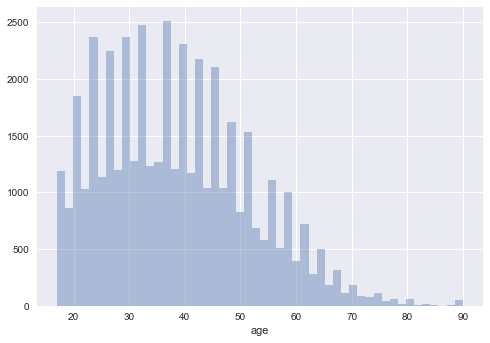

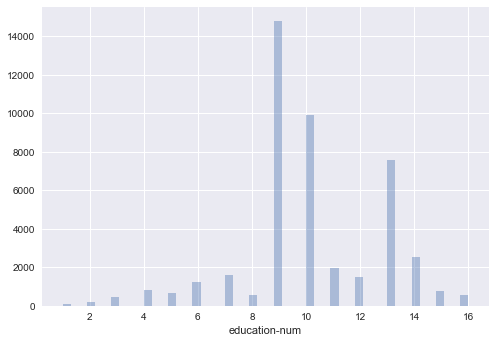

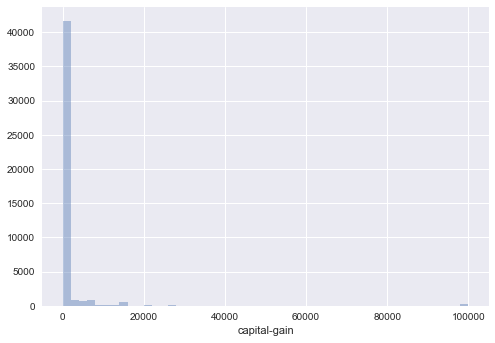

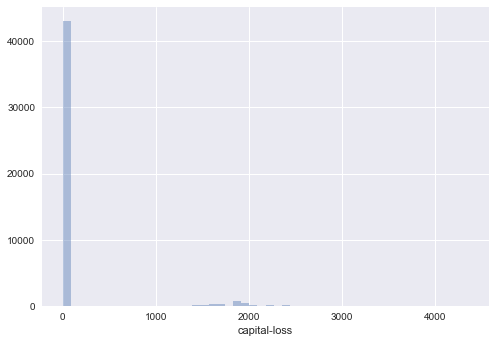

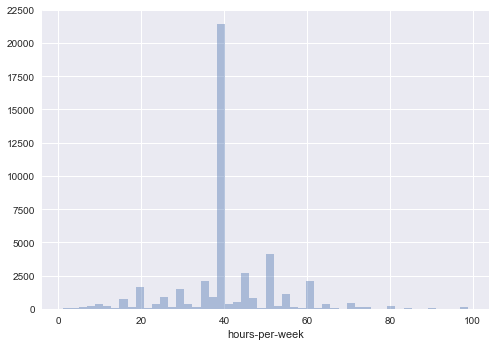

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

display(print("Numerics Columns to be explored",numerics))
#print("Non Numeric Columns ",non_numeric)

#for x in enumerate(numerics):
 #       plt.figure()
  #      sns.distplot(data[numerics[x]],kde=False,bins=50)
  #      distplot = fig.add_subplot(1, 4, x+1)

for x in range(pd.Series(numerics).shape[0]) :
    plt.figure()
    sns.distplot(data[numerics[x]],kde=False,bins=50)
#    data[numerics[x]].plot(type='hist')
#data[numerics[0]].plot(kind='line')

In [8]:
# Split the data into features and target label
income_raw = pd.DataFrame()
income_raw['income'] = data.loc[:,'income']
features_raw = data.drop('income', axis = 1)


### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

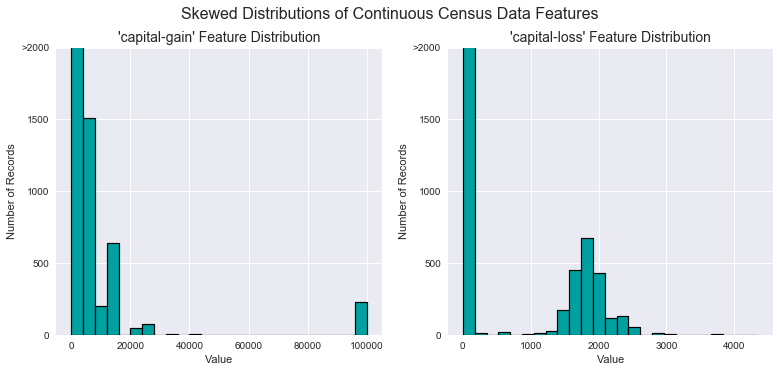

In [9]:
# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

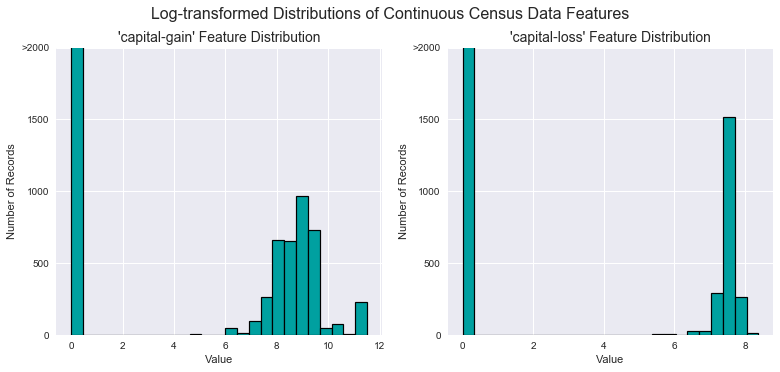

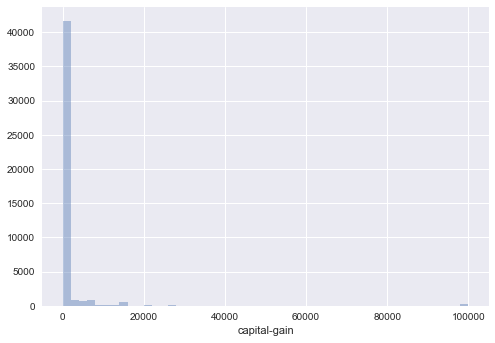

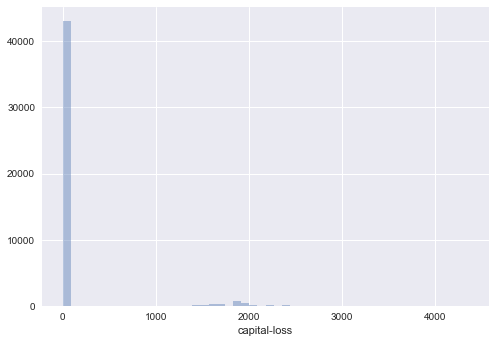

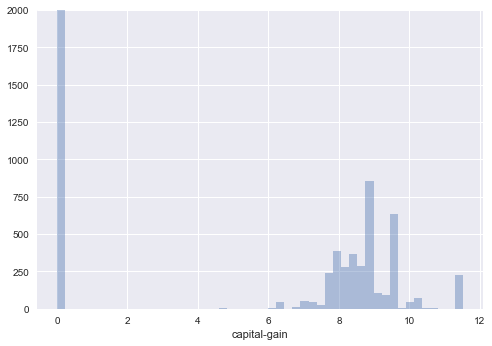

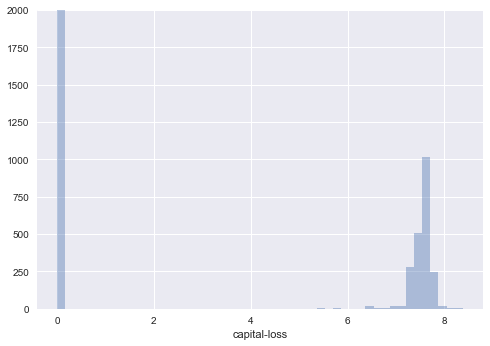

In [10]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)
plt.figure()

distplot = sns.distplot(data[skewed[0]],kde=False,bins=50 )
plt.figure()
distplot = sns.distplot(data[skewed[1]],kde=False,bins=50)

plt.figure()
distplot = sns.distplot(features_log_transformed[skewed[0]],kde=False,bins=50)
distplot.set_ylim(0,2000)

plt.figure()
distplot = sns.distplot(features_log_transformed[skewed[1]],kde=False,bins=50)
distplot.set_ylim(0,2000)

plt.figure()


### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = pd.Series(data.select_dtypes(exclude=['object']).columns)
display(numerical)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed,copy=True)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 1))


0               age
1     education-num
2      capital-gain
3      capital-loss
4    hours-per-week
dtype: object

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States


In [12]:
display(data.head(1))
display(features_raw.head(1))
display(features_log_transformed.head(1))
display(features_log_minmax_transform.head(1))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [69]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
#.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

#Encode the 'income_raw' data to numerical values
#income_raw  = pd.DataFrame( data = features_log_minmax_transform)
income_mapper = {'<=50K':0, 
                 '>50K' : 1}
income_raw['income'] = data.loc[:,'income']

income_raw['income'] = income_raw['income'].astype(str)
income = pd.DataFrame()
income['income'] = income_raw['income'].replace(income_mapper)
#features_final.drop(['income'],inplace=True) 

# Add the income column to the data set
#features_final['income'] = income_raw['income'] 
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)


103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [14]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, Y_train, Y_test =  train_test_split(features_final,
                                                    income,
                                                    test_size=0.2,
                                                    random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [15]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data  encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

#  Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta*beta)*(precision*recall)/((beta*beta*precision+recall))

# Print the results 
print('Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]'.format(float(accuracy),float(fscore)))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

We can use 
- Support Vector Machines (SVM)
- Logistic Regression
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)

for the above problem.

- K-Nearest Neighbors (KNeighbors)
    - Describe one real-world application in industry where the model can be applied. 
    - What are the strengths of the model; when does it perform well?
    - What are the weaknesses of the model; when does it perform poorly?
    - What makes this model a good candidate for the problem, given what you know about the data?

- Gaussian Naive Bayes (GaussianNB)
    - Describe one real-world application in industry where the model can be applied. 
    - What are the strengths of the model; when does it perform well?
    - What are the weaknesses of the model; when does it perform poorly?
    - What makes this model a good candidate for the problem, given what you know about the data?

- Decision Trees
    - Describe one real-world application in industry where the model can be applied. 
    - What are the strengths of the model; when does it perform well?
    - What are the weaknesses of the model; when does it perform poorly?
    - What makes this model a good candidate for the problem, given what you know about the data?

- Stochastic Gradient Descent Classifier (SGDC)--
    - Describe one real-world application in industry where the model can be applied. 
    - What are the strengths of the model; when does it perform well?
    - What are the weaknesses of the model; when does it perform poorly?
    - What makes this model a good candidate for the problem, given what you know about the data?

- Support Vector Machines (SVM)
    - Describe one real-world application in industry where the model can be applied. 
    - What are the strengths of the model; when does it perform well?
    - What are the weaknesses of the model; when does it perform poorly?
    - What makes this model a good candidate for the problem, given what you know about the data?


- Logistic Regression
    - Describe one real-world application in industry where the model can be applied. 
    - What are the strengths of the model; when does it perform well?
    - What are the weaknesses of the model; when does it perform poorly?
    - What makes this model a good candidate for the problem, given what you know about the data?


- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
    - Describe one real-world application in industry where the model can be applied. 
    - What are the strengths of the model; when does it perform well?
    - What are the weaknesses of the model; when does it perform poorly?
    - What makes this model a good candidate for the problem, given what you know about the data?


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [16]:
#!pip list
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn import linear_model
#import LinearRegression
#from sklearn.linear_model import LogisticRegression
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, Y_train)


C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
#logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
#logreg.fit(X_train, Y_train)

learner=linear_model.LogisticRegression(C=1e5)
sample_size=30
X_train=X_train
y_train=Y_train
X_test=X_test
y_test = Y_test
'''
inputs:
   - learner: the learning algorithm to be trained and predicted on
   - sample_size: the size of samples (number) to be drawn from training set
   - X_train: features training set
   - y_train: income training set
   - X_test: features testing set
   - y_test: income testing set
'''

results = {}

# TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
start = time() # Get start time
learner = linear_model.LogisticRegression(C=1e5)
learner.fit(X_train, Y_train)
end = time() # Get end time

# Calculate the training time
results['train_time'] = end - start

# TODO: Get the predictions on the test set(X_test),
#       then get predictions on the first 300 training samples(X_train) using .predict()
start = time() # Get start time
predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_test)
end = time() # Get end time

# TODO: Calculate the total prediction time
results['pred_time'] = end - start

# TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
results['acc_train'] = accuracy_score(predictions_train[:300], y_train[:300])

# TODO: Compute accuracy on test set using accuracy_score()
results['acc_test'] = accuracy_score(predictions_test, y_test)

# TODO: Compute F-score on the the first 300 training samples using fbeta_score()
results['f_train'] = fbeta_score(predictions_train[:300], y_train[:300], average='macro', beta=0.5)

# TODO: Compute F-score on the test set which is y_test
results['f_test'] = fbeta_score(predictions_test, y_test, average='macro', beta=0.5)

print(results)

# Success
print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'train_time': 0.3210000991821289, 'pred_time': 0.009999990463256836, 'acc_train': 0.66666666666666663, 'acc_test': 0.8415699281370923, 'f_train': 0.51925465838509322, 'f_test': 0.76382037761270505}
LogisticRegression trained on 30 samples.


In [84]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


def train_predict(learner, sample_size, X_train, Y_train, X_test, Y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
#    learner = linear_model.LogisticRegression(C=1e5)
    learner.fit(X_train[:sample_size], Y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    #
    #TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(Y_train[0:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[0:300], predictions_train, average='macro', beta=0.5)
        #predictions_train[:300], y_train[:300], average='macro', beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, average='macro', beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [79]:
# Import the three supervised learning models from sklearn

from sklearn import linear_model
from sklearn.svm import SVC  
from sklearn import tree

#from sklearn.neighbors import NearestNeighbors # TODO KNN Does not have predict ??



# Initialize the three models
clf_A = linear_model.LogisticRegression()
clf_B =  SVC(kernel='linear') 
clf_C = tree.DecisionTreeClassifier()#NearestNeighbors()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_1 is 1% of the entire training set 
# samples_10 is 10% of the entire training set 
# samples_100 is the entire training set 

#print(X_train.shape[0])
samples_1 = int((len(Y_train))/100)
samples_10 = int(len(Y_train)/10)
samples_100 = len(Y_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name] [i]= \
        train_predict(clf, samples, X_train, Y_train, X_test, Y_test)
## TODO : Create a dataframe with the result[] comparing the models  

C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


In [22]:
import visuals as vs
#visuals.reload(module)
#imp.reload(visuals)
#system.visuals.temp()
import importlib
importlib.reload(visuals)

<module 'visuals' from 'C:\\Users\\rarora17\\git\\ML_Projects\\1. Supervised Learning\\visuals.py'>

In [37]:
# Import the three supervised learning models from sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Initialize the three models
clf_A = RandomForestClassifier(random_state=121)
clf_B = GaussianNB()
clf_C = AdaBoostClassifier(random_state=543)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_1 is 1% of the entire training set 
# samples_10 is 10% of the entire training set 
# samples_100 is the entire training set 

#print(X_train.shape[0])
print(len(Y_train))
samples_1 = int(len(Y_train)/100)
samples_10 = int(len(Y_train)/10)
samples_100 = len(Y_train)

# Collect results on the learners
results2 = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results2[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results2[clf_name] [i]= \
        train_predict(clf, samples, X_train, Y_train, X_test, Y_test)
## TODO : Create a dataframe with the result[] comparing the models  

36177
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.


C:\ProgramData\Anaconda3x\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3x\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3x\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.


C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.


C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier trained on 3617 samples.


C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier trained on 36177 samples.


In [51]:
report = {**results,**results2}
#for k,v in report.items():
#    print(k, 'corresponds to', v)

In [40]:
clf_A = linear_model.LogisticRegression()
clf_B =  SVC(kernel='linear') 
clf_C = tree.DecisionTreeClassifier()#NearestNeighbors()

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print()
    print("",clf_name,results[clf_name])

clf_A = RandomForestClassifier(random_state=121)
clf_B = GaussianNB()
clf_C = AdaBoostClassifier(random_state=543)

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print()
    print("",clf_name,results2[clf_name])



 LogisticRegression {0: {'train_time': 0.003000020980834961, 'pred_time': 0.012000083923339844, 'acc_train': 0.85999999999999999, 'acc_test': 0.81868435599778888, 'f_train': 0.81227934686672543, 'f_test': 0.74704298091454824}, 1: {'train_time': 0.019999980926513672, 'pred_time': 0.00800013542175293, 'acc_train': 0.84666666666666668, 'acc_test': 0.8385848535102266, 'f_train': 0.78966539389067525, 'f_test': 0.77868394308943079}, 2: {'train_time': 0.28600001335144043, 'pred_time': 0.006000041961669922, 'acc_train': 0.84666666666666668, 'acc_test': 0.841901603095633, 'f_train': 0.78900411956313465, 'f_test': 0.78396915647086129}}

 SVC {0: {'train_time': 0.011999845504760742, 'pred_time': 0.17500019073486328, 'acc_train': 0.8666666666666667, 'acc_test': 0.81426202321724706, 'f_train': 0.82172131147540983, 'f_test': 0.74299935594099042}, 1: {'train_time': 0.7630000114440918, 'pred_time': 1.3819999694824219, 'acc_train': 0.85333333333333339, 'acc_test': 0.83825317855168602, 'f_train': 0.801

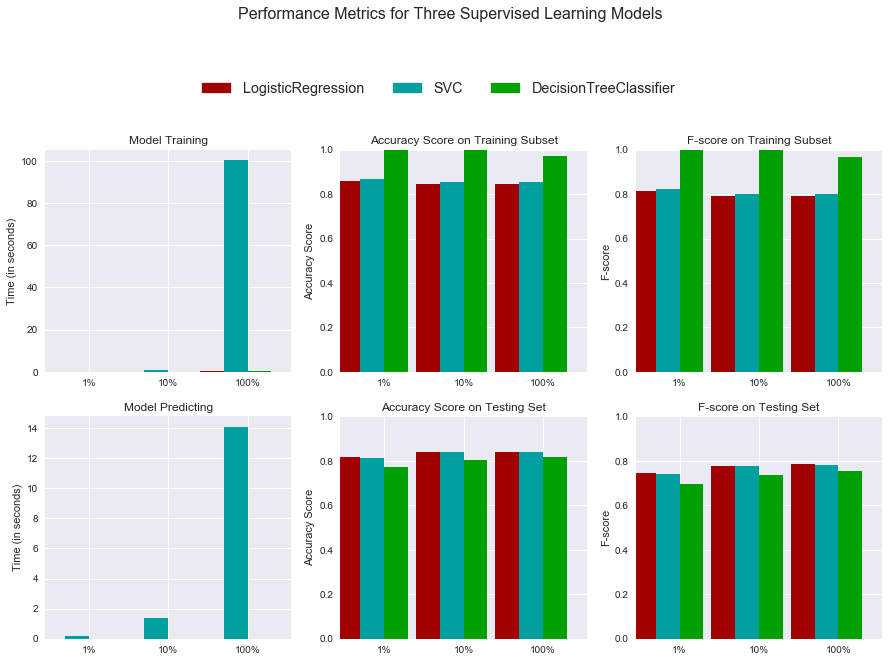

In [23]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

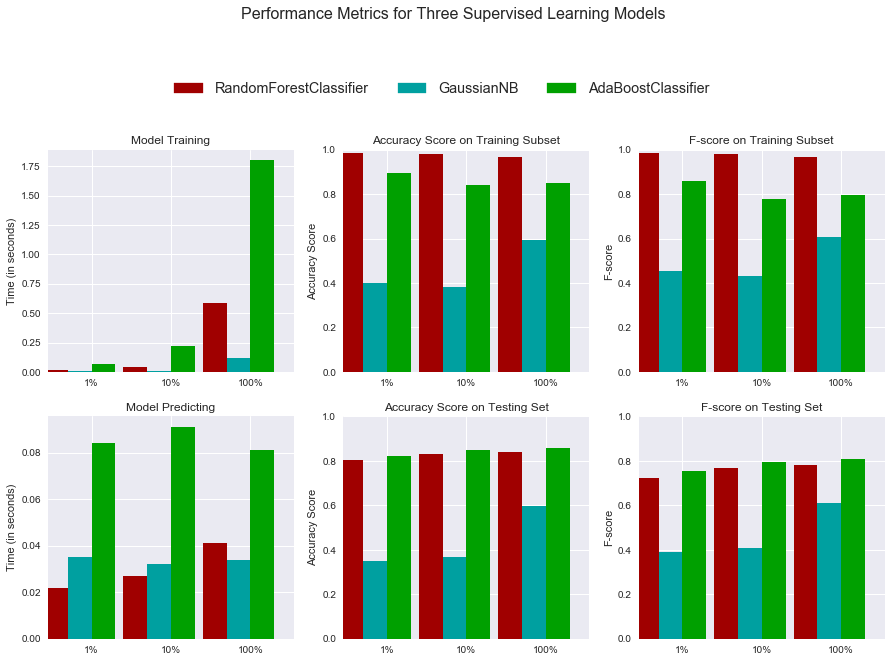

In [25]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results2, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

In [11]:
import dill
#dill.dump_session('charity_ML.db')
dill.load_session('charity_ML.db')

C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3x\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [70]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer
clf = linear_model.LogisticRegression()
# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = dict(  penalty=[11.0,12 ],
                    C = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.] 
                )
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = scorer = make_scorer(fbeta_score, beta=0.5)

#fbeta_score(y_true, y_pred, average='macro', beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

IndexError: too many indices for array

In [71]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=543)

# TODO: Create the parameters list you wish to tune
parameters = dict(n_estimators=[50,100,250,300,500,750,1000],
                learning_rate=[1,0.1,0.01,0.001, 0.0001],
                algorithm =['SAMME', 'SAMME.R'])

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid = parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

IndexError: too many indices for array

In [54]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=543)

# TODO: Create the parameters list you wish to tune
parameters = dict(n_estimators=[50,100,250,300,500,750,1000],
                learning_rate=[1,0.1,0.01,0.001, 0.0001],
                algorithm =['SAMME', 'SAMME.R'])

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid = parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5)))




IndexError: too many indices for array

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |                   |                 |
| F-score        |                   |   EXAMPLE       |


**Answer: **

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = None

# TODO: Extract the feature importances using .feature_importances_ 
importances = None

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.